# PAP C Kelompok 6

Tugas Group Project 2 :Klasifikasi

Impelementasi dan Eksperimen Prediksi Jenis Kejahatan menggunakan Python untuk Data 
Kejahatan di Los Angeles 

Anggota Kelompok:

1. Arif (5026221104)
2. Jasmine (5026221107)
3. Dicky (5026221036)
4. Affan (5026221134)

## Pemilihan Data

Tujuan: Membagi data yang sudah disiapkan dalam TGP #1 menjadi data pelatihan dan data tes.

In [1]:
#importing dependable
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline

# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [2]:
#Load dataset
crime = pd.read_csv('Cleaned_Crime_Data.csv')
crime.head()

,Date Rptd,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,...,Geographic_Zone,Female,Male,Unknown gender,Adult Arrest,Adult Other,Invest Cont,Juv Arrest,Juv Other,UNK
0,03/01/2020 12:00:00 AM,7,Wilshire,1,510,VEHICLE - STOLEN,NaN,37,M,O,...,Zone 1,False,True,False,True,False,False,False,False,False
1,02/09/2020 12:00:00 AM,1,Central,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,...,Zone 1,False,True,False,False,False,True,False,False,False
2,11/11/2020 12:00:00 AM,3,Southwest,1,480,BIKE - STOLEN,0344 1251,19,X,X,...,Zone 1,False,False,True,False,False,True,False,False,False
3,05/10/2023 12:00:00 AM,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,...,Zone 2,False,True,False,False,False,True,False,False,False
4,08/18/2022 12:00:00 AM,6,Hollywood,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,...,Zone 1,False,True,False,False,False,True,False,False,False


In [3]:
# Periksa missing value
crime.isnull().sum()

Date Rptd               0
AREA                    0
AREA NAME               0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            142255
Vict Age                0
Vict Sex                0
Vict Descent            0
Premis Cd              15
Premis Desc           576
Weapon Used Cd     607445
Weapon Desc        607445
Status                  1
Crm Cd 1               11
LOCATION                0
Cross Street       764739
LAT                     0
LON                     0
TIME OCC_str            0
DATETIME OCC            0
day_of_week             0
month                   0
Day_Night               0
Geographic_Zone         0
Female                  0
Male                    0
Unknown gender          0
Adult Arrest            0
Adult Other             0
Invest Cont             0
Juv Arrest              0
Juv Other               0
UNK                     0
dtype: int64

In [4]:
dt = crime.copy()

In [5]:
# isi missing value kolom weapon used dengan code 500 dan deskripsi UNKNOWN WEAPON/OTHER WEAPON
# nilai yang kosong dalam weapon used mungkin dikarenakan senjata yang digunakan pelaku tidak diketahui

dt.fillna({'Weapon Used Cd':500}, inplace=True)
dt.fillna({'Weapon Desc':'UNKNOWN WEAPON/OTHER WEAPON'}, inplace=True)

In [6]:
# isi missing value kolom mocodes dengan modus
mocodes_modus = dt['Mocodes'].value_counts().idxmax()
dt.fillna({'Mocodes':mocodes_modus}, inplace=True)
dt.isnull().sum()

Date Rptd               0
AREA                    0
AREA NAME               0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes                 0
Vict Age                0
Vict Sex                0
Vict Descent            0
Premis Cd              15
Premis Desc           576
Weapon Used Cd          0
Weapon Desc             0
Status                  1
Crm Cd 1               11
LOCATION                0
Cross Street       764739
LAT                     0
LON                     0
TIME OCC_str            0
DATETIME OCC            0
day_of_week             0
month                   0
Day_Night               0
Geographic_Zone         0
Female                  0
Male                    0
Unknown gender          0
Adult Arrest            0
Adult Other             0
Invest Cont             0
Juv Arrest              0
Juv Other               0
UNK                     0
dtype: int64

In [7]:
# drop kolom Cross Street & Date Rptd
dt = dt.drop('Cross Street', axis=1)
dt = dt.drop('Date Rptd', axis=1)

In [8]:
# drop baris yang memiliki null value
dt.dropna(axis=0, inplace=True)
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907917 entries, 0 to 908503
Data columns (total 33 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AREA             907917 non-null  int64  
 1   AREA NAME        907917 non-null  object 
 2   Part 1-2         907917 non-null  int64  
 3   Crm Cd           907917 non-null  int64  
 4   Crm Cd Desc      907917 non-null  object 
 5   Mocodes          907917 non-null  object 
 6   Vict Age         907917 non-null  int64  
 7   Vict Sex         907917 non-null  object 
 8   Vict Descent     907917 non-null  object 
 9   Premis Cd        907917 non-null  float64
 10  Premis Desc      907917 non-null  object 
 11  Weapon Used Cd   907917 non-null  float64
 12  Weapon Desc      907917 non-null  object 
 13  Status           907917 non-null  object 
 14  Crm Cd 1         907917 non-null  float64
 15  LOCATION         907917 non-null  object 
 16  LAT              907917 non-null  float64
 

In [9]:
dt_filtered = dt.drop(['AREA NAME', 'Part 1-2', 'Crm Cd Desc',
                       'Premis Desc', 'Weapon Desc', 'DATETIME OCC'], axis=1)
dt_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907917 entries, 0 to 908503
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AREA             907917 non-null  int64  
 1   Crm Cd           907917 non-null  int64  
 2   Mocodes          907917 non-null  object 
 3   Vict Age         907917 non-null  int64  
 4   Vict Sex         907917 non-null  object 
 5   Vict Descent     907917 non-null  object 
 6   Premis Cd        907917 non-null  float64
 7   Weapon Used Cd   907917 non-null  float64
 8   Status           907917 non-null  object 
 9   Crm Cd 1         907917 non-null  float64
 10  LOCATION         907917 non-null  object 
 11  LAT              907917 non-null  float64
 12  LON              907917 non-null  float64
 13  TIME OCC_str     907917 non-null  object 
 14  day_of_week      907917 non-null  object 
 15  month            907917 non-null  object 
 16  Day_Night        907917 non-null  object 
 

In [10]:
dt_filtered['Mocodes'].value_counts()

Mocodes
0344                                  180045
0329                                   19672
1822 0344                              12593
0325                                    9610
1501                                    8950
                                       ...  
1822 0344 0302 0337 1252 1309              1
1300 1220 0400                             1
1309 1300 1402 1605 0329 1822 0216         1
0216 0334 0371 0906                        1
0446 2000 0913 1814 0400 2002 1414         1
Name: count, Length: 282026, dtype: int64

In [11]:
dt_filtered['Mocodes'] = dt_filtered['Mocodes'].str[:4]
dt_filtered['Mocodes'].value_counts()

Mocodes
0344    264340
1822    116656
0329     59846
0913     45586
2000     33991
         ...  
1523         1
1021         1
0331         1
0905         1
4024         1
Name: count, Length: 627, dtype: int64

In [12]:
dt_filtered['Vict Sex'].value_counts()

Vict Sex
M    495361
F    319980
X     92473
H       102
-         1
Name: count, dtype: int64

In [13]:
dt_filtered = dt_filtered.drop('Vict Sex', axis=1)

In [14]:
dt_filtered['Vict Descent'].value_counts()

Vict Descent
H    409125
W    171070
B    121886
X    100866
O     69123
A     18094
K      5021
F      4180
C      4033
J      1296
V      1077
I       918
Z       498
P       254
U       201
D        85
G        69
L        68
S        51
-         2
Name: count, dtype: int64

In [15]:
dt_filtered['Status'].value_counts()

Status
IC    726527
AO     98323
AA     78386
JA      3006
JO      1671
CC         4
Name: count, dtype: int64

In [16]:
dt_filtered['TIME OCC_str'].value_counts()

TIME OCC_str
12:00    29904
18:00    23991
17:00    22625
20:00    22609
22:00    21118
         ...  
22:51       26
05:34       25
23:32       25
05:59       21
05:31       17
Name: count, Length: 1439, dtype: int64

In [17]:
dt_filtered['day_of_week'].value_counts()

day_of_week
Friday       138685
Saturday     133800
Wednesday    128448
Thursday     127847
Monday       127664
Sunday       127256
Tuesday      124217
Name: count, dtype: int64

In [18]:
dt_filtered['month'].value_counts()

month
January      85590
March        81069
February     79980
July         77933
August       77569
April        77404
May          77056
June         75368
October      70803
September    70532
December     68154
November     66459
Name: count, dtype: int64

In [19]:
dt_filtered['Day_Night'].value_counts()

Day_Night
Day      501926
Night    405991
Name: count, dtype: int64

In [20]:
dt_filtered['Geographic_Zone'].value_counts()

Geographic_Zone
Zone 1    321690
Zone 2    308997
Zone 3    277230
Name: count, dtype: int64

In [21]:
dt_filtered['LOCATION'].value_counts()

LOCATION
800 N  ALAMEDA                      ST      2358
700 S  FIGUEROA                     ST      1586
10200    SANTA MONICA                 BL    1547
100    THE GROVE                    DR      1544
6TH                          ST             1484
                                            ... 
21200    SAN JOSE                     ST       1
CHARLES E YO                 DR                1
23000    CALVERT                      ST       1
13300    STAGG                        ST       1
3400 S  SAWTELLE                     BL        1
Name: count, Length: 64424, dtype: int64

In [22]:
dt_filtered = dt_filtered.drop('LOCATION', axis=1)

In [23]:
dt_transformed = dt_filtered
dt_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907917 entries, 0 to 908503
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AREA             907917 non-null  int64  
 1   Crm Cd           907917 non-null  int64  
 2   Mocodes          907917 non-null  object 
 3   Vict Age         907917 non-null  int64  
 4   Vict Descent     907917 non-null  object 
 5   Premis Cd        907917 non-null  float64
 6   Weapon Used Cd   907917 non-null  float64
 7   Status           907917 non-null  object 
 8   Crm Cd 1         907917 non-null  float64
 9   LAT              907917 non-null  float64
 10  LON              907917 non-null  float64
 11  TIME OCC_str     907917 non-null  object 
 12  day_of_week      907917 non-null  object 
 13  month            907917 non-null  object 
 14  Day_Night        907917 non-null  object 
 15  Geographic_Zone  907917 non-null  object 
 16  Female           907917 non-null  bool   
 

In [24]:
dt_transformed['Mocodes'] = dt_transformed['Mocodes'].astype(int)

In [25]:
# Factorize the column to get unique integers and mapping
codes, unique_values = pd.factorize(dt_transformed['Vict Descent'])
dt_transformed['Vict Descent'] = codes

# Create a dictionary to map integers back to original values
value_mapping = {index: value for index, value in enumerate(unique_values)}

print(value_mapping)

{0: 'O', 1: 'X', 2: 'H', 3: 'B', 4: 'W', 5: 'A', 6: 'K', 7: 'C', 8: 'J', 9: 'F', 10: 'I', 11: 'V', 12: 'S', 13: 'P', 14: 'Z', 15: 'G', 16: 'U', 17: 'D', 18: 'L', 19: '-'}


In [26]:
dt_transformed['Vict Descent'].value_counts()

Vict Descent
2     409125
4     171070
3     121886
1     100866
0      69123
5      18094
6       5021
9       4180
7       4033
8       1296
11      1077
10       918
14       498
13       254
16       201
17        85
15        69
18        68
12        51
19         2
Name: count, dtype: int64

In [27]:
dt_transformed['Status'] = dt_transformed['Status'].replace(
    {'AA': 0 , 'AO': 1 ,
     'CC': 2 , 'IC': 3 ,
     'JA': 4 , 'JO': 5 ,}
)
dt_transformed['Status'].value_counts()

C:\Users\YOGA\AppData\Local\Temp\ipykernel_16420\2535787978.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt_transformed['Status'] = dt_transformed['Status'].replace(


Status
3    726527
1     98323
0     78386
4      3006
5      1671
2         4
Name: count, dtype: int64

In [28]:
dt_transformed['day_of_week'] = dt_transformed['day_of_week'].replace(
    {'Sunday': 0 , 
     'Monday': 1 ,
     'Tuesday': 2 , 
     'Wednesday': 3 ,
     'Thursday': 4 ,
     'Friday': 5 ,
     'Saturday': 6
     }
)
dt_transformed['day_of_week'].value_counts()

C:\Users\YOGA\AppData\Local\Temp\ipykernel_16420\2590316595.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt_transformed['day_of_week'] = dt_transformed['day_of_week'].replace(


day_of_week
5    138685
6    133800
3    128448
4    127847
1    127664
0    127256
2    124217
Name: count, dtype: int64

In [29]:
dt_transformed['month'] = dt_transformed['month'].replace(
    {'January': 0 , 
     'February': 1 ,
     'March': 2 , 
     'April': 3 ,
     'May': 4 ,
     'June': 5 ,
     'July': 6,
     'August': 7 , 
     'September': 8 ,
     'October': 9 , 
     'November': 10 ,
     'December': 11
     }
)
dt_transformed['month'].value_counts()

C:\Users\YOGA\AppData\Local\Temp\ipykernel_16420\1795459436.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt_transformed['month'] = dt_transformed['month'].replace(


month
0     85590
2     81069
1     79980
6     77933
7     77569
3     77404
4     77056
5     75368
9     70803
8     70532
11    68154
10    66459
Name: count, dtype: int64

In [30]:
dt_transformed['Day_Night'] = dt_transformed['Day_Night'].replace(
    {'Day': 0 , 
     'Night': 1
     }
)
dt_transformed['Day_Night'].value_counts()

C:\Users\YOGA\AppData\Local\Temp\ipykernel_16420\3108096912.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt_transformed['Day_Night'] = dt_transformed['Day_Night'].replace(


Day_Night
0    501926
1    405991
Name: count, dtype: int64

In [31]:
dt_transformed['Geographic_Zone'] = dt_transformed['Geographic_Zone'].replace(
    {'Zone 1': 0 , 
     'Zone 2': 1,
     'Zone 3': 2
     }
)
dt_transformed['Geographic_Zone'].value_counts()

C:\Users\YOGA\AppData\Local\Temp\ipykernel_16420\3481773240.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt_transformed['Geographic_Zone'] = dt_transformed['Geographic_Zone'].replace(


Geographic_Zone
0    321690
1    308997
2    277230
Name: count, dtype: int64

In [32]:
dt_transformed['TIME OCC_str'] = dt_transformed['TIME OCC_str'].str.replace(':', '').astype(int)
dt_transformed['TIME OCC_str'].value_counts()

TIME OCC_str
1200    29904
1800    23991
1700    22625
2000    22609
2200    21118
        ...  
2251       26
534        25
2332       25
559        21
531        17
Name: count, Length: 1439, dtype: int64

In [33]:
dt_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907917 entries, 0 to 908503
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AREA             907917 non-null  int64  
 1   Crm Cd           907917 non-null  int64  
 2   Mocodes          907917 non-null  int64  
 3   Vict Age         907917 non-null  int64  
 4   Vict Descent     907917 non-null  int64  
 5   Premis Cd        907917 non-null  float64
 6   Weapon Used Cd   907917 non-null  float64
 7   Status           907917 non-null  int64  
 8   Crm Cd 1         907917 non-null  float64
 9   LAT              907917 non-null  float64
 10  LON              907917 non-null  float64
 11  TIME OCC_str     907917 non-null  int64  
 12  day_of_week      907917 non-null  int64  
 13  month            907917 non-null  int64  
 14  Day_Night        907917 non-null  int64  
 15  Geographic_Zone  907917 non-null  int64  
 16  Female           907917 non-null  bool   
 

### Feature Selection

<Axes: >

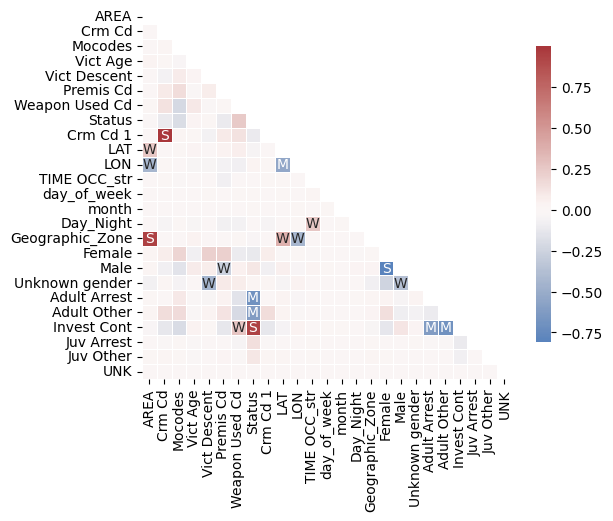

In [34]:
# visualize Correlation plot
corr = dt_transformed.corr('spearman')
sns.heatmap(corr,
            annot = np.where(np.abs(corr)>0.75,'S', # correlation more than +/- 75% labelled as 'STRONG CORRELATION'
                      np.where(np.abs(corr)>0.5,'M', # correlation more than +/- 50% labelled as 'MEDIUM CORRELATION'
                           np.where(np.abs(corr)>0.25,'W',''))), # correlation more than +/- 25% labelled as 'WEAK CORRELATION'
            mask=np.triu(np.ones_like(corr, dtype=bool)),
            square=True,
            center=0,fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8}
            )

Dari correlation plot diatas, dapat ditemukan 2 variabel yang memiliki hubungan S (Strong) yaitu

AREA dengan Geographic Zone

Crm Cd dengan Crm Cd 1

Status dengan Invest Cont

Female dengan Male

Pada hubungan Status dengan Invest cont cukup menarik karena Adult Other dan Adult Arrest memiliki hubungan M (Medium) dengan kedua variabel tersebut

In [35]:
corr[['Status','Invest Cont','Adult Arrest','Adult Other']]

,Status,Invest Cont,Adult Arrest,Adult Other
AREA,-0.026600,-0.031588,0.015365,0.023745
Crm Cd,-0.114838,-0.125517,0.003735,0.158904
Mocodes,-0.188591,-0.197844,0.100531,0.160918
Vict Age,0.028976,0.042402,-0.020360,-0.027035
Vict Descent,0.005409,0.004847,-0.039548,0.032778
Premis Cd,-0.115320,-0.126799,0.046073,0.117428
Weapon Used Cd,0.247638,0.269899,-0.146344,-0.202971
Status,1.000000,0.942495,-0.698033,-0.622772
Crm Cd 1,-0.114415,-0.125054,0.003429,0.158612
LAT,-0.052167,-0.054748,0.038042,0.034236


Dari tabel korelasi diatas, ditemukan bahwa Status, Invest Cont, Adult Arrest, dan Adult Other memang memiliki korelasi 
yang kuat

Setelah menemukan korelasi yang kuat antar variabel, kami akan mengambil salah satu dari variabel-variabel yang berhubungan kuat untuk
diproses model. Variabel yang akan diambil adalah variabel yang memiliki koralasi yang besar terhadap variabel tujuan (Crm Cd)

In [36]:
corr.sort_values('Crm Cd', ascending=False, key=abs)['Crm Cd']

Crm Cd             1.000000
Crm Cd 1           0.999458
Adult Other        0.158904
Weapon Used Cd     0.125788
Invest Cont       -0.125517
Status            -0.114838
Premis Cd          0.093281
Male              -0.087629
Female             0.076910
Vict Descent      -0.064160
Day_Night         -0.046602
Juv Other          0.022855
Unknown gender     0.022769
Mocodes            0.021851
Juv Arrest        -0.021238
day_of_week       -0.008195
TIME OCC_str       0.006814
Vict Age           0.006466
LON                0.006178
month             -0.004218
Adult Arrest       0.003735
LAT                0.001056
UNK               -0.000808
AREA              -0.000384
Geographic_Zone    0.000297
Name: Crm Cd, dtype: float64

* Di antara Crm Cd dengan Crm Cd 1 tentu Crm Cd memiliki nilai yang lebih besar, sehingga Crm Cd 1 dapat di-ignore
* Di antara Area dengan Geographic Zone, AREA memiliki nilai yang lebih besar, sehingga Geographic Zone dapat di-ignore
* Di antara Status dan Invest Cont, Invest Cont memiliki nilai yang lebih besar namun lebih kecil dari Adult Other, sehingga Status dan Adult Arrest
dapat di-ignore
* Di antara Female dan Male, Male memiliki nilai yang lebih besar, sehingga Female dapat di-ignore

In [37]:
dt_selected = dt_transformed.drop(['Crm Cd 1', 'Geographic_Zone', 'Status', 'Adult Arrest', 'Female'], axis=1)
dt_selected.head()

,AREA,Crm Cd,Mocodes,Vict Age,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON,TIME OCC_str,day_of_week,month,Day_Night,Male,Unknown gender,Adult Other,Invest Cont,Juv Arrest,Juv Other,UNK
0,7,510,344,37,0,101.0,500.0,34.0375,-118.3506,2130,0,2,1,True,False,False,False,False,False,False
1,1,330,1822,47,0,128.0,500.0,34.0444,-118.2628,1800,6,1,0,True,False,False,True,False,False,False
2,3,480,344,19,1,502.0,500.0,34.0210,-118.3002,1700,3,10,0,False,True,False,True,False,False,False
3,9,343,325,19,0,405.0,500.0,34.1576,-118.4387,2037,2,2,1,True,False,False,True,False,False,False
4,6,354,1822,28,2,102.0,500.0,34.0944,-118.3277,1200,1,7,0,True,False,False,True,False,False,False


In [38]:
# habus stored dataframe yang tidak diperlukan untuk meringankan kinerja laptop
del dt, dt_filtered, dt_transformed, crime

### Data Balancing

Sebelum dilakukan training, perlu dilakukan data balancing terlebih dahulu, dimana kita akan menyetarakan variabel tujuan (yang nantinya akan dijadikan bahan training) agar ketika model ditraining, hasil tidak skew/condong ke salah satu hasil.

In [39]:
dt_selected['Crm Cd'].value_counts()

Crm Cd
510    109005
624     66891
330     57833
740     55426
354     54615
        ...  
906         4
884         4
445         4
926         1
453         1
Name: count, Length: 140, dtype: int64

Berdasarkan data diatas, apabila kami melakukan data balancing dengan oversampling maka data yang diproses akan menjadi sangat banyak dan sulit untuk diproses. oleh karena itu kelompok kami memilih untuk membatasi sample size diangka 1000 row untuk setiap kelas yang akan diprediksi

In [40]:
X = dt_selected.drop('Crm Cd', axis=1)
y = dt_selected['Crm Cd']

In [41]:
balancer = RandomOverSampler(random_state=42)
X_balanced, y_balanced = balancer.fit_resample(X, y)
y_balanced.value_counts()

Crm Cd
510    109005
330    109005
480    109005
343    109005
354    109005
        ...  
432    109005
882    109005
445    109005
926    109005
453    109005
Name: count, Length: 140, dtype: int64

In [42]:
# Initialize temporary variables to hold the samples
temp_X = pd.DataFrame()
temp_y = pd.Series(dtype=int)

# Untuk setiap kelas, ambil 1000 row
for class_label in y_balanced.unique():
    class_X = X_balanced[y_balanced == class_label]
    class_y = y_balanced[y_balanced == class_label]

    n_samples = min(len(class_X), 1000)  # Jumlah sampel yang diambil
    sampled_X = class_X.sample(n=n_samples, random_state=42)
    sampled_y = class_y.sample(n=n_samples, random_state=42)

    temp_X = pd.concat([temp_X, sampled_X], ignore_index=True)
    temp_y = pd.concat([temp_y, sampled_y], ignore_index=True)

X_balanced = temp_X
y_balanced = temp_y

del temp_X, temp_y

print(y_balanced.value_counts())

510    1000
330    1000
480    1000
343    1000
354    1000
       ... 
432    1000
882    1000
445    1000
926    1000
453    1000
Name: count, Length: 140, dtype: int64


In [43]:
X_balanced.head(15)

,AREA,Mocodes,Vict Age,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON,TIME OCC_str,day_of_week,month,Day_Night,Male,Unknown gender,Adult Other,Invest Cont,Juv Arrest,Juv Other,UNK
0,13,344,37,2,101.0,500.0,34.0146,-118.2781,2330,0,5,1,True,False,False,True,False,False,False
1,7,344,37,2,108.0,500.0,34.0853,-118.3753,1400,3,11,0,True,False,False,True,False,False,False
2,19,344,37,2,101.0,500.0,34.2839,-118.4560,20,1,7,1,True,False,False,True,False,False,False
3,7,344,37,2,101.0,500.0,34.0362,-118.3284,1600,6,7,0,True,False,False,True,False,False,False
4,20,344,37,2,108.0,500.0,34.0545,-118.2941,1900,4,6,1,True,False,False,True,False,False,False
5,9,344,37,2,101.0,500.0,34.1938,-118.4702,1400,0,1,0,True,False,False,True,False,False,False
6,1,344,37,2,101.0,500.0,34.0509,-118.2515,45,3,6,1,True,False,False,True,False,False,False
7,4,344,37,2,101.0,500.0,34.0336,-118.2140,1,6,9,1,True,False,False,True,False,False,False
8,17,344,37,2,101.0,500.0,34.2709,-118.5954,500,5,2,1,True,False,False,True,False,False,False
9,13,344,37,2,101.0,500.0,34.0216,-118.2531,1400,4,5,0,True,False,False,True,False,False,False


### Data Splitting - 5-fold cross validation

In [44]:
# split dataset 30% untuk test
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=130, stratify=y_balanced)

In [45]:
# Menghitung jumlah masing-masing kelas
class_counts = y_train_main.value_counts()
print(class_counts)
print("mean "+class_counts.mean().astype(str))
print("standar deviasi "+class_counts.std().astype(str))

906    700
890    700
903    700
886    700
664    700
      ... 
623    700
210    700
626    700
900    700
910    700
Name: count, Length: 140, dtype: int64
mean 700.0
standar deviasi 0.0


Nilai Mean menunjukkan 700 dan standar deviasi tepat nol menandakan setiap kelas pada y_train terbagi secara proposional menggunakan train_test_split()

In [46]:
# initialize Stratified KFold splitter
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=130)

In [47]:
# 5-fold cross validation untuk data train
train_set_kfold = []
test_set_kfold = []

print('\nKFold\n')
for i, (train_index, test_index) in enumerate(strat_kfold.split(X_train_main, y_train_main)): # for strat_kfold, incl. both X and y
  print(f"Fold {i}")
  print(f"  Train: index={train_index[:5]}... ({len(train_index)} rows)")
  print(f"  Test:  index={test_index[:5]}... ({len(test_index)} rows)")
  train_set_kfold.append(train_index)
  test_set_kfold.append(test_index)


KFold

Fold 0
  Train: index=[0 1 2 5 6]... (78400 rows)
  Test:  index=[ 3  4 12 20 21]... (19600 rows)
Fold 1
  Train: index=[0 1 3 4 5]... (78400 rows)
  Test:  index=[ 2  6  9 15 16]... (19600 rows)
Fold 2
  Train: index=[0 2 3 4 5]... (78400 rows)
  Test:  index=[ 1  7  8 10 25]... (19600 rows)
Fold 3
  Train: index=[0 1 2 3 4]... (78400 rows)
  Test:  index=[13 14 17 22 30]... (19600 rows)
Fold 4
  Train: index=[1 2 3 4 6]... (78400 rows)
  Test:  index=[ 0  5 11 19 24]... (19600 rows)


In [48]:
X_balanced.iloc[train_set_kfold[0]].describe()

,AREA,Mocodes,Vict Age,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON,TIME OCC_str,day_of_week,month,Day_Night
count,78400.000000,78400.000000,78400.000000,78400.000000,78400.000000,78400.00000,78400.000000,78400.000000,78400.000000,78400.000000,78400.000000,78400.000000
mean,10.781977,1065.308916,34.274158,2.291645,335.080638,446.46773,33.979945,-118.033030,1311.030765,3.047742,5.218954,0.445217
std,6.077173,638.553459,11.894368,1.384878,222.229386,107.44213,1.772927,6.147031,665.418753,2.000926,3.439713,0.496993
min,1.000000,100.000000,12.000000,0.000000,101.000000,101.00000,0.000000,-118.667600,1.000000,0.000000,0.000000,0.000000
25%,6.000000,400.000000,26.000000,1.000000,102.000000,400.00000,34.007975,-118.426900,850.000000,1.000000,2.000000,0.000000
50%,11.000000,943.000000,37.000000,2.000000,401.000000,500.00000,34.057700,-118.318900,1355.000000,3.000000,5.000000,0.000000
75%,16.000000,1601.000000,39.000000,3.000000,502.000000,500.00000,34.166000,-118.276400,1850.000000,5.000000,8.000000,1.000000
max,21.000000,9999.000000,63.000000,19.000000,971.000000,516.00000,34.327500,0.000000,2359.000000,6.000000,11.000000,1.000000


### Feature Scaling

In [49]:
X_balanced.describe()

,AREA,Mocodes,Vict Age,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON,TIME OCC_str,day_of_week,month,Day_Night
count,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000
mean,10.724357,1060.008379,35.401421,2.254543,333.944157,454.986921,33.962520,-117.980844,1308.029679,3.117636,5.221586,0.444314
std,6.055078,637.730190,11.712269,1.406792,223.651876,98.668768,1.914822,6.640493,663.877374,1.995172,3.451875,0.496891
min,1.000000,100.000000,12.000000,0.000000,101.000000,101.000000,0.000000,-118.667600,1.000000,0.000000,0.000000,0.000000
25%,5.000000,377.000000,28.000000,1.000000,102.000000,400.000000,34.003800,-118.429200,842.000000,1.000000,2.000000,0.000000
50%,11.000000,943.000000,37.000000,2.000000,252.000000,500.000000,34.057000,-118.322200,1345.000000,3.000000,5.000000,0.000000
75%,16.000000,1501.000000,40.000000,3.000000,502.000000,500.000000,34.168200,-118.273000,1850.000000,5.000000,8.000000,1.000000
max,21.000000,9999.000000,63.000000,19.000000,971.000000,516.000000,34.328200,0.000000,2359.000000,6.000000,11.000000,1.000000


In [50]:
scaler = StandardScaler()

X_train_main['Mocodes'] = scaler.fit_transform(X_train_main[['Mocodes']]) # "fit" on the TRAIN set only, then transform
X_test_main['Mocodes'] = scaler.transform(X_test_main[['Mocodes']]) # while on the TEST set, just "transform" it

X_train_main['Premis Cd'] = scaler.fit_transform(X_train_main[['Premis Cd']])
X_test_main['Premis Cd'] = scaler.transform(X_test_main[['Premis Cd']])

X_train_main['Weapon Used Cd'] = scaler.fit_transform(X_train_main[['Weapon Used Cd']])
X_test_main['Weapon Used Cd'] = scaler.transform(X_test_main[['Weapon Used Cd']])

X_train_main['TIME OCC_str'] = scaler.fit_transform(X_train_main[['TIME OCC_str']])
X_test_main['TIME OCC_str'] = scaler.transform(X_test_main[['TIME OCC_str']])

X_train_main.describe()

,AREA,Mocodes,Vict Age,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON,TIME OCC_str,day_of_week,month,Day_Night
count,98000.000000,9.800000e+04,98000.000000,98000.000000,9.800000e+04,9.800000e+04,98000.000000,98000.000000,9.800000e+04,98000.000000,98000.000000,98000.000000
mean,10.718265,-1.595096e-17,35.385500,2.252990,-8.976040e-17,-1.957618e-18,33.963232,-117.982653,-2.421646e-17,3.121357,5.213235,0.444724
std,6.055748,1.000005e+00,11.717748,1.408069,1.000005e+00,1.000005e+00,1.910530,6.625524,1.000005e+00,1.994323,3.451795,0.496938
min,1.000000,-1.501130e+00,12.000000,0.000000,-1.041309e+00,-3.584088e+00,0.000000,-118.667600,-1.967359e+00,0.000000,0.000000,0.000000
25%,5.000000,-1.067554e+00,28.000000,1.000000,-1.036836e+00,-5.566963e-01,34.003900,-118.429400,-7.044176e-01,1.000000,2.000000,0.000000
50%,11.000000,-1.816185e-01,37.000000,2.000000,-3.658152e-01,4.558092e-01,34.057100,-118.321900,5.575576e-02,3.000000,5.000000,0.000000
75%,16.000000,6.917951e-01,39.000000,3.000000,7.525526e-01,4.558092e-01,34.168400,-118.272800,8.159291e-01,5.000000,8.000000,1.000000
max,21.000000,1.399335e+01,63.000000,19.000000,2.850610e+00,6.178101e-01,34.328200,0.000000,1.582124e+00,6.000000,11.000000,1.000000


## Eksperimen dengan model klasifikasi k-NN

Mengimplementasikan metode kalsifikasi k-NN dan melakukan analitik dari hasil eksperimen dengan k-NN.

### Langkah 1: Eksperimen nilai k

In [58]:
# Eksperimen untuk memperoleh model klasifikasi k-NN terbaik menggunakan 5 variasi nilai k.


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Variasi nilai k untuk eksperimen
k_values = [3, 5, 7, 9, 11]
results = {}

# Memulai eksperimen untuk setiap nilai k
for k in k_values:
    print(f"Running k-NN with k={k}")
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # 5-Fold Cross Validation
    scores = cross_val_score(knn_model, X_train_main, y_train_main, cv=5, scoring='accuracy')
    results[k] = scores
    print(f"Accuracy for k={k}: {scores.mean()}")


Running k-NN with k=3
Accuracy for k=3: 0.5637755102040817
Running k-NN with k=5
Accuracy for k=5: 0.528295918367347
Running k-NN with k=7
Accuracy for k=7: 0.5048469387755101
Running k-NN with k=9
Accuracy for k=9: 0.48609183673469386
Running k-NN with k=11
Accuracy for k=11: 0.46991836734693876


### Langkah 2: Hitung metrik kinerja

In [59]:
# Hitung akurasi, presisi, recall, f1-score, dan AUC ROC untuk setiap data validasi dari 5-fold CV.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.model_selection import cross_validate

# Metrik yang akan dihitung
scoring = {'accuracy': 'accuracy', 
           'precision': 'precision_macro', 
           'recall': 'recall_macro', 
           'f1': 'f1_macro', 
           'roc_auc': 'roc_auc_ovr'}

metrics_results = {}

for k in k_values:
    print(f"Evaluating k-NN with k={k}")
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # 5-Fold Cross Validation dengan semua metrik
    cv_results = cross_validate(knn_model, X_train_main, y_train_main, cv=5, scoring=scoring)
    metrics_results[k] = cv_results
    print(f"Results for k={k}:")
    print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
    print(f"Precision: {cv_results['test_precision'].mean()}")
    print(f"Recall: {cv_results['test_recall'].mean()}")
    print(f"F1-Score: {cv_results['test_f1'].mean()}")
    print(f"AUC ROC: {cv_results['test_roc_auc'].mean()}\n")

Evaluating k-NN with k=3
Results for k=3:
Accuracy: 0.5637755102040817
Precision: 0.5352385426634225
Recall: 0.5637755102040817
F1-Score: 0.541899979460372
AUC ROC: 0.8396804268829834

Evaluating k-NN with k=5
Results for k=5:
Accuracy: 0.528295918367347
Precision: 0.4757362507439115
Recall: 0.5282959183673468
F1-Score: 0.4930100243072424
AUC ROC: 0.848023642951528

Evaluating k-NN with k=7
Results for k=7:
Accuracy: 0.5048469387755101
Precision: 0.4423139266854422
Recall: 0.5048469387755101
F1-Score: 0.4625657401436425
AUC ROC: 0.8538059512448349

Evaluating k-NN with k=9
Results for k=9:
Accuracy: 0.48609183673469386
Precision: 0.41834498866534886
Recall: 0.4860918367346939
F1-Score: 0.4393018852345607
AUC ROC: 0.8583184137529626

Evaluating k-NN with k=11
Results for k=11:
Accuracy: 0.46991836734693876
Precision: 0.39973216387802163
Recall: 0.46991836734693876
F1-Score: 0.41998940017754044
AUC ROC: 0.8618597056756926



### Langkah 3: Analisis hasil kinerja

In [60]:
# Analisis kelima hasil kinerja model k-NN untuk setiap nilai k.

for k in k_values:
    print(f"Performance for k={k}:")
    print(f"Mean Accuracy: {metrics_results[k]['test_accuracy'].mean()}")
    print(f"Mean Precision: {metrics_results[k]['test_precision'].mean()}")
    print(f"Mean Recall: {metrics_results[k]['test_recall'].mean()}")
    print(f"Mean F1-Score: {metrics_results[k]['test_f1'].mean()}")
    print(f"Mean AUC ROC: {metrics_results[k]['test_roc_auc'].mean()}\n")

Performance for k=3:
Mean Accuracy: 0.5637755102040817
Mean Precision: 0.5352385426634225
Mean Recall: 0.5637755102040817
Mean F1-Score: 0.541899979460372
Mean AUC ROC: 0.8396804268829834

Performance for k=5:
Mean Accuracy: 0.528295918367347
Mean Precision: 0.4757362507439115
Mean Recall: 0.5282959183673468
Mean F1-Score: 0.4930100243072424
Mean AUC ROC: 0.848023642951528

Performance for k=7:
Mean Accuracy: 0.5048469387755101
Mean Precision: 0.4423139266854422
Mean Recall: 0.5048469387755101
Mean F1-Score: 0.4625657401436425
Mean AUC ROC: 0.8538059512448349

Performance for k=9:
Mean Accuracy: 0.48609183673469386
Mean Precision: 0.41834498866534886
Mean Recall: 0.4860918367346939
Mean F1-Score: 0.4393018852345607
Mean AUC ROC: 0.8583184137529626

Performance for k=11:
Mean Accuracy: 0.46991836734693876
Mean Precision: 0.39973216387802163
Mean Recall: 0.46991836734693876
Mean F1-Score: 0.41998940017754044
Mean AUC ROC: 0.8618597056756926



### Langkah 4: Tentukan model terbaik

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Misal nilai k terbaik adalah 3 berdasarkan hasil analisis
best_k = 3

# Jalankan model k-NN terbaik pada keseluruhan data latih
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train_main, y_train_main)

# Hitung kinerja model pada data latih
y_pred_train = best_knn_model.predict(X_train_main)
y_pred_proba_train = best_knn_model.predict_proba(X_train_main)  # Probabilitas untuk AUC-ROC

print(f"Train Accuracy: {accuracy_score(y_train_main, y_pred_train)}")
print(f"Train Precision: {precision_score(y_train_main, y_pred_train, average='macro')}")
print(f"Train Recall: {recall_score(y_train_main, y_pred_train, average='macro')}")
print(f"Train F1-Score: {f1_score(y_train_main, y_pred_train, average='macro')}")
print(f"Train AUC ROC: {roc_auc_score(y_train_main, y_pred_proba_train, multi_class='ovr')}")

Train Accuracy: 0.7710204081632653
Train Precision: 0.7731962315411922
Train Recall: 0.7710204081632652
Train F1-Score: 0.7573088496154715
Train AUC ROC: 0.9984603320783606


### Langkah 5: Prediksi data uji dengan model terbaik

In [68]:
# Jalankan model pada data uji
y_pred_test = best_knn_model.predict(X_test_main)
y_pred_proba_test = best_knn_model.predict_proba(X_test_main)

# Hitung metrik kinerja pada data uji
print(f"Test Accuracy: {accuracy_score(y_test_main, y_pred_test)}")
print(f"Test Precision: {precision_score(y_test_main, y_pred_test, average='macro')}")
print(f"Test Recall: {recall_score(y_test_main, y_pred_test, average='macro')}")
print(f"Test F1-Score: {f1_score(y_test_main, y_pred_test, average='macro')}")
print(f"Test AUC ROC: {roc_auc_score(y_test_main, y_pred_proba_test, multi_class='ovr')}")

Test Accuracy: 0.5917857142857142
Test Precision: 0.5611034327211323
Test Recall: 0.5917857142857142
Test F1-Score: 0.5690308499898499
Test AUC ROC: 0.8526738663355031


## Eksperimen dengan model Naïve Bayes 

In [205]:
# ikuti step soal

## Eksperimen dengan model Logistic Regression 

In [206]:
# ikuti step soal

## Eksperimen dengan model klasifikasi SVM 

In [207]:
# ikuti step soal

## Eksperimen dengan model klasifikasi Decision Tree (DT) 

In [208]:
# ikuti step soal

## Eksperimen dengan model Back Propagation Neural Network (BPNN)

In [209]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

### Jumlah neuron sama (Sigmoid)

In [214]:
label_encoder = LabelEncoder()
y_train_main_encoded = label_encoder.fit_transform(y_train_main)

In [215]:
output_units = len(np.unique(y_train_main_encoded))

nnmodel = tf.keras.Sequential()
nnmodel.add(tf.keras.layers.Dense(16, activation='relu'))
nnmodel.add(tf.keras.layers.Dense(16, activation='relu'))
nnmodel.add(tf.keras.layers.Dense(output_units, activation='sigmoid'))
    
nnmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
            loss='sparse_categorical_crossentropy',  # Untuk multiclass integer labels
            metrics=['accuracy'])

In [217]:
results = {
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1_score": []
}

for i in range(5):
    train_index = train_set_kfold[i]
    test_index = test_set_kfold[i]
    
    X_train_fold, X_val_fold = X_train_main.iloc[train_index], X_train_main.iloc[test_index]
    y_train_fold, y_val_fold = y_train_main_encoded[train_index], y_train_main_encoded[test_index]

    # Training model
    nnmodel.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold),epochs=10, verbose=0)
    
    # Evaluasi model pada fold validation
    y_pred = nnmodel.predict(X_val_fold)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Mengambil kelas dengan probabilitas tertinggi
    
    # Hitung metrik evaluasi
    acc = accuracy_score(y_val_fold, y_pred_classes)
    precision = precision_score(y_val_fold, y_pred_classes, average='macro')
    recall = recall_score(y_val_fold, y_pred_classes, average='macro')
    f1 = f1_score(y_val_fold, y_pred_classes, average='macro')
    
    # Simpan dan cetak hasil tiap fold
    results["accuracy"].append(acc)
    results["precision"].append(precision)
    results["recall"].append(recall)
    results["f1_score"].append(f1)
    
    print(f"Fold {i+1} - Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")



613/613 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
Fold 1 - Accuracy: 0.0071, Precision: 0.0001, Recall: 0.0071, F1 Score: 0.0001


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


613/613 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
Fold 2 - Accuracy: 0.0071, Precision: 0.0001, Recall: 0.0071, F1 Score: 0.0001


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


613/613 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
Fold 3 - Accuracy: 0.0071, Precision: 0.0001, Recall: 0.0071, F1 Score: 0.0001


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


613/613 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
Fold 4 - Accuracy: 0.0071, Precision: 0.0001, Recall: 0.0071, F1 Score: 0.0001


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


613/613 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
Fold 5 - Accuracy: 0.0071, Precision: 0.0001, Recall: 0.0071, F1 Score: 0.0001


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### learning rate 0,01 epoch 10

In [131]:
print(X_train_main[1])

KeyError: 1

In [128]:
fold_metrics = []
encoder = OneHotEncoder(sparse_output=False)

# Cross-validation dengan 5 fold
for train_index, val_index in kf.split(X_train_main, y_train_main):
    X_train, X_test = X_train_main.loc[train_index], X_train_main.loc[val_index]
    y_train, y_test = y_train_main[train_index], y_train_main[val_index]
    
    nn1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='softmax')
    ])

    # Mengkompilasi model dengan learning rate yang ditentukan
    nn1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Melatih model
    history = nn1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

    # Melakukan prediksi pada data validasi
    y_probs = nn1.predict(X_test, verbose=0)
    y_classes = np.argmax(y_probs, axis=1)

    y_test_encoded = encoder.fit_transform(y_test.to_numpy().reshape(-1, 1))

    # Menghitung metrik evaluasi
    metrics = {
        'accuracy': accuracy_score(y_test, y_classes),
        'precision': precision_score(y_test, y_classes, average='weighted', zero_division=0),
        'recall': recall_score(y_test, y_classes, average='weighted', zero_division=0),
        'f1_score': f1_score(y_test, y_classes, average='weighted', zero_division=0),
        'roc_auc': roc_auc_score(y_test_encoded, y_probs, multi_class='ovr')
    }
    fold_metrics.append(metrics)

# Menampilkan hasil tiap fold
for i, metrics in enumerate(fold_metrics, 1):
    print(f"Fold {i}: {metrics}")

# Menghitung rata-rata metrik dari kelima fold
avg_metrics = {k: np.mean([m[k] for m in fold_metrics]) for k in fold_metrics[0]}
print("Average metrics:", avg_metrics)

KeyError: '[1, 2, 9, 13, 14, 20, 26, 30, 32, 33, 35, 37, 38, 40, 44, 45, 46, 49, 50, 55, 56, 57, 59, 61, 62, 64, 67, 74, 77, 78, 84, 85, 86, 89, 94, 98, 100, 107, 112, 117, 123, 125, 131, 136, 138, 140, 154, 155, 159, 160, 162, 165, 169, 177, 184, 190, 192, 193, 197, 198, 201, 211, 215, 218, 223, 225, 227, 229, 232, 235, 236, 240, 252, 262, 268, 271, 283, 284, 285, 292, 301, 322, 324, 326, 327, 328, 329, 331, 334, 335, 338, 340, 343, 348, 361, 366, 367, 368, 376, 384, 388, 389, 392, 400, 406, 408, 409, 411, 412, 413, 414, 416, 418, 420, 424, 425, 426, 432, 435, 438, 445, 448, 450, 456, 461, 464, 469, 479, 481, 488, 490, 492, 507, 513, 514, 517, 518, 522, 528, 530, 531, 532, 548, 550, 558, 559, 577, 587, 592, 593, 607, 610, 611, 617, 620, 621, 622, 626, 629, 634, 636, 643, 644, 648, 654, 661, 664, 665, 667, 668, 670, 677, 679, 682, 683, 684, 691, 696, 702, 710, 711, 715, 720, 725, 729, 734, 735, 737, 741, 744, 748, 749, 751, 755, 760, 761, 767, 768, 789, 791, 806, 815, 817, 818, 825, 829, 830, 832, 840, 848, 849, 850, 851, 855, 859, 860, 864, 865, 872, 879, 881, 882, 889, 893, 894, 898, 907, 922, 932, 935, 936, 942, 951, 961, 969, 970, 972, 976, 978, 983, 984, 987, 988, 990, 991, 993, 1004, 1005, 1006, 1011, 1016, 1017, 1020, 1026, 1042, 1044, 1046, 1051, 1056, 1062, 1064, 1065, 1066, 1069, 1072, 1081, 1083, 1086, 1097, 1102, 1103, 1105, 1106, 1113, 1124, 1125, 1130, 1131, 1135, 1138, 1148, 1160, 1161, 1163, 1168, 1172, 1174, 1177, 1188, 1191, 1195, 1198, 1204, 1206, 1212, 1222, 1232, 1236, 1240, 1243, 1244, 1247, 1249, 1254, 1259, 1264, 1265, 1267, 1274, 1283, 1286, 1289, 1290, 1294, 1295, 1296, 1299, 1305, 1308, 1317, 1319, 1323, 1324, 1327, 1333, 1335, 1337, 1339, 1340, 1344, 1347, 1373, 1377, 1378, 1388, 1394, 1398, 1403, 1405, 1407, 1411, 1416, 1418, 1421, 1422, 1423, 1426, 1439, 1442, 1449, 1450, 1453, 1454, 1460, 1461, 1464, 1468, 1471, 1473, 1481, 1486, 1489, 1494, 1499, 1507, 1518, 1523, 1526, 1528, 1533, 1539, 1549, 1567, 1571, 1573, 1577, 1578, 1579, 1587, 1590, 1591, 1595, 1600, 1604, 1610, 1611, 1612, 1621, 1623, 1633, 1634, 1636, 1639, 1642, 1643, 1646, 1648, 1650, 1656, 1658, 1660, 1661, 1662, 1664, 1669, 1686, 1691, 1694, 1695, 1702, 1705, 1706, 1707, 1712, 1727, 1733, 1735, 1740, 1741, 1748, 1753, 1754, 1757, 1760, 1762, 1764, 1769, 1770, 1772, 1775, 1782, 1784, 1786, 1789, 1791, 1795, 1796, 1812, 1817, 1822, 1825, 1832, 1835, 1838, 1839, 1840, 1855, 1864, 1865, 1869, 1871, 1873, 1876, 1877, 1887, 1889, 1890, 1897, 1898, 1901, 1902, 1905, 1906, 1911, 1912, 1914, 1919, 1921, 1924, 1925, 1926, 1929, 1932, 1936, 1941, 1945, 1947, 1950, 1951, 1952, 1964, 1967, 1972, 1977, 1987, 1992, 1993, 1997, 1999, 2001, 2003, 2011, 2015, 2018, 2027, 2028, 2035, 2036, 2038, 2039, 2050, 2052, 2055, 2057, 2058, 2061, 2063, 2064, 2068, 2076, 2078, 2079, 2081, 2082, 2093, 2095, 2100, 2101, 2109, 2112, 2115, 2116, 2117, 2120, 2124, 2125, 2127, 2128, 2129, 2130, 2135, 2142, 2145, 2147, 2148, 2150, 2151, 2153, 2154, 2162, 2163, 2164, 2165, 2166, 2170, 2179, 2184, 2190, 2192, 2193, 2196, 2200, 2202, 2205, 2213, 2215, 2218, 2219, 2222, 2228, 2229, 2236, 2238, 2250, 2254, 2256, 2257, 2262, 2263, 2266, 2270, 2283, 2288, 2292, 2293, 2297, 2301, 2303, 2306, 2314, 2324, 2336, 2337, 2341, 2345, 2350, 2359, 2364, 2367, 2369, 2370, 2381, 2382, 2386, 2387, 2389, 2400, 2402, 2407, 2410, 2415, 2416, 2422, 2423, 2425, 2427, 2429, 2431, 2434, 2444, 2448, 2452, 2453, 2458, 2464, 2467, 2469, 2476, 2480, 2486, 2498, 2509, 2519, 2525, 2527, 2536, 2541, 2549, 2552, 2553, 2555, 2562, 2566, 2567, 2575, 2577, 2579, 2580, 2586, 2589, 2595, 2596, 2603, 2613, 2620, 2624, 2626, 2627, 2628, 2632, 2636, 2637, 2639, 2640, 2645, 2661, 2663, 2664, 2669, 2671, 2673, 2681, 2688, 2689, 2690, 2698, 2701, 2703, 2706, 2712, 2715, 2734, 2739, 2749, 2750, 2755, 2757, 2759, 2760, 2763, 2768, 2770, 2786, 2790, 2796, 2799, 2810, 2812, 2817, 2821, 2828, 2837, 2838, 2846, 2848, 2849, 2850, 2855, 2858, 2859, 2861, 2874, 2877, 2878, 2884, 2888, 2889, 2892, 2905, 2908, 2912, 2916, 2920, 2924, 2927, 2928, 2934, 2942, 2948, 2953, 2957, 2960, 2961, 2973, 2974, 2977, 2984, 2998, 2999, 3005, 3009, 3014, 3017, 3020, 3028, 3037, 3038, 3042, 3054, 3055, 3058, 3062, 3069, 3073, 3078, 3080, 3090, 3096, 3098, 3099, 3100, 3101, 3103, 3104, 3108, 3110, 3114, 3115, 3116, 3119, 3127, 3139, 3142, 3149, 3155, 3156, 3164, 3165, 3170, 3171, 3177, 3178, 3183, 3184, 3191, 3192, 3193, 3195, 3196, 3197, 3204, 3206, 3212, 3213, 3215, 3224, 3228, 3239, 3249, 3255, 3257, 3258, 3260, 3277, 3281, 3285, 3286, 3294, 3297, 3302, 3311, 3314, 3318, 3320, 3322, 3329, 3331, 3339, 3345, 3350, 3353, 3355, 3358, 3359, 3360, 3370, 3371, 3372, 3373, 3381, 3383, 3384, 3387, 3406, 3407, 3411, 3420, 3421, 3423, 3425, 3426, 3429, 3438, 3444, 3445, 3465, 3470, 3486, 3487, 3491, 3494, 3508, 3510, 3512, 3513, 3517, 3519, 3523, 3525, 3534, 3544, 3549, 3554, 3557, 3558, 3560, 3566, 3568, 3569, 3570, 3574, 3577, 3583, 3588, 3590, 3598, 3600, 3604, 3605, 3610, 3613, 3624, 3626, 3631, 3642, 3643, 3646, 3647, 3648, 3650, 3651, 3657, 3662, 3669, 3673, 3675, 3678, 3686, 3690, 3693, 3695, 3697, 3698, 3705, 3717, 3719, 3721, 3728, 3732, 3739, 3740, 3741, 3745, 3748, 3749, 3752, 3753, 3759, 3769, 3776, 3779, 3783, 3784, 3792, 3805, 3809, 3810, 3811, 3817, 3822, 3831, 3833, 3834, 3836, 3841, 3847, 3849, 3850, 3851, 3852, 3854, 3860, 3862, 3863, 3871, 3873, 3875, 3877, 3878, 3881, 3884, 3885, 3886, 3888, 3889, 3893, 3895, 3898, 3905, 3907, 3911, 3916, 3919, 3920, 3921, 3924, 3926, 3928, 3931, 3934, 3937, 3938, 3939, 3945, 3960, 3962, 3968, 3973, 3987, 3988, 3989, 3990, 3991, 3993, 3995, 3996, 3998, 4008, 4014, 4017, 4018, 4020, 4028, 4043, 4047, 4049, 4052, 4055, 4056, 4059, 4061, 4076, 4078, 4082, 4089, 4094, 4095, 4101, 4113, 4115, 4122, 4123, 4129, 4133, 4136, 4137, 4138, 4139, 4141, 4149, 4150, 4152, 4153, 4156, 4158, 4161, 4170, 4179, 4194, 4198, 4201, 4204, 4208, 4214, 4215, 4216, 4223, 4224, 4225, 4231, 4234, 4238, 4241, 4245, 4252, 4257, 4261, 4262, 4271, 4274, 4294, 4298, 4301, 4302, 4303, 4305, 4306, 4309, 4325, 4329, 4335, 4346, 4348, 4360, 4362, 4365, 4368, 4369, 4370, 4373, 4374, 4377, 4388, 4389, 4393, 4394, 4395, 4396, 4400, 4403, 4404, 4406, 4409, 4424, 4426, 4429, 4430, 4431, 4432, 4433, 4438, 4443, 4453, 4456, 4457, 4458, 4465, 4473, 4474, 4477, 4480, 4482, 4487, 4493, 4495, 4497, 4503, 4504, 4508, 4509, 4512, 4525, 4526, 4527, 4528, 4529, 4530, 4533, 4538, 4539, 4542, 4544, 4550, 4555, 4558, 4563, 4564, 4566, 4570, 4571, 4574, 4576, 4581, 4582, 4584, 4587, 4590, 4594, 4597, 4598, 4602, 4603, 4606, 4607, 4611, 4619, 4622, 4627, 4638, 4640, 4652, 4659, 4672, 4677, 4678, 4680, 4682, 4687, 4696, 4698, 4701, 4702, 4703, 4705, 4707, 4708, 4709, 4720, 4721, 4723, 4728, 4729, 4730, 4734, 4737, 4739, 4741, 4742, 4748, 4750, 4752, 4756, 4757, 4759, 4760, 4762, 4770, 4772, 4774, 4776, 4780, 4784, 4787, 4797, 4799, 4806, 4807, 4810, 4823, 4824, 4827, 4832, 4834, 4845, 4847, 4850, 4852, 4855, 4856, 4860, 4873, 4875, 4887, 4893, 4903, 4904, 4905, 4908, 4915, 4923, 4929, 4930, 4955, 4957, 4958, 4961, 4962, 4966, 4967, 4978, 4980, 4981, 4983, 4984, 4987, 4992, 4995, 4997, 5004, 5006, 5007, 5010, 5014, 5021, 5022, 5030, 5032, 5036, 5044, 5051, 5054, 5056, 5059, 5062, 5066, 5075, 5077, 5083, 5084, 5085, 5087, 5092, 5097, 5100, 5101, 5103, 5106, 5107, 5109, 5110, 5114, 5116, 5117, 5121, 5128, 5131, 5136, 5137, 5139, 5140, 5145, 5147, 5148, 5152, 5153, 5155, 5156, 5160, 5162, 5163, 5166, 5167, 5168, 5177, 5179, 5190, 5191, 5198, 5204, 5213, 5216, 5221, 5224, 5230, 5232, 5233, 5241, 5244, 5251, 5252, 5255, 5258, 5259, 5260, 5267, 5272, 5275, 5279, 5287, 5292, 5299, 5305, 5306, 5311, 5312, 5313, 5314, 5325, 5329, 5331, 5332, 5341, 5352, 5361, 5364, 5366, 5382, 5394, 5400, 5402, 5404, 5407, 5409, 5412, 5424, 5435, 5441, 5443, 5445, 5450, 5454, 5456, 5457, 5461, 5462, 5470, 5472, 5482, 5483, 5484, 5489, 5491, 5493, 5494, 5495, 5500, 5502, 5505, 5514, 5515, 5516, 5518, 5524, 5534, 5536, 5537, 5550, 5552, 5556, 5561, 5565, 5575, 5576, 5580, 5597, 5598, 5602, 5621, 5622, 5623, 5626, 5636, 5637, 5640, 5646, 5647, 5657, 5661, 5663, 5664, 5666, 5667, 5670, 5674, 5675, 5678, 5679, 5680, 5685, 5686, 5691, 5696, 5697, 5698, 5701, 5703, 5715, 5717, 5721, 5722, 5729, 5731, 5744, 5747, 5751, 5755, 5759, 5761, 5785, 5792, 5793, 5795, 5797, 5800, 5802, 5803, 5807, 5810, 5817, 5818, 5827, 5828, 5839, 5850, 5851, 5855, 5858, 5865, 5867, 5874, 5876, 5877, 5881, 5882, 5883, 5884, 5886, 5892, 5895, 5901, 5906, 5916, 5919, 5924, 5933, 5939, 5941, 5944, 5947, 5949, 5951, 5958, 5965, 5967, 5971, 5988, 5991, 5999, 6001, 6005, 6012, 6014, 6015, 6020, 6022, 6023, 6024, 6025, 6033, 6035, 6041, 6045, 6047, 6054, 6057, 6058, 6059, 6070, 6078, 6081, 6083, 6086, 6087, 6090, 6092, 6099, 6104, 6116, 6122, 6125, 6127, 6132, 6137, 6139, 6142, 6145, 6146, 6154, 6168, 6170, 6171, 6198, 6200, 6203, 6207, 6215, 6221, 6223, 6225, 6229, 6237, 6239, 6242, 6243, 6245, 6246, 6251, 6252, 6259, 6262, 6268, 6273, 6274, 6289, 6291, 6292, 6296, 6300, 6305, 6306, 6310, 6311, 6315, 6319, 6324, 6325, 6328, 6335, 6337, 6349, 6350, 6352, 6364, 6374, 6377, 6378, 6379, 6381, 6387, 6388, 6389, 6393, 6395, 6397, 6414, 6416, 6420, 6438, 6440, 6457, 6460, 6463, 6469, 6471, 6477, 6480, 6482, 6488, 6494, 6497, 6498, 6500, 6504, 6513, 6521, 6523, 6535, 6539, 6546, 6553, 6555, 6556, 6557, 6558, 6575, 6576, 6580, 6581, 6582, 6585, 6588, 6589, 6595, 6599, 6605, 6608, 6615, 6617, 6624, 6627, 6628, 6631, 6640, 6641, 6644, 6657, 6665, 6670, 6672, 6674, 6684, 6686, 6693, 6696, 6697, 6699, 6701, 6705, 6706, 6715, 6720, 6726, 6731, 6735, 6737, 6739, 6749, 6750, 6753, 6760, 6761, 6764, 6768, 6772, 6775, 6776, 6783, 6784, 6785, 6786, 6787, 6788, 6792, 6793, 6794, 6797, 6801, 6806, 6808, 6823, 6839, 6845, 6847, 6849, 6852, 6854, 6856, 6859, 6861, 6863, 6864, 6866, 6868, 6869, 6875, 6880, 6884, 6886, 6893, 6894, 6897, 6902, 6903, 6911, 6912, 6918, 6922, 6923, 6926, 6934, 6937, 6938, 6950, 6952, 6963, 6964, 6970, 6979, 6982, 6983, 6985, 6986, 6987, 6988, 7000, 7002, 7014, 7020, 7025, 7034, 7038, 7042, 7043, 7044, 7046, 7047, 7049, 7050, 7059, 7070, 7071, 7072, 7073, 7075, 7076, 7080, 7085, 7087, 7089, 7107, 7118, 7121, 7122, 7125, 7136, 7137, 7138, 7139, 7151, 7154, 7156, 7160, 7164, 7165, 7169, 7174, 7182, 7183, 7185, 7193, 7197, 7203, 7204, 7205, 7207, 7216, 7222, 7224, 7228, 7231, 7243, 7244, 7249, 7257, 7258, 7260, 7262, 7265, 7267, 7268, 7271, 7274, 7275, 7280, 7289, 7292, 7295, 7303, 7305, 7308, 7311, 7312, 7313, 7315, 7322, 7328, 7330, 7334, 7337, 7343, 7346, 7347, 7348, 7358, 7372, 7377, 7381, 7382, 7384, 7391, 7394, 7401, 7404, 7408, 7413, 7414, 7420, 7422, 7424, 7425, 7435, 7440, 7444, 7447, 7449, 7453, 7458, 7463, 7464, 7465, 7466, 7469, 7470, 7476, 7477, 7487, 7489, 7495, 7500, 7503, 7506, 7508, 7514, 7517, 7524, 7525, 7526, 7529, 7537, 7539, 7543, 7550, 7552, 7553, 7554, 7555, 7556, 7563, 7575, 7579, 7581, 7582, 7584, 7589, 7592, 7596, 7597, 7598, 7606, 7609, 7611, 7612, 7615, 7617, 7618, 7628, 7630, 7632, 7634, 7635, 7640, 7642, 7649, 7651, 7653, 7658, 7659, 7669, 7678, 7681, 7697, 7712, 7719, 7724, 7727, 7739, 7742, 7749, 7752, 7754, 7755, 7758, 7764, 7767, 7769, 7771, 7774, 7775, 7784, 7797, 7799, 7803, 7805, 7808, 7809, 7810, 7812, 7813, 7819, 7825, 7827, 7829, 7832, 7835, 7846, 7848, 7851, 7852, 7853, 7855, 7869, 7871, 7877, 7878, 7882, 7898, 7901, 7902, 7905, 7915, 7921, 7922, 7925, 7929, 7935, 7946, 7948, 7954, 7956, 7957, 7958, 7959, 7966, 7972, 7973, 7974, 7983, 7986, 8000, 8002, 8003, 8007, 8029, 8036, 8051, 8065, 8067, 8070, 8071, 8073, 8076, 8079, 8083, 8090, 8091, 8104, 8108, 8110, 8111, 8116, 8118, 8122, 8123, 8127, 8128, 8132, 8133, 8139, 8145, 8152, 8153, 8157, 8161, 8164, 8165, 8166, 8168, 8174, 8178, 8188, 8200, 8204, 8208, 8210, 8211, 8212, 8214, 8215, 8216, 8219, 8221, 8230, 8232, 8233, 8237, 8238, 8239, 8242, 8254, 8258, 8259, 8261, 8263, 8269, 8271, 8284, 8288, 8292, 8302, 8303, 8310, 8313, 8324, 8328, 8330, 8333, 8334, 8335, 8338, 8342, 8346, 8352, 8353, 8354, 8358, 8360, 8362, 8363, 8364, 8370, 8371, 8374, 8398, 8399, 8400, 8407, 8412, 8413, 8415, 8417, 8426, 8427, 8431, 8437, 8438, 8439, 8442, 8448, 8451, 8457, 8459, 8461, 8464, 8468, 8469, 8471, 8475, 8477, 8478, 8480, 8482, 8487, 8488, 8490, 8491, 8495, 8496, 8498, 8499, 8505, 8515, 8526, 8532, 8533, 8539, 8540, 8545, 8551, 8559, 8560, 8570, 8573, 8574, 8577, 8582, 8590, 8592, 8594, 8602, 8603, 8605, 8606, 8607, 8611, 8612, 8621, 8627, 8629, 8640, 8643, 8652, 8659, 8660, 8661, 8662, 8670, 8680, 8681, 8686, 8687, 8689, 8696, 8697, 8698, 8704, 8712, 8726, 8727, 8735, 8737, 8739, 8740, 8742, 8752, 8758, 8759, 8769, 8770, 8783, 8792, 8793, 8794, 8796, 8804, 8806, 8811, 8812, 8833, 8835, 8839, 8851, 8855, 8857, 8859, 8861, 8865, 8867, 8868, 8871, 8873, 8878, 8881, 8886, 8888, 8894, 8896, 8899, 8908, 8918, 8920, 8921, 8922, 8933, 8934, 8948, 8952, 8954, 8960, 8963, 8971, 8978, 8983, 8988, 8989, 8993, 8996, 9009, 9011, 9021, 9024, 9033, 9044, 9047, 9050, 9054, 9056, 9058, 9062, 9063, 9067, 9073, 9076, 9079, 9081, 9082, 9085, 9089, 9090, 9096, 9099, 9102, 9103, 9104, 9106, 9110, 9111, 9123, 9124, 9130, 9133, 9137, 9142, 9144, 9151, 9152, 9154, 9156, 9159, 9166, 9172, 9174, 9183, 9186, 9192, 9193, 9196, 9200, 9201, 9211, 9212, 9215, 9216, 9220, 9221, 9222, 9223, 9233, 9235, 9238, 9250, 9251, 9253, 9254, 9260, 9265, 9267, 9272, 9277, 9278, 9282, 9283, 9285, 9289, 9295, 9297, 9307, 9316, 9319, 9323, 9324, 9325, 9327, 9332, 9333, 9337, 9338, 9339, 9340, 9343, 9346, 9348, 9350, 9357, 9360, 9369, 9371, 9376, 9388, 9389, 9397, 9399, 9400, 9403, 9411, 9412, 9417, 9424, 9425, 9426, 9437, 9442, 9443, 9447, 9448, 9471, 9472, 9477, 9479, 9485, 9488, 9491, 9497, 9499, 9500, 9501, 9502, 9507, 9513, 9516, 9518, 9525, 9533, 9535, 9540, 9542, 9551, 9560, 9565, 9567, 9574, 9575, 9576, 9578, 9583, 9595, 9596, 9602, 9603, 9609, 9617, 9622, 9623, 9627, 9633, 9635, 9640, 9641, 9642, 9643, 9644, 9646, 9647, 9648, 9650, 9653, 9661, 9663, 9667, 9674, 9680, 9684, 9685, 9690, 9693, 9695, 9698, 9702, 9703, 9706, 9708, 9712, 9715, 9717, 9720, 9728, 9730, 9739, 9741, 9743, 9756, 9757, 9758, 9762, 9766, 9768, 9769, 9770, 9773, 9776, 9779, 9780, 9782, 9784, 9786, 9787, 9795, 9808, 9821, 9822, 9825, 9829, 9837, 9844, 9846, 9850, 9854, 9857, 9865, 9867, 9868, 9874, 9876, 9880, 9886, 9902, 9905, 9915, 9926, 9927, 9930, 9935, 9936, 9946, 9948, 9949, 9971, 9974, 9987, 9988, 9989, 9992, 10008, 10014, 10022, 10023, 10036, 10038, 10042, 10043, 10044, 10046, 10048, 10056, 10058, 10059, 10066, 10067, 10069, 10071, 10077, 10082, 10087, 10091, 10096, 10100, 10104, 10108, 10110, 10111, 10112, 10114, 10123, 10128, 10136, 10137, 10139, 10142, 10146, 10147, 10149, 10150, 10158, 10171, 10173, 10174, 10175, 10183, 10184, 10188, 10190, 10193, 10194, 10199, 10201, 10210, 10224, 10226, 10228, 10248, 10252, 10253, 10255, 10278, 10286, 10292, 10294, 10295, 10301, 10302, 10310, 10314, 10316, 10317, 10318, 10332, 10335, 10336, 10337, 10339, 10352, 10354, 10356, 10368, 10370, 10371, 10372, 10375, 10377, 10379, 10385, 10386, 10387, 10389, 10394, 10395, 10397, 10398, 10401, 10404, 10410, 10412, 10413, 10416, 10419, 10421, 10422, 10426, 10428, 10434, 10438, 10439, 10443, 10445, 10446, 10450, 10459, 10460, 10461, 10462, 10467, 10474, 10480, 10481, 10483, 10487, 10491, 10494, 10495, 10499, 10500, 10504, 10529, 10531, 10534, 10547, 10549, 10551, 10553, 10561, 10562, 10576, 10578, 10583, 10596, 10599, 10601, 10603, 10605, 10609, 10611, 10615, 10616, 10620, 10623, 10624, 10625, 10631, 10634, 10636, 10642, 10652, 10657, 10664, 10666, 10671, 10675, 10677, 10682, 10692, 10695, 10702, 10705, 10707, 10711, 10716, 10719, 10721, 10729, 10730, 10731, 10734, 10735, 10736, 10737, 10740, 10745, 10754, 10760, 10763, 10764, 10767, 10773, 10780, 10781, 10786, 10789, 10792, 10798, 10799, 10806, 10814, 10816, 10820, 10821, 10827, 10837, 10839, 10840, 10844, 10846, 10851, 10853, 10857, 10865, 10866, 10875, 10878, 10879, 10887, 10889, 10893, 10895, 10910, 10913, 10915, 10924, 10931, 10932, 10944, 10945, 10948, 10952, 10958, 10962, 10964, 10967, 10970, 10973, 10976, 10977, 10988, 10994, 10998, 11008, 11011, 11016, 11021, 11025, 11026, 11027, 11029, 11037, 11045, 11050, 11062, 11063, 11071, 11072, 11073, 11075, 11076, 11085, 11087, 11090, 11091, 11094, 11097, 11104, 11105, 11106, 11107, 11115, 11117, 11127, 11135, 11136, 11146, 11156, 11157, 11161, 11179, 11184, 11191, 11201, 11202, 11203, 11206, 11207, 11210, 11221, 11223, 11226, 11228, 11230, 11232, 11234, 11237, 11238, 11249, 11252, 11253, 11257, 11258, 11268, 11277, 11297, 11300, 11302, 11311, 11312, 11319, 11322, 11324, 11325, 11332, 11333, 11339, 11349, 11351, 11353, 11355, 11359, 11360, 11366, 11369, 11374, 11375, 11379, 11381, 11383, 11384, 11390, 11391, 11392, 11395, 11400, 11403, 11408, 11414, 11424, 11430, 11434, 11439, 11442, 11444, 11453, 11454, 11455, 11456, 11458, 11463, 11464, 11465, 11470, 11473, 11479, 11484, 11487, 11488, 11489, 11492, 11494, 11495, 11496, 11498, 11501, 11509, 11511, 11512, 11513, 11514, 11523, 11532, 11534, 11536, 11538, 11544, 11548, 11551, 11553, 11555, 11558, 11564, 11569, 11571, 11573, 11578, 11585, 11590, 11591, 11596, 11600, 11601, 11602, 11603, 11617, 11623, 11624, 11627, 11628, 11632, 11635, 11655, 11667, 11675, 11676, 11684, 11690, 11698, 11705, 11709, 11715, 11722, 11724, 11729, 11730, 11731, 11747, 11754, 11756, 11759, 11765, 11770, 11774, 11782, 11788, 11795, 11797, 11809, 11810, 11812, 11815, 11818, 11822, 11825, 11826, 11839, 11843, 11845, 11847, 11849, 11852, 11866, 11869, 11871, 11878, 11879, 11880, 11882, 11883, 11884, 11892, 11898, 11900, 11902, 11910, 11912, 11913, 11915, 11919, 11920, 11924, 11933, 11934, 11935, 11936, 11938, 11939, 11945, 11952, 11954, 11955, 11960, 11973, 11979, 11982, 11988, 11989, 11990, 11991, 11996, 11998, 12001, 12006, 12011, 12015, 12019, 12023, 12026, 12031, 12032, 12034, 12043, 12050, 12059, 12076, 12081, 12088, 12089, 12095, 12096, 12098, 12099, 12102, 12103, 12107, 12114, 12121, 12122, 12125, 12126, 12133, 12137, 12144, 12146, 12160, 12161, 12166, 12168, 12170, 12174, 12176, 12177, 12183, 12185, 12187, 12189, 12194, 12202, 12203, 12204, 12207, 12208, 12209, 12210, 12211, 12224, 12227, 12228, 12230, 12231, 12244, 12259, 12260, 12265, 12268, 12272, 12277, 12281, 12285, 12287, 12288, 12289, 12296, 12297, 12311, 12312, 12313, 12315, 12318, 12323, 12326, 12328, 12332, 12335, 12337, 12338, 12339, 12340, 12341, 12342, 12348, 12352, 12356, 12359, 12361, 12369, 12372, 12374, 12376, 12377, 12378, 12379, 12380, 12383, 12386, 12389, 12391, 12399, 12411, 12419, 12429, 12434, 12436, 12441, 12444, 12451, 12453, 12458, 12462, 12467, 12471, 12477, 12485, 12493, 12495, 12499, 12509, 12521, 12523, 12531, 12536, 12540, 12543, 12544, 12546, 12549, 12554, 12563, 12564, 12565, 12568, 12573, 12574, 12578, 12582, 12594, 12607, 12609, 12611, 12616, 12625, 12626, 12628, 12652, 12654, 12657, 12669, 12673, 12679, 12683, 12686, 12704, 12705, 12716, 12718, 12719, 12733, 12737, 12739, 12748, 12753, 12754, 12756, 12759, 12762, 12763, 12766, 12775, 12776, 12779, 12780, 12795, 12797, 12798, 12808, 12810, 12821, 12835, 12836, 12838, 12839, 12844, 12851, 12852, 12854, 12855, 12856, 12865, 12869, 12870, 12871, 12875, 12882, 12884, 12886, 12892, 12893, 12894, 12902, 12903, 12905, 12911, 12912, 12918, 12919, 12922, 12923, 12924, 12927, 12934, 12941, 12946, 12949, 12955, 12963, 12964, 12974, 12979, 12981, 12983, 12984, 12987, 12988, 12991, 12997, 12998, 13004, 13006, 13007, 13017, 13024, 13025, 13028, 13029, 13031, 13034, 13037, 13046, 13047, 13048, 13057, 13059, 13065, 13074, 13083, 13104, 13106, 13110, 13111, 13116, 13117, 13118, 13120, 13127, 13129, 13135, 13136, 13139, 13140, 13144, 13150, 13156, 13163, 13167, 13171, 13183, 13184, 13194, 13197, 13201, 13204, 13210, 13215, 13219, 13225, 13229, 13231, 13233, 13245, 13250, 13256, 13258, 13263, 13264, 13265, 13266, 13273, 13275, 13277, 13284, 13285, 13288, 13290, 13292, 13293, 13296, 13301, 13306, 13307, 13308, 13312, 13314, 13316, 13321, 13323, 13331, 13334, 13338, 13339, 13342, 13345, 13349, 13351, 13356, 13357, 13362, 13363, 13371, 13372, 13374, 13376, 13382, 13385, 13405, 13409, 13410, 13411, 13413, 13420, 13425, 13427, 13429, 13430, 13432, 13435, 13436, 13442, 13446, 13448, 13457, 13462, 13463, 13467, 13468, 13475, 13481, 13483, 13488, 13489, 13492, 13493, 13501, 13510, 13516, 13518, 13521, 13525, 13526, 13527, 13534, 13541, 13544, 13546, 13549, 13550, 13552, 13554, 13559, 13566, 13569, 13576, 13580, 13581, 13582, 13583, 13586, 13588, 13594, 13596, 13601, 13605, 13606, 13608, 13612, 13616, 13617, 13618, 13626, 13629, 13636, 13637, 13651, 13654, 13661, 13670, 13672, 13673, 13675, 13680, 13683, 13687, 13705, 13707, 13720, 13725, 13731, 13732, 13734, 13737, 13741, 13743, 13744, 13749, 13750, 13754, 13759, 13761, 13764, 13767, 13775, 13776, 13778, 13780, 13789, 13798, 13805, 13808, 13812, 13816, 13827, 13830, 13831, 13832, 13834, 13838, 13840, 13854, 13859, 13866, 13870, 13871, 13874, 13878, 13886, 13893, 13894, 13895, 13897, 13898, 13899, 13902, 13914, 13918, 13932, 13934, 13936, 13937, 13944, 13950, 13960, 13962, 13968, 13975, 13976, 13977, 13982, 13984, 13985, 13990, 13993, 13996, 13998, 14002, 14010, 14014, 14023, 14026, 14030, 14031, 14033, 14039, 14058, 14060, 14067, 14069, 14074, 14076, 14078, 14081, 14082, 14086, 14088, 14089, 14090, 14097, 14098, 14099, 14104, 14105, 14110, 14119, 14132, 14133, 14134, 14140, 14148, 14150, 14155, 14157, 14158, 14164, 14165, 14166, 14171, 14178, 14184, 14186, 14187, 14190, 14203, 14205, 14206, 14214, 14225, 14227, 14231, 14233, 14242, 14243, 14244, 14249, 14250, 14251, 14252, 14253, 14267, 14288, 14291, 14294, 14300, 14301, 14303, 14306, 14309, 14315, 14318, 14322, 14323, 14329, 14331, 14333, 14339, 14342, 14343, 14345, 14347, 14348, 14352, 14353, 14354, 14358, 14360, 14362, 14366, 14371, 14376, 14380, 14382, 14383, 14386, 14412, 14416, 14418, 14422, 14430, 14432, 14443, 14454, 14457, 14461, 14462, 14464, 14469, 14471, 14480, 14481, 14484, 14490, 14491, 14492, 14495, 14496, 14497, 14498, 14500, 14505, 14506, 14507, 14517, 14518, 14528, 14532, 14533, 14554, 14558, 14560, 14563, 14567, 14573, 14575, 14579, 14584, 14585, 14586, 14588, 14590, 14596, 14608, 14615, 14619, 14620, 14627, 14631, 14632, 14638, 14646, 14648, 14650, 14651, 14654, 14655, 14661, 14666, 14678, 14683, 14684, 14695, 14696, 14702, 14708, 14720, 14722, 14725, 14728, 14734, 14741, 14746, 14752, 14754, 14757, 14759, 14760, 14763, 14768, 14769, 14776, 14779, 14788, 14794, 14795, 14798, 14799, 14801, 14803, 14807, 14812, 14815, 14819, 14825, 14829, 14832, 14837, 14840, 14841, 14844, 14846, 14847, 14852, 14855, 14861, 14864, 14865, 14871, 14873, 14880, 14884, 14890, 14891, 14892, 14898, 14908, 14909, 14912, 14922, 14924, 14929, 14939, 14945, 14948, 14954, 14955, 14969, 14973, 14976, 14979, 14980, 14990, 14991, 15001, 15008, 15016, 15018, 15019, 15020, 15021, 15023, 15026, 15029, 15031, 15032, 15043, 15049, 15064, 15066, 15069, 15077, 15078, 15079, 15080, 15091, 15094, 15096, 15097, 15102, 15104, 15106, 15109, 15110, 15111, 15118, 15119, 15120, 15123, 15125, 15126, 15129, 15130, 15135, 15144, 15147, 15154, 15157, 15164, 15169, 15171, 15174, 15175, 15176, 15187, 15188, 15191, 15202, 15203, 15207, 15214, 15215, 15221, 15226, 15228, 15229, 15231, 15237, 15245, 15246, 15256, 15260, 15261, 15264, 15273, 15275, 15281, 15282, 15283, 15284, 15290, 15296, 15297, 15298, 15305, 15307, 15309, 15312, 15313, 15314, 15315, 15317, 15322, 15325, 15327, 15329, 15338, 15342, 15345, 15350, 15358, 15360, 15361, 15372, 15375, 15376, 15378, 15379, 15382, 15400, 15412, 15428, 15432, 15433, 15434, 15435, 15436, 15443, 15456, 15459, 15468, 15470, 15476, 15479, 15481, 15483, 15494, 15500, 15505, 15508, 15516, 15522, 15527, 15532, 15534, 15540, 15544, 15548, 15552, 15553, 15554, 15558, 15559, 15560, 15563, 15566, 15574, 15580, 15582, 15590, 15593, 15601, 15609, 15611, 15615, 15616, 15619, 15622, 15629, 15630, 15634, 15635, 15641, 15645, 15648, 15656, 15660, 15664, 15675, 15679, 15700, 15706, 15709, 15711, 15720, 15721, 15722, 15731, 15732, 15733, 15735, 15744, 15759, 15764, 15765, 15770, 15778, 15779, 15782, 15786, 15787, 15788, 15794, 15798, 15801, 15802, 15814, 15817, 15819, 15823, 15836, 15839, 15849, 15850, 15853, 15855, 15856, 15857, 15867, 15873, 15874, 15878, 15883, 15886, 15890, 15897, 15899, 15900, 15905, 15909, 15914, 15919, 15920, 15943, 15944, 15946, 15950, 15955, 15958, 15960, 15962, 15966, 15972, 15981, 15986, 15992, 15994, 15996, 15997, 15998, 16001, 16005, 16006, 16010, 16012, 16013, 16014, 16018, 16031, 16039, 16043, 16044, 16052, 16053, 16063, 16067, 16073, 16084, 16088, 16094, 16095, 16097, 16099, 16101, 16107, 16115, 16120, 16124, 16132, 16139, 16140, 16148, 16151, 16152, 16165, 16167, 16171, 16172, 16173, 16176, 16178, 16189, 16193, 16195, 16203, 16204, 16205, 16211, 16214, 16218, 16220, 16226, 16228, 16230, 16232, 16238, 16256, 16260, 16263, 16266, 16267, 16268, 16273, 16277, 16278, 16279, 16287, 16292, 16300, 16304, 16310, 16321, 16325, 16334, 16338, 16345, 16346, 16347, 16348, 16352, 16356, 16360, 16362, 16371, 16373, 16376, 16377, 16385, 16389, 16396, 16399, 16402, 16405, 16406, 16415, 16417, 16418, 16425, 16432, 16433, 16444, 16450, 16459, 16469, 16470, 16475, 16477, 16478, 16481, 16488, 16489, 16490, 16491, 16492, 16493, 16496, 16503, 16507, 16510, 16511, 16514, 16533, 16535, 16543, 16544, 16546, 16547, 16552, 16555, 16563, 16565, 16566, 16569, 16571, 16572, 16573, 16574, 16575, 16589, 16590, 16591, 16592, 16601, 16605, 16606, 16612, 16616, 16618, 16621, 16622, 16627, 16632, 16633, 16634, 16637, 16641, 16643, 16648, 16652, 16659, 16664, 16665, 16674, 16679, 16682, 16687, 16689, 16693, 16698, 16699, 16700, 16706, 16708, 16709, 16710, 16711, 16712, 16724, 16725, 16731, 16732, 16733, 16734, 16741, 16742, 16747, 16752, 16753, 16759, 16766, 16767, 16777, 16780, 16788, 16791, 16792, 16795, 16802, 16805, 16806, 16811, 16815, 16825, 16830, 16831, 16834, 16835, 16844, 16849, 16857, 16858, 16874, 16887, 16892, 16893, 16897, 16907, 16911, 16912, 16913, 16914, 16917, 16921, 16942, 16944, 16945, 16948, 16951, 16956, 16959, 16963, 16967, 16978, 16981, 16982, 16988, 16995, 17000, 17003, 17004, 17007, 17013, 17018, 17019, 17024, 17029, 17035, 17036, 17044, 17048, 17050, 17054, 17061, 17065, 17068, 17069, 17077, 17086, 17087, 17089, 17094, 17101, 17107, 17108, 17116, 17118, 17119, 17120, 17124, 17125, 17126, 17127, 17128, 17130, 17132, 17138, 17143, 17145, 17148, 17157, 17159, 17161, 17162, 17167, 17168, 17189, 17192, 17197, 17198, 17207, 17209, 17212, 17220, 17221, 17223, 17224, 17229, 17239, 17241, 17242, 17264, 17269, 17270, 17275, 17278, 17291, 17297, 17300, 17305, 17310, 17311, 17319, 17328, 17335, 17336, 17348, 17351, 17354, 17361, 17362, 17365, 17368, 17371, 17374, 17379, 17380, 17381, 17386, 17388, 17393, 17397, 17399, 17400, 17407, 17408, 17410, 17413, 17422, 17427, 17428, 17439, 17447, 17450, 17452, 17455, 17456, 17458, 17460, 17465, 17467, 17479, 17484, 17489, 17491, 17492, 17495, 17499, 17509, 17513, 17516, 17518, 17519, 17522, 17530, 17536, 17540, 17541, 17543, 17544, 17548, 17550, 17554, 17556, 17561, 17569, 17574, 17577, 17586, 17591, 17596, 17598, 17605, 17612, 17616, 17618, 17622, 17623, 17624, 17632, 17633, 17636, 17638, 17640, 17643, 17644, 17647, 17648, 17666, 17675, 17676, 17677, 17678, 17682, 17683, 17684, 17688, 17692, 17696, 17698, 17700, 17706, 17720, 17731, 17735, 17736, 17738, 17741, 17743, 17745, 17747, 17751, 17753, 17755, 17756, 17759, 17767, 17774, 17779, 17792, 17793, 17794, 17795, 17798, 17800, 17803, 17804, 17806, 17825, 17827, 17830, 17833, 17840, 17846, 17847, 17850, 17856, 17859, 17861, 17862, 17863, 17866, 17880, 17885, 17894, 17900, 17902, 17903, 17908, 17909, 17915, 17917, 17922, 17924, 17926, 17930, 17935, 17936, 17940, 17941, 17944, 17945, 17952, 17955, 17968, 17975, 17979, 17984, 17991, 17995, 17999, 18006, 18009, 18011, 18014, 18015, 18026, 18028, 18034, 18040, 18044, 18046, 18047, 18050, 18051, 18056, 18081, 18082, 18084, 18089, 18090, 18097, 18099, 18101, 18108, 18112, 18116, 18117, 18119, 18125, 18127, 18134, 18143, 18146, 18148, 18151, 18158, 18164, 18168, 18170, 18172, 18177, 18182, 18187, 18192, 18197, 18201, 18203, 18208, 18213, 18216, 18217, 18221, 18222, 18223, 18224, 18225, 18230, 18231, 18238, 18244, 18249, 18251, 18255, 18259, 18260, 18263, 18264, 18265, 18270, 18273, 18276, 18277, 18279, 18280, 18283, 18288, 18289, 18291, 18297, 18298, 18302, 18309, 18316, 18317, 18322, 18325, 18327, 18336, 18339, 18343, 18344, 18349, 18350, 18351, 18374, 18376, 18378, 18385, 18389, 18392, 18393, 18394, 18396, 18408, 18413, 18415, 18424, 18431, 18435, 18442, 18448, 18450, 18451, 18452, 18456, 18457, 18459, 18464, 18468, 18488, 18491, 18503, 18507, 18517, 18530, 18541, 18543, 18545, 18546, 18549, 18561, 18565, 18569, 18574, 18589, 18590, 18594, 18595, 18597, 18599, 18601, 18604, 18610, 18612, 18618, 18628, 18632, 18645, 18646, 18648, 18651, 18653, 18659, 18665, 18677, 18678, 18679, 18680, 18683, 18688, 18689, 18691, 18694, 18696, 18701, 18707, 18709, 18710, 18720, 18724, 18725, 18728, 18731, 18733, 18744, 18746, 18747, 18753, 18757, 18767, 18768, 18773, 18776, 18777, 18778, 18781, 18787, 18798, 18799, 18801, 18805, 18809, 18818, 18821, 18825, 18832, 18836, 18839, 18840, 18855, 18859, 18860, 18863, 18864, 18866, 18868, 18869, 18883, 18884, 18890, 18892, 18897, 18910, 18911, 18922, 18923, 18929, 18930, 18936, 18947, 18956, 18970, 18972, 18980, 18982, 18983, 18984, 18986, 18988, 18989, 18990, 18991, 18992, 18993, 18998, 18999, 19000, 19005, 19011, 19013, 19017, 19034, 19038, 19046, 19047, 19048, 19053, 19056, 19057, 19062, 19065, 19068, 19074, 19076, 19081, 19082, 19085, 19087, 19100, 19107, 19111, 19112, 19115, 19116, 19117, 19123, 19132, 19133, 19134, 19136, 19143, 19155, 19165, 19168, 19186, 19190, 19191, 19193, 19195, 19196, 19197, 19208, 19210, 19215, 19217, 19220, 19221, 19231, 19235, 19237, 19239, 19248, 19250, 19254, 19255, 19259, 19262, 19266, 19269, 19271, 19275, 19279, 19283, 19290, 19295, 19296, 19303, 19311, 19314, 19317, 19321, 19324, 19326, 19328, 19332, 19333, 19336, 19340, 19342, 19343, 19344, 19345, 19355, 19358, 19362, 19364, 19366, 19367, 19379, 19380, 19389, 19391, 19400, 19410, 19416, 19417, 19419, 19420, 19423, 19428, 19435, 19440, 19441, 19449, 19460, 19461, 19465, 19466, 19469, 19476, 19481, 19485, 19493, 19494, 19497, 19501, 19507, 19509, 19518, 19523, 19528, 19533, 19538, 19539, 19545, 19546, 19551, 19556, 19558, 19564, 19568, 19573, 19583, 19586, 19590, 19592, 19600, 19605, 19609, 19612, 19615, 19619, 19623, 19638, 19642, 19643, 19644, 19650, 19658, 19659, 19669, 19671, 19674, 19676, 19677, 19678, 19682, 19683, 19684, 19690, 19695, 19697, 19703, 19715, 19718, 19720, 19722, 19723, 19731, 19733, 19739, 19743, 19749, 19751, 19753, 19755, 19758, 19766, 19771, 19774, 19779, 19782, 19784, 19785, 19789, 19791, 19795, 19798, 19808, 19810, 19811, 19816, 19827, 19829, 19830, 19831, 19839, 19851, 19859, 19862, 19867, 19873, 19877, 19881, 19884, 19885, 19889, 19902, 19904, 19906, 19907, 19912, 19913, 19915, 19917, 19928, 19933, 19937, 19942, 19943, 19946, 19949, 19951, 19958, 19961, 19965, 19970, 19971, 19979, 19982, 19983, 19985, 19986, 19988, 19992, 19993, 19999, 20002, 20010, 20012, 20018, 20021, 20024, 20031, 20035, 20038, 20039, 20043, 20045, 20046, 20047, 20049, 20052, 20053, 20065, 20069, 20071, 20073, 20076, 20079, 20082, 20084, 20087, 20089, 20090, 20094, 20095, 20099, 20100, 20103, 20115, 20126, 20131, 20139, 20144, 20151, 20153, 20158, 20161, 20167, 20176, 20179, 20185, 20186, 20188, 20191, 20193, 20199, 20216, 20218, 20222, 20226, 20227, 20230, 20239, 20244, 20253, 20265, 20267, 20271, 20273, 20280, 20287, 20293, 20298, 20303, 20310, 20315, 20319, 20320, 20331, 20332, 20337, 20339, 20340, 20341, 20344, 20357, 20359, 20364, 20367, 20368, 20369, 20382, 20384, 20387, 20390, 20394, 20397, 20399, 20407, 20413, 20415, 20419, 20420, 20431, 20432, 20437, 20440, 20442, 20447, 20449, 20451, 20453, 20459, 20463, 20467, 20476, 20485, 20487, 20490, 20493, 20495, 20506, 20508, 20509, 20511, 20519, 20524, 20527, 20528, 20534, 20538, 20539, 20542, 20547, 20554, 20560, 20563, 20564, 20570, 20574, 20575, 20583, 20605, 20606, 20611, 20613, 20614, 20620, 20624, 20635, 20637, 20638, 20640, 20642, 20647, 20650, 20655, 20658, 20659, 20660, 20674, 20677, 20678, 20679, 20681, 20695, 20701, 20706, 20707, 20708, 20709, 20711, 20712, 20713, 20714, 20715, 20716, 20719, 20721, 20725, 20726, 20731, 20739, 20741, 20752, 20754, 20764, 20765, 20767, 20773, 20778, 20779, 20781, 20791, 20794, 20800, 20804, 20811, 20820, 20821, 20825, 20826, 20828, 20836, 20841, 20849, 20852, 20856, 20868, 20869, 20871, 20873, 20874, 20876, 20881, 20883, 20884, 20887, 20890, 20903, 20905, 20909, 20911, 20919, 20926, 20927, 20932, 20939, 20946, 20947, 20955, 20958, 20966, 20969, 20987, 20990, 20994, 20995, 20996, 21003, 21005, 21008, 21010, 21014, 21020, 21023, 21028, 21040, 21053, 21057, 21058, 21059, 21060, 21067, 21077, 21078, 21080, 21081, 21083, 21088, 21099, 21101, 21102, 21106, 21116, 21118, 21120, 21121, 21126, 21145, 21150, 21152, 21167, 21168, 21178, 21179, 21187, 21190, 21191, 21193, 21197, 21204, 21205, 21206, 21208, 21220, 21222, 21224, 21225, 21235, 21236, 21239, 21245, 21248, 21249, 21251, 21252, 21256, 21257, 21259, 21263, 21265, 21269, 21274, 21279, 21285, 21288, 21292, 21295, 21296, 21304, 21309, 21310, 21314, 21320, 21322, 21324, 21330, 21334, 21339, 21340, 21341, 21346, 21347, 21348, 21354, 21356, 21359, 21363, 21366, 21382, 21386, 21387, 21391, 21398, 21409, 21410, 21411, 21414, 21418, 21420, 21422, 21425, 21426, 21428, 21434, 21441, 21444, 21453, 21458, 21459, 21460, 21462, 21466, 21468, 21474, 21476, 21482, 21488, 21492, 21497, 21500, 21503, 21506, 21510, 21512, 21514, 21518, 21520, 21523, 21524, 21539, 21542, 21543, 21544, 21547, 21551, 21555, 21556, 21558, 21560, 21561, 21563, 21569, 21570, 21574, 21579, 21601, 21602, 21603, 21604, 21610, 21613, 21635, 21637, 21643, 21647, 21650, 21653, 21655, 21658, 21662, 21667, 21671, 21673, 21675, 21676, 21682, 21684, 21687, 21689, 21690, 21692, 21697, 21704, 21707, 21708, 21715, 21716, 21717, 21718, 21735, 21739, 21740, 21747, 21749, 21750, 21751, 21753, 21761, 21762, 21765, 21768, 21771, 21773, 21781, 21784, 21787, 21791, 21799, 21801, 21802, 21803, 21804, 21806, 21809, 21817, 21818, 21819, 21822, 21825, 21835, 21841, 21844, 21845, 21858, 21860, 21877, 21879, 21886, 21889, 21898, 21899, 21901, 21914, 21924, 21928, 21937, 21938, 21944, 21947, 21951, 21952, 21962, 21963, 21969, 21970, 21979, 21985, 21994, 22005, 22010, 22011, 22014, 22015, 22021, 22022, 22031, 22035, 22038, 22041, 22042, 22043, 22045, 22047, 22049, 22050, 22055, 22058, 22059, 22063, 22067, 22071, 22072, 22076, 22078, 22082, 22083, 22093, 22104, 22105, 22109, 22118, 22129, 22135, 22137, 22146, 22148, 22155, 22166, 22167, 22171, 22172, 22178, 22179, 22190, 22194, 22195, 22201, 22206, 22209, 22211, 22217, 22226, 22230, 22233, 22242, 22244, 22246, 22247, 22250, 22258, 22260, 22263, 22267, 22272, 22275, 22280, 22282, 22286, 22295, 22296, 22297, 22299, 22300, 22307, 22310, 22312, 22318, 22322, 22323, 22326, 22327, 22329, 22334, 22335, 22339, 22340, 22346, 22347, 22353, 22354, 22358, 22359, 22369, 22376, 22378, 22385, 22388, 22391, 22393, 22396, 22403, 22404, 22409, 22414, 22417, 22426, 22428, 22430, 22436, 22443, 22447, 22450, 22451, 22455, 22458, 22459, 22466, 22469, 22474, 22478, 22481, 22483, 22487, 22502, 22504, 22505, 22515, 22517, 22523, 22525, 22534, 22547, 22552, 22555, 22559, 22561, 22564, 22568, 22590, 22591, 22593, 22594, 22595, 22597, 22606, 22607, 22614, 22615, 22616, 22617, 22622, 22623, 22628, 22632, 22642, 22651, 22658, 22660, 22661, 22670, 22690, 22704, 22706, 22709, 22710, 22727, 22734, 22737, 22741, 22745, 22749, 22757, 22759, 22761, 22766, 22769, 22776, 22777, 22790, 22795, 22800, 22807, 22808, 22810, 22812, 22813, 22815, 22822, 22825, 22828, 22831, 22834, 22844, 22854, 22857, 22858, 22859, 22860, 22862, 22864, 22866, 22870, 22873, 22874, 22876, 22884, 22899, 22901, 22902, 22905, 22907, 22909, 22912, 22917, 22923, 22924, 22925, 22928, 22930, 22931, 22934, 22936, 22937, 22940, 22942, 22943, 22945, 22951, 22952, 22955, 22958, 22969, 22970, 22972, 22973, 22980, 22983, 22985, 22992, 22993, 22996, 22997, 23001, 23012, 23016, 23021, 23027, 23033, 23036, 23047, 23049, 23055, 23059, 23060, 23064, 23065, 23068, 23074, 23084, 23086, 23089, 23092, 23094, 23095, 23096, 23103, 23106, 23114, 23117, 23121, 23129, 23130, 23133, 23138, 23140, 23148, 23150, 23153, 23160, 23164, 23165, 23173, 23179, 23183, 23190, 23196, 23201, 23212, 23226, 23230, 23233, 23248, 23262, 23263, 23267, 23278, 23291, 23301, 23302, 23303, 23305, 23306, 23308, 23313, 23317, 23318, 23326, 23333, 23341, 23352, 23354, 23359, 23364, 23372, 23380, 23382, 23384, 23385, 23392, 23393, 23394, 23405, 23409, 23410, 23416, 23426, 23432, 23434, 23435, 23436, 23437, 23440, 23442, 23446, 23448, 23452, 23453, 23454, 23461, 23463, 23471, 23473, 23475, 23481, 23482, 23483, 23486, 23487, 23499, 23511, 23516, 23521, 23522, 23533, 23535, 23542, 23543, 23544, 23545, 23549, 23552, 23555, 23558, 23559, 23562, 23574, 23575, 23576, 23579, 23582, 23584, 23585, 23586, 23592, 23593, 23594, 23599, 23613, 23620, 23622, 23623, 23631, 23636, 23638, 23640, 23641, 23649, 23655, 23666, 23673, 23679, 23681, 23682, 23685, 23692, 23694, 23695, 23697, 23700, 23702, 23703, 23704, 23709, 23710, 23713, 23717, 23723, 23727, 23728, 23730, 23731, 23733, 23735, 23736, 23739, 23746, 23749, 23755, 23765, 23768, 23770, 23775, 23776, 23778, 23780, 23789, 23792, 23794, 23795, 23808, 23812, 23816, 23821, 23825, 23826, 23828, 23835, 23836, 23839, 23848, 23851, 23852, 23863, 23864, 23873, 23874, 23875, 23892, 23896, 23899, 23901, 23903, 23906, 23907, 23911, 23913, 23914, 23918, 23920, 23925, 23926, 23929, 23949, 23952, 23958, 23960, 23961, 23965, 23967, 23970, 23979, 23980, 23987, 23997, 23999, 24000, 24001, 24002, 24003, 24004, 24016, 24020, 24022, 24023, 24024, 24027, 24037, 24045, 24051, 24054, 24058, 24069, 24070, 24077, 24078, 24083, 24089, 24090, 24091, 24093, 24094, 24102, 24109, 24116, 24127, 24136, 24137, 24142, 24144, 24154, 24170, 24172, 24174, 24177, 24181, 24182, 24193, 24195, 24205, 24206, 24208, 24209, 24215, 24221, 24224, 24227, 24230, 24232, 24236, 24242, 24246, 24264, 24265, 24270, 24271, 24278, 24285, 24294, 24297, 24298, 24312, 24314, 24318, 24329, 24330, 24333, 24356, 24358, 24366, 24371, 24372, 24386, 24388, 24389, 24390, 24401, 24407, 24412, 24418, 24423, 24434, 24435, 24438, 24440, 24442, 24444, 24453, 24454, 24459, 24461, 24464, 24465, 24466, 24467, 24471, 24474, 24476, 24478, 24489, 24492, 24501, 24507, 24512, 24518, 24524, 24527, 24531, 24541, 24549, 24553, 24555, 24558, 24560, 24567, 24573, 24575, 24581, 24582, 24591, 24598, 24601, 24608, 24609, 24611, 24618, 24620, 24621, 24624, 24625, 24629, 24632, 24641, 24644, 24658, 24659, 24663, 24665, 24667, 24669, 24671, 24674, 24681, 24683, 24685, 24693, 24701, 24711, 24714, 24717, 24718, 24722, 24726, 24730, 24737, 24738, 24753, 24756, 24759, 24761, 24764, 24765, 24767, 24777, 24782, 24788, 24796, 24802, 24806, 24807, 24809, 24815, 24816, 24817, 24822, 24823, 24826, 24828, 24839, 24842, 24855, 24861, 24866, 24875, 24878, 24879, 24885, 24889, 24891, 24892, 24894, 24898, 24915, 24920, 24921, 24922, 24924, 24925, 24927, 24930, 24955, 24959, 24961, 24962, 24967, 24968, 24971, 24977, 24978, 24980, 24981, 24982, 24983, 24987, 24989, 24992, 24993, 24994, 24997, 25000, 25001, 25005, 25008, 25012, 25013, 25015, 25021, 25026, 25032, 25041, 25042, 25045, 25047, 25048, 25051, 25053, 25054, 25059, 25062, 25063, 25068, 25074, 25081, 25093, 25095, 25099, 25106, 25107, 25111, 25113, 25115, 25116, 25117, 25121, 25122, 25127, 25130, 25137, 25146, 25150, 25162, 25181, 25184, 25202, 25204, 25206, 25207, 25212, 25229, 25230, 25245, 25249, 25260, 25267, 25274, 25275, 25277, 25288, 25290, 25292, 25299, 25300, 25301, 25302, 25304, 25309, 25313, 25315, 25316, 25319, 25320, 25323, 25327, 25338, 25356, 25367, 25377, 25379, 25381, 25388, 25390, 25393, 25398, 25407, 25408, 25409, 25410, 25411, 25412, 25427, 25431, 25435, 25440, 25446, 25450, 25451, 25464, 25470, 25473, 25474, 25475, 25477, 25480, 25483, 25489, 25490, 25491, 25492, 25493, 25497, 25500, 25503, 25510, 25514, 25515, 25521, 25523, 25532, 25534, 25547, 25549, 25550, 25551, 25552, 25557, 25564, 25570, 25574, 25575, 25577, 25581, 25583, 25584, 25586, 25587, 25590, 25592, 25594, 25597, 25601, 25605, 25611, 25613, 25614, 25615, 25622, 25624, 25626, 25633, 25634, 25638, 25642, 25646, 25650, 25652, 25657, 25659, 25660, 25672, 25678, 25679, 25683, 25685, 25689, 25693, 25694, 25706, 25707, 25720, 25733, 25744, 25747, 25756, 25757, 25777, 25797, 25798, 25800, 25801, 25803, 25805, 25807, 25808, 25811, 25813, 25814, 25815, 25816, 25821, 25823, 25824, 25825, 25829, 25832, 25839, 25843, 25848, 25849, 25850, 25851, 25852, 25853, 25854, 25858, 25860, 25862, 25873, 25881, 25886, 25887, 25891, 25892, 25895, 25896, 25901, 25903, 25911, 25914, 25917, 25919, 25921, 25922, 25924, 25929, 25932, 25936, 25940, 25943, 25944, 25953, 25956, 25958, 25960, 25961, 25962, 25968, 25972, 25973, 25975, 25984, 25986, 25993, 25994, 25996, 25998, 25999, 26003, 26006, 26009, 26011, 26020, 26021, 26026, 26028, 26030, 26032, 26038, 26044, 26046, 26048, 26049, 26058, 26060, 26066, 26068, 26073, 26076, 26078, 26085, 26086, 26088, 26098, 26100, 26104, 26105, 26110, 26114, 26117, 26119, 26125, 26126, 26129, 26132, 26133, 26146, 26148, 26149, 26151, 26155, 26159, 26162, 26166, 26167, 26170, 26173, 26176, 26181, 26194, 26196, 26200, 26206, 26208, 26209, 26214, 26218, 26224, 26225, 26228, 26231, 26233, 26239, 26245, 26248, 26262, 26274, 26275, 26278, 26281, 26286, 26293, 26301, 26313, 26314, 26321, 26325, 26331, 26336, 26353, 26357, 26359, 26368, 26371, 26372, 26375, 26379, 26392, 26393, 26398, 26401, 26405, 26408, 26410, 26413, 26418, 26423, 26428, 26433, 26437, 26439, 26444, 26446, 26448, 26451, 26453, 26455, 26457, 26460, 26466, 26467, 26471, 26476, 26484, 26489, 26494, 26515, 26517, 26520, 26524, 26525, 26527, 26531, 26538, 26542, 26547, 26549, 26551, 26553, 26555, 26558, 26559, 26560, 26562, 26567, 26568, 26570, 26572, 26581, 26583, 26584, 26585, 26588, 26592, 26593, 26595, 26598, 26604, 26612, 26613, 26617, 26618, 26620, 26623, 26628, 26640, 26644, 26646, 26656, 26660, 26661, 26666, 26671, 26672, 26676, 26681, 26684, 26685, 26688, 26689, 26691, 26696, 26698, 26702, 26705, 26716, 26718, 26719, 26720, 26723, 26724, 26726, 26730, 26733, 26734, 26738, 26739, 26741, 26745, 26754, 26759, 26761, 26786, 26787, 26804, 26812, 26813, 26815, 26819, 26828, 26831, 26841, 26848, 26850, 26851, 26853, 26855, 26866, 26868, 26870, 26872, 26874, 26876, 26881, 26887, 26889, 26890, 26901, 26903, 26905, 26910, 26912, 26914, 26915, 26919, 26926, 26928, 26929, 26930, 26946, 26948, 26950, 26954, 26955, 26976, 26977, 26980, 26982, 26995, 26997, 27033, 27034, 27037, 27043, 27050, 27051, 27055, 27056, 27068, 27072, 27074, 27075, 27086, 27087, 27089, 27092, 27094, 27096, 27102, 27105, 27111, 27113, 27116, 27117, 27118, 27120, 27134, 27139, 27140, 27143, 27150, 27156, 27159, 27160, 27164, 27177, 27187, 27188, 27190, 27194, 27196, 27200, 27211, 27213, 27225, 27228, 27229, 27231, 27254, 27258, 27266, 27273, 27277, 27288, 27291, 27293, 27294, 27298, 27299, 27308, 27310, 27313, 27315, 27320, 27321, 27324, 27326, 27327, 27339, 27341, 27348, 27351, 27355, 27376, 27382, 27386, 27392, 27394, 27405, 27407, 27410, 27413, 27415, 27419, 27420, 27421, 27422, 27423, 27424, 27426, 27429, 27438, 27440, 27445, 27447, 27449, 27454, 27470, 27471, 27473, 27475, 27478, 27483, 27484, 27488, 27490, 27492, 27500, 27501, 27503, 27508, 27510, 27513, 27514, 27516, 27518, 27521, 27527, 27538, 27540, 27548, 27549, 27551, 27552, 27553, 27559, 27561, 27565, 27569, 27572, 27576, 27578, 27579, 27581, 27585, 27589, 27590, 27591, 27595, 27596, 27598, 27604, 27605, 27607, 27619, 27627, 27630, 27633, 27636, 27641, 27644, 27654, 27668, 27671, 27676, 27682, 27683, 27692, 27694, 27696, 27701, 27702, 27709, 27712, 27714, 27718, 27723, 27729, 27732, 27737, 27738, 27744, 27747, 27752, 27755, 27758, 27759, 27760, 27761, 27769, 27770, 27771, 27773, 27775, 27776, 27780, 27782, 27786, 27790, 27798, 27802, 27803, 27805, 27808, 27810, 27811, 27812, 27813, 27814, 27818, 27825, 27835, 27836, 27838, 27849, 27854, 27855, 27856, 27858, 27866, 27869, 27873, 27879, 27881, 27892, 27904, 27906, 27919, 27921, 27925, 27927, 27929, 27931, 27936, 27939, 27940, 27947, 27949, 27951, 27954, 27962, 27964, 27968, 27973, 27974, 27981, 27987, 27994, 27995, 28000, 28001, 28002, 28004, 28009, 28016, 28025, 28027, 28039, 28042, 28044, 28051, 28052, 28054, 28055, 28058, 28061, 28062, 28063, 28064, 28065, 28074, 28080, 28083, 28084, 28085, 28091, 28093, 28114, 28115, 28119, 28122, 28125, 28133, 28134, 28138, 28145, 28151, 28152, 28154, 28155, 28159, 28170, 28173, 28184, 28185, 28190, 28195, 28205, 28208, 28219, 28220, 28223, 28225, 28250, 28255, 28259, 28261, 28264, 28269, 28270, 28274, 28286, 28287, 28290, 28292, 28295, 28300, 28304, 28305, 28306, 28307, 28317, 28321, 28327, 28332, 28333, 28334, 28336, 28340, 28343, 28344, 28347, 28361, 28363, 28364, 28368, 28375, 28378, 28379, 28386, 28397, 28398, 28403, 28411, 28414, 28416, 28420, 28426, 28430, 28439, 28442, 28443, 28446, 28451, 28452, 28453, 28461, 28469, 28474, 28476, 28481, 28482, 28484, 28491, 28493, 28494, 28501, 28504, 28507, 28514, 28517, 28523, 28524, 28525, 28526, 28528, 28529, 28534, 28536, 28537, 28540, 28541, 28543, 28546, 28547, 28548, 28557, 28558, 28559, 28560, 28561, 28564, 28566, 28568, 28569, 28572, 28574, 28580, 28583, 28600, 28603, 28604, 28613, 28614, 28617, 28620, 28628, 28629, 28630, 28648, 28651, 28659, 28662, 28667, 28675, 28677, 28678, 28681, 28692, 28699, 28704, 28707, 28708, 28709, 28714, 28716, 28721, 28722, 28733, 28736, 28741, 28749, 28752, 28754, 28765, 28767, 28768, 28769, 28773, 28775, 28776, 28782, 28784, 28788, 28794, 28798, 28800, 28802, 28808, 28812, 28822, 28828, 28830, 28840, 28852, 28854, 28863, 28865, 28868, 28875, 28880, 28885, 28893, 28894, 28897, 28907, 28908, 28918, 28923, 28926, 28928, 28929, 28930, 28936, 28949, 28953, 28957, 28960, 28964, 28967, 28974, 28979, 28984, 28988, 28993, 28994, 29004, 29011, 29014, 29015, 29018, 29020, 29022, 29024, 29036, 29038, 29041, 29046, 29049, 29050, 29051, 29058, 29059, 29061, 29070, 29075, 29077, 29082, 29085, 29086, 29088, 29089, 29100, 29106, 29107, 29111, 29116, 29117, 29123, 29128, 29134, 29136, 29139, 29145, 29146, 29148, 29152, 29154, 29158, 29159, 29160, 29164, 29168, 29169, 29179, 29184, 29192, 29196, 29198, 29202, 29205, 29211, 29213, 29214, 29215, 29219, 29220, 29225, 29227, 29230, 29237, 29248, 29249, 29253, 29258, 29259, 29264, 29267, 29271, 29278, 29288, 29296, 29297, 29299, 29300, 29301, 29312, 29319, 29320, 29326, 29327, 29333, 29334, 29337, 29346, 29347, 29350, 29355, 29356, 29361, 29366, 29367, 29369, 29373, 29379, 29381, 29383, 29384, 29396, 29398, 29415, 29419, 29428, 29433, 29439, 29442, 29446, 29447, 29451, 29457, 29458, 29463, 29467, 29471, 29473, 29479, 29482, 29486, 29487, 29488, 29494, 29495, 29500, 29501, 29502, 29512, 29513, 29516, 29518, 29523, 29526, 29550, 29556, 29561, 29562, 29564, 29565, 29574, 29576, 29579, 29580, 29584, 29585, 29589, 29590, 29598, 29600, 29605, 29606, 29607, 29610, 29615, 29617, 29623, 29630, 29639, 29643, 29645, 29668, 29671, 29672, 29677, 29678, 29679, 29686, 29695, 29696, 29700, 29703, 29709, 29713, 29714, 29715, 29717, 29724, 29725, 29728, 29731, 29733, 29735, 29738, 29739, 29741, 29742, 29752, 29759, 29761, 29764, 29773, 29774, 29779, 29782, 29783, 29784, 29801, 29806, 29807, 29838, 29840, 29846, 29856, 29857, 29860, 29864, 29865, 29867, 29870, 29875, 29877, 29895, 29897, 29899, 29900, 29901, 29907, 29913, 29916, 29918, 29921, 29924, 29925, 29932, 29940, 29941, 29964, 29966, 29967, 29970, 29973, 29974, 29976, 29977, 29980, 29984, 29991, 29996, 30002, 30005, 30007, 30010, 30011, 30024, 30028, 30038, 30048, 30050, 30054, 30057, 30058, 30068, 30070, 30073, 30075, 30077, 30079, 30080, 30082, 30083, 30084, 30085, 30086, 30091, 30099, 30101, 30104, 30109, 30115, 30116, 30117, 30118, 30121, 30122, 30124, 30125, 30126, 30134, 30137, 30138, 30140, 30143, 30144, 30147, 30158, 30160, 30161, 30166, 30173, 30183, 30184, 30190, 30194, 30203, 30206, 30216, 30220, 30221, 30226, 30227, 30240, 30242, 30247, 30260, 30262, 30270, 30271, 30273, 30282, 30283, 30288, 30290, 30296, 30297, 30298, 30304, 30306, 30314, 30325, 30332, 30336, 30341, 30342, 30344, 30345, 30351, 30353, 30354, 30356, 30358, 30361, 30368, 30369, 30374, 30385, 30387, 30389, 30395, 30396, 30399, 30406, 30410, 30420, 30424, 30436, 30441, 30442, 30443, 30446, 30447, 30448, 30453, 30457, 30459, 30460, 30468, 30475, 30477, 30481, 30484, 30486, 30489, 30490, 30494, 30496, 30501, 30505, 30509, 30512, 30519, 30520, 30532, 30542, 30548, 30557, 30564, 30567, 30573, 30582, 30590, 30599, 30600, 30601, 30603, 30610, 30611, 30612, 30613, 30617, 30627, 30628, 30632, 30638, 30639, 30643, 30644, 30645, 30651, 30655, 30663, 30665, 30668, 30674, 30678, 30696, 30697, 30698, 30702, 30703, 30705, 30716, 30720, 30723, 30726, 30727, 30731, 30733, 30742, 30748, 30749, 30754, 30760, 30761, 30763, 30765, 30767, 30775, 30781, 30782, 30785, 30786, 30789, 30793, 30796, 30798, 30809, 30811, 30814, 30819, 30824, 30825, 30827, 30829, 30834, 30838, 30843, 30844, 30847, 30851, 30859, 30864, 30867, 30868, 30870, 30871, 30875, 30880, 30888, 30895, 30901, 30907, 30908, 30920, 30921, 30925, 30928, 30929, 30930, 30938, 30939, 30943, 30951, 30955, 30956, 30957, 30958, 30971, 30976, 30977, 30979, 30984, 30993, 30997, 31005, 31010, 31012, 31013, 31016, 31023, 31027, 31029, 31035, 31036, 31037, 31039, 31040, 31041, 31045, 31046, 31048, 31052, 31055, 31063, 31065, 31067, 31070, 31071, 31073, 31076, 31083, 31088, 31091, 31092, 31094, 31097, 31100, 31104, 31106, 31110, 31112, 31115, 31131, 31135, 31139, 31140, 31145, 31146, 31147, 31154, 31155, 31159, 31160, 31164, 31168, 31170, 31171, 31186, 31213, 31215, 31216, 31217, 31222, 31238, 31247, 31250, 31260, 31264, 31267, 31268, 31279, 31283, 31286, 31288, 31295, 31307, 31323, 31328, 31330, 31334, 31339, 31342, 31354, 31357, 31360, 31363, 31364, 31365, 31369, 31374, 31385, 31386, 31389, 31390, 31392, 31395, 31400, 31401, 31403, 31407, 31411, 31417, 31422, 31423, 31424, 31426, 31437, 31440, 31446, 31447, 31449, 31452, 31453, 31455, 31457, 31461, 31465, 31468, 31469, 31473, 31483, 31484, 31485, 31492, 31495, 31496, 31497, 31500, 31501, 31502, 31509, 31514, 31519, 31520, 31521, 31526, 31527, 31530, 31541, 31551, 31552, 31554, 31568, 31577, 31578, 31580, 31582, 31588, 31593, 31597, 31604, 31616, 31620, 31623, 31625, 31626, 31630, 31641, 31647, 31657, 31658, 31660, 31661, 31666, 31673, 31674, 31675, 31676, 31677, 31678, 31682, 31683, 31688, 31692, 31695, 31696, 31699, 31708, 31711, 31723, 31725, 31739, 31740, 31741, 31742, 31748, 31761, 31776, 31779, 31782, 31783, 31785, 31786, 31790, 31800, 31801, 31802, 31818, 31822, 31823, 31826, 31828, 31836, 31844, 31848, 31853, 31856, 31866, 31869, 31870, 31875, 31877, 31879, 31883, 31890, 31898, 31900, 31905, 31911, 31912, 31915, 31929, 31930, 31933, 31937, 31952, 31958, 31959, 31962, 31963, 31970, 31979, 31980, 31985, 31989, 31990, 31994, 31995, 31996, 31997, 32008, 32013, 32014, 32015, 32024, 32031, 32034, 32035, 32039, 32043, 32044, 32059, 32066, 32068, 32070, 32074, 32076, 32081, 32097, 32103, 32104, 32106, 32113, 32115, 32119, 32121, 32123, 32127, 32130, 32135, 32146, 32152, 32156, 32158, 32160, 32167, 32169, 32173, 32175, 32178, 32179, 32191, 32192, 32193, 32199, 32202, 32214, 32215, 32218, 32219, 32220, 32223, 32225, 32230, 32237, 32241, 32247, 32250, 32252, 32254, 32259, 32262, 32265, 32281, 32285, 32287, 32292, 32297, 32300, 32307, 32308, 32317, 32322, 32323, 32326, 32330, 32331, 32332, 32340, 32341, 32343, 32347, 32349, 32352, 32356, 32357, 32365, 32374, 32376, 32378, 32380, 32391, 32392, 32393, 32402, 32403, 32408, 32413, 32414, 32424, 32426, 32427, 32428, 32432, 32435, 32442, 32443, 32446, 32452, 32457, 32459, 32463, 32465, 32466, 32467, 32470, 32472, 32486, 32487, 32489, 32492, 32496, 32499, 32502, 32503, 32505, 32511, 32518, 32519, 32527, 32531, 32532, 32537, 32542, 32545, 32547, 32557, 32563, 32577, 32579, 32582, 32587, 32589, 32592, 32595, 32601, 32606, 32609, 32611, 32630, 32635, 32639, 32640, 32644, 32648, 32655, 32656, 32657, 32662, 32666, 32671, 32678, 32685, 32690, 32692, 32694, 32695, 32707, 32711, 32715, 32717, 32719, 32724, 32727, 32729, 32734, 32742, 32744, 32752, 32762, 32767, 32768, 32769, 32770, 32779, 32788, 32790, 32791, 32793, 32799, 32805, 32808, 32822, 32827, 32831, 32840, 32845, 32848, 32857, 32858, 32863, 32867, 32868, 32882, 32883, 32886, 32887, 32889, 32903, 32905, 32908, 32913, 32923, 32926, 32935, 32939, 32942, 32945, 32946, 32947, 32949, 32950, 32955, 32963, 32965, 32966, 32967, 32970, 32975, 32987, 32991, 32993, 32995, 33005, 33006, 33019, 33020, 33022, 33025, 33026, 33031, 33035, 33037, 33039, 33040, 33050, 33053, 33055, 33060, 33063, 33067, 33069, 33071, 33081, 33083, 33086, 33088, 33089, 33092, 33096, 33118, 33119, 33122, 33125, 33126, 33127, 33129, 33130, 33131, 33135, 33138, 33139, 33145, 33149, 33150, 33155, 33157, 33158, 33160, 33164, 33172, 33175, 33178, 33181, 33182, 33187, 33189, 33190, 33200, 33203, 33208, 33211, 33214, 33221, 33226, 33227, 33238, 33246, 33254, 33259, 33262, 33265, 33272, 33273, 33276, 33278, 33282, 33287, 33290, 33296, 33304, 33307, 33310, 33313, 33322, 33328, 33338, 33340, 33341, 33348, 33349, 33350, 33362, 33368, 33370, 33371, 33373, 33380, 33390, 33403, 33405, 33409, 33416, 33424, 33433, 33436, 33439, 33440, 33441, 33444, 33448, 33453, 33454, 33459, 33466, 33469, 33475, 33477, 33484, 33488, 33489, 33492, 33493, 33503, 33506, 33509, 33510, 33514, 33518, 33519, 33525, 33529, 33532, 33547, 33548, 33549, 33550, 33551, 33558, 33575, 33578, 33579, 33585, 33586, 33587, 33588, 33591, 33593, 33596, 33609, 33613, 33618, 33622, 33627, 33629, 33632, 33633, 33635, 33641, 33642, 33647, 33648, 33651, 33653, 33667, 33680, 33681, 33682, 33690, 33691, 33693, 33697, 33699, 33702, 33720, 33724, 33725, 33732, 33735, 33737, 33741, 33748, 33749, 33750, 33753, 33754, 33759, 33760, 33764, 33769, 33774, 33775, 33777, 33784, 33787, 33802, 33805, 33822, 33825, 33830, 33833, 33837, 33844, 33845, 33847, 33849, 33853, 33856, 33857, 33864, 33866, 33868, 33871, 33874, 33875, 33879, 33885, 33891, 33896, 33897, 33902, 33904, 33905, 33906, 33907, 33915, 33920, 33924, 33932, 33934, 33935, 33937, 33948, 33958, 33960, 33961, 33974, 33976, 33977, 33989, 33990, 33993, 33997, 34000, 34004, 34006, 34008, 34016, 34018, 34019, 34021, 34028, 34030, 34035, 34050, 34051, 34055, 34057, 34062, 34067, 34068, 34071, 34073, 34074, 34077, 34083, 34092, 34105, 34106, 34110, 34114, 34130, 34136, 34139, 34142, 34143, 34149, 34158, 34177, 34179, 34187, 34190, 34191, 34193, 34206, 34210, 34213, 34216, 34225, 34227, 34228, 34232, 34234, 34237, 34238, 34243, 34246, 34247, 34253, 34258, 34260, 34266, 34267, 34268, 34277, 34278, 34280, 34292, 34295, 34297, 34298, 34302, 34303, 34310, 34311, 34312, 34313, 34315, 34318, 34319, 34325, 34332, 34340, 34351, 34354, 34355, 34356, 34362, 34364, 34372, 34374, 34386, 34387, 34390, 34394, 34395, 34397, 34414, 34418, 34419, 34421, 34424, 34435, 34437, 34438, 34441, 34446, 34447, 34450, 34452, 34457, 34459, 34462, 34466, 34467, 34486, 34489, 34492, 34495, 34504, 34505, 34506, 34508, 34509, 34517, 34521, 34522, 34524, 34526, 34527, 34528, 34540, 34543, 34544, 34545, 34560, 34566, 34571, 34572, 34579, 34584, 34585, 34602, 34609, 34612, 34618, 34619, 34620, 34621, 34623, 34625, 34631, 34633, 34647, 34649, 34655, 34664, 34670, 34673, 34678, 34679, 34685, 34692, 34693, 34695, 34699, 34700, 34703, 34709, 34716, 34719, 34724, 34729, 34736, 34740, 34743, 34744, 34747, 34748, 34757, 34758, 34759, 34761, 34768, 34771, 34772, 34774, 34775, 34778, 34779, 34791, 34798, 34806, 34808, 34811, 34822, 34828, 34832, 34834, 34835, 34836, 34837, 34839, 34844, 34850, 34852, 34853, 34854, 34857, 34861, 34864, 34866, 34867, 34874, 34880, 34886, 34887, 34894, 34896, 34902, 34903, 34905, 34907, 34920, 34925, 34927, 34929, 34930, 34931, 34936, 34941, 34945, 34947, 34948, 34961, 34962, 34964, 34968, 34971, 34974, 34982, 34986, 34990, 34994, 34997, 34998, 34999, 35010, 35013, 35016, 35020, 35026, 35027, 35028, 35030, 35036, 35046, 35049, 35053, 35059, 35063, 35065, 35068, 35069, 35071, 35081, 35082, 35085, 35098, 35104, 35105, 35126, 35127, 35131, 35139, 35142, 35150, 35151, 35152, 35154, 35156, 35158, 35159, 35165, 35167, 35168, 35172, 35173, 35183, 35184, 35189, 35194, 35196, 35204, 35208, 35210, 35214, 35224, 35229, 35230, 35236, 35239, 35241, 35247, 35250, 35252, 35257, 35258, 35259, 35265, 35271, 35273, 35278, 35279, 35289, 35293, 35304, 35315, 35322, 35327, 35334, 35336, 35338, 35339, 35340, 35343, 35344, 35347, 35349, 35354, 35362, 35367, 35368, 35373, 35375, 35378, 35386, 35388, 35393, 35401, 35402, 35407, 35410, 35422, 35426, 35438, 35440, 35444, 35447, 35449, 35451, 35455, 35463, 35464, 35468, 35471, 35475, 35481, 35486, 35490, 35497, 35501, 35508, 35512, 35513, 35516, 35520, 35522, 35523, 35524, 35528, 35529, 35536, 35538, 35540, 35543, 35545, 35552, 35553, 35555, 35557, 35562, 35564, 35566, 35573, 35587, 35590, 35592, 35593, 35596, 35597, 35598, 35611, 35613, 35621, 35623, 35628, 35630, 35635, 35637, 35641, 35650, 35656, 35664, 35667, 35669, 35673, 35675, 35677, 35681, 35682, 35685, 35687, 35689, 35692, 35699, 35701, 35703, 35705, 35708, 35710, 35712, 35717, 35719, 35727, 35728, 35734, 35751, 35765, 35768, 35770, 35771, 35773, 35778, 35779, 35791, 35793, 35803, 35804, 35806, 35813, 35816, 35817, 35819, 35820, 35825, 35829, 35832, 35838, 35842, 35844, 35848, 35854, 35857, 35866, 35870, 35874, 35877, 35879, 35881, 35884, 35887, 35892, 35893, 35895, 35896, 35915, 35918, 35923, 35928, 35930, 35931, 35935, 35937, 35943, 35944, 35949, 35953, 35958, 35962, 35966, 35971, 35980, 35981, 35996, 35999, 36002, 36003, 36004, 36008, 36011, 36023, 36024, 36025, 36030, 36032, 36035, 36042, 36043, 36059, 36060, 36071, 36074, 36087, 36091, 36092, 36100, 36101, 36104, 36106, 36110, 36118, 36119, 36123, 36124, 36126, 36127, 36129, 36130, 36134, 36135, 36138, 36142, 36146, 36153, 36154, 36155, 36159, 36161, 36169, 36172, 36175, 36178, 36182, 36190, 36194, 36196, 36215, 36222, 36230, 36232, 36234, 36235, 36243, 36248, 36256, 36257, 36260, 36261, 36268, 36269, 36274, 36275, 36278, 36281, 36283, 36288, 36290, 36292, 36294, 36297, 36299, 36313, 36316, 36317, 36321, 36325, 36327, 36328, 36333, 36334, 36336, 36355, 36370, 36376, 36377, 36378, 36390, 36391, 36392, 36397, 36400, 36406, 36417, 36418, 36434, 36439, 36440, 36442, 36443, 36446, 36449, 36450, 36454, 36455, 36459, 36460, 36467, 36478, 36481, 36487, 36498, 36511, 36513, 36516, 36522, 36523, 36524, 36544, 36545, 36547, 36548, 36550, 36554, 36555, 36558, 36560, 36563, 36572, 36573, 36581, 36587, 36589, 36590, 36592, 36593, 36594, 36596, 36598, 36601, 36602, 36604, 36606, 36612, 36624, 36625, 36631, 36632, 36635, 36639, 36641, 36645, 36651, 36654, 36655, 36660, 36668, 36675, 36677, 36679, 36682, 36688, 36692, 36693, 36698, 36699, 36706, 36713, 36719, 36721, 36728, 36730, 36736, 36738, 36740, 36752, 36753, 36760, 36766, 36773, 36777, 36779, 36788, 36800, 36802, 36807, 36811, 36812, 36815, 36823, 36824, 36825, 36826, 36827, 36828, 36832, 36836, 36838, 36859, 36860, 36870, 36878, 36888, 36890, 36897, 36901, 36902, 36909, 36911, 36912, 36913, 36914, 36918, 36940, 36944, 36946, 36950, 36959, 36963, 36965, 36974, 36976, 36981, 36988, 36989, 36992, 36997, 37001, 37019, 37024, 37025, 37026, 37027, 37030, 37031, 37033, 37035, 37039, 37040, 37044, 37046, 37049, 37051, 37056, 37068, 37069, 37071, 37073, 37081, 37083, 37087, 37090, 37098, 37102, 37103, 37105, 37107, 37110, 37112, 37113, 37114, 37116, 37122, 37123, 37125, 37129, 37130, 37131, 37133, 37134, 37140, 37142, 37146, 37149, 37151, 37152, 37159, 37161, 37171, 37173, 37174, 37175, 37184, 37198, 37203, 37204, 37211, 37214, 37216, 37217, 37218, 37226, 37227, 37229, 37235, 37236, 37246, 37252, 37253, 37254, 37262, 37265, 37278, 37285, 37290, 37297, 37301, 37306, 37308, 37309, 37312, 37318, 37321, 37332, 37333, 37335, 37339, 37345, 37346, 37347, 37349, 37354, 37363, 37368, 37371, 37375, 37381, 37383, 37385, 37386, 37387, 37396, 37400, 37409, 37423, 37433, 37438, 37441, 37442, 37443, 37448, 37449, 37450, 37452, 37470, 37475, 37480, 37486, 37489, 37490, 37500, 37504, 37514, 37515, 37519, 37524, 37534, 37545, 37548, 37550, 37551, 37566, 37567, 37571, 37572, 37575, 37580, 37584, 37586, 37588, 37589, 37590, 37597, 37598, 37606, 37615, 37622, 37633, 37640, 37641, 37645, 37648, 37654, 37657, 37661, 37664, 37668, 37669, 37670, 37671, 37673, 37674, 37677, 37679, 37691, 37694, 37702, 37711, 37717, 37722, 37737, 37739, 37740, 37741, 37742, 37744, 37748, 37754, 37759, 37760, 37766, 37770, 37772, 37775, 37782, 37785, 37795, 37797, 37803, 37804, 37806, 37811, 37815, 37830, 37832, 37833, 37834, 37842, 37843, 37850, 37851, 37854, 37856, 37858, 37867, 37871, 37873, 37900, 37902, 37906, 37910, 37912, 37917, 37930, 37931, 37932, 37935, 37937, 37938, 37942, 37944, 37951, 37958, 37960, 37961, 37962, 37964, 37965, 37966, 37974, 37977, 37982, 37983, 37988, 37989, 37994, 37995, 37999, 38005, 38015, 38016, 38035, 38037, 38044, 38049, 38056, 38060, 38067, 38069, 38071, 38076, 38078, 38081, 38084, 38087, 38088, 38091, 38096, 38099, 38100, 38101, 38103, 38105, 38106, 38114, 38116, 38118, 38120, 38127, 38130, 38131, 38132, 38134, 38143, 38151, 38157, 38162, 38170, 38173, 38176, 38182, 38198, 38207, 38208, 38216, 38218, 38226, 38231, 38235, 38236, 38239, 38244, 38247, 38249, 38250, 38252, 38255, 38256, 38257, 38259, 38262, 38263, 38270, 38271, 38275, 38277, 38285, 38287, 38290, 38291, 38292, 38301, 38306, 38308, 38313, 38315, 38319, 38320, 38323, 38334, 38353, 38356, 38358, 38365, 38370, 38371, 38374, 38383, 38388, 38396, 38397, 38416, 38422, 38431, 38438, 38446, 38450, 38457, 38459, 38463, 38464, 38468, 38469, 38470, 38483, 38487, 38488, 38489, 38490, 38492, 38493, 38496, 38498, 38501, 38507, 38510, 38513, 38516, 38519, 38522, 38529, 38534, 38541, 38546, 38547, 38550, 38559, 38563, 38568, 38573, 38574, 38582, 38588, 38593, 38599, 38610, 38613, 38623, 38627, 38634, 38641, 38644, 38646, 38651, 38654, 38666, 38667, 38670, 38674, 38676, 38678, 38680, 38681, 38682, 38683, 38684, 38689, 38693, 38696, 38697, 38704, 38708, 38710, 38714, 38717, 38719, 38720, 38723, 38724, 38725, 38732, 38734, 38735, 38737, 38739, 38742, 38743, 38744, 38749, 38751, 38752, 38758, 38762, 38764, 38766, 38771, 38782, 38787, 38788, 38799, 38801, 38802, 38805, 38807, 38810, 38811, 38814, 38816, 38817, 38818, 38827, 38829, 38831, 38834, 38839, 38844, 38849, 38852, 38856, 38865, 38874, 38877, 38880, 38883, 38885, 38886, 38902, 38904, 38906, 38907, 38909, 38910, 38912, 38913, 38916, 38919, 38921, 38923, 38927, 38929, 38936, 38938, 38941, 38944, 38957, 38966, 38970, 38971, 38972, 38977, 38979, 38985, 38990, 38998, 39003, 39012, 39017, 39026, 39029, 39035, 39036, 39039, 39041, 39042, 39044, 39048, 39050, 39066, 39070, 39071, 39076, 39082, 39084, 39092, 39094, 39104, 39108, 39110, 39115, 39116, 39122, 39123, 39126, 39131, 39143, 39157, 39162, 39164, 39166, 39169, 39170, 39175, 39177, 39181, 39182, 39190, 39193, 39197, 39198, 39199, 39201, 39202, 39203, 39206, 39207, 39218, 39239, 39242, 39248, 39253, 39255, 39263, 39267, 39276, 39279, 39284, 39286, 39292, 39301, 39303, 39308, 39314, 39316, 39323, 39333, 39344, 39346, 39349, 39353, 39357, 39360, 39361, 39369, 39373, 39379, 39381, 39385, 39390, 39396, 39397, 39398, 39403, 39404, 39408, 39419, 39423, 39426, 39431, 39433, 39437, 39438, 39443, 39448, 39451, 39455, 39458, 39469, 39481, 39484, 39492, 39493, 39496, 39497, 39498, 39499, 39500, 39501, 39503, 39505, 39508, 39518, 39521, 39536, 39538, 39541, 39543, 39555, 39558, 39565, 39572, 39575, 39580, 39590, 39592, 39601, 39605, 39606, 39613, 39616, 39618, 39624, 39633, 39634, 39639, 39640, 39656, 39659, 39668, 39675, 39676, 39679, 39683, 39692, 39693, 39695, 39697, 39702, 39704, 39708, 39710, 39711, 39713, 39714, 39720, 39723, 39725, 39727, 39731, 39735, 39738, 39741, 39743, 39751, 39752, 39757, 39761, 39764, 39766, 39767, 39771, 39772, 39774, 39776, 39780, 39782, 39785, 39790, 39791, 39801, 39805, 39806, 39810, 39815, 39819, 39821, 39822, 39823, 39824, 39825, 39827, 39832, 39836, 39842, 39846, 39857, 39862, 39865, 39870, 39872, 39877, 39878, 39881, 39883, 39893, 39894, 39895, 39897, 39906, 39907, 39913, 39914, 39922, 39932, 39933, 39934, 39935, 39936, 39938, 39939, 39947, 39951, 39957, 39958, 39962, 39963, 39964, 39969, 39972, 39973, 39974, 39979, 39980, 39984, 39988, 39994, 39998, 40002, 40005, 40006, 40013, 40024, 40028, 40029, 40031, 40037, 40042, 40044, 40045, 40046, 40047, 40052, 40057, 40059, 40060, 40062, 40065, 40079, 40080, 40083, 40084, 40085, 40089, 40105, 40106, 40120, 40128, 40130, 40133, 40138, 40142, 40148, 40151, 40154, 40156, 40160, 40169, 40170, 40172, 40177, 40185, 40191, 40194, 40196, 40199, 40205, 40214, 40219, 40225, 40227, 40229, 40235, 40236, 40237, 40239, 40251, 40256, 40258, 40262, 40264, 40266, 40275, 40276, 40278, 40279, 40291, 40292, 40299, 40302, 40305, 40309, 40310, 40314, 40318, 40320, 40326, 40333, 40336, 40340, 40342, 40343, 40348, 40352, 40353, 40357, 40361, 40369, 40371, 40373, 40382, 40385, 40386, 40389, 40394, 40397, 40401, 40410, 40411, 40413, 40414, 40415, 40424, 40425, 40426, 40430, 40434, 40435, 40441, 40445, 40446, 40447, 40451, 40453, 40458, 40464, 40468, 40469, 40473, 40475, 40476, 40489, 40493, 40494, 40502, 40507, 40511, 40522, 40523, 40528, 40534, 40543, 40546, 40554, 40556, 40560, 40561, 40563, 40565, 40572, 40573, 40583, 40589, 40591, 40593, 40602, 40612, 40615, 40625, 40630, 40631, 40634, 40642, 40644, 40648, 40652, 40657, 40659, 40664, 40668, 40674, 40676, 40677, 40679, 40680, 40684, 40689, 40691, 40693, 40701, 40704, 40705, 40706, 40717, 40720, 40727, 40729, 40735, 40736, 40741, 40742, 40746, 40747, 40750, 40768, 40769, 40771, 40776, 40778, 40788, 40799, 40803, 40804, 40809, 40811, 40824, 40826, 40830, 40831, 40832, 40834, 40835, 40857, 40873, 40876, 40877, 40883, 40884, 40888, 40893, 40894, 40897, 40901, 40903, 40905, 40906, 40907, 40916, 40919, 40921, 40922, 40926, 40930, 40936, 40950, 40954, 40957, 40967, 40971, 40972, 40973, 40975, 40982, 40984, 40985, 40989, 41000, 41008, 41013, 41017, 41022, 41027, 41028, 41030, 41036, 41039, 41043, 41045, 41047, 41049, 41059, 41063, 41067, 41070, 41071, 41074, 41078, 41080, 41087, 41096, 41098, 41099, 41101, 41106, 41111, 41113, 41115, 41116, 41122, 41123, 41125, 41132, 41144, 41147, 41148, 41149, 41151, 41152, 41154, 41158, 41160, 41164, 41165, 41166, 41178, 41181, 41182, 41190, 41195, 41200, 41204, 41206, 41215, 41224, 41226, 41227, 41232, 41236, 41237, 41238, 41259, 41261, 41264, 41267, 41269, 41284, 41286, 41287, 41296, 41300, 41320, 41328, 41333, 41335, 41340, 41343, 41346, 41350, 41351, 41354, 41355, 41371, 41373, 41376, 41379, 41385, 41386, 41392, 41395, 41397, 41402, 41404, 41414, 41416, 41417, 41419, 41422, 41424, 41425, 41427, 41436, 41439, 41442, 41445, 41446, 41449, 41453, 41454, 41461, 41462, 41463, 41465, 41466, 41468, 41487, 41488, 41491, 41499, 41504, 41505, 41511, 41519, 41524, 41525, 41528, 41529, 41538, 41544, 41547, 41553, 41555, 41559, 41561, 41564, 41570, 41572, 41578, 41580, 41581, 41591, 41594, 41596, 41601, 41610, 41613, 41614, 41616, 41628, 41638, 41642, 41643, 41644, 41647, 41649, 41652, 41661, 41662, 41687, 41698, 41705, 41706, 41709, 41710, 41712, 41716, 41721, 41722, 41725, 41729, 41733, 41740, 41741, 41742, 41743, 41745, 41746, 41753, 41757, 41763, 41766, 41777, 41780, 41785, 41790, 41794, 41795, 41796, 41797, 41802, 41813, 41814, 41817, 41821, 41831, 41833, 41840, 41846, 41848, 41855, 41856, 41857, 41862, 41863, 41864, 41868, 41869, 41870, 41871, 41885, 41890, 41897, 41898, 41900, 41904, 41908, 41916, 41927, 41930, 41939, 41948, 41949, 41951, 41952, 41955, 41959, 41961, 41962, 41965, 41968, 41969, 41978, 41990, 41992, 41994, 41996, 42000, 42001, 42004, 42005, 42013, 42016, 42020, 42024, 42026, 42040, 42044, 42045, 42046, 42048, 42053, 42055, 42056, 42058, 42062, 42073, 42080, 42081, 42084, 42086, 42096, 42108, 42113, 42114, 42116, 42123, 42130, 42132, 42135, 42136, 42151, 42160, 42161, 42166, 42167, 42175, 42177, 42182, 42183, 42184, 42203, 42204, 42206, 42214, 42228, 42230, 42231, 42242, 42252, 42253, 42254, 42261, 42265, 42267, 42269, 42271, 42276, 42278, 42283, 42284, 42290, 42302, 42303, 42305, 42311, 42312, 42320, 42323, 42328, 42333, 42340, 42348, 42358, 42365, 42368, 42372, 42373, 42374, 42375, 42376, 42381, 42386, 42394, 42399, 42421, 42423, 42424, 42425, 42426, 42429, 42436, 42442, 42444, 42452, 42458, 42459, 42460, 42462, 42464, 42468, 42469, 42470, 42485, 42489, 42491, 42495, 42501, 42502, 42510, 42512, 42517, 42524, 42526, 42530, 42540, 42541, 42548, 42551, 42557, 42564, 42567, 42568, 42579, 42582, 42583, 42586, 42588, 42589, 42591, 42595, 42604, 42606, 42610, 42611, 42612, 42613, 42621, 42622, 42623, 42627, 42630, 42632, 42639, 42641, 42642, 42649, 42654, 42662, 42666, 42667, 42668, 42673, 42676, 42686, 42697, 42701, 42709, 42710, 42711, 42716, 42717, 42720, 42721, 42722, 42730, 42733, 42735, 42737, 42738, 42740, 42742, 42744, 42746, 42759, 42764, 42765, 42771, 42773, 42779, 42782, 42786, 42788, 42789, 42793, 42796, 42797, 42798, 42811, 42814, 42816, 42818, 42828, 42829, 42832, 42838, 42839, 42840, 42846, 42848, 42850, 42851, 42857, 42864, 42867, 42870, 42872, 42874, 42877, 42889, 42890, 42910, 42913, 42914, 42920, 42923, 42925, 42928, 42929, 42930, 42932, 42936, 42940, 42942, 42947, 42953, 42955, 42956, 42959, 42960, 42966, 42972, 42973, 42977, 42985, 42999, 43013, 43026, 43029, 43034, 43036, 43038, 43039, 43048, 43058, 43059, 43060, 43065, 43067, 43082, 43088, 43101, 43108, 43114, 43116, 43117, 43118, 43120, 43121, 43122, 43124, 43125, 43128, 43130, 43132, 43133, 43137, 43143, 43146, 43148, 43149, 43153, 43161, 43162, 43167, 43168, 43169, 43174, 43175, 43180, 43183, 43185, 43188, 43190, 43193, 43199, 43201, 43202, 43205, 43208, 43209, 43211, 43216, 43218, 43219, 43220, 43223, 43231, 43233, 43236, 43241, 43244, 43246, 43247, 43251, 43252, 43254, 43258, 43272, 43281, 43284, 43285, 43299, 43303, 43307, 43311, 43315, 43316, 43319, 43323, 43324, 43333, 43336, 43339, 43341, 43342, 43344, 43353, 43361, 43368, 43372, 43374, 43388, 43391, 43395, 43399, 43407, 43408, 43409, 43415, 43419, 43423, 43424, 43427, 43435, 43436, 43437, 43438, 43454, 43455, 43464, 43469, 43470, 43472, 43484, 43489, 43492, 43493, 43497, 43498, 43500, 43503, 43510, 43515, 43517, 43518, 43523, 43525, 43526, 43532, 43534, 43543, 43560, 43570, 43571, 43573, 43579, 43581, 43583, 43585, 43587, 43596, 43599, 43603, 43604, 43607, 43614, 43622, 43625, 43628, 43633, 43634, 43635, 43636, 43640, 43642, 43644, 43648, 43654, 43655, 43663, 43666, 43669, 43681, 43684, 43691, 43692, 43695, 43699, 43706, 43707, 43714, 43717, 43722, 43727, 43729, 43730, 43732, 43736, 43746, 43747, 43751, 43752, 43754, 43757, 43758, 43766, 43770, 43773, 43780, 43783, 43788, 43790, 43791, 43797, 43798, 43801, 43807, 43808, 43809, 43813, 43815, 43818, 43821, 43822, 43834, 43835, 43843, 43854, 43856, 43867, 43869, 43870, 43871, 43873, 43884, 43890, 43897, 43900, 43901, 43905, 43908, 43914, 43919, 43921, 43930, 43931, 43939, 43940, 43941, 43946, 43950, 43954, 43955, 43956, 43959, 43960, 43965, 43966, 43967, 43974, 43978, 43981, 43984, 43987, 43996, 44007, 44008, 44015, 44016, 44020, 44033, 44040, 44041, 44042, 44046, 44049, 44056, 44057, 44077, 44078, 44085, 44087, 44090, 44091, 44095, 44104, 44108, 44116, 44125, 44131, 44140, 44145, 44147, 44149, 44151, 44156, 44157, 44163, 44164, 44166, 44170, 44171, 44177, 44179, 44183, 44188, 44191, 44193, 44199, 44200, 44203, 44205, 44206, 44210, 44215, 44216, 44217, 44222, 44224, 44225, 44238, 44239, 44245, 44247, 44250, 44254, 44258, 44261, 44262, 44266, 44267, 44270, 44281, 44283, 44285, 44290, 44292, 44296, 44300, 44301, 44302, 44304, 44305, 44306, 44309, 44310, 44317, 44321, 44329, 44330, 44332, 44337, 44342, 44344, 44349, 44350, 44353, 44354, 44356, 44359, 44365, 44378, 44379, 44383, 44389, 44390, 44405, 44410, 44413, 44414, 44417, 44418, 44419, 44420, 44421, 44424, 44427, 44428, 44444, 44445, 44448, 44449, 44467, 44469, 44477, 44479, 44483, 44484, 44495, 44496, 44499, 44500, 44505, 44507, 44514, 44515, 44530, 44535, 44544, 44549, 44553, 44556, 44561, 44563, 44564, 44566, 44573, 44575, 44577, 44579, 44585, 44587, 44590, 44592, 44594, 44598, 44599, 44601, 44606, 44614, 44622, 44627, 44628, 44630, 44633, 44641, 44642, 44647, 44649, 44651, 44656, 44659, 44664, 44665, 44666, 44667, 44679, 44684, 44690, 44696, 44705, 44715, 44724, 44729, 44739, 44742, 44744, 44747, 44750, 44752, 44754, 44756, 44764, 44766, 44771, 44773, 44775, 44777, 44778, 44780, 44783, 44784, 44793, 44813, 44815, 44820, 44824, 44828, 44829, 44835, 44842, 44851, 44857, 44859, 44864, 44865, 44866, 44868, 44870, 44877, 44879, 44881, 44882, 44887, 44888, 44890, 44891, 44894, 44896, 44910, 44917, 44919, 44928, 44932, 44933, 44935, 44936, 44937, 44938, 44945, 44950, 44951, 44953, 44962, 44968, 44969, 44974, 44983, 44992, 44994, 44997, 44999, 45002, 45009, 45012, 45016, 45021, 45030, 45031, 45044, 45045, 45046, 45049, 45050, 45052, 45053, 45054, 45056, 45057, 45068, 45087, 45089, 45091, 45092, 45096, 45098, 45100, 45108, 45110, 45112, 45115, 45124, 45125, 45135, 45146, 45147, 45153, 45154, 45155, 45157, 45158, 45162, 45167, 45168, 45170, 45177, 45178, 45179, 45187, 45190, 45192, 45199, 45203, 45205, 45206, 45212, 45216, 45225, 45227, 45236, 45241, 45242, 45247, 45253, 45255, 45258, 45261, 45263, 45264, 45272, 45273, 45290, 45291, 45299, 45301, 45302, 45305, 45310, 45318, 45331, 45332, 45335, 45337, 45339, 45341, 45343, 45353, 45358, 45362, 45365, 45371, 45372, 45374, 45394, 45395, 45416, 45418, 45424, 45426, 45428, 45439, 45441, 45446, 45451, 45456, 45462, 45464, 45469, 45473, 45475, 45477, 45478, 45484, 45487, 45489, 45495, 45503, 45507, 45525, 45528, 45530, 45537, 45540, 45556, 45558, 45561, 45563, 45569, 45576, 45590, 45594, 45595, 45597, 45608, 45614, 45616, 45619, 45620, 45621, 45622, 45631, 45634, 45635, 45640, 45641, 45642, 45648, 45649, 45653, 45660, 45667, 45673, 45674, 45678, 45681, 45683, 45685, 45693, 45697, 45702, 45704, 45706, 45707, 45709, 45712, 45713, 45715, 45717, 45724, 45730, 45736, 45741, 45742, 45747, 45748, 45758, 45761, 45766, 45770, 45772, 45781, 45786, 45787, 45791, 45793, 45797, 45801, 45811, 45813, 45829, 45830, 45841, 45842, 45845, 45849, 45850, 45852, 45855, 45856, 45858, 45860, 45865, 45870, 45871, 45876, 45882, 45888, 45889, 45895, 45896, 45905, 45906, 45913, 45921, 45924, 45929, 45937, 45940, 45941, 45946, 45953, 45954, 45960, 45965, 45968, 45970, 45972, 45973, 45976, 45978, 45979, 45982, 45984, 45986, 45988, 45993, 45996, 46010, 46017, 46021, 46023, 46025, 46037, 46041, 46045, 46049, 46052, 46064, 46073, 46075, 46082, 46083, 46086, 46087, 46092, 46094, 46097, 46099, 46106, 46111, 46116, 46124, 46126, 46135, 46138, 46143, 46146, 46147, 46148, 46158, 46164, 46165, 46166, 46168, 46169, 46170, 46171, 46172, 46174, 46175, 46180, 46186, 46187, 46189, 46197, 46202, 46203, 46205, 46211, 46213, 46216, 46221, 46223, 46225, 46232, 46241, 46247, 46255, 46257, 46265, 46267, 46280, 46283, 46287, 46289, 46290, 46294, 46300, 46301, 46309, 46312, 46314, 46315, 46317, 46324, 46330, 46335, 46336, 46344, 46349, 46357, 46358, 46371, 46386, 46388, 46389, 46400, 46402, 46405, 46412, 46415, 46417, 46422, 46423, 46427, 46428, 46430, 46432, 46433, 46435, 46436, 46442, 46453, 46455, 46465, 46466, 46467, 46468, 46475, 46486, 46490, 46492, 46506, 46508, 46510, 46513, 46515, 46518, 46521, 46526, 46533, 46534, 46535, 46537, 46538, 46540, 46541, 46543, 46544, 46552, 46553, 46561, 46564, 46567, 46568, 46569, 46572, 46573, 46576, 46580, 46584, 46586, 46588, 46605, 46606, 46607, 46608, 46617, 46622, 46626, 46635, 46646, 46647, 46663, 46666, 46674, 46675, 46691, 46692, 46699, 46704, 46710, 46711, 46713, 46718, 46720, 46724, 46726, 46732, 46736, 46738, 46739, 46742, 46743, 46749, 46750, 46751, 46753, 46754, 46760, 46761, 46768, 46772, 46775, 46778, 46780, 46782, 46785, 46797, 46801, 46803, 46813, 46825, 46827, 46832, 46846, 46850, 46853, 46854, 46857, 46866, 46871, 46872, 46873, 46888, 46889, 46890, 46891, 46910, 46912, 46915, 46917, 46919, 46922, 46927, 46932, 46937, 46940, 46943, 46944, 46946, 46952, 46955, 46960, 46963, 46969, 46970, 46971, 46975, 46984, 46985, 46986, 46988, 46993, 46997, 46998, 47001, 47003, 47004, 47005, 47007, 47009, 47010, 47011, 47015, 47017, 47020, 47027, 47028, 47032, 47034, 47037, 47052, 47058, 47062, 47064, 47065, 47066, 47068, 47069, 47078, 47080, 47084, 47085, 47087, 47093, 47094, 47096, 47098, 47101, 47104, 47109, 47114, 47127, 47132, 47133, 47134, 47137, 47138, 47139, 47142, 47147, 47153, 47155, 47160, 47163, 47166, 47172, 47177, 47183, 47189, 47193, 47197, 47198, 47200, 47205, 47206, 47217, 47218, 47220, 47221, 47225, 47227, 47234, 47237, 47239, 47241, 47246, 47248, 47249, 47274, 47282, 47284, 47285, 47287, 47289, 47290, 47293, 47298, 47299, 47304, 47310, 47312, 47317, 47322, 47323, 47324, 47325, 47330, 47331, 47332, 47333, 47342, 47350, 47353, 47354, 47358, 47359, 47361, 47363, 47371, 47377, 47387, 47396, 47402, 47403, 47408, 47409, 47412, 47415, 47417, 47419, 47424, 47427, 47429, 47430, 47435, 47442, 47452, 47461, 47467, 47472, 47473, 47475, 47479, 47480, 47481, 47482, 47484, 47486, 47500, 47502, 47504, 47505, 47506, 47511, 47512, 47527, 47531, 47544, 47545, 47547, 47550, 47553, 47554, 47559, 47565, 47567, 47569, 47573, 47574, 47586, 47599, 47601, 47605, 47614, 47616, 47621, 47626, 47628, 47637, 47643, 47644, 47655, 47658, 47660, 47666, 47674, 47676, 47684, 47691, 47695, 47704, 47707, 47711, 47714, 47731, 47734, 47736, 47739, 47740, 47743, 47756, 47759, 47760, 47762, 47766, 47767, 47768, 47770, 47776, 47777, 47780, 47786, 47787, 47790, 47791, 47797, 47805, 47806, 47813, 47817, 47819, 47826, 47829, 47836, 47842, 47852, 47858, 47861, 47864, 47865, 47869, 47872, 47877, 47893, 47896, 47907, 47912, 47917, 47921, 47922, 47923, 47926, 47927, 47931, 47937, 47939, 47946, 47953, 47956, 47958, 47965, 47973, 47975, 47976, 47978, 47983, 47989, 47993, 48001, 48014, 48018, 48025, 48030, 48031, 48032, 48037, 48041, 48045, 48046, 48048, 48049, 48050, 48055, 48063, 48066, 48069, 48071, 48073, 48074, 48075, 48081, 48082, 48092, 48101, 48119, 48122, 48126, 48131, 48133, 48134, 48139, 48142, 48144, 48151, 48155, 48167, 48172, 48178, 48181, 48188, 48197, 48198, 48208, 48215, 48221, 48223, 48225, 48226, 48230, 48231, 48232, 48233, 48236, 48242, 48244, 48246, 48248, 48250, 48251, 48252, 48256, 48275, 48285, 48286, 48299, 48301, 48302, 48305, 48315, 48317, 48318, 48321, 48324, 48327, 48330, 48335, 48339, 48346, 48353, 48357, 48361, 48362, 48364, 48377, 48383, 48385, 48392, 48399, 48402, 48408, 48409, 48429, 48430, 48433, 48442, 48446, 48449, 48455, 48456, 48457, 48460, 48467, 48471, 48474, 48481, 48484, 48492, 48500, 48503, 48505, 48506, 48509, 48511, 48514, 48515, 48517, 48519, 48522, 48525, 48528, 48529, 48536, 48542, 48548, 48550, 48559, 48561, 48562, 48566, 48577, 48579, 48582, 48586, 48594, 48597, 48599, 48604, 48612, 48619, 48623, 48624, 48629, 48632, 48633, 48639, 48645, 48650, 48654, 48664, 48667, 48670, 48671, 48673, 48675, 48678, 48684, 48686, 48687, 48689, 48697, 48709, 48710, 48715, 48721, 48723, 48729, 48730, 48733, 48734, 48737, 48740, 48744, 48752, 48759, 48760, 48763, 48766, 48773, 48774, 48776, 48782, 48785, 48787, 48791, 48792, 48795, 48799, 48806, 48809, 48814, 48816, 48819, 48820, 48821, 48822, 48828, 48834, 48836, 48848, 48853, 48858, 48861, 48863, 48864, 48865, 48875, 48877, 48881, 48886, 48888, 48901, 48903, 48904, 48908, 48910, 48916, 48923, 48926, 48928, 48933, 48944, 48948, 48949, 48950, 48954, 48957, 48965, 48968, 48969, 48980, 48981, 48982, 48986, 48990, 48993, 49007, 49008, 49014, 49022, 49023, 49025, 49028, 49029, 49030, 49031, 49035, 49036, 49074, 49076, 49081, 49083, 49087, 49088, 49089, 49092, 49093, 49099, 49100, 49102, 49107, 49109, 49113, 49136, 49138, 49140, 49146, 49150, 49153, 49155, 49156, 49168, 49170, 49191, 49194, 49197, 49200, 49210, 49211, 49215, 49216, 49220, 49222, 49225, 49231, 49233, 49237, 49239, 49241, 49253, 49256, 49262, 49264, 49272, 49273, 49274, 49276, 49288, 49295, 49296, 49297, 49298, 49300, 49304, 49308, 49311, 49314, 49318, 49320, 49326, 49334, 49337, 49338, 49341, 49348, 49351, 49357, 49359, 49360, 49364, 49365, 49368, 49375, 49376, 49377, 49378, 49380, 49381, 49383, 49390, 49391, 49393, 49394, 49395, 49398, 49402, 49403, 49405, 49409, 49422, 49424, 49428, 49429, 49441, 49445, 49452, 49453, 49456, 49457, 49476, 49483, 49485, 49494, 49502, 49505, 49507, 49508, 49519, 49526, 49529, 49530, 49532, 49533, 49536, 49537, 49550, 49553, 49556, 49563, 49565, 49567, 49578, 49588, 49589, 49605, 49609, 49613, 49618, 49619, 49622, 49630, 49631, 49633, 49640, 49644, 49645, 49647, 49650, 49661, 49662, 49663, 49665, 49668, 49669, 49671, 49685, 49687, 49689, 49693, 49703, 49708, 49714, 49715, 49719, 49726, 49729, 49732, 49738, 49739, 49746, 49751, 49755, 49758, 49763, 49768, 49769, 49772, 49773, 49775, 49776, 49778, 49785, 49795, 49803, 49806, 49807, 49808, 49826, 49827, 49828, 49832, 49834, 49846, 49847, 49854, 49859, 49863, 49874, 49878, 49881, 49882, 49884, 49891, 49893, 49895, 49909, 49911, 49915, 49916, 49923, 49925, 49932, 49933, 49935, 49939, 49943, 49946, 49950, 49951, 49953, 49955, 49956, 49961, 49962, 49964, 49970, 49973, 49978, 49982, 49986, 49990, 49991, 49992, 49996, 49997, 50001, 50005, 50006, 50009, 50012, 50015, 50021, 50039, 50040, 50041, 50047, 50048, 50063, 50069, 50073, 50081, 50088, 50089, 50093, 50097, 50098, 50101, 50103, 50105, 50108, 50111, 50115, 50123, 50138, 50144, 50160, 50168, 50170, 50185, 50186, 50197, 50200, 50201, 50203, 50205, 50206, 50210, 50213, 50216, 50217, 50218, 50221, 50222, 50225, 50226, 50234, 50237, 50246, 50247, 50248, 50252, 50255, 50260, 50272, 50274, 50277, 50282, 50288, 50293, 50295, 50298, 50299, 50301, 50304, 50308, 50313, 50314, 50317, 50318, 50319, 50325, 50331, 50338, 50344, 50355, 50356, 50357, 50373, 50374, 50375, 50382, 50390, 50391, 50392, 50403, 50411, 50412, 50415, 50420, 50421, 50425, 50427, 50431, 50435, 50446, 50450, 50452, 50455, 50459, 50464, 50468, 50472, 50476, 50481, 50484, 50492, 50499, 50505, 50506, 50507, 50509, 50511, 50515, 50519, 50520, 50525, 50527, 50528, 50529, 50533, 50536, 50539, 50543, 50545, 50546, 50551, 50563, 50567, 50570, 50571, 50572, 50575, 50579, 50580, 50581, 50583, 50584, 50588, 50595, 50597, 50600, 50605, 50609, 50614, 50618, 50640, 50643, 50648, 50652, 50660, 50666, 50668, 50670, 50678, 50683, 50688, 50691, 50692, 50694, 50697, 50704, 50705, 50710, 50717, 50719, 50722, 50733, 50737, 50738, 50745, 50749, 50750, 50751, 50752, 50757, 50760, 50762, 50767, 50772, 50779, 50784, 50788, 50792, 50795, 50801, 50806, 50807, 50808, 50816, 50817, 50818, 50819, 50822, 50824, 50825, 50826, 50836, 50839, 50843, 50846, 50859, 50865, 50866, 50872, 50873, 50877, 50883, 50893, 50894, 50895, 50900, 50904, 50905, 50906, 50913, 50915, 50917, 50921, 50924, 50928, 50933, 50934, 50937, 50945, 50955, 50961, 50964, 50966, 50967, 50972, 50975, 50976, 50981, 50982, 50984, 50986, 50987, 50989, 50991, 50993, 50994, 50999, 51004, 51007, 51009, 51011, 51012, 51015, 51025, 51027, 51029, 51032, 51033, 51035, 51038, 51042, 51044, 51049, 51051, 51055, 51056, 51057, 51058, 51059, 51060, 51061, 51064, 51070, 51072, 51073, 51080, 51085, 51088, 51089, 51090, 51097, 51098, 51105, 51109, 51111, 51114, 51119, 51122, 51125, 51129, 51137, 51142, 51143, 51148, 51154, 51155, 51156, 51168, 51171, 51172, 51173, 51174, 51184, 51188, 51194, 51195, 51196, 51200, 51201, 51203, 51204, 51205, 51208, 51217, 51218, 51223, 51227, 51234, 51239, 51240, 51241, 51249, 51252, 51254, 51257, 51262, 51265, 51268, 51275, 51280, 51297, 51305, 51313, 51317, 51318, 51319, 51322, 51325, 51344, 51346, 51347, 51349, 51350, 51352, 51364, 51369, 51373, 51376, 51381, 51385, 51388, 51392, 51395, 51402, 51412, 51413, 51417, 51418, 51440, 51444, 51445, 51452, 51455, 51456, 51460, 51467, 51481, 51482, 51488, 51493, 51495, 51496, 51497, 51506, 51509, 51512, 51513, 51517, 51520, 51523, 51524, 51525, 51530, 51531, 51540, 51542, 51544, 51555, 51556, 51565, 51571, 51572, 51575, 51576, 51578, 51580, 51586, 51588, 51590, 51598, 51601, 51603, 51605, 51606, 51613, 51614, 51616, 51618, 51622, 51628, 51635, 51637, 51647, 51655, 51660, 51670, 51675, 51690, 51700, 51702, 51707, 51715, 51722, 51724, 51725, 51726, 51727, 51729, 51730, 51732, 51738, 51739, 51745, 51752, 51758, 51761, 51765, 51767, 51774, 51780, 51786, 51788, 51793, 51810, 51811, 51820, 51821, 51832, 51840, 51846, 51850, 51851, 51858, 51861, 51862, 51867, 51875, 51877, 51881, 51882, 51891, 51893, 51895, 51899, 51901, 51913, 51920, 51921, 51922, 51923, 51928, 51934, 51939, 51947, 51948, 51955, 51970, 51974, 51975, 51976, 51977, 51981, 51983, 51984, 51985, 51988, 51991, 51995, 51996, 51999, 52019, 52024, 52030, 52045, 52047, 52049, 52050, 52057, 52059, 52060, 52063, 52064, 52067, 52071, 52072, 52076, 52083, 52089, 52091, 52092, 52097, 52105, 52111, 52112, 52113, 52115, 52124, 52128, 52130, 52137, 52143, 52145, 52147, 52151, 52152, 52154, 52155, 52157, 52158, 52159, 52161, 52164, 52167, 52170, 52171, 52180, 52186, 52189, 52193, 52194, 52195, 52201, 52205, 52208, 52211, 52213, 52217, 52224, 52227, 52233, 52234, 52238, 52240, 52242, 52244, 52248, 52255, 52256, 52259, 52260, 52269, 52285, 52301, 52303, 52320, 52327, 52330, 52331, 52332, 52333, 52338, 52340, 52344, 52347, 52349, 52357, 52360, 52367, 52370, 52374, 52375, 52378, 52385, 52387, 52392, 52395, 52400, 52401, 52402, 52410, 52414, 52415, 52417, 52424, 52433, 52439, 52440, 52445, 52446, 52447, 52449, 52450, 52451, 52453, 52471, 52473, 52479, 52480, 52482, 52487, 52488, 52491, 52497, 52499, 52500, 52502, 52503, 52505, 52509, 52511, 52513, 52515, 52517, 52518, 52519, 52521, 52523, 52528, 52540, 52545, 52548, 52550, 52554, 52555, 52568, 52577, 52584, 52588, 52594, 52597, 52599, 52601, 52608, 52611, 52613, 52615, 52616, 52618, 52620, 52622, 52624, 52626, 52627, 52629, 52633, 52634, 52637, 52642, 52647, 52659, 52660, 52662, 52664, 52668, 52669, 52677, 52681, 52682, 52699, 52702, 52705, 52707, 52711, 52712, 52718, 52723, 52724, 52736, 52740, 52742, 52745, 52747, 52748, 52755, 52762, 52764, 52766, 52771, 52777, 52789, 52790, 52792, 52793, 52798, 52799, 52813, 52814, 52816, 52817, 52818, 52819, 52822, 52828, 52831, 52835, 52841, 52846, 52849, 52853, 52860, 52863, 52868, 52891, 52892, 52897, 52900, 52904, 52906, 52908, 52910, 52911, 52912, 52917, 52938, 52948, 52949, 52950, 52952, 52956, 52960, 52968, 52970, 52972, 52979, 52985, 52989, 52993, 52996, 53000, 53003, 53004, 53005, 53013, 53014, 53019, 53020, 53026, 53028, 53029, 53031, 53033, 53040, 53043, 53046, 53047, 53048, 53050, 53051, 53061, 53062, 53069, 53082, 53083, 53084, 53085, 53086, 53092, 53093, 53096, 53103, 53128, 53130, 53134, 53136, 53138, 53141, 53147, 53148, 53154, 53155, 53158, 53159, 53164, 53168, 53173, 53177, 53185, 53190, 53203, 53217, 53220, 53226, 53230, 53233, 53236, 53238, 53246, 53249, 53250, 53257, 53267, 53268, 53269, 53277, 53281, 53299, 53303, 53313, 53314, 53330, 53331, 53334, 53341, 53344, 53345, 53348, 53351, 53354, 53357, 53363, 53366, 53369, 53372, 53376, 53381, 53382, 53384, 53385, 53387, 53390, 53404, 53408, 53420, 53431, 53442, 53453, 53455, 53457, 53459, 53460, 53462, 53463, 53468, 53469, 53470, 53472, 53474, 53478, 53499, 53500, 53503, 53504, 53516, 53518, 53524, 53526, 53537, 53539, 53541, 53550, 53552, 53555, 53556, 53557, 53561, 53571, 53574, 53580, 53581, 53588, 53595, 53596, 53598, 53604, 53611, 53616, 53617, 53622, 53624, 53627, 53631, 53632, 53635, 53636, 53638, 53644, 53648, 53652, 53654, 53655, 53659, 53661, 53663, 53667, 53668, 53669, 53675, 53678, 53683, 53689, 53693, 53695, 53704, 53705, 53706, 53715, 53716, 53727, 53729, 53734, 53739, 53740, 53749, 53756, 53758, 53759, 53765, 53768, 53773, 53778, 53783, 53786, 53791, 53799, 53803, 53814, 53816, 53820, 53823, 53830, 53831, 53832, 53837, 53839, 53842, 53844, 53854, 53858, 53863, 53867, 53868, 53871, 53879, 53880, 53890, 53892, 53895, 53898, 53900, 53905, 53907, 53911, 53914, 53917, 53918, 53919, 53920, 53922, 53927, 53933, 53934, 53947, 53952, 53953, 53954, 53957, 53966, 53968, 53969, 53970, 53974, 53975, 53976, 53980, 53985, 53986, 53997, 54003, 54009, 54010, 54025, 54037, 54039, 54061, 54063, 54075, 54076, 54082, 54091, 54097, 54100, 54101, 54106, 54109, 54117, 54119, 54121, 54127, 54129, 54137, 54141, 54145, 54149, 54150, 54152, 54164, 54169, 54172, 54176, 54183, 54184, 54189, 54192, 54195, 54199, 54202, 54205, 54210, 54211, 54212, 54220, 54232, 54237, 54248, 54249, 54256, 54257, 54260, 54261, 54275, 54277, 54280, 54282, 54285, 54289, 54301, 54304, 54308, 54311, 54320, 54325, 54327, 54330, 54334, 54337, 54343, 54351, 54356, 54361, 54368, 54371, 54375, 54378, 54381, 54382, 54396, 54397, 54398, 54399, 54400, 54404, 54407, 54411, 54412, 54421, 54422, 54428, 54431, 54432, 54433, 54438, 54456, 54458, 54459, 54463, 54465, 54478, 54480, 54483, 54493, 54495, 54497, 54501, 54503, 54506, 54511, 54512, 54513, 54514, 54521, 54524, 54526, 54531, 54532, 54535, 54537, 54549, 54551, 54553, 54554, 54560, 54564, 54578, 54581, 54584, 54588, 54592, 54598, 54599, 54600, 54601, 54612, 54613, 54614, 54615, 54616, 54617, 54618, 54623, 54626, 54628, 54632, 54634, 54637, 54638, 54641, 54644, 54649, 54653, 54654, 54655, 54659, 54675, 54679, 54681, 54682, 54687, 54696, 54697, 54698, 54705, 54708, 54721, 54727, 54729, 54730, 54743, 54747, 54760, 54761, 54762, 54766, 54769, 54771, 54774, 54776, 54777, 54778, 54785, 54787, 54797, 54804, 54808, 54809, 54812, 54815, 54816, 54817, 54819, 54826, 54833, 54842, 54846, 54852, 54857, 54859, 54868, 54872, 54875, 54880, 54890, 54891, 54895, 54901, 54906, 54912, 54919, 54920, 54921, 54922, 54925, 54929, 54932, 54933, 54934, 54936, 54937, 54947, 54948, 54959, 54961, 54962, 54973, 54980, 54990, 55003, 55004, 55007, 55010, 55015, 55023, 55030, 55031, 55032, 55034, 55041, 55048, 55049, 55054, 55056, 55060, 55062, 55071, 55074, 55075, 55082, 55088, 55092, 55098, 55103, 55104, 55105, 55107, 55109, 55113, 55119, 55120, 55122, 55123, 55124, 55125, 55126, 55133, 55141, 55149, 55151, 55158, 55159, 55160, 55161, 55166, 55167, 55169, 55181, 55188, 55208, 55210, 55224, 55228, 55234, 55236, 55241, 55243, 55245, 55249, 55250, 55256, 55261, 55266, 55271, 55279, 55282, 55299, 55300, 55307, 55311, 55312, 55316, 55318, 55319, 55323, 55326, 55327, 55329, 55339, 55351, 55354, 55361, 55368, 55375, 55376, 55381, 55383, 55388, 55402, 55413, 55419, 55434, 55436, 55438, 55444, 55449, 55450, 55460, 55461, 55462, 55465, 55468, 55470, 55480, 55484, 55490, 55500, 55503, 55505, 55511, 55514, 55517, 55519, 55523, 55524, 55527, 55529, 55530, 55544, 55549, 55561, 55565, 55566, 55568, 55571, 55573, 55575, 55576, 55582, 55585, 55592, 55593, 55594, 55599, 55607, 55608, 55609, 55611, 55617, 55618, 55621, 55626, 55631, 55653, 55664, 55665, 55669, 55670, 55673, 55674, 55677, 55691, 55695, 55700, 55709, 55710, 55716, 55720, 55723, 55728, 55733, 55737, 55741, 55744, 55749, 55750, 55753, 55761, 55771, 55772, 55778, 55780, 55782, 55790, 55796, 55797, 55802, 55805, 55808, 55811, 55812, 55819, 55820, 55824, 55830, 55831, 55837, 55838, 55843, 55847, 55848, 55849, 55852, 55861, 55864, 55867, 55877, 55880, 55882, 55890, 55893, 55895, 55897, 55902, 55903, 55904, 55908, 55913, 55919, 55923, 55925, 55926, 55928, 55929, 55939, 55942, 55943, 55944, 55945, 55949, 55951, 55954, 55957, 55958, 55959, 55961, 55977, 55987, 55988, 55994, 55998, 56000, 56006, 56009, 56012, 56017, 56020, 56022, 56028, 56030, 56031, 56032, 56040, 56041, 56042, 56043, 56049, 56050, 56053, 56061, 56064, 56065, 56066, 56068, 56069, 56074, 56076, 56080, 56084, 56088, 56104, 56113, 56114, 56119, 56126, 56127, 56136, 56138, 56142, 56143, 56147, 56149, 56153, 56158, 56161, 56162, 56163, 56171, 56175, 56176, 56177, 56180, 56187, 56194, 56195, 56200, 56203, 56208, 56210, 56213, 56223, 56231, 56235, 56238, 56239, 56240, 56247, 56248, 56255, 56256, 56257, 56260, 56269, 56272, 56281, 56289, 56296, 56300, 56303, 56311, 56313, 56319, 56320, 56321, 56322, 56323, 56325, 56326, 56329, 56332, 56333, 56339, 56341, 56347, 56356, 56366, 56367, 56371, 56372, 56378, 56383, 56384, 56388, 56392, 56410, 56411, 56413, 56418, 56430, 56433, 56437, 56440, 56447, 56449, 56453, 56455, 56458, 56470, 56483, 56484, 56489, 56499, 56502, 56504, 56509, 56516, 56523, 56527, 56533, 56534, 56535, 56538, 56544, 56547, 56549, 56550, 56552, 56554, 56555, 56560, 56569, 56570, 56586, 56592, 56594, 56597, 56602, 56607, 56611, 56624, 56625, 56628, 56629, 56632, 56637, 56640, 56643, 56647, 56650, 56652, 56658, 56662, 56663, 56667, 56670, 56674, 56678, 56679, 56680, 56681, 56682, 56684, 56689, 56696, 56699, 56700, 56701, 56703, 56709, 56713, 56720, 56721, 56723, 56724, 56725, 56727, 56728, 56738, 56739, 56741, 56743, 56744, 56759, 56760, 56762, 56763, 56771, 56772, 56774, 56782, 56785, 56788, 56791, 56792, 56795, 56808, 56809, 56812, 56816, 56820, 56830, 56831, 56833, 56836, 56841, 56848, 56850, 56856, 56857, 56866, 56867, 56868, 56877, 56882, 56884, 56888, 56891, 56901, 56905, 56910, 56912, 56917, 56918, 56922, 56923, 56936, 56939, 56941, 56942, 56944, 56947, 56952, 56953, 56959, 56967, 56969, 56971, 56975, 56976, 56982, 56987, 56993, 56995, 57014, 57017, 57019, 57020, 57021, 57022, 57026, 57033, 57034, 57039, 57049, 57054, 57055, 57057, 57062, 57063, 57070, 57078, 57080, 57081, 57087, 57088, 57091, 57093, 57110, 57123, 57126, 57131, 57132, 57138, 57144, 57147, 57148, 57150, 57153, 57154, 57155, 57157, 57164, 57165, 57168, 57170, 57174, 57175, 57183, 57184, 57187, 57189, 57190, 57193, 57195, 57197, 57204, 57207, 57215, 57219, 57221, 57224, 57230, 57231, 57232, 57238, 57247, 57250, 57261, 57262, 57264, 57269, 57277, 57280, 57281, 57288, 57290, 57299, 57302, 57303, 57310, 57314, 57321, 57324, 57341, 57342, 57343, 57345, 57353, 57357, 57362, 57364, 57368, 57371, 57373, 57378, 57381, 57384, 57397, 57402, 57410, 57417, 57423, 57427, 57428, 57429, 57435, 57440, 57446, 57448, 57451, 57459, 57461, 57481, 57490, 57493, 57495, 57496, 57499, 57503, 57508, 57510, 57524, 57525, 57530, 57531, 57535, 57548, 57553, 57555, 57557, 57559, 57563, 57564, 57568, 57569, 57570, 57582, 57589, 57593, 57595, 57596, 57602, 57606, 57609, 57612, 57613, 57616, 57623, 57631, 57633, 57635, 57639, 57642, 57654, 57658, 57665, 57671, 57673, 57674, 57686, 57689, 57693, 57694, 57702, 57704, 57716, 57719, 57723, 57727, 57739, 57740, 57741, 57742, 57745, 57746, 57747, 57752, 57758, 57764, 57765, 57771, 57778, 57782, 57785, 57790, 57795, 57811, 57816, 57817, 57822, 57826, 57839, 57840, 57841, 57847, 57850, 57851, 57852, 57853, 57854, 57865, 57868, 57874, 57875, 57879, 57880, 57884, 57889, 57899, 57902, 57903, 57904, 57907, 57912, 57916, 57918, 57920, 57925, 57928, 57929, 57931, 57932, 57938, 57939, 57940, 57942, 57947, 57949, 57951, 57953, 57954, 57955, 57957, 57959, 57960, 57966, 57969, 57972, 57981, 57982, 57993, 57996, 57998, 58001, 58008, 58013, 58016, 58017, 58028, 58029, 58031, 58035, 58041, 58042, 58047, 58048, 58051, 58061, 58070, 58071, 58074, 58078, 58084, 58100, 58103, 58109, 58112, 58116, 58117, 58121, 58123, 58125, 58126, 58128, 58132, 58135, 58140, 58141, 58142, 58144, 58145, 58147, 58149, 58158, 58160, 58162, 58168, 58175, 58176, 58177, 58178, 58182, 58185, 58188, 58194, 58195, 58197, 58200, 58201, 58202, 58205, 58212, 58219, 58229, 58230, 58235, 58241, 58244, 58253, 58254, 58255, 58258, 58260, 58261, 58266, 58272, 58276, 58284, 58300, 58323, 58326, 58333, 58335, 58342, 58345, 58346, 58370, 58371, 58373, 58374, 58378, 58380, 58386, 58388, 58390, 58393, 58395, 58397, 58398, 58406, 58407, 58418, 58419, 58422, 58427, 58435, 58438, 58456, 58460, 58461, 58462, 58472, 58475, 58477, 58481, 58489, 58492, 58494, 58495, 58500, 58510, 58513, 58522, 58523, 58527, 58532, 58534, 58535, 58547, 58548, 58549, 58551, 58556, 58558, 58561, 58564, 58566, 58568, 58571, 58576, 58579, 58580, 58585, 58587, 58589, 58590, 58595, 58596, 58598, 58603, 58608, 58611, 58620, 58621, 58623, 58625, 58628, 58633, 58635, 58636, 58637, 58640, 58642, 58647, 58650, 58653, 58661, 58665, 58667, 58668, 58669, 58677, 58679, 58688, 58696, 58697, 58705, 58712, 58724, 58727, 58729, 58741, 58744, 58745, 58753, 58754, 58757, 58759, 58762, 58767, 58769, 58770, 58772, 58783, 58787, 58795, 58798, 58806, 58807, 58813, 58816, 58824, 58825, 58830, 58834, 58835, 58847, 58854, 58855, 58862, 58866, 58879, 58886, 58891, 58899, 58910, 58915, 58918, 58919, 58926, 58934, 58938, 58942, 58943, 58952, 58955, 58957, 58965, 58967, 58968, 58974, 58975, 58978, 58979, 58985, 58987, 58989, 58991, 58993, 59004, 59011, 59023, 59025, 59033, 59036, 59037, 59039, 59042, 59045, 59048, 59053, 59055, 59060, 59066, 59068, 59081, 59086, 59090, 59093, 59094, 59098, 59101, 59105, 59111, 59120, 59121, 59127, 59132, 59138, 59141, 59155, 59160, 59161, 59163, 59164, 59165, 59189, 59192, 59194, 59195, 59205, 59216, 59220, 59227, 59229, 59231, 59234, 59239, 59242, 59246, 59247, 59255, 59262, 59265, 59267, 59269, 59272, 59275, 59286, 59287, 59298, 59301, 59304, 59306, 59318, 59319, 59322, 59324, 59327, 59330, 59334, 59336, 59341, 59342, 59346, 59351, 59355, 59356, 59363, 59365, 59366, 59371, 59374, 59378, 59381, 59383, 59387, 59388, 59391, 59395, 59398, 59402, 59405, 59409, 59418, 59420, 59422, 59423, 59427, 59429, 59432, 59437, 59440, 59443, 59447, 59448, 59452, 59453, 59463, 59465, 59469, 59474, 59478, 59479, 59481, 59484, 59489, 59494, 59497, 59512, 59514, 59516, 59519, 59523, 59524, 59527, 59529, 59534, 59536, 59537, 59544, 59550, 59551, 59552, 59553, 59556, 59560, 59574, 59577, 59588, 59593, 59594, 59595, 59598, 59608, 59610, 59613, 59615, 59619, 59624, 59628, 59640, 59642, 59648, 59654, 59656, 59658, 59660, 59664, 59665, 59666, 59668, 59670, 59673, 59682, 59685, 59689, 59697, 59708, 59710, 59712, 59717, 59719, 59723, 59727, 59729, 59742, 59757, 59761, 59762, 59773, 59774, 59775, 59778, 59780, 59783, 59786, 59788, 59791, 59792, 59797, 59798, 59799, 59801, 59809, 59812, 59818, 59819, 59821, 59829, 59833, 59836, 59846, 59847, 59850, 59851, 59857, 59860, 59870, 59878, 59885, 59887, 59890, 59891, 59892, 59894, 59895, 59896, 59900, 59903, 59910, 59912, 59914, 59918, 59921, 59931, 59938, 59939, 59940, 59944, 59946, 59947, 59950, 59954, 59956, 59957, 59967, 59972, 59974, 59975, 59977, 59981, 60000, 60010, 60014, 60019, 60020, 60023, 60029, 60041, 60048, 60052, 60053, 60055, 60057, 60058, 60059, 60064, 60067, 60068, 60071, 60073, 60074, 60076, 60077, 60083, 60088, 60092, 60094, 60096, 60103, 60105, 60106, 60108, 60114, 60115, 60123, 60126, 60128, 60133, 60134, 60135, 60140, 60141, 60155, 60156, 60157, 60159, 60170, 60172, 60175, 60176, 60178, 60186, 60195, 60197, 60204, 60207, 60219, 60224, 60225, 60227, 60234, 60236, 60239, 60240, 60260, 60267, 60269, 60277, 60278, 60279, 60281, 60282, 60293, 60297, 60298, 60299, 60301, 60304, 60309, 60323, 60328, 60329, 60330, 60334, 60339, 60343, 60345, 60347, 60350, 60354, 60357, 60358, 60365, 60366, 60371, 60377, 60378, 60379, 60380, 60381, 60388, 60392, 60393, 60394, 60399, 60414, 60417, 60428, 60431, 60432, 60434, 60438, 60441, 60443, 60446, 60452, 60457, 60459, 60464, 60465, 60472, 60475, 60488, 60500, 60502, 60505, 60511, 60518, 60521, 60526, 60529, 60533, 60536, 60538, 60553, 60555, 60564, 60565, 60566, 60567, 60570, 60573, 60581, 60582, 60584, 60602, 60614, 60618, 60620, 60624, 60634, 60635, 60636, 60646, 60648, 60653, 60654, 60662, 60666, 60668, 60676, 60679, 60683, 60686, 60690, 60696, 60697, 60698, 60701, 60702, 60703, 60706, 60714, 60715, 60716, 60719, 60720, 60732, 60734, 60737, 60750, 60764, 60771, 60772, 60784, 60789, 60792, 60801, 60806, 60811, 60816, 60817, 60820, 60821, 60824, 60834, 60838, 60839, 60845, 60849, 60850, 60851, 60858, 60861, 60863, 60864, 60867, 60868, 60873, 60874, 60878, 60879, 60883, 60891, 60893, 60895, 60900, 60904, 60917, 60921, 60922, 60928, 60934, 60935, 60941, 60942, 60946, 60952, 60970, 60987, 60992, 60994, 60995, 60998, 61000, 61004, 61005, 61006, 61008, 61011, 61014, 61018, 61025, 61026, 61029, 61030, 61032, 61033, 61034, 61041, 61050, 61051, 61056, 61064, 61070, 61071, 61075, 61076, 61079, 61081, 61083, 61097, 61098, 61105, 61107, 61108, 61114, 61120, 61122, 61124, 61128, 61129, 61131, 61141, 61143, 61144, 61148, 61151, 61157, 61165, 61166, 61174, 61175, 61180, 61182, 61187, 61196, 61210, 61212, 61213, 61215, 61216, 61226, 61228, 61235, 61242, 61247, 61251, 61255, 61259, 61263, 61266, 61269, 61276, 61282, 61286, 61287, 61293, 61295, 61300, 61310, 61311, 61314, 61318, 61325, 61330, 61334, 61336, 61338, 61346, 61349, 61350, 61351, 61352, 61359, 61362, 61364, 61365, 61367, 61369, 61375, 61379, 61385, 61386, 61387, 61388, 61390, 61392, 61393, 61395, 61400, 61402, 61405, 61413, 61424, 61429, 61432, 61439, 61440, 61442, 61446, 61454, 61455, 61465, 61466, 61473, 61477, 61479, 61482, 61483, 61484, 61486, 61489, 61497, 61501, 61506, 61509, 61518, 61520, 61521, 61523, 61525, 61528, 61531, 61534, 61535, 61539, 61554, 61564, 61570, 61573, 61577, 61580, 61583, 61590, 61602, 61603, 61609, 61611, 61620, 61625, 61631, 61635, 61639, 61645, 61646, 61647, 61650, 61652, 61655, 61656, 61659, 61664, 61667, 61669, 61678, 61681, 61686, 61688, 61692, 61693, 61695, 61696, 61701, 61705, 61714, 61715, 61723, 61728, 61731, 61739, 61745, 61750, 61756, 61763, 61770, 61791, 61798, 61813, 61814, 61816, 61817, 61822, 61824, 61825, 61828, 61836, 61844, 61845, 61847, 61850, 61858, 61864, 61865, 61878, 61881, 61882, 61884, 61890, 61893, 61899, 61900, 61905, 61907, 61911, 61915, 61933, 61934, 61939, 61942, 61948, 61952, 61960, 61970, 61982, 61984, 61986, 61996, 61997, 61999, 62002, 62005, 62014, 62016, 62021, 62024, 62030, 62035, 62039, 62049, 62065, 62070, 62071, 62073, 62076, 62077, 62078, 62079, 62088, 62094, 62097, 62100, 62104, 62110, 62111, 62114, 62116, 62120, 62121, 62124, 62125, 62127, 62131, 62132, 62134, 62138, 62142, 62143, 62149, 62150, 62158, 62161, 62166, 62172, 62177, 62182, 62190, 62191, 62196, 62197, 62199, 62202, 62204, 62206, 62207, 62212, 62213, 62219, 62225, 62228, 62229, 62233, 62236, 62238, 62244, 62245, 62253, 62270, 62277, 62280, 62281, 62282, 62284, 62288, 62289, 62292, 62298, 62299, 62300, 62301, 62304, 62305, 62306, 62307, 62314, 62316, 62317, 62325, 62332, 62336, 62337, 62349, 62351, 62355, 62374, 62375, 62379, 62382, 62388, 62394, 62395, 62397, 62400, 62404, 62405, 62409, 62416, 62417, 62431, 62432, 62438, 62442, 62450, 62455, 62456, 62457, 62460, 62462, 62464, 62467, 62469, 62470, 62483, 62486, 62487, 62489, 62491, 62496, 62497, 62502, 62516, 62518, 62519, 62520, 62529, 62531, 62534, 62535, 62537, 62543, 62546, 62552, 62556, 62563, 62570, 62571, 62582, 62587, 62588, 62593, 62602, 62604, 62608, 62610, 62615, 62616, 62618, 62635, 62641, 62647, 62648, 62650, 62652, 62663, 62666, 62670, 62679, 62685, 62688, 62692, 62694, 62696, 62708, 62709, 62710, 62713, 62719, 62720, 62726, 62727, 62729, 62730, 62734, 62737, 62740, 62744, 62745, 62759, 62765, 62775, 62778, 62791, 62795, 62796, 62798, 62805, 62812, 62825, 62826, 62829, 62831, 62832, 62835, 62840, 62841, 62845, 62850, 62852, 62853, 62860, 62862, 62864, 62874, 62875, 62877, 62880, 62881, 62885, 62888, 62899, 62902, 62906, 62911, 62915, 62921, 62922, 62924, 62925, 62928, 62931, 62932, 62934, 62935, 62936, 62947, 62949, 62957, 62961, 62971, 62972, 62975, 62981, 62985, 62986, 62993, 62998, 62999, 63007, 63010, 63015, 63021, 63023, 63024, 63037, 63041, 63042, 63043, 63051, 63056, 63057, 63069, 63073, 63085, 63087, 63089, 63098, 63100, 63105, 63114, 63119, 63123, 63125, 63126, 63128, 63131, 63134, 63135, 63140, 63146, 63149, 63150, 63151, 63156, 63158, 63159, 63161, 63162, 63177, 63178, 63179, 63180, 63184, 63193, 63194, 63197, 63201, 63207, 63208, 63209, 63221, 63225, 63229, 63233, 63236, 63238, 63240, 63245, 63246, 63249, 63256, 63258, 63260, 63265, 63270, 63274, 63277, 63278, 63283, 63289, 63315, 63319, 63322, 63323, 63332, 63340, 63342, 63348, 63349, 63352, 63353, 63354, 63355, 63356, 63361, 63362, 63370, 63372, 63373, 63379, 63381, 63392, 63402, 63407, 63411, 63414, 63419, 63420, 63435, 63443, 63445, 63448, 63449, 63452, 63454, 63456, 63458, 63461, 63470, 63474, 63475, 63479, 63484, 63489, 63490, 63496, 63501, 63502, 63521, 63535, 63540, 63542, 63544, 63545, 63546, 63550, 63551, 63559, 63568, 63576, 63579, 63580, 63588, 63589, 63590, 63594, 63601, 63602, 63604, 63605, 63611, 63623, 63630, 63636, 63638, 63640, 63646, 63647, 63648, 63664, 63666, 63669, 63673, 63687, 63688, 63698, 63706, 63708, 63720, 63723, 63731, 63734, 63737, 63741, 63748, 63755, 63757, 63758, 63763, 63780, 63785, 63790, 63791, 63793, 63803, 63806, 63808, 63810, 63814, 63818, 63820, 63822, 63825, 63829, 63833, 63837, 63838, 63846, 63848, 63853, 63854, 63878, 63880, 63884, 63885, 63893, 63900, 63906, 63909, 63918, 63919, 63920, 63922, 63924, 63932, 63948, 63951, 63956, 63959, 63969, 63972, 63973, 63976, 63978, 63979, 63981, 63982, 63985, 63986, 63987, 63989, 63996, 63997, 64000, 64001, 64003, 64004, 64006, 64008, 64009, 64010, 64017, 64020, 64031, 64035, 64037, 64043, 64044, 64045, 64046, 64051, 64067, 64073, 64081, 64084, 64086, 64092, 64099, 64101, 64102, 64103, 64104, 64107, 64111, 64120, 64134, 64139, 64149, 64153, 64154, 64158, 64160, 64162, 64167, 64170, 64171, 64173, 64183, 64189, 64191, 64193, 64195, 64200, 64204, 64209, 64210, 64216, 64225, 64227, 64230, 64235, 64236, 64237, 64245, 64247, 64253, 64257, 64258, 64259, 64268, 64269, 64270, 64273, 64279, 64280, 64282, 64285, 64287, 64289, 64296, 64303, 64312, 64313, 64320, 64321, 64329, 64334, 64336, 64338, 64348, 64352, 64354, 64355, 64363, 64365, 64366, 64373, 64378, 64381, 64382, 64394, 64399, 64402, 64405, 64406, 64409, 64415, 64421, 64422, 64427, 64439, 64442, 64445, 64449, 64457, 64460, 64471, 64482, 64484, 64488, 64502, 64505, 64509, 64510, 64513, 64514, 64515, 64516, 64525, 64526, 64541, 64545, 64549, 64556, 64559, 64560, 64566, 64569, 64572, 64583, 64587, 64590, 64600, 64601, 64604, 64608, 64613, 64616, 64618, 64620, 64621, 64622, 64626, 64634, 64636, 64642, 64646, 64647, 64648, 64652, 64654, 64657, 64662, 64665, 64680, 64681, 64693, 64699, 64702, 64708, 64709, 64713, 64716, 64719, 64722, 64723, 64732, 64733, 64738, 64759, 64769, 64771, 64779, 64786, 64789, 64793, 64797, 64800, 64801, 64802, 64803, 64806, 64812, 64816, 64819, 64824, 64829, 64830, 64831, 64832, 64837, 64839, 64841, 64842, 64843, 64849, 64856, 64857, 64862, 64863, 64865, 64868, 64876, 64878, 64882, 64888, 64890, 64898, 64906, 64917, 64926, 64929, 64931, 64933, 64949, 64951, 64955, 64962, 64967, 64975, 64985, 64988, 64989, 64992, 64994, 64997, 65000, 65001, 65003, 65005, 65008, 65011, 65012, 65014, 65017, 65021, 65026, 65029, 65031, 65034, 65036, 65038, 65041, 65042, 65051, 65053, 65057, 65061, 65062, 65069, 65083, 65088, 65089, 65092, 65094, 65097, 65111, 65115, 65121, 65123, 65124, 65125, 65126, 65128, 65129, 65131, 65134, 65138, 65139, 65141, 65142, 65146, 65159, 65169, 65176, 65178, 65179, 65181, 65185, 65186, 65191, 65192, 65193, 65196, 65201, 65204, 65206, 65209, 65210, 65212, 65214, 65216, 65218, 65219, 65220, 65231, 65254, 65259, 65260, 65262, 65264, 65265, 65280, 65284, 65286, 65289, 65290, 65299, 65309, 65313, 65315, 65317, 65319, 65322, 65324, 65326, 65329, 65330, 65332, 65339, 65342, 65343, 65346, 65348, 65350, 65352, 65365, 65375, 65376, 65378, 65382, 65387, 65393, 65394, 65399, 65403, 65411, 65418, 65420, 65430, 65435, 65442, 65444, 65446, 65449, 65451, 65453, 65457, 65464, 65471, 65474, 65478, 65490, 65491, 65492, 65499, 65502, 65506, 65507, 65509, 65520, 65527, 65528, 65529, 65531, 65532, 65536, 65538, 65540, 65541, 65548, 65549, 65550, 65560, 65562, 65565, 65568, 65571, 65574, 65583, 65589, 65591, 65592, 65597, 65598, 65599, 65611, 65618, 65620, 65623, 65625, 65637, 65638, 65645, 65646, 65650, 65651, 65657, 65660, 65667, 65669, 65671, 65681, 65683, 65685, 65687, 65691, 65696, 65700, 65707, 65708, 65709, 65714, 65723, 65729, 65730, 65731, 65751, 65767, 65773, 65776, 65781, 65782, 65785, 65790, 65791, 65795, 65796, 65801, 65816, 65817, 65821, 65831, 65833, 65834, 65836, 65850, 65853, 65854, 65855, 65860, 65871, 65872, 65876, 65877, 65878, 65881, 65885, 65886, 65889, 65892, 65897, 65903, 65909, 65910, 65911, 65912, 65918, 65930, 65933, 65936, 65940, 65942, 65947, 65949, 65950, 65957, 65969, 65977, 65978, 65988, 65989, 65991, 65994, 66000, 66002, 66008, 66011, 66014, 66016, 66017, 66019, 66021, 66023, 66033, 66048, 66051, 66055, 66060, 66063, 66066, 66068, 66070, 66076, 66077, 66078, 66079, 66086, 66087, 66089, 66091, 66093, 66108, 66124, 66125, 66133, 66134, 66139, 66142, 66144, 66148, 66156, 66157, 66159, 66160, 66168, 66169, 66172, 66177, 66186, 66189, 66190, 66193, 66196, 66197, 66219, 66220, 66224, 66230, 66237, 66255, 66257, 66258, 66266, 66267, 66272, 66280, 66281, 66283, 66285, 66291, 66292, 66296, 66298, 66302, 66303, 66309, 66310, 66321, 66326, 66340, 66342, 66344, 66350, 66354, 66358, 66360, 66361, 66370, 66375, 66377, 66378, 66386, 66392, 66394, 66396, 66399, 66403, 66404, 66407, 66409, 66412, 66415, 66416, 66419, 66420, 66445, 66447, 66449, 66452, 66457, 66458, 66461, 66465, 66470, 66471, 66476, 66481, 66486, 66488, 66490, 66494, 66500, 66506, 66507, 66509, 66511, 66512, 66513, 66514, 66515, 66520, 66533, 66538, 66541, 66542, 66543, 66546, 66547, 66550, 66554, 66556, 66562, 66568, 66569, 66573, 66579, 66581, 66586, 66587, 66591, 66597, 66600, 66601, 66602, 66613, 66617, 66621, 66623, 66626, 66629, 66638, 66639, 66641, 66642, 66644, 66659, 66660, 66669, 66672, 66673, 66677, 66680, 66682, 66687, 66689, 66690, 66694, 66696, 66699, 66704, 66714, 66715, 66719, 66723, 66726, 66730, 66737, 66743, 66748, 66753, 66759, 66761, 66764, 66766, 66769, 66789, 66790, 66813, 66816, 66822, 66828, 66831, 66835, 66841, 66842, 66844, 66851, 66857, 66858, 66860, 66874, 66876, 66882, 66890, 66892, 66893, 66902, 66905, 66912, 66914, 66929, 66930, 66933, 66935, 66938, 66945, 66946, 66956, 66957, 66959, 66967, 66968, 66970, 66976, 66978, 66986, 66991, 66994, 67000, 67006, 67009, 67015, 67016, 67019, 67020, 67021, 67036, 67037, 67039, 67040, 67043, 67045, 67054, 67062, 67063, 67067, 67070, 67075, 67076, 67079, 67084, 67087, 67088, 67090, 67091, 67094, 67102, 67107, 67110, 67111, 67113, 67118, 67122, 67123, 67126, 67127, 67135, 67137, 67140, 67141, 67145, 67146, 67148, 67149, 67153, 67156, 67159, 67162, 67166, 67169, 67171, 67175, 67178, 67184, 67196, 67197, 67199, 67203, 67213, 67215, 67216, 67220, 67224, 67229, 67232, 67239, 67243, 67245, 67247, 67249, 67254, 67257, 67261, 67264, 67270, 67279, 67282, 67287, 67289, 67296, 67298, 67306, 67314, 67323, 67330, 67333, 67339, 67343, 67344, 67345, 67349, 67353, 67361, 67363, 67370, 67391, 67392, 67411, 67426, 67431, 67432, 67435, 67443, 67444, 67445, 67446, 67447, 67448, 67454, 67459, 67462, 67465, 67471, 67472, 67479, 67482, 67484, 67486, 67489, 67494, 67496, 67500, 67503, 67506, 67509, 67512, 67513, 67515, 67518, 67519, 67521, 67526, 67533, 67537, 67538, 67542, 67545, 67547, 67551, 67553, 67555, 67562, 67564, 67578, 67582, 67583, 67587, 67588, 67594, 67597, 67612, 67618, 67645, 67648, 67654, 67657, 67663, 67668, 67679, 67682, 67699, 67702, 67703, 67704, 67705, 67708, 67711, 67716, 67718, 67721, 67723, 67728, 67739, 67742, 67748, 67758, 67762, 67764, 67768, 67772, 67776, 67779, 67781, 67782, 67789, 67792, 67797, 67803, 67805, 67813, 67815, 67823, 67825, 67834, 67845, 67847, 67848, 67852, 67853, 67863, 67867, 67871, 67876, 67880, 67881, 67883, 67884, 67888, 67893, 67894, 67906, 67907, 67913, 67925, 67933, 67936, 67940, 67945, 67951, 67952, 67956, 67958, 67963, 67966, 67967, 67972, 67978, 67982, 67983, 67985, 67990, 67995, 68006, 68011, 68012, 68016, 68019, 68022, 68026, 68031, 68037, 68041, 68044, 68045, 68046, 68050, 68052, 68053, 68055, 68057, 68058, 68060, 68061, 68062, 68064, 68065, 68069, 68077, 68078, 68079, 68080, 68083, 68084, 68089, 68095, 68096, 68098, 68105, 68109, 68112, 68113, 68115, 68117, 68118, 68127, 68132, 68133, 68143, 68148, 68149, 68150, 68154, 68159, 68162, 68163, 68165, 68173, 68174, 68181, 68184, 68187, 68188, 68189, 68194, 68196, 68197, 68199, 68200, 68204, 68209, 68212, 68226, 68231, 68235, 68237, 68241, 68247, 68250, 68251, 68255, 68257, 68260, 68266, 68269, 68273, 68278, 68280, 68287, 68295, 68306, 68318, 68326, 68327, 68331, 68334, 68337, 68338, 68347, 68348, 68349, 68357, 68360, 68361, 68372, 68379, 68385, 68394, 68401, 68409, 68410, 68412, 68414, 68416, 68419, 68424, 68426, 68433, 68438, 68440, 68442, 68444, 68450, 68452, 68460, 68470, 68472, 68474, 68477, 68478, 68487, 68489, 68500, 68504, 68508, 68516, 68517, 68519, 68524, 68529, 68533, 68534, 68535, 68538, 68544, 68557, 68560, 68561, 68567, 68571, 68575, 68576, 68578, 68584, 68590, 68595, 68596, 68604, 68608, 68612, 68613, 68614, 68620, 68624, 68625, 68628, 68636, 68648, 68650, 68661, 68663, 68665, 68667, 68674, 68678, 68682, 68685, 68687, 68692, 68698, 68701, 68704, 68705, 68712, 68713, 68717, 68730, 68731, 68736, 68738, 68741, 68743, 68745, 68746, 68747, 68752, 68755, 68763, 68765, 68771, 68783, 68785, 68792, 68798, 68801, 68811, 68814, 68815, 68831, 68834, 68840, 68847, 68848, 68860, 68868, 68878, 68885, 68890, 68902, 68903, 68910, 68913, 68916, 68917, 68919, 68926, 68927, 68934, 68948, 68949, 68950, 68951, 68955, 68966, 68967, 68969, 68970, 68972, 68977, 68981, 68987, 68989, 68991, 68994, 69003, 69005, 69006, 69010, 69011, 69014, 69019, 69032, 69035, 69038, 69047, 69051, 69052, 69055, 69062, 69068, 69071, 69072, 69073, 69075, 69090, 69091, 69092, 69093, 69103, 69104, 69115, 69119, 69120, 69122, 69127, 69130, 69131, 69147, 69152, 69153, 69166, 69168, 69174, 69178, 69181, 69189, 69194, 69196, 69201, 69208, 69211, 69216, 69222, 69225, 69228, 69235, 69236, 69237, 69239, 69242, 69244, 69250, 69254, 69256, 69258, 69263, 69266, 69271, 69272, 69274, 69277, 69279, 69290, 69291, 69293, 69295, 69296, 69299, 69300, 69305, 69306, 69311, 69316, 69318, 69319, 69324, 69325, 69329, 69333, 69342, 69354, 69356, 69358, 69360, 69361, 69366, 69368, 69376, 69377, 69378, 69382, 69393, 69400, 69412, 69420, 69421, 69432, 69434, 69440, 69441, 69443, 69448, 69452, 69453, 69461, 69464, 69467, 69471, 69476, 69479, 69486, 69487, 69491, 69499, 69502, 69514, 69517, 69521, 69523, 69537, 69540, 69548, 69550, 69551, 69552, 69553, 69558, 69559, 69561, 69567, 69569, 69571, 69577, 69578, 69579, 69585, 69591, 69605, 69608, 69613, 69614, 69616, 69619, 69620, 69624, 69625, 69634, 69636, 69641, 69647, 69649, 69655, 69658, 69666, 69672, 69676, 69688, 69697, 69700, 69702, 69709, 69710, 69716, 69719, 69728, 69732, 69734, 69736, 69743, 69749, 69751, 69763, 69764, 69769, 69776, 69777, 69779, 69780, 69784, 69796, 69797, 69800, 69801, 69802, 69811, 69814, 69818, 69820, 69823, 69825, 69828, 69831, 69833, 69837, 69839, 69844, 69846, 69847, 69849, 69854, 69861, 69863, 69866, 69868, 69872, 69874, 69876, 69881, 69892, 69893, 69901, 69903, 69905, 69906, 69911, 69912, 69913, 69918, 69919, 69920, 69925, 69927, 69946, 69952, 69953, 69954, 69955, 69956, 69957, 69959, 69963, 69964, 69966, 69978, 69986, 70005, 70006, 70007, 70009, 70013, 70014, 70018, 70030, 70031, 70033, 70036, 70038, 70039, 70040, 70043, 70045, 70048, 70051, 70054, 70055, 70056, 70058, 70072, 70073, 70081, 70095, 70098, 70099, 70105, 70108, 70111, 70119, 70122, 70126, 70127, 70130, 70131, 70132, 70136, 70141, 70143, 70144, 70153, 70154, 70160, 70161, 70165, 70170, 70171, 70172, 70181, 70182, 70190, 70193, 70200, 70204, 70205, 70206, 70207, 70209, 70211, 70214, 70224, 70227, 70233, 70235, 70240, 70247, 70250, 70252, 70258, 70260, 70266, 70277, 70283, 70286, 70293, 70295, 70304, 70305, 70306, 70307, 70312, 70318, 70323, 70332, 70333, 70334, 70340, 70352, 70354, 70366, 70369, 70370, 70372, 70374, 70380, 70383, 70384, 70385, 70394, 70396, 70407, 70410, 70412, 70417, 70419, 70422, 70424, 70425, 70433, 70434, 70437, 70440, 70441, 70451, 70453, 70456, 70462, 70463, 70467, 70469, 70476, 70477, 70490, 70492, 70498, 70507, 70510, 70511, 70515, 70518, 70519, 70531, 70537, 70545, 70548, 70554, 70555, 70559, 70562, 70575, 70585, 70587, 70592, 70603, 70605, 70608, 70616, 70627, 70629, 70631, 70634, 70640, 70643, 70647, 70656, 70663, 70665, 70673, 70674, 70677, 70681, 70697, 70707, 70720, 70737, 70741, 70742, 70743, 70746, 70754, 70757, 70766, 70768, 70770, 70782, 70783, 70799, 70802, 70804, 70805, 70808, 70812, 70820, 70823, 70830, 70831, 70838, 70844, 70849, 70854, 70861, 70863, 70866, 70871, 70877, 70880, 70886, 70887, 70888, 70890, 70891, 70894, 70896, 70898, 70907, 70908, 70912, 70916, 70920, 70932, 70934, 70938, 70939, 70941, 70942, 70944, 70953, 70955, 70958, 70959, 70966, 70973, 70976, 70978, 70981, 70986, 70991, 70994, 71005, 71006, 71012, 71016, 71017, 71028, 71031, 71033, 71034, 71041, 71048, 71054, 71060, 71065, 71066, 71068, 71077, 71082, 71084, 71085, 71087, 71090, 71095, 71100, 71101, 71102, 71110, 71114, 71115, 71124, 71126, 71127, 71135, 71136, 71137, 71138, 71140, 71144, 71146, 71147, 71151, 71155, 71160, 71163, 71168, 71171, 71174, 71177, 71182, 71196, 71198, 71207, 71208, 71209, 71214, 71217, 71237, 71238, 71242, 71244, 71253, 71261, 71263, 71273, 71277, 71279, 71281, 71288, 71294, 71295, 71298, 71300, 71304, 71311, 71317, 71318, 71320, 71321, 71323, 71325, 71326, 71327, 71336, 71347, 71348, 71349, 71351, 71356, 71357, 71358, 71368, 71370, 71373, 71374, 71376, 71381, 71383, 71384, 71386, 71388, 71397, 71410, 71412, 71417, 71428, 71430, 71436, 71439, 71442, 71451, 71458, 71459, 71467, 71468, 71469, 71471, 71475, 71477, 71482, 71483, 71484, 71485, 71496, 71501, 71506, 71512, 71514, 71515, 71518, 71519, 71521, 71523, 71524, 71533, 71534, 71535, 71537, 71541, 71544, 71546, 71548, 71551, 71556, 71557, 71564, 71570, 71572, 71574, 71575, 71576, 71583, 71587, 71602, 71603, 71609, 71614, 71617, 71618, 71619, 71621, 71625, 71626, 71635, 71637, 71651, 71658, 71659, 71661, 71662, 71666, 71672, 71673, 71688, 71689, 71691, 71692, 71694, 71701, 71717, 71720, 71721, 71726, 71736, 71739, 71756, 71761, 71765, 71769, 71772, 71784, 71793, 71796, 71805, 71815, 71818, 71826, 71833, 71834, 71837, 71838, 71839, 71845, 71847, 71849, 71853, 71857, 71861, 71864, 71867, 71868, 71878, 71881, 71886, 71891, 71894, 71906, 71908, 71909, 71911, 71916, 71920, 71923, 71924, 71926, 71930, 71942, 71945, 71948, 71952, 71959, 71965, 71967, 71980, 71982, 71994, 71996, 71997, 71999, 72003, 72007, 72008, 72009, 72012, 72013, 72016, 72018, 72019, 72027, 72028, 72035, 72036, 72039, 72046, 72057, 72058, 72064, 72066, 72072, 72080, 72081, 72084, 72088, 72089, 72092, 72096, 72102, 72106, 72107, 72112, 72113, 72115, 72118, 72126, 72131, 72132, 72147, 72152, 72154, 72159, 72161, 72165, 72168, 72171, 72175, 72179, 72183, 72185, 72186, 72190, 72192, 72193, 72197, 72207, 72215, 72217, 72222, 72223, 72224, 72226, 72234, 72236, 72237, 72240, 72241, 72254, 72257, 72261, 72264, 72266, 72269, 72280, 72283, 72292, 72295, 72298, 72299, 72302, 72304, 72306, 72309, 72315, 72320, 72327, 72328, 72332, 72334, 72336, 72337, 72341, 72345, 72346, 72347, 72355, 72359, 72365, 72369, 72376, 72379, 72388, 72392, 72396, 72403, 72411, 72413, 72419, 72427, 72430, 72431, 72436, 72437, 72439, 72442, 72450, 72451, 72455, 72459, 72461, 72464, 72466, 72474, 72483, 72485, 72486, 72488, 72493, 72499, 72508, 72516, 72518, 72520, 72528, 72529, 72530, 72537, 72541, 72545, 72547, 72552, 72554, 72567, 72570, 72586, 72587, 72588, 72590, 72591, 72594, 72598, 72600, 72606, 72610, 72617, 72618, 72619, 72620, 72622, 72623, 72631, 72645, 72651, 72655, 72657, 72658, 72660, 72662, 72663, 72666, 72669, 72682, 72684, 72687, 72691, 72695, 72697, 72707, 72715, 72716, 72725, 72727, 72731, 72735, 72739, 72743, 72746, 72748, 72753, 72755, 72756, 72758, 72760, 72764, 72766, 72774, 72778, 72780, 72782, 72783, 72788, 72790, 72795, 72797, 72798, 72799, 72805, 72806, 72809, 72810, 72814, 72822, 72831, 72833, 72838, 72842, 72843, 72844, 72848, 72851, 72861, 72867, 72868, 72876, 72881, 72893, 72894, 72897, 72898, 72899, 72905, 72906, 72911, 72912, 72921, 72924, 72929, 72938, 72942, 72943, 72945, 72946, 72948, 72954, 72955, 72956, 72965, 72970, 72976, 72978, 72992, 73002, 73011, 73014, 73018, 73019, 73020, 73029, 73030, 73035, 73045, 73048, 73051, 73065, 73072, 73077, 73080, 73086, 73091, 73093, 73094, 73096, 73097, 73100, 73101, 73102, 73109, 73119, 73120, 73131, 73138, 73139, 73150, 73156, 73164, 73165, 73169, 73170, 73173, 73175, 73180, 73182, 73183, 73187, 73189, 73190, 73197, 73204, 73205, 73210, 73212, 73213, 73218, 73232, 73233, 73235, 73240, 73245, 73249, 73256, 73262, 73265, 73277, 73278, 73290, 73292, 73294, 73309, 73312, 73317, 73319, 73321, 73323, 73338, 73339, 73340, 73344, 73345, 73349, 73356, 73369, 73371, 73378, 73379, 73380, 73381, 73383, 73393, 73404, 73407, 73420, 73424, 73426, 73437, 73439, 73442, 73447, 73464, 73466, 73471, 73472, 73475, 73477, 73478, 73480, 73481, 73484, 73488, 73489, 73490, 73495, 73496, 73505, 73507, 73508, 73512, 73513, 73521, 73524, 73525, 73527, 73532, 73542, 73548, 73549, 73568, 73569, 73570, 73572, 73574, 73577, 73579, 73580, 73582, 73583, 73584, 73590, 73597, 73598, 73600, 73620, 73621, 73624, 73627, 73631, 73647, 73655, 73660, 73667, 73672, 73675, 73687, 73690, 73698, 73703, 73708, 73709, 73714, 73717, 73718, 73719, 73722, 73726, 73727, 73728, 73732, 73736, 73741, 73742, 73758, 73761, 73763, 73768, 73771, 73772, 73792, 73800, 73801, 73804, 73805, 73806, 73808, 73811, 73815, 73831, 73836, 73839, 73840, 73842, 73846, 73849, 73850, 73853, 73860, 73867, 73871, 73872, 73885, 73893, 73896, 73901, 73903, 73904, 73906, 73913, 73922, 73923, 73927, 73932, 73934, 73942, 73949, 73950, 73951, 73953, 73955, 73957, 73962, 73963, 73968, 73969, 73971, 73973, 73974, 73975, 73978, 73981, 73987, 73988, 73992, 73996, 74015, 74019, 74031, 74051, 74052, 74054, 74055, 74056, 74067, 74071, 74072, 74075, 74076, 74079, 74080, 74083, 74089, 74090, 74091, 74096, 74098, 74099, 74116, 74117, 74124, 74138, 74146, 74148, 74149, 74153, 74154, 74165, 74166, 74168, 74172, 74173, 74175, 74179, 74182, 74186, 74188, 74193, 74198, 74206, 74212, 74217, 74219, 74221, 74225, 74237, 74241, 74248, 74249, 74250, 74256, 74259, 74261, 74263, 74264, 74266, 74268, 74269, 74272, 74274, 74287, 74289, 74290, 74291, 74293, 74299, 74300, 74303, 74307, 74308, 74309, 74317, 74319, 74323, 74327, 74333, 74335, 74336, 74341, 74345, 74351, 74354, 74359, 74367, 74370, 74373, 74383, 74385, 74391, 74392, 74394, 74397, 74407, 74412, 74419, 74424, 74430, 74432, 74442, 74448, 74452, 74453, 74456, 74458, 74461, 74462, 74463, 74469, 74473, 74474, 74478, 74480, 74484, 74493, 74495, 74501, 74510, 74515, 74517, 74518, 74520, 74532, 74535, 74538, 74540, 74542, 74551, 74554, 74558, 74563, 74564, 74567, 74570, 74581, 74590, 74591, 74592, 74599, 74601, 74602, 74607, 74611, 74613, 74617, 74620, 74629, 74630, 74635, 74637, 74641, 74643, 74646, 74651, 74653, 74663, 74665, 74668, 74670, 74674, 74675, 74678, 74703, 74711, 74717, 74718, 74727, 74731, 74734, 74735, 74736, 74738, 74745, 74746, 74754, 74759, 74760, 74767, 74768, 74770, 74775, 74783, 74791, 74793, 74797, 74798, 74801, 74808, 74809, 74815, 74818, 74820, 74826, 74828, 74830, 74846, 74848, 74854, 74863, 74869, 74872, 74873, 74875, 74882, 74883, 74886, 74888, 74892, 74893, 74894, 74895, 74896, 74904, 74905, 74908, 74910, 74918, 74919, 74920, 74922, 74926, 74927, 74930, 74931, 74941, 74944, 74950, 74955, 74958, 74960, 74971, 74972, 74975, 74979, 74983, 74984, 74989, 74990, 74995, 75004, 75007, 75011, 75012, 75013, 75015, 75017, 75023, 75028, 75029, 75032, 75037, 75040, 75045, 75050, 75051, 75053, 75055, 75062, 75070, 75074, 75076, 75081, 75085, 75088, 75095, 75103, 75118, 75119, 75121, 75131, 75140, 75143, 75145, 75148, 75149, 75152, 75153, 75155, 75162, 75163, 75167, 75170, 75172, 75186, 75187, 75192, 75201, 75202, 75207, 75208, 75214, 75218, 75219, 75220, 75223, 75229, 75239, 75243, 75257, 75267, 75271, 75272, 75273, 75281, 75288, 75294, 75303, 75304, 75309, 75312, 75318, 75319, 75321, 75325, 75326, 75327, 75329, 75330, 75335, 75337, 75343, 75344, 75346, 75350, 75352, 75353, 75359, 75361, 75363, 75364, 75372, 75376, 75386, 75388, 75390, 75395, 75396, 75400, 75403, 75405, 75407, 75414, 75422, 75424, 75432, 75434, 75445, 75449, 75453, 75460, 75464, 75468, 75473, 75474, 75476, 75482, 75490, 75492, 75493, 75496, 75499, 75501, 75507, 75512, 75516, 75522, 75523, 75525, 75536, 75543, 75547, 75550, 75553, 75560, 75564, 75569, 75570, 75571, 75573, 75574, 75577, 75579, 75588, 75590, 75591, 75596, 75600, 75601, 75602, 75604, 75612, 75614, 75619, 75621, 75626, 75628, 75647, 75649, 75657, 75664, 75672, 75674, 75675, 75676, 75677, 75681, 75688, 75691, 75694, 75698, 75703, 75709, 75717, 75722, 75724, 75751, 75752, 75759, 75760, 75763, 75772, 75774, 75775, 75780, 75790, 75794, 75797, 75800, 75801, 75803, 75804, 75808, 75813, 75815, 75819, 75822, 75829, 75830, 75835, 75838, 75842, 75847, 75851, 75859, 75860, 75861, 75863, 75868, 75872, 75877, 75878, 75890, 75900, 75901, 75908, 75913, 75926, 75928, 75935, 75939, 75940, 75947, 75953, 75959, 75961, 75962, 75964, 75971, 75973, 75978, 75980, 75983, 75984, 75985, 75997, 76006, 76008, 76012, 76015, 76020, 76032, 76033, 76037, 76038, 76040, 76041, 76048, 76060, 76063, 76067, 76068, 76074, 76077, 76082, 76083, 76084, 76086, 76087, 76098, 76110, 76121, 76125, 76128, 76133, 76134, 76136, 76137, 76143, 76144, 76165, 76169, 76174, 76177, 76180, 76181, 76182, 76184, 76185, 76186, 76194, 76197, 76200, 76202, 76211, 76212, 76214, 76219, 76220, 76222, 76224, 76226, 76227, 76228, 76230, 76231, 76235, 76237, 76240, 76245, 76246, 76248, 76254, 76264, 76266, 76269, 76282, 76286, 76288, 76292, 76294, 76295, 76297, 76298, 76301, 76308, 76309, 76312, 76322, 76325, 76326, 76329, 76332, 76336, 76338, 76345, 76346, 76347, 76350, 76361, 76362, 76363, 76364, 76373, 76382, 76394, 76395, 76398, 76406, 76408, 76409, 76410, 76411, 76419, 76421, 76422, 76430, 76433, 76437, 76441, 76447, 76450, 76451, 76454, 76465, 76467, 76468, 76473, 76475, 76488, 76496, 76497, 76502, 76509, 76512, 76531, 76533, 76541, 76543, 76550, 76555, 76558, 76559, 76568, 76572, 76573, 76579, 76581, 76594, 76609, 76610, 76614, 76615, 76617, 76631, 76633, 76645, 76651, 76653, 76654, 76662, 76666, 76671, 76673, 76681, 76684, 76690, 76693, 76698, 76699, 76705, 76709, 76710, 76717, 76718, 76721, 76722, 76723, 76724, 76730, 76731, 76736, 76739, 76749, 76751, 76752, 76755, 76756, 76772, 76785, 76787, 76796, 76798, 76800, 76802, 76803, 76808, 76816, 76821, 76825, 76827, 76829, 76830, 76831, 76833, 76839, 76840, 76842, 76853, 76856, 76857, 76859, 76861, 76864, 76866, 76868, 76872, 76874, 76878, 76879, 76882, 76892, 76897, 76899, 76900, 76904, 76906, 76907, 76908, 76910, 76914, 76921, 76922, 76924, 76925, 76926, 76933, 76934, 76935, 76946, 76957, 76958, 76966, 76972, 76983, 76993, 76998, 76999, 77010, 77014, 77022, 77023, 77024, 77026, 77028, 77032, 77042, 77045, 77046, 77062, 77064, 77068, 77070, 77072, 77078, 77080, 77081, 77090, 77091, 77098, 77099, 77101, 77102, 77104, 77106, 77108, 77110, 77114, 77120, 77133, 77154, 77157, 77161, 77169, 77175, 77176, 77182, 77186, 77187, 77191, 77196, 77201, 77204, 77206, 77209, 77216, 77219, 77222, 77231, 77237, 77238, 77239, 77241, 77249, 77250, 77263, 77264, 77271, 77279, 77280, 77283, 77285, 77299, 77308, 77315, 77324, 77331, 77333, 77341, 77343, 77344, 77352, 77356, 77367, 77381, 77384, 77385, 77391, 77394, 77396, 77399, 77405, 77408, 77417, 77419, 77421, 77422, 77424, 77428, 77432, 77436, 77437, 77445, 77449, 77455, 77465, 77470, 77472, 77474, 77476, 77478, 77482, 77498, 77502, 77505, 77508, 77510, 77514, 77518, 77523, 77527, 77534, 77538, 77539, 77541, 77545, 77550, 77556, 77560, 77562, 77569, 77584, 77586, 77589, 77590, 77594, 77595, 77597, 77598, 77602, 77603, 77604, 77605, 77610, 77613, 77618, 77620, 77624, 77626, 77635, 77642, 77645, 77649, 77659, 77660, 77665, 77667, 77669, 77670, 77675, 77689, 77691, 77694, 77707, 77710, 77713, 77714, 77715, 77716, 77718, 77724, 77728, 77732, 77733, 77736, 77743, 77745, 77750, 77754, 77759, 77760, 77761, 77770, 77773, 77779, 77781, 77784, 77786, 77789, 77791, 77797, 77801, 77808, 77809, 77818, 77820, 77822, 77828, 77829, 77835, 77838, 77842, 77845, 77848, 77852, 77856, 77859, 77860, 77864, 77866, 77869, 77880, 77885, 77886, 77888, 77891, 77892, 77896, 77902, 77903, 77904, 77907, 77910, 77911, 77924, 77925, 77927, 77928, 77931, 77935, 77942, 77947, 77950, 77951, 77960, 77964, 77973, 77975, 77976, 77978, 77980, 77981, 77985, 77986, 77987, 77989, 77990, 77995, 77996, 77997, 78004, 78016, 78020, 78023, 78034, 78035, 78038, 78039, 78040, 78041, 78045, 78046, 78052, 78054, 78057, 78058, 78071, 78077, 78078, 78080, 78082, 78083, 78093, 78094, 78095, 78096, 78101, 78103, 78107, 78109, 78110, 78112, 78113, 78115, 78118, 78120, 78122, 78127, 78129, 78134, 78137, 78139, 78142, 78147, 78153, 78166, 78167, 78170, 78171, 78173, 78177, 78178, 78188, 78194, 78195, 78196, 78197, 78199, 78203, 78205, 78211, 78212, 78224, 78229, 78233, 78234, 78236, 78237, 78246, 78247, 78251, 78256, 78257, 78259, 78260, 78263, 78266, 78267, 78273, 78277, 78291, 78293, 78297, 78300, 78301, 78304, 78309, 78311, 78313, 78314, 78315, 78317, 78320, 78332, 78336, 78349, 78356, 78358, 78363, 78368, 78376, 78378, 78382, 78387, 78389, 78395, 78397, 78398, 78399, 78403, 78406, 78409, 78410, 78411, 78414, 78419, 78438, 78448, 78449, 78452, 78456, 78462, 78467, 78469, 78472, 78473, 78484, 78486, 78489, 78490, 78501, 78510, 78517, 78520, 78534, 78535, 78538, 78540, 78543, 78545, 78559, 78568, 78571, 78572, 78573, 78575, 78578, 78580, 78584, 78591, 78595, 78604, 78605, 78608, 78612, 78613, 78617, 78624, 78625, 78630, 78632, 78636, 78637, 78639, 78642, 78645, 78646, 78654, 78657, 78661, 78663, 78665, 78668, 78673, 78678, 78690, 78692, 78693, 78695, 78699, 78701, 78706, 78712, 78717, 78719, 78720, 78723, 78728, 78735, 78739, 78740, 78746, 78747, 78757, 78758, 78764, 78768, 78777, 78779, 78783, 78791, 78792, 78795, 78806, 78815, 78819, 78824, 78833, 78834, 78836, 78837, 78840, 78842, 78850, 78851, 78854, 78861, 78863, 78865, 78867, 78870, 78873, 78877, 78879, 78880, 78883, 78886, 78899, 78902, 78904, 78906, 78913, 78915, 78920, 78931, 78933, 78934, 78935, 78943, 78945, 78948, 78951, 78952, 78953, 78954, 78955, 78958, 78960, 78961, 78963, 78973, 78974, 78975, 78981, 78984, 78989, 78994, 79001, 79003, 79005, 79009, 79010, 79019, 79021, 79025, 79026, 79027, 79030, 79034, 79035, 79042, 79046, 79051, 79061, 79063, 79064, 79069, 79071, 79076, 79079, 79082, 79084, 79086, 79101, 79103, 79106, 79111, 79113, 79124, 79129, 79131, 79139, 79150, 79156, 79162, 79165, 79166, 79167, 79170, 79171, 79179, 79180, 79185, 79187, 79191, 79199, 79200, 79202, 79209, 79212, 79221, 79228, 79233, 79235, 79243, 79245, 79249, 79250, 79252, 79254, 79257, 79260, 79265, 79269, 79284, 79295, 79298, 79300, 79312, 79315, 79319, 79322, 79323, 79328, 79329, 79330, 79333, 79335, 79336, 79343, 79345, 79346, 79347, 79348, 79358, 79365, 79376, 79379, 79389, 79390, 79391, 79395, 79397, 79399, 79400, 79406, 79408, 79409, 79411, 79415, 79422, 79430, 79434, 79438, 79444, 79445, 79452, 79456, 79459, 79464, 79465, 79466, 79468, 79473, 79475, 79489, 79491, 79492, 79495, 79499, 79518, 79519, 79521, 79526, 79538, 79556, 79558, 79559, 79561, 79563, 79567, 79568, 79569, 79570, 79573, 79581, 79597, 79601, 79602, 79604, 79606, 79609, 79617, 79618, 79625, 79631, 79633, 79635, 79640, 79644, 79646, 79656, 79659, 79662, 79664, 79666, 79668, 79670, 79679, 79686, 79693, 79698, 79700, 79710, 79725, 79729, 79734, 79737, 79740, 79741, 79742, 79745, 79748, 79757, 79758, 79761, 79763, 79765, 79766, 79775, 79778, 79783, 79787, 79788, 79789, 79791, 79801, 79805, 79819, 79820, 79821, 79823, 79831, 79834, 79835, 79836, 79837, 79842, 79844, 79847, 79850, 79851, 79858, 79860, 79868, 79876, 79878, 79880, 79884, 79885, 79886, 79892, 79894, 79904, 79912, 79914, 79915, 79918, 79920, 79925, 79927, 79928, 79937, 79941, 79947, 79948, 79954, 79957, 79970, 79971, 79973, 79977, 79979, 79982, 79987, 79990, 79991, 79993, 79994, 79996, 79999, 80000, 80004, 80007, 80009, 80011, 80017, 80026, 80033, 80053, 80057, 80059, 80068, 80073, 80082, 80085, 80091, 80094, 80096, 80099, 80100, 80107, 80108, 80109, 80111, 80117, 80121, 80123, 80125, 80127, 80131, 80134, 80135, 80138, 80140, 80144, 80154, 80157, 80159, 80177, 80181, 80185, 80187, 80191, 80194, 80199, 80205, 80206, 80209, 80217, 80219, 80226, 80227, 80228, 80230, 80233, 80234, 80237, 80238, 80244, 80250, 80252, 80255, 80259, 80263, 80268, 80277, 80278, 80281, 80305, 80307, 80310, 80311, 80315, 80331, 80332, 80333, 80349, 80350, 80353, 80357, 80362, 80363, 80364, 80365, 80373, 80376, 80377, 80378, 80380, 80383, 80384, 80385, 80392, 80395, 80396, 80401, 80404, 80405, 80416, 80425, 80427, 80433, 80435, 80440, 80442, 80451, 80452, 80455, 80457, 80458, 80464, 80465, 80466, 80469, 80470, 80472, 80473, 80477, 80484, 80488, 80491, 80499, 80505, 80506, 80508, 80511, 80515, 80518, 80526, 80527, 80534, 80535, 80540, 80551, 80552, 80553, 80555, 80560, 80568, 80574, 80577, 80583, 80588, 80589, 80592, 80594, 80596, 80600, 80601, 80607, 80616, 80626, 80629, 80640, 80645, 80646, 80654, 80662, 80664, 80669, 80671, 80680, 80683, 80687, 80688, 80689, 80703, 80722, 80726, 80729, 80736, 80738, 80739, 80748, 80756, 80762, 80763, 80766, 80767, 80772, 80783, 80786, 80805, 80808, 80809, 80813, 80815, 80822, 80824, 80827, 80828, 80830, 80832, 80834, 80842, 80849, 80857, 80860, 80862, 80865, 80867, 80869, 80880, 80883, 80889, 80893, 80896, 80897, 80898, 80899, 80900, 80903, 80907, 80912, 80914, 80918, 80923, 80925, 80927, 80929, 80930, 80931, 80932, 80934, 80936, 80937, 80943, 80952, 80955, 80960, 80961, 80962, 80963, 80965, 80976, 80977, 80983, 80986, 80989, 80993, 80994, 80996, 80997, 80998, 81001, 81004, 81014, 81031, 81032, 81037, 81038, 81042, 81043, 81045, 81050, 81053, 81059, 81061, 81068, 81072, 81074, 81075, 81078, 81079, 81084, 81086, 81093, 81098, 81099, 81103, 81108, 81111, 81116, 81117, 81118, 81121, 81127, 81130, 81131, 81139, 81147, 81152, 81155, 81161, 81162, 81163, 81167, 81168, 81175, 81176, 81177, 81182, 81191, 81193, 81199, 81200, 81212, 81219, 81233, 81235, 81237, 81254, 81256, 81259, 81265, 81272, 81277, 81278, 81281, 81282, 81284, 81286, 81288, 81293, 81302, 81306, 81309, 81316, 81325, 81327, 81331, 81332, 81337, 81347, 81348, 81350, 81352, 81363, 81364, 81369, 81376, 81384, 81386, 81394, 81395, 81396, 81398, 81402, 81403, 81404, 81406, 81408, 81422, 81423, 81424, 81426, 81429, 81430, 81434, 81452, 81455, 81460, 81461, 81462, 81464, 81467, 81471, 81473, 81478, 81486, 81488, 81490, 81491, 81494, 81495, 81506, 81507, 81511, 81512, 81517, 81518, 81523, 81524, 81525, 81532, 81533, 81538, 81541, 81545, 81548, 81549, 81550, 81552, 81555, 81560, 81561, 81565, 81571, 81574, 81576, 81582, 81588, 81589, 81597, 81601, 81602, 81604, 81608, 81613, 81618, 81631, 81635, 81642, 81645, 81646, 81653, 81654, 81662, 81668, 81673, 81674, 81680, 81688, 81689, 81690, 81692, 81693, 81701, 81703, 81710, 81713, 81718, 81734, 81738, 81748, 81750, 81752, 81754, 81756, 81757, 81763, 81769, 81771, 81772, 81777, 81788, 81791, 81792, 81794, 81810, 81816, 81818, 81824, 81828, 81833, 81836, 81839, 81840, 81844, 81849, 81851, 81853, 81858, 81859, 81862, 81863, 81864, 81868, 81872, 81877, 81881, 81883, 81886, 81891, 81893, 81896, 81898, 81899, 81900, 81902, 81903, 81907, 81915, 81926, 81929, 81939, 81941, 81950, 81956, 81960, 81965, 81969, 81973, 81975, 81978, 81982, 81984, 81995, 81998, 82001, 82009, 82013, 82027, 82030, 82033, 82039, 82055, 82056, 82061, 82065, 82067, 82071, 82073, 82089, 82094, 82097, 82101, 82105, 82106, 82118, 82130, 82135, 82138, 82143, 82152, 82169, 82172, 82175, 82180, 82183, 82185, 82196, 82209, 82215, 82218, 82219, 82221, 82222, 82226, 82228, 82230, 82234, 82236, 82237, 82238, 82240, 82241, 82247, 82249, 82254, 82259, 82275, 82277, 82279, 82286, 82293, 82296, 82297, 82304, 82310, 82318, 82320, 82323, 82326, 82327, 82333, 82341, 82344, 82345, 82346, 82347, 82348, 82352, 82355, 82359, 82360, 82361, 82363, 82375, 82379, 82386, 82388, 82392, 82396, 82404, 82407, 82409, 82411, 82413, 82414, 82419, 82420, 82422, 82425, 82428, 82429, 82431, 82433, 82442, 82448, 82449, 82452, 82461, 82467, 82468, 82472, 82480, 82482, 82492, 82497, 82501, 82503, 82507, 82513, 82518, 82525, 82526, 82533, 82534, 82540, 82546, 82553, 82555, 82558, 82565, 82566, 82567, 82568, 82576, 82577, 82580, 82581, 82585, 82589, 82596, 82598, 82600, 82602, 82603, 82610, 82611, 82612, 82616, 82620, 82626, 82629, 82635, 82641, 82646, 82649, 82651, 82654, 82659, 82660, 82663, 82672, 82689, 82694, 82707, 82715, 82718, 82719, 82720, 82721, 82722, 82725, 82732, 82733, 82742, 82744, 82748, 82749, 82753, 82755, 82756, 82774, 82776, 82779, 82791, 82792, 82802, 82809, 82811, 82817, 82820, 82821, 82824, 82829, 82831, 82840, 82845, 82848, 82861, 82867, 82872, 82873, 82874, 82879, 82882, 82886, 82890, 82891, 82892, 82894, 82896, 82897, 82898, 82901, 82904, 82905, 82912, 82913, 82917, 82919, 82922, 82923, 82926, 82927, 82928, 82931, 82932, 82946, 82947, 82950, 82955, 82956, 82963, 82964, 82965, 82971, 82977, 82978, 82980, 82985, 82990, 82992, 83001, 83006, 83025, 83030, 83042, 83043, 83045, 83047, 83053, 83059, 83067, 83073, 83080, 83084, 83085, 83087, 83088, 83093, 83094, 83095, 83101, 83115, 83116, 83117, 83122, 83123, 83132, 83134, 83143, 83145, 83148, 83159, 83160, 83162, 83163, 83164, 83165, 83167, 83171, 83172, 83184, 83186, 83188, 83189, 83190, 83191, 83192, 83194, 83195, 83199, 83204, 83205, 83206, 83208, 83216, 83219, 83228, 83242, 83244, 83245, 83248, 83250, 83258, 83260, 83269, 83271, 83272, 83275, 83280, 83281, 83285, 83286, 83288, 83293, 83294, 83299, 83308, 83310, 83313, 83321, 83322, 83323, 83327, 83328, 83336, 83337, 83340, 83351, 83352, 83361, 83363, 83364, 83367, 83369, 83373, 83374, 83379, 83380, 83381, 83387, 83396, 83397, 83400, 83406, 83417, 83420, 83431, 83435, 83439, 83442, 83445, 83449, 83452, 83454, 83455, 83456, 83458, 83461, 83464, 83468, 83471, 83478, 83482, 83483, 83488, 83493, 83498, 83502, 83505, 83511, 83518, 83522, 83525, 83529, 83535, 83553, 83558, 83564, 83567, 83571, 83574, 83578, 83580, 83601, 83609, 83610, 83618, 83623, 83624, 83626, 83627, 83632, 83636, 83642, 83645, 83655, 83656, 83658, 83659, 83662, 83664, 83665, 83668, 83671, 83675, 83676, 83677, 83682, 83687, 83690, 83692, 83693, 83699, 83701, 83704, 83706, 83708, 83709, 83719, 83721, 83723, 83733, 83736, 83737, 83739, 83744, 83753, 83757, 83760, 83764, 83776, 83778, 83782, 83788, 83791, 83792, 83793, 83794, 83796, 83800, 83805, 83808, 83813, 83816, 83818, 83822, 83823, 83825, 83826, 83827, 83829, 83834, 83847, 83849, 83852, 83858, 83860, 83862, 83865, 83879, 83887, 83893, 83897, 83900, 83901, 83906, 83914, 83915, 83921, 83930, 83941, 83947, 83950, 83951, 83952, 83954, 83958, 83962, 83963, 83965, 83966, 83969, 83971, 83978, 83996, 84007, 84008, 84010, 84012, 84015, 84016, 84026, 84029, 84035, 84036, 84039, 84046, 84047, 84054, 84059, 84060, 84076, 84080, 84084, 84087, 84092, 84096, 84101, 84105, 84106, 84111, 84114, 84133, 84138, 84139, 84140, 84141, 84143, 84145, 84154, 84156, 84165, 84170, 84178, 84179, 84181, 84183, 84193, 84196, 84197, 84198, 84202, 84215, 84218, 84219, 84223, 84226, 84227, 84235, 84236, 84238, 84242, 84244, 84253, 84254, 84255, 84256, 84260, 84261, 84264, 84271, 84272, 84277, 84278, 84280, 84286, 84292, 84298, 84299, 84302, 84306, 84310, 84330, 84336, 84338, 84341, 84348, 84352, 84355, 84357, 84364, 84366, 84371, 84372, 84373, 84382, 84383, 84386, 84387, 84389, 84392, 84403, 84409, 84411, 84416, 84419, 84426, 84427, 84429, 84433, 84434, 84435, 84440, 84443, 84446, 84448, 84460, 84463, 84468, 84470, 84473, 84477, 84498, 84501, 84502, 84503, 84504, 84509, 84511, 84513, 84518, 84524, 84528, 84531, 84537, 84538, 84542, 84550, 84553, 84568, 84571, 84578, 84587, 84590, 84595, 84597, 84600, 84615, 84616, 84619, 84620, 84622, 84627, 84632, 84634, 84636, 84637, 84639, 84648, 84654, 84655, 84658, 84659, 84661, 84670, 84673, 84680, 84681, 84690, 84691, 84695, 84698, 84703, 84704, 84707, 84709, 84718, 84723, 84728, 84730, 84732, 84736, 84737, 84738, 84741, 84742, 84752, 84755, 84757, 84760, 84761, 84773, 84776, 84790, 84791, 84792, 84795, 84797, 84799, 84800, 84807, 84810, 84811, 84814, 84817, 84822, 84824, 84831, 84832, 84833, 84834, 84836, 84846, 84855, 84858, 84861, 84864, 84865, 84866, 84868, 84874, 84877, 84878, 84884, 84886, 84892, 84896, 84905, 84906, 84909, 84921, 84932, 84935, 84948, 84958, 84963, 84964, 84965, 84970, 84972, 84976, 84977, 84981, 84983, 84996, 85000, 85003, 85009, 85016, 85027, 85035, 85044, 85046, 85048, 85051, 85054, 85060, 85063, 85064, 85066, 85067, 85073, 85081, 85087, 85090, 85091, 85098, 85102, 85106, 85122, 85130, 85131, 85132, 85138, 85140, 85146, 85157, 85161, 85164, 85166, 85170, 85176, 85184, 85187, 85190, 85199, 85213, 85216, 85228, 85230, 85233, 85236, 85247, 85251, 85252, 85256, 85257, 85268, 85273, 85274, 85279, 85283, 85298, 85300, 85306, 85310, 85315, 85319, 85325, 85327, 85328, 85329, 85330, 85332, 85339, 85340, 85351, 85352, 85359, 85365, 85367, 85372, 85374, 85375, 85376, 85381, 85382, 85397, 85398, 85399, 85404, 85414, 85418, 85419, 85420, 85435, 85444, 85445, 85450, 85455, 85459, 85461, 85463, 85468, 85469, 85477, 85487, 85500, 85504, 85517, 85518, 85521, 85534, 85537, 85543, 85546, 85548, 85550, 85551, 85556, 85557, 85560, 85564, 85567, 85573, 85575, 85580, 85581, 85588, 85589, 85597, 85598, 85600, 85608, 85617, 85618, 85620, 85631, 85635, 85640, 85641, 85643, 85654, 85662, 85665, 85666, 85669, 85674, 85677, 85680, 85681, 85682, 85688, 85697, 85704, 85705, 85709, 85710, 85711, 85712, 85716, 85718, 85723, 85730, 85744, 85747, 85749, 85750, 85751, 85752, 85755, 85761, 85762, 85763, 85766, 85769, 85770, 85776, 85783, 85784, 85785, 85792, 85794, 85795, 85800, 85802, 85804, 85808, 85814, 85817, 85818, 85820, 85825, 85826, 85831, 85837, 85842, 85844, 85846, 85849, 85854, 85856, 85860, 85862, 85867, 85873, 85875, 85884, 85885, 85888, 85895, 85898, 85901, 85910, 85912, 85915, 85920, 85922, 85925, 85926, 85931, 85944, 85950, 85951, 85953, 85955, 85956, 85959, 85963, 85967, 85970, 85979, 85980, 85982, 85985, 85994, 85996, 85999, 86001, 86004, 86006, 86012, 86020, 86024, 86029, 86032, 86035, 86036, 86038, 86042, 86060, 86061, 86063, 86067, 86072, 86083, 86086, 86090, 86097, 86105, 86109, 86114, 86117, 86120, 86123, 86124, 86130, 86139, 86141, 86143, 86146, 86158, 86161, 86164, 86166, 86174, 86179, 86183, 86186, 86190, 86195, 86210, 86211, 86212, 86220, 86228, 86233, 86235, 86236, 86239, 86240, 86245, 86246, 86248, 86250, 86253, 86254, 86255, 86262, 86263, 86276, 86277, 86278, 86287, 86291, 86295, 86302, 86304, 86315, 86325, 86329, 86337, 86339, 86340, 86342, 86345, 86346, 86347, 86363, 86368, 86370, 86378, 86382, 86383, 86387, 86389, 86390, 86395, 86397, 86410, 86412, 86416, 86419, 86425, 86429, 86430, 86447, 86448, 86460, 86462, 86473, 86475, 86476, 86479, 86480, 86482, 86487, 86488, 86489, 86490, 86501, 86504, 86508, 86509, 86514, 86516, 86523, 86525, 86527, 86530, 86535, 86544, 86549, 86551, 86554, 86556, 86580, 86595, 86598, 86599, 86604, 86609, 86614, 86616, 86618, 86621, 86628, 86629, 86633, 86634, 86640, 86643, 86651, 86658, 86661, 86663, 86674, 86677, 86681, 86683, 86692, 86694, 86696, 86697, 86699, 86704, 86708, 86714, 86715, 86727, 86729, 86731, 86735, 86736, 86740, 86744, 86747, 86751, 86752, 86753, 86756, 86761, 86771, 86776, 86778, 86780, 86787, 86790, 86792, 86793, 86794, 86802, 86808, 86810, 86821, 86827, 86838, 86843, 86847, 86851, 86855, 86861, 86871, 86876, 86881, 86888, 86890, 86893, 86894, 86896, 86897, 86901, 86902, 86907, 86911, 86914, 86921, 86923, 86935, 86937, 86939, 86940, 86942, 86944, 86950, 86952, 86954, 86969, 86973, 86982, 86988, 86990, 86992, 86994, 86996, 86999, 87001, 87003, 87004, 87006, 87011, 87026, 87032, 87035, 87040, 87059, 87063, 87065, 87068, 87080, 87084, 87092, 87096, 87106, 87107, 87108, 87110, 87117, 87119, 87122, 87125, 87126, 87129, 87134, 87135, 87137, 87142, 87147, 87159, 87163, 87166, 87170, 87174, 87177, 87184, 87186, 87191, 87196, 87197, 87203, 87204, 87208, 87210, 87211, 87216, 87220, 87231, 87234, 87241, 87242, 87247, 87249, 87253, 87254, 87264, 87266, 87270, 87272, 87274, 87276, 87282, 87285, 87297, 87300, 87305, 87312, 87314, 87319, 87321, 87325, 87333, 87334, 87343, 87346, 87359, 87361, 87365, 87370, 87373, 87374, 87376, 87377, 87385, 87387, 87388, 87397, 87399, 87407, 87417, 87420, 87421, 87423, 87427, 87434, 87441, 87445, 87455, 87456, 87458, 87464, 87465, 87471, 87475, 87480, 87481, 87487, 87495, 87496, 87498, 87499, 87503, 87511, 87515, 87517, 87519, 87521, 87522, 87523, 87527, 87529, 87548, 87559, 87561, 87563, 87565, 87579, 87580, 87581, 87586, 87587, 87593, 87594, 87600, 87604, 87608, 87609, 87612, 87613, 87620, 87622, 87627, 87631, 87635, 87637, 87649, 87653, 87656, 87660, 87669, 87670, 87676, 87679, 87681, 87683, 87684, 87688, 87692, 87697, 87705, 87708, 87711, 87713, 87714, 87715, 87716, 87717, 87718, 87726, 87729, 87730, 87731, 87739, 87740, 87744, 87746, 87748, 87755, 87758, 87766, 87771, 87776, 87780, 87781, 87783, 87788, 87793, 87806, 87809, 87812, 87813, 87816, 87819, 87823, 87824, 87828, 87830, 87831, 87834, 87838, 87851, 87854, 87856, 87857, 87860, 87862, 87866, 87873, 87874, 87876, 87879, 87900, 87905, 87906, 87917, 87922, 87924, 87932, 87933, 87934, 87935, 87936, 87939, 87948, 87955, 87966, 87981, 87982, 87989, 87990, 87991, 87994, 88008, 88015, 88017, 88023, 88036, 88044, 88053, 88055, 88058, 88071, 88080, 88091, 88094, 88097, 88108, 88117, 88124, 88126, 88129, 88130, 88144, 88149, 88150, 88151, 88159, 88161, 88164, 88165, 88167, 88168, 88177, 88178, 88182, 88183, 88184, 88186, 88187, 88188, 88190, 88191, 88197, 88198, 88199, 88201, 88202, 88214, 88224, 88228, 88229, 88231, 88232, 88243, 88246, 88247, 88249, 88256, 88257, 88262, 88270, 88273, 88278, 88287, 88290, 88293, 88296, 88304, 88305, 88308, 88311, 88314, 88317, 88319, 88324, 88325, 88331, 88332, 88335, 88337, 88339, 88343, 88345, 88356, 88358, 88363, 88365, 88377, 88379, 88380, 88392, 88393, 88397, 88410, 88416, 88422, 88424, 88428, 88432, 88439, 88452, 88457, 88460, 88463, 88464, 88467, 88468, 88474, 88475, 88476, 88480, 88487, 88488, 88494, 88500, 88503, 88504, 88512, 88516, 88517, 88522, 88524, 88527, 88528, 88533, 88534, 88539, 88547, 88550, 88552, 88553, 88562, 88567, 88569, 88570, 88575, 88576, 88577, 88582, 88584, 88585, 88591, 88592, 88594, 88607, 88617, 88618, 88621, 88630, 88646, 88651, 88654, 88655, 88664, 88669, 88677, 88683, 88685, 88686, 88688, 88691, 88697, 88704, 88707, 88710, 88712, 88714, 88716, 88720, 88722, 88726, 88732, 88735, 88737, 88740, 88742, 88747, 88750, 88753, 88765, 88770, 88779, 88781, 88785, 88797, 88798, 88799, 88801, 88802, 88807, 88814, 88815, 88816, 88821, 88822, 88824, 88830, 88831, 88832, 88837, 88841, 88849, 88852, 88861, 88868, 88874, 88875, 88878, 88879, 88888, 88889, 88891, 88895, 88896, 88901, 88907, 88910, 88912, 88919, 88928, 88930, 88931, 88934, 88938, 88940, 88943, 88950, 88953, 88956, 88958, 88962, 88964, 88966, 88973, 88978, 88980, 88981, 88982, 88983, 88985, 88986, 88992, 88996, 88998, 89006, 89015, 89016, 89017, 89019, 89024, 89028, 89031, 89037, 89042, 89047, 89049, 89053, 89058, 89059, 89060, 89081, 89086, 89087, 89088, 89094, 89099, 89115, 89117, 89122, 89131, 89134, 89136, 89139, 89140, 89142, 89145, 89152, 89155, 89157, 89159, 89162, 89167, 89169, 89170, 89173, 89182, 89189, 89192, 89205, 89213, 89219, 89226, 89227, 89230, 89232, 89236, 89241, 89243, 89247, 89248, 89256, 89259, 89269, 89274, 89276, 89281, 89282, 89289, 89291, 89311, 89313, 89315, 89337, 89338, 89339, 89342, 89343, 89348, 89351, 89352, 89359, 89362, 89364, 89370, 89373, 89380, 89386, 89395, 89400, 89402, 89403, 89406, 89413, 89415, 89418, 89419, 89424, 89425, 89426, 89432, 89436, 89438, 89445, 89451, 89452, 89453, 89462, 89463, 89465, 89473, 89477, 89478, 89487, 89488, 89490, 89494, 89498, 89504, 89509, 89512, 89513, 89517, 89520, 89524, 89525, 89536, 89538, 89544, 89550, 89551, 89554, 89558, 89565, 89567, 89569, 89570, 89575, 89576, 89577, 89580, 89590, 89594, 89595, 89601, 89604, 89609, 89612, 89620, 89623, 89627, 89628, 89632, 89634, 89643, 89646, 89648, 89650, 89652, 89655, 89656, 89657, 89661, 89667, 89668, 89670, 89676, 89678, 89684, 89689, 89695, 89696, 89700, 89704, 89705, 89711, 89716, 89723, 89725, 89731, 89733, 89734, 89735, 89737, 89740, 89741, 89742, 89746, 89751, 89755, 89757, 89759, 89763, 89768, 89770, 89778, 89788, 89792, 89801, 89802, 89804, 89813, 89815, 89818, 89822, 89827, 89828, 89830, 89833, 89835, 89837, 89839, 89842, 89851, 89859, 89868, 89870, 89881, 89883, 89887, 89889, 89895, 89897, 89902, 89904, 89912, 89914, 89946, 89947, 89956, 89959, 89960, 89963, 89964, 89966, 89967, 89970, 89977, 89979, 89981, 89984, 89985, 89995, 90001, 90006, 90011, 90012, 90014, 90022, 90042, 90056, 90066, 90069, 90078, 90086, 90097, 90099, 90100, 90102, 90106, 90110, 90113, 90116, 90123, 90130, 90131, 90132, 90133, 90135, 90145, 90148, 90150, 90154, 90157, 90161, 90162, 90168, 90171, 90175, 90176, 90178, 90196, 90200, 90201, 90207, 90209, 90214, 90216, 90227, 90230, 90231, 90271, 90273, 90280, 90284, 90285, 90289, 90290, 90300, 90301, 90302, 90306, 90307, 90311, 90312, 90313, 90317, 90321, 90333, 90334, 90338, 90342, 90347, 90348, 90353, 90355, 90367, 90370, 90372, 90373, 90374, 90379, 90383, 90387, 90394, 90397, 90405, 90407, 90414, 90420, 90421, 90428, 90436, 90438, 90441, 90448, 90449, 90453, 90456, 90457, 90462, 90465, 90472, 90473, 90477, 90481, 90484, 90487, 90489, 90491, 90493, 90494, 90497, 90498, 90500, 90504, 90508, 90510, 90513, 90516, 90522, 90523, 90524, 90527, 90534, 90549, 90550, 90551, 90552, 90553, 90554, 90555, 90556, 90564, 90568, 90570, 90573, 90576, 90577, 90580, 90583, 90584, 90591, 90596, 90600, 90601, 90605, 90610, 90612, 90618, 90620, 90621, 90638, 90639, 90640, 90644, 90646, 90651, 90654, 90657, 90668, 90669, 90670, 90677, 90682, 90697, 90698, 90710, 90711, 90712, 90719, 90736, 90740, 90744, 90751, 90755, 90759, 90760, 90762, 90765, 90769, 90771, 90772, 90774, 90775, 90777, 90778, 90781, 90788, 90789, 90796, 90797, 90798, 90799, 90801, 90810, 90813, 90815, 90817, 90818, 90819, 90820, 90826, 90831, 90832, 90834, 90837, 90844, 90845, 90846, 90847, 90856, 90858, 90859, 90860, 90866, 90867, 90874, 90877, 90878, 90881, 90887, 90890, 90894, 90895, 90897, 90904, 90909, 90910, 90937, 90939, 90943, 90946, 90953, 90955, 90956, 90957, 90958, 90972, 90980, 90982, 90986, 90995, 91007, 91010, 91012, 91018, 91019, 91027, 91028, 91029, 91032, 91034, 91036, 91038, 91047, 91054, 91055, 91060, 91073, 91075, 91081, 91084, 91087, 91091, 91099, 91100, 91101, 91104, 91108, 91110, 91120, 91127, 91132, 91141, 91143, 91145, 91146, 91148, 91149, 91155, 91165, 91166, 91172, 91175, 91178, 91179, 91187, 91189, 91190, 91191, 91196, 91199, 91201, 91210, 91213, 91215, 91217, 91219, 91220, 91221, 91223, 91226, 91229, 91238, 91239, 91241, 91244, 91250, 91252, 91256, 91258, 91267, 91281, 91282, 91283, 91284, 91285, 91291, 91293, 91294, 91304, 91311, 91326, 91327, 91332, 91338, 91339, 91340, 91364, 91369, 91377, 91380, 91381, 91389, 91390, 91398, 91401, 91404, 91409, 91418, 91428, 91433, 91436, 91437, 91438, 91441, 91445, 91449, 91451, 91467, 91472, 91475, 91479, 91492, 91497, 91502, 91503, 91506, 91510, 91511, 91516, 91517, 91520, 91524, 91538, 91539, 91543, 91548, 91551, 91553, 91557, 91560, 91561, 91563, 91566, 91567, 91575, 91581, 91584, 91586, 91596, 91602, 91604, 91606, 91607, 91608, 91609, 91613, 91614, 91617, 91620, 91625, 91633, 91635, 91636, 91637, 91638, 91643, 91646, 91647, 91648, 91649, 91650, 91653, 91654, 91658, 91665, 91668, 91669, 91670, 91672, 91673, 91676, 91678, 91679, 91685, 91693, 91695, 91702, 91708, 91711, 91716, 91723, 91724, 91726, 91729, 91732, 91738, 91746, 91753, 91754, 91756, 91758, 91761, 91762, 91765, 91766, 91767, 91768, 91773, 91775, 91778, 91786, 91794, 91796, 91797, 91798, 91815, 91823, 91824, 91833, 91835, 91841, 91847, 91851, 91854, 91858, 91860, 91863, 91868, 91871, 91876, 91878, 91881, 91887, 91893, 91894, 91897, 91900, 91904, 91905, 91906, 91907, 91908, 91909, 91911, 91912, 91917, 91918, 91920, 91926, 91931, 91934, 91937, 91943, 91953, 91960, 91967, 91974, 91977, 91979, 91990, 92011, 92014, 92018, 92026, 92029, 92030, 92038, 92051, 92054, 92056, 92062, 92066, 92070, 92071, 92082, 92083, 92088, 92089, 92091, 92098, 92106, 92116, 92126, 92128, 92129, 92130, 92137, 92142, 92144, 92148, 92150, 92157, 92161, 92165, 92167, 92168, 92170, 92172, 92175, 92177, 92184, 92187, 92190, 92192, 92194, 92195, 92200, 92201, 92207, 92210, 92213, 92224, 92226, 92235, 92242, 92246, 92249, 92252, 92253, 92254, 92255, 92258, 92262, 92265, 92270, 92278, 92283, 92292, 92295, 92297, 92298, 92299, 92300, 92301, 92303, 92309, 92315, 92324, 92326, 92334, 92336, 92339, 92341, 92347, 92354, 92356, 92360, 92363, 92368, 92369, 92370, 92376, 92387, 92388, 92389, 92393, 92394, 92396, 92404, 92405, 92406, 92411, 92415, 92416, 92418, 92420, 92421, 92432, 92439, 92440, 92449, 92451, 92454, 92455, 92459, 92463, 92464, 92467, 92474, 92480, 92489, 92491, 92494, 92509, 92514, 92530, 92533, 92536, 92544, 92546, 92548, 92549, 92551, 92553, 92558, 92562, 92571, 92576, 92584, 92591, 92592, 92602, 92607, 92613, 92615, 92620, 92624, 92626, 92627, 92631, 92636, 92640, 92642, 92645, 92646, 92648, 92649, 92652, 92658, 92662, 92665, 92688, 92691, 92692, 92693, 92700, 92701, 92705, 92708, 92709, 92711, 92718, 92719, 92723, 92726, 92732, 92735, 92740, 92744, 92745, 92749, 92755, 92763, 92769, 92771, 92773, 92775, 92776, 92779, 92783, 92784, 92787, 92796, 92797, 92803, 92814, 92818, 92823, 92826, 92837, 92851, 92861, 92862, 92867, 92868, 92871, 92873, 92876, 92878, 92879, 92881, 92883, 92885, 92886, 92889, 92896, 92899, 92904, 92906, 92910, 92915, 92923, 92924, 92925, 92935, 92936, 92944, 92945, 92946, 92951, 92955, 92959, 92967, 92968, 92974, 92976, 92980, 92986, 92994, 92996, 92998, 93001, 93002, 93005, 93007, 93009, 93015, 93017, 93019, 93020, 93022, 93023, 93025, 93027, 93028, 93036, 93037, 93039, 93040, 93042, 93045, 93051, 93061, 93063, 93070, 93077, 93081, 93082, 93083, 93084, 93086, 93088, 93095, 93097, 93098, 93103, 93109, 93119, 93125, 93126, 93132, 93133, 93137, 93138, 93139, 93140, 93141, 93146, 93150, 93151, 93152, 93161, 93171, 93172, 93173, 93175, 93179, 93182, 93188, 93194, 93211, 93216, 93218, 93220, 93228, 93229, 93230, 93231, 93258, 93261, 93272, 93277, 93285, 93286, 93297, 93304, 93308, 93313, 93315, 93317, 93328, 93336, 93338, 93348, 93351, 93353, 93359, 93363, 93366, 93376, 93382, 93386, 93387, 93393, 93394, 93396, 93397, 93401, 93408, 93414, 93417, 93426, 93433, 93436, 93449, 93450, 93455, 93456, 93459, 93460, 93468, 93469, 93473, 93477, 93480, 93484, 93492, 93495, 93501, 93504, 93507, 93512, 93513, 93522, 93525, 93532, 93536, 93548, 93559, 93564, 93566, 93573, 93574, 93575, 93576, 93585, 93587, 93588, 93589, 93596, 93599, 93609, 93611, 93612, 93619, 93623, 93628, 93634, 93635, 93638, 93643, 93644, 93646, 93647, 93648, 93652, 93653, 93656, 93658, 93659, 93661, 93662, 93664, 93672, 93676, 93679, 93688, 93692, 93697, 93698, 93701, 93702, 93708, 93709, 93712, 93714, 93715, 93719, 93721, 93723, 93727, 93729, 93731, 93732, 93733, 93736, 93738, 93744, 93746, 93747, 93754, 93758, 93760, 93766, 93774, 93792, 93796, 93800, 93813, 93822, 93842, 93853, 93855, 93861, 93862, 93867, 93870, 93871, 93873, 93874, 93878, 93881, 93884, 93888, 93890, 93892, 93895, 93896, 93898, 93907, 93921, 93923, 93925, 93932, 93935, 93941, 93950, 93951, 93952, 93956, 93957, 93958, 93962, 93965, 93968, 93977, 93980, 93982, 93983, 93985, 93986, 93990, 93991, 93993, 93997, 93998, 94007, 94008, 94026, 94028, 94029, 94032, 94033, 94038, 94044, 94045, 94049, 94053, 94064, 94065, 94066, 94068, 94079, 94080, 94084, 94088, 94091, 94095, 94098, 94104, 94106, 94111, 94113, 94120, 94121, 94123, 94124, 94126, 94131, 94132, 94138, 94143, 94144, 94156, 94158, 94162, 94166, 94172, 94174, 94184, 94186, 94188, 94195, 94202, 94204, 94208, 94209, 94224, 94225, 94229, 94231, 94233, 94239, 94248, 94252, 94255, 94257, 94266, 94268, 94270, 94274, 94278, 94282, 94286, 94293, 94296, 94297, 94306, 94314, 94316, 94321, 94331, 94332, 94339, 94340, 94348, 94353, 94359, 94360, 94362, 94365, 94366, 94368, 94371, 94372, 94373, 94379, 94381, 94386, 94389, 94390, 94392, 94393, 94394, 94396, 94401, 94407, 94411, 94414, 94415, 94419, 94420, 94425, 94438, 94439, 94446, 94451, 94456, 94458, 94469, 94470, 94471, 94473, 94474, 94475, 94476, 94482, 94485, 94499, 94503, 94507, 94515, 94517, 94525, 94526, 94532, 94534, 94538, 94543, 94544, 94549, 94551, 94555, 94557, 94566, 94572, 94573, 94574, 94578, 94580, 94581, 94584, 94588, 94597, 94603, 94605, 94606, 94607, 94608, 94612, 94619, 94623, 94625, 94627, 94628, 94629, 94630, 94633, 94637, 94642, 94643, 94648, 94653, 94654, 94656, 94658, 94660, 94663, 94665, 94667, 94671, 94674, 94675, 94678, 94682, 94684, 94688, 94699, 94705, 94715, 94717, 94719, 94721, 94731, 94732, 94737, 94742, 94743, 94748, 94750, 94753, 94754, 94755, 94758, 94764, 94766, 94771, 94774, 94778, 94781, 94785, 94788, 94790, 94793, 94794, 94795, 94802, 94805, 94811, 94815, 94819, 94820, 94821, 94822, 94827, 94829, 94838, 94839, 94842, 94852, 94855, 94856, 94858, 94860, 94862, 94865, 94879, 94887, 94897, 94898, 94899, 94903, 94908, 94911, 94914, 94916, 94918, 94944, 94975, 94978, 94979, 94983, 94984, 94986, 94987, 94993, 94996, 94997, 95004, 95008, 95009, 95013, 95014, 95016, 95018, 95026, 95028, 95029, 95031, 95033, 95035, 95036, 95041, 95049, 95051, 95054, 95057, 95059, 95063, 95066, 95069, 95070, 95079, 95081, 95082, 95093, 95098, 95099, 95101, 95104, 95108, 95113, 95114, 95118, 95123, 95126, 95130, 95133, 95136, 95140, 95141, 95143, 95144, 95145, 95146, 95151, 95162, 95163, 95168, 95169, 95172, 95175, 95178, 95186, 95194, 95202, 95204, 95205, 95214, 95219, 95226, 95228, 95231, 95232, 95242, 95243, 95245, 95246, 95256, 95259, 95260, 95261, 95268, 95272, 95276, 95280, 95281, 95289, 95295, 95299, 95301, 95305, 95309, 95319, 95320, 95323, 95324, 95331, 95333, 95340, 95342, 95343, 95352, 95353, 95358, 95372, 95377, 95378, 95382, 95383, 95385, 95397, 95403, 95406, 95411, 95415, 95417, 95433, 95442, 95443, 95446, 95450, 95451, 95453, 95457, 95458, 95471, 95474, 95475, 95476, 95477, 95482, 95486, 95491, 95501, 95512, 95516, 95518, 95521, 95526, 95528, 95529, 95530, 95533, 95545, 95546, 95563, 95564, 95568, 95573, 95577, 95578, 95587, 95591, 95598, 95601, 95606, 95607, 95608, 95628, 95630, 95633, 95634, 95642, 95644, 95648, 95652, 95656, 95657, 95659, 95661, 95667, 95681, 95682, 95684, 95686, 95688, 95690, 95691, 95693, 95694, 95704, 95714, 95715, 95717, 95718, 95720, 95723, 95724, 95734, 95736, 95738, 95750, 95753, 95755, 95756, 95757, 95765, 95766, 95781, 95786, 95796, 95797, 95801, 95806, 95817, 95819, 95823, 95828, 95829, 95831, 95834, 95835, 95837, 95838, 95840, 95841, 95844, 95845, 95846, 95854, 95858, 95863, 95867, 95868, 95874, 95880, 95887, 95894, 95901, 95906, 95916, 95925, 95934, 95937, 95939, 95941, 95942, 95945, 95948, 95971, 95973, 95983, 95987, 95997, 95998, 96002, 96003, 96004, 96013, 96015, 96018, 96019, 96022, 96026, 96032, 96034, 96036, 96042, 96045, 96048, 96058, 96064, 96065, 96080, 96083, 96084, 96085, 96088, 96089, 96093, 96095, 96100, 96104, 96108, 96112, 96114, 96117, 96120, 96121, 96127, 96129, 96132, 96133, 96134, 96135, 96137, 96140, 96146, 96165, 96190, 96192, 96194, 96199, 96201, 96204, 96226, 96227, 96233, 96238, 96239, 96240, 96251, 96254, 96255, 96256, 96263, 96269, 96271, 96272, 96275, 96286, 96287, 96288, 96300, 96301, 96302, 96307, 96312, 96315, 96317, 96319, 96323, 96326, 96330, 96331, 96337, 96341, 96347, 96355, 96360, 96368, 96372, 96375, 96378, 96379, 96385, 96387, 96388, 96393, 96396, 96400, 96402, 96410, 96415, 96416, 96420, 96426, 96427, 96440, 96446, 96447, 96459, 96460, 96461, 96475, 96482, 96484, 96498, 96500, 96504, 96506, 96507, 96514, 96516, 96517, 96521, 96523, 96524, 96527, 96529, 96543, 96545, 96546, 96550, 96551, 96561, 96562, 96565, 96570, 96574, 96577, 96592, 96599, 96601, 96602, 96605, 96610, 96612, 96613, 96618, 96619, 96622, 96623, 96627, 96629, 96638, 96642, 96643, 96646, 96649, 96655, 96661, 96676, 96684, 96685, 96689, 96695, 96699, 96708, 96712, 96714, 96717, 96718, 96724, 96725, 96727, 96729, 96731, 96742, 96745, 96746, 96752, 96754, 96759, 96761, 96766, 96767, 96776, 96791, 96794, 96796, 96809, 96811, 96813, 96814, 96815, 96817, 96818, 96822, 96826, 96830, 96831, 96832, 96833, 96841, 96842, 96844, 96845, 96846, 96850, 96859, 96864, 96870, 96871, 96873, 96877, 96888, 96889, 96890, 96893, 96898, 96899, 96901, 96904, 96908, 96911, 96912, 96924, 96926, 96930, 96938, 96941, 96942, 96950, 96957, 96958, 96961, 96962, 96966, 96970, 96973, 96975, 96980, 96984, 96989, 96992, 96995, 96996, 96997, 97001, 97009, 97013, 97016, 97020, 97021, 97025, 97030, 97031, 97037, 97042, 97045, 97049, 97057, 97059, 97060, 97061, 97065, 97073, 97078, 97079, 97085, 97088, 97099, 97106, 97112, 97115, 97116, 97117, 97120, 97121, 97125, 97128, 97131, 97134, 97137, 97140, 97143, 97145, 97147, 97155, 97161, 97169, 97180, 97182, 97200, 97206, 97209, 97215, 97217, 97218, 97222, 97224, 97235, 97236, 97239, 97244, 97250, 97257, 97261, 97262, 97268, 97269, 97270, 97272, 97276, 97278, 97280, 97285, 97286, 97288, 97293, 97294, 97297, 97298, 97299, 97303, 97313, 97314, 97317, 97318, 97334, 97341, 97343, 97354, 97356, 97368, 97371, 97372, 97376, 97378, 97381, 97382, 97383, 97389, 97394, 97400, 97415, 97417, 97424, 97432, 97433, 97437, 97440, 97445, 97447, 97455, 97456, 97458, 97463, 97474, 97475, 97477, 97481, 97489, 97492, 97495, 97496, 97500, 97512, 97516, 97517, 97527, 97530, 97531, 97541, 97544, 97547, 97551, 97553, 97554, 97559, 97565, 97567, 97578, 97580, 97583, 97586, 97587, 97589, 97591, 97592, 97594, 97595, 97598, 97599, 97600, 97605, 97606, 97609, 97612, 97619, 97624, 97625, 97628, 97629, 97630, 97635, 97640, 97645, 97654, 97657, 97658, 97659, 97660, 97664, 97666, 97670, 97672, 97674, 97680, 97681, 97684, 97686, 97688, 97690, 97691, 97694, 97695, 97700, 97705, 97717, 97719, 97724, 97728, 97736, 97737, 97738, 97740, 97743, 97745, 97748, 97753, 97759, 97760, 97763, 97770, 97771, 97777, 97778, 97804, 97808, 97817, 97819, 97822, 97838, 97842, 97845, 97852, 97857, 97858, 97875, 97881, 97885, 97893, 97898, 97902, 97905, 97915, 97918, 97925, 97926, 97933, 97934, 97937, 97942, 97945, 97947, 97948, 97949, 97951, 97952, 97953, 97957, 97959, 97963, 97966, 97968, 97969, 97983, 97985, 97988, 97991, 97994, 97995, 97997] not in index'

In [123]:
output_units = len(np.unique(y_train_main))  # Menentukan jumlah kelas dari data

nnmodel = tf.keras.Sequential()

nnmodel.add(tf.keras.layers.Dense(64, activation='sigmoid'))
nnmodel.add(tf.keras.layers.Dense(32, activation='sigmoid'))
nnmodel.add(tf.keras.layers.Dense(output_units, activation='sigmoid'))

nnmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy'])

#### Neuron activation softmax

In [126]:
results = {
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1_score": [],
    "auc_roc": []
}
# Cross-validation dengan 5 fold
for train_index, val_index in kf.split(X_train_main, y_train_main):
    X_train, X_test = X_train_main.loc[train_index], X_train_main.loc[val_index]
    y_train, y_test = y_train_main[train_index], y_train_main[val_index]
    
    nnmodel.fit(X_train, y_train, epochs=10, verbose=0)

    nn2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='softmax')
    ])
    
    # Mengkompilasi model dengan learning rate yang ditentukan
    nn2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Melatih model
    history = nn2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

    # Melakukan prediksi pada data validasi
    y_probs = nn2.predict(X_test, verbose=0)
    y_classes = np.argmax(y_probs, axis=1)

    y_test_encoded = encoder.fit_transform(y_test.to_numpy().reshape(-1, 1))

    # Menghitung metrik evaluasi
    metrics = {
        'accuracy': accuracy_score(y_test, y_classes),
        'precision': precision_score(y_test, y_classes, average='weighted', zero_division=0),
        'recall': recall_score(y_test, y_classes, average='weighted', zero_division=0),
        'f1_score': f1_score(y_test, y_classes, average='weighted', zero_division=0),
        'roc_auc': roc_auc_score(y_test_encoded, y_probs, multi_class='ovr')
    }
    fold_metrics.append(metrics)

# Menampilkan hasil tiap fold
for i, metrics in enumerate(fold_metrics, 1):
    print(f"Fold {i}: {metrics}")

# Menghitung rata-rata metrik dari kelima fold
avg_metrics = {k: np.mean([m[k] for m in fold_metrics]) for k in fold_metrics[0]}
print("Average metrics:", avg_metrics)

KeyError: '[1, 2, 9, 13, 14, 20, 26, 30, 32, 33, 35, 37, 38, 40, 44, 45, 46, 49, 50, 55, 56, 57, 59, 61, 62, 64, 67, 74, 77, 78, 84, 85, 86, 89, 94, 98, 100, 107, 112, 117, 123, 125, 131, 136, 138, 140, 154, 155, 159, 160, 162, 165, 169, 177, 184, 190, 192, 193, 197, 198, 201, 211, 215, 218, 223, 225, 227, 229, 232, 235, 236, 240, 252, 262, 268, 271, 283, 284, 285, 292, 301, 322, 324, 326, 327, 328, 329, 331, 334, 335, 338, 340, 343, 348, 361, 366, 367, 368, 376, 384, 388, 389, 392, 400, 406, 408, 409, 411, 412, 413, 414, 416, 418, 420, 424, 425, 426, 432, 435, 438, 445, 448, 450, 456, 461, 464, 469, 479, 481, 488, 490, 492, 507, 513, 514, 517, 518, 522, 528, 530, 531, 532, 548, 550, 558, 559, 577, 587, 592, 593, 607, 610, 611, 617, 620, 621, 622, 626, 629, 634, 636, 643, 644, 648, 654, 661, 664, 665, 667, 668, 670, 677, 679, 682, 683, 684, 691, 696, 702, 710, 711, 715, 720, 725, 729, 734, 735, 737, 741, 744, 748, 749, 751, 755, 760, 761, 767, 768, 789, 791, 806, 815, 817, 818, 825, 829, 830, 832, 840, 848, 849, 850, 851, 855, 859, 860, 864, 865, 872, 879, 881, 882, 889, 893, 894, 898, 907, 922, 932, 935, 936, 942, 951, 961, 969, 970, 972, 976, 978, 983, 984, 987, 988, 990, 991, 993, 1004, 1005, 1006, 1011, 1016, 1017, 1020, 1026, 1042, 1044, 1046, 1051, 1056, 1062, 1064, 1065, 1066, 1069, 1072, 1081, 1083, 1086, 1097, 1102, 1103, 1105, 1106, 1113, 1124, 1125, 1130, 1131, 1135, 1138, 1148, 1160, 1161, 1163, 1168, 1172, 1174, 1177, 1188, 1191, 1195, 1198, 1204, 1206, 1212, 1222, 1232, 1236, 1240, 1243, 1244, 1247, 1249, 1254, 1259, 1264, 1265, 1267, 1274, 1283, 1286, 1289, 1290, 1294, 1295, 1296, 1299, 1305, 1308, 1317, 1319, 1323, 1324, 1327, 1333, 1335, 1337, 1339, 1340, 1344, 1347, 1373, 1377, 1378, 1388, 1394, 1398, 1403, 1405, 1407, 1411, 1416, 1418, 1421, 1422, 1423, 1426, 1439, 1442, 1449, 1450, 1453, 1454, 1460, 1461, 1464, 1468, 1471, 1473, 1481, 1486, 1489, 1494, 1499, 1507, 1518, 1523, 1526, 1528, 1533, 1539, 1549, 1567, 1571, 1573, 1577, 1578, 1579, 1587, 1590, 1591, 1595, 1600, 1604, 1610, 1611, 1612, 1621, 1623, 1633, 1634, 1636, 1639, 1642, 1643, 1646, 1648, 1650, 1656, 1658, 1660, 1661, 1662, 1664, 1669, 1686, 1691, 1694, 1695, 1702, 1705, 1706, 1707, 1712, 1727, 1733, 1735, 1740, 1741, 1748, 1753, 1754, 1757, 1760, 1762, 1764, 1769, 1770, 1772, 1775, 1782, 1784, 1786, 1789, 1791, 1795, 1796, 1812, 1817, 1822, 1825, 1832, 1835, 1838, 1839, 1840, 1855, 1864, 1865, 1869, 1871, 1873, 1876, 1877, 1887, 1889, 1890, 1897, 1898, 1901, 1902, 1905, 1906, 1911, 1912, 1914, 1919, 1921, 1924, 1925, 1926, 1929, 1932, 1936, 1941, 1945, 1947, 1950, 1951, 1952, 1964, 1967, 1972, 1977, 1987, 1992, 1993, 1997, 1999, 2001, 2003, 2011, 2015, 2018, 2027, 2028, 2035, 2036, 2038, 2039, 2050, 2052, 2055, 2057, 2058, 2061, 2063, 2064, 2068, 2076, 2078, 2079, 2081, 2082, 2093, 2095, 2100, 2101, 2109, 2112, 2115, 2116, 2117, 2120, 2124, 2125, 2127, 2128, 2129, 2130, 2135, 2142, 2145, 2147, 2148, 2150, 2151, 2153, 2154, 2162, 2163, 2164, 2165, 2166, 2170, 2179, 2184, 2190, 2192, 2193, 2196, 2200, 2202, 2205, 2213, 2215, 2218, 2219, 2222, 2228, 2229, 2236, 2238, 2250, 2254, 2256, 2257, 2262, 2263, 2266, 2270, 2283, 2288, 2292, 2293, 2297, 2301, 2303, 2306, 2314, 2324, 2336, 2337, 2341, 2345, 2350, 2359, 2364, 2367, 2369, 2370, 2381, 2382, 2386, 2387, 2389, 2400, 2402, 2407, 2410, 2415, 2416, 2422, 2423, 2425, 2427, 2429, 2431, 2434, 2444, 2448, 2452, 2453, 2458, 2464, 2467, 2469, 2476, 2480, 2486, 2498, 2509, 2519, 2525, 2527, 2536, 2541, 2549, 2552, 2553, 2555, 2562, 2566, 2567, 2575, 2577, 2579, 2580, 2586, 2589, 2595, 2596, 2603, 2613, 2620, 2624, 2626, 2627, 2628, 2632, 2636, 2637, 2639, 2640, 2645, 2661, 2663, 2664, 2669, 2671, 2673, 2681, 2688, 2689, 2690, 2698, 2701, 2703, 2706, 2712, 2715, 2734, 2739, 2749, 2750, 2755, 2757, 2759, 2760, 2763, 2768, 2770, 2786, 2790, 2796, 2799, 2810, 2812, 2817, 2821, 2828, 2837, 2838, 2846, 2848, 2849, 2850, 2855, 2858, 2859, 2861, 2874, 2877, 2878, 2884, 2888, 2889, 2892, 2905, 2908, 2912, 2916, 2920, 2924, 2927, 2928, 2934, 2942, 2948, 2953, 2957, 2960, 2961, 2973, 2974, 2977, 2984, 2998, 2999, 3005, 3009, 3014, 3017, 3020, 3028, 3037, 3038, 3042, 3054, 3055, 3058, 3062, 3069, 3073, 3078, 3080, 3090, 3096, 3098, 3099, 3100, 3101, 3103, 3104, 3108, 3110, 3114, 3115, 3116, 3119, 3127, 3139, 3142, 3149, 3155, 3156, 3164, 3165, 3170, 3171, 3177, 3178, 3183, 3184, 3191, 3192, 3193, 3195, 3196, 3197, 3204, 3206, 3212, 3213, 3215, 3224, 3228, 3239, 3249, 3255, 3257, 3258, 3260, 3277, 3281, 3285, 3286, 3294, 3297, 3302, 3311, 3314, 3318, 3320, 3322, 3329, 3331, 3339, 3345, 3350, 3353, 3355, 3358, 3359, 3360, 3370, 3371, 3372, 3373, 3381, 3383, 3384, 3387, 3406, 3407, 3411, 3420, 3421, 3423, 3425, 3426, 3429, 3438, 3444, 3445, 3465, 3470, 3486, 3487, 3491, 3494, 3508, 3510, 3512, 3513, 3517, 3519, 3523, 3525, 3534, 3544, 3549, 3554, 3557, 3558, 3560, 3566, 3568, 3569, 3570, 3574, 3577, 3583, 3588, 3590, 3598, 3600, 3604, 3605, 3610, 3613, 3624, 3626, 3631, 3642, 3643, 3646, 3647, 3648, 3650, 3651, 3657, 3662, 3669, 3673, 3675, 3678, 3686, 3690, 3693, 3695, 3697, 3698, 3705, 3717, 3719, 3721, 3728, 3732, 3739, 3740, 3741, 3745, 3748, 3749, 3752, 3753, 3759, 3769, 3776, 3779, 3783, 3784, 3792, 3805, 3809, 3810, 3811, 3817, 3822, 3831, 3833, 3834, 3836, 3841, 3847, 3849, 3850, 3851, 3852, 3854, 3860, 3862, 3863, 3871, 3873, 3875, 3877, 3878, 3881, 3884, 3885, 3886, 3888, 3889, 3893, 3895, 3898, 3905, 3907, 3911, 3916, 3919, 3920, 3921, 3924, 3926, 3928, 3931, 3934, 3937, 3938, 3939, 3945, 3960, 3962, 3968, 3973, 3987, 3988, 3989, 3990, 3991, 3993, 3995, 3996, 3998, 4008, 4014, 4017, 4018, 4020, 4028, 4043, 4047, 4049, 4052, 4055, 4056, 4059, 4061, 4076, 4078, 4082, 4089, 4094, 4095, 4101, 4113, 4115, 4122, 4123, 4129, 4133, 4136, 4137, 4138, 4139, 4141, 4149, 4150, 4152, 4153, 4156, 4158, 4161, 4170, 4179, 4194, 4198, 4201, 4204, 4208, 4214, 4215, 4216, 4223, 4224, 4225, 4231, 4234, 4238, 4241, 4245, 4252, 4257, 4261, 4262, 4271, 4274, 4294, 4298, 4301, 4302, 4303, 4305, 4306, 4309, 4325, 4329, 4335, 4346, 4348, 4360, 4362, 4365, 4368, 4369, 4370, 4373, 4374, 4377, 4388, 4389, 4393, 4394, 4395, 4396, 4400, 4403, 4404, 4406, 4409, 4424, 4426, 4429, 4430, 4431, 4432, 4433, 4438, 4443, 4453, 4456, 4457, 4458, 4465, 4473, 4474, 4477, 4480, 4482, 4487, 4493, 4495, 4497, 4503, 4504, 4508, 4509, 4512, 4525, 4526, 4527, 4528, 4529, 4530, 4533, 4538, 4539, 4542, 4544, 4550, 4555, 4558, 4563, 4564, 4566, 4570, 4571, 4574, 4576, 4581, 4582, 4584, 4587, 4590, 4594, 4597, 4598, 4602, 4603, 4606, 4607, 4611, 4619, 4622, 4627, 4638, 4640, 4652, 4659, 4672, 4677, 4678, 4680, 4682, 4687, 4696, 4698, 4701, 4702, 4703, 4705, 4707, 4708, 4709, 4720, 4721, 4723, 4728, 4729, 4730, 4734, 4737, 4739, 4741, 4742, 4748, 4750, 4752, 4756, 4757, 4759, 4760, 4762, 4770, 4772, 4774, 4776, 4780, 4784, 4787, 4797, 4799, 4806, 4807, 4810, 4823, 4824, 4827, 4832, 4834, 4845, 4847, 4850, 4852, 4855, 4856, 4860, 4873, 4875, 4887, 4893, 4903, 4904, 4905, 4908, 4915, 4923, 4929, 4930, 4955, 4957, 4958, 4961, 4962, 4966, 4967, 4978, 4980, 4981, 4983, 4984, 4987, 4992, 4995, 4997, 5004, 5006, 5007, 5010, 5014, 5021, 5022, 5030, 5032, 5036, 5044, 5051, 5054, 5056, 5059, 5062, 5066, 5075, 5077, 5083, 5084, 5085, 5087, 5092, 5097, 5100, 5101, 5103, 5106, 5107, 5109, 5110, 5114, 5116, 5117, 5121, 5128, 5131, 5136, 5137, 5139, 5140, 5145, 5147, 5148, 5152, 5153, 5155, 5156, 5160, 5162, 5163, 5166, 5167, 5168, 5177, 5179, 5190, 5191, 5198, 5204, 5213, 5216, 5221, 5224, 5230, 5232, 5233, 5241, 5244, 5251, 5252, 5255, 5258, 5259, 5260, 5267, 5272, 5275, 5279, 5287, 5292, 5299, 5305, 5306, 5311, 5312, 5313, 5314, 5325, 5329, 5331, 5332, 5341, 5352, 5361, 5364, 5366, 5382, 5394, 5400, 5402, 5404, 5407, 5409, 5412, 5424, 5435, 5441, 5443, 5445, 5450, 5454, 5456, 5457, 5461, 5462, 5470, 5472, 5482, 5483, 5484, 5489, 5491, 5493, 5494, 5495, 5500, 5502, 5505, 5514, 5515, 5516, 5518, 5524, 5534, 5536, 5537, 5550, 5552, 5556, 5561, 5565, 5575, 5576, 5580, 5597, 5598, 5602, 5621, 5622, 5623, 5626, 5636, 5637, 5640, 5646, 5647, 5657, 5661, 5663, 5664, 5666, 5667, 5670, 5674, 5675, 5678, 5679, 5680, 5685, 5686, 5691, 5696, 5697, 5698, 5701, 5703, 5715, 5717, 5721, 5722, 5729, 5731, 5744, 5747, 5751, 5755, 5759, 5761, 5785, 5792, 5793, 5795, 5797, 5800, 5802, 5803, 5807, 5810, 5817, 5818, 5827, 5828, 5839, 5850, 5851, 5855, 5858, 5865, 5867, 5874, 5876, 5877, 5881, 5882, 5883, 5884, 5886, 5892, 5895, 5901, 5906, 5916, 5919, 5924, 5933, 5939, 5941, 5944, 5947, 5949, 5951, 5958, 5965, 5967, 5971, 5988, 5991, 5999, 6001, 6005, 6012, 6014, 6015, 6020, 6022, 6023, 6024, 6025, 6033, 6035, 6041, 6045, 6047, 6054, 6057, 6058, 6059, 6070, 6078, 6081, 6083, 6086, 6087, 6090, 6092, 6099, 6104, 6116, 6122, 6125, 6127, 6132, 6137, 6139, 6142, 6145, 6146, 6154, 6168, 6170, 6171, 6198, 6200, 6203, 6207, 6215, 6221, 6223, 6225, 6229, 6237, 6239, 6242, 6243, 6245, 6246, 6251, 6252, 6259, 6262, 6268, 6273, 6274, 6289, 6291, 6292, 6296, 6300, 6305, 6306, 6310, 6311, 6315, 6319, 6324, 6325, 6328, 6335, 6337, 6349, 6350, 6352, 6364, 6374, 6377, 6378, 6379, 6381, 6387, 6388, 6389, 6393, 6395, 6397, 6414, 6416, 6420, 6438, 6440, 6457, 6460, 6463, 6469, 6471, 6477, 6480, 6482, 6488, 6494, 6497, 6498, 6500, 6504, 6513, 6521, 6523, 6535, 6539, 6546, 6553, 6555, 6556, 6557, 6558, 6575, 6576, 6580, 6581, 6582, 6585, 6588, 6589, 6595, 6599, 6605, 6608, 6615, 6617, 6624, 6627, 6628, 6631, 6640, 6641, 6644, 6657, 6665, 6670, 6672, 6674, 6684, 6686, 6693, 6696, 6697, 6699, 6701, 6705, 6706, 6715, 6720, 6726, 6731, 6735, 6737, 6739, 6749, 6750, 6753, 6760, 6761, 6764, 6768, 6772, 6775, 6776, 6783, 6784, 6785, 6786, 6787, 6788, 6792, 6793, 6794, 6797, 6801, 6806, 6808, 6823, 6839, 6845, 6847, 6849, 6852, 6854, 6856, 6859, 6861, 6863, 6864, 6866, 6868, 6869, 6875, 6880, 6884, 6886, 6893, 6894, 6897, 6902, 6903, 6911, 6912, 6918, 6922, 6923, 6926, 6934, 6937, 6938, 6950, 6952, 6963, 6964, 6970, 6979, 6982, 6983, 6985, 6986, 6987, 6988, 7000, 7002, 7014, 7020, 7025, 7034, 7038, 7042, 7043, 7044, 7046, 7047, 7049, 7050, 7059, 7070, 7071, 7072, 7073, 7075, 7076, 7080, 7085, 7087, 7089, 7107, 7118, 7121, 7122, 7125, 7136, 7137, 7138, 7139, 7151, 7154, 7156, 7160, 7164, 7165, 7169, 7174, 7182, 7183, 7185, 7193, 7197, 7203, 7204, 7205, 7207, 7216, 7222, 7224, 7228, 7231, 7243, 7244, 7249, 7257, 7258, 7260, 7262, 7265, 7267, 7268, 7271, 7274, 7275, 7280, 7289, 7292, 7295, 7303, 7305, 7308, 7311, 7312, 7313, 7315, 7322, 7328, 7330, 7334, 7337, 7343, 7346, 7347, 7348, 7358, 7372, 7377, 7381, 7382, 7384, 7391, 7394, 7401, 7404, 7408, 7413, 7414, 7420, 7422, 7424, 7425, 7435, 7440, 7444, 7447, 7449, 7453, 7458, 7463, 7464, 7465, 7466, 7469, 7470, 7476, 7477, 7487, 7489, 7495, 7500, 7503, 7506, 7508, 7514, 7517, 7524, 7525, 7526, 7529, 7537, 7539, 7543, 7550, 7552, 7553, 7554, 7555, 7556, 7563, 7575, 7579, 7581, 7582, 7584, 7589, 7592, 7596, 7597, 7598, 7606, 7609, 7611, 7612, 7615, 7617, 7618, 7628, 7630, 7632, 7634, 7635, 7640, 7642, 7649, 7651, 7653, 7658, 7659, 7669, 7678, 7681, 7697, 7712, 7719, 7724, 7727, 7739, 7742, 7749, 7752, 7754, 7755, 7758, 7764, 7767, 7769, 7771, 7774, 7775, 7784, 7797, 7799, 7803, 7805, 7808, 7809, 7810, 7812, 7813, 7819, 7825, 7827, 7829, 7832, 7835, 7846, 7848, 7851, 7852, 7853, 7855, 7869, 7871, 7877, 7878, 7882, 7898, 7901, 7902, 7905, 7915, 7921, 7922, 7925, 7929, 7935, 7946, 7948, 7954, 7956, 7957, 7958, 7959, 7966, 7972, 7973, 7974, 7983, 7986, 8000, 8002, 8003, 8007, 8029, 8036, 8051, 8065, 8067, 8070, 8071, 8073, 8076, 8079, 8083, 8090, 8091, 8104, 8108, 8110, 8111, 8116, 8118, 8122, 8123, 8127, 8128, 8132, 8133, 8139, 8145, 8152, 8153, 8157, 8161, 8164, 8165, 8166, 8168, 8174, 8178, 8188, 8200, 8204, 8208, 8210, 8211, 8212, 8214, 8215, 8216, 8219, 8221, 8230, 8232, 8233, 8237, 8238, 8239, 8242, 8254, 8258, 8259, 8261, 8263, 8269, 8271, 8284, 8288, 8292, 8302, 8303, 8310, 8313, 8324, 8328, 8330, 8333, 8334, 8335, 8338, 8342, 8346, 8352, 8353, 8354, 8358, 8360, 8362, 8363, 8364, 8370, 8371, 8374, 8398, 8399, 8400, 8407, 8412, 8413, 8415, 8417, 8426, 8427, 8431, 8437, 8438, 8439, 8442, 8448, 8451, 8457, 8459, 8461, 8464, 8468, 8469, 8471, 8475, 8477, 8478, 8480, 8482, 8487, 8488, 8490, 8491, 8495, 8496, 8498, 8499, 8505, 8515, 8526, 8532, 8533, 8539, 8540, 8545, 8551, 8559, 8560, 8570, 8573, 8574, 8577, 8582, 8590, 8592, 8594, 8602, 8603, 8605, 8606, 8607, 8611, 8612, 8621, 8627, 8629, 8640, 8643, 8652, 8659, 8660, 8661, 8662, 8670, 8680, 8681, 8686, 8687, 8689, 8696, 8697, 8698, 8704, 8712, 8726, 8727, 8735, 8737, 8739, 8740, 8742, 8752, 8758, 8759, 8769, 8770, 8783, 8792, 8793, 8794, 8796, 8804, 8806, 8811, 8812, 8833, 8835, 8839, 8851, 8855, 8857, 8859, 8861, 8865, 8867, 8868, 8871, 8873, 8878, 8881, 8886, 8888, 8894, 8896, 8899, 8908, 8918, 8920, 8921, 8922, 8933, 8934, 8948, 8952, 8954, 8960, 8963, 8971, 8978, 8983, 8988, 8989, 8993, 8996, 9009, 9011, 9021, 9024, 9033, 9044, 9047, 9050, 9054, 9056, 9058, 9062, 9063, 9067, 9073, 9076, 9079, 9081, 9082, 9085, 9089, 9090, 9096, 9099, 9102, 9103, 9104, 9106, 9110, 9111, 9123, 9124, 9130, 9133, 9137, 9142, 9144, 9151, 9152, 9154, 9156, 9159, 9166, 9172, 9174, 9183, 9186, 9192, 9193, 9196, 9200, 9201, 9211, 9212, 9215, 9216, 9220, 9221, 9222, 9223, 9233, 9235, 9238, 9250, 9251, 9253, 9254, 9260, 9265, 9267, 9272, 9277, 9278, 9282, 9283, 9285, 9289, 9295, 9297, 9307, 9316, 9319, 9323, 9324, 9325, 9327, 9332, 9333, 9337, 9338, 9339, 9340, 9343, 9346, 9348, 9350, 9357, 9360, 9369, 9371, 9376, 9388, 9389, 9397, 9399, 9400, 9403, 9411, 9412, 9417, 9424, 9425, 9426, 9437, 9442, 9443, 9447, 9448, 9471, 9472, 9477, 9479, 9485, 9488, 9491, 9497, 9499, 9500, 9501, 9502, 9507, 9513, 9516, 9518, 9525, 9533, 9535, 9540, 9542, 9551, 9560, 9565, 9567, 9574, 9575, 9576, 9578, 9583, 9595, 9596, 9602, 9603, 9609, 9617, 9622, 9623, 9627, 9633, 9635, 9640, 9641, 9642, 9643, 9644, 9646, 9647, 9648, 9650, 9653, 9661, 9663, 9667, 9674, 9680, 9684, 9685, 9690, 9693, 9695, 9698, 9702, 9703, 9706, 9708, 9712, 9715, 9717, 9720, 9728, 9730, 9739, 9741, 9743, 9756, 9757, 9758, 9762, 9766, 9768, 9769, 9770, 9773, 9776, 9779, 9780, 9782, 9784, 9786, 9787, 9795, 9808, 9821, 9822, 9825, 9829, 9837, 9844, 9846, 9850, 9854, 9857, 9865, 9867, 9868, 9874, 9876, 9880, 9886, 9902, 9905, 9915, 9926, 9927, 9930, 9935, 9936, 9946, 9948, 9949, 9971, 9974, 9987, 9988, 9989, 9992, 10008, 10014, 10022, 10023, 10036, 10038, 10042, 10043, 10044, 10046, 10048, 10056, 10058, 10059, 10066, 10067, 10069, 10071, 10077, 10082, 10087, 10091, 10096, 10100, 10104, 10108, 10110, 10111, 10112, 10114, 10123, 10128, 10136, 10137, 10139, 10142, 10146, 10147, 10149, 10150, 10158, 10171, 10173, 10174, 10175, 10183, 10184, 10188, 10190, 10193, 10194, 10199, 10201, 10210, 10224, 10226, 10228, 10248, 10252, 10253, 10255, 10278, 10286, 10292, 10294, 10295, 10301, 10302, 10310, 10314, 10316, 10317, 10318, 10332, 10335, 10336, 10337, 10339, 10352, 10354, 10356, 10368, 10370, 10371, 10372, 10375, 10377, 10379, 10385, 10386, 10387, 10389, 10394, 10395, 10397, 10398, 10401, 10404, 10410, 10412, 10413, 10416, 10419, 10421, 10422, 10426, 10428, 10434, 10438, 10439, 10443, 10445, 10446, 10450, 10459, 10460, 10461, 10462, 10467, 10474, 10480, 10481, 10483, 10487, 10491, 10494, 10495, 10499, 10500, 10504, 10529, 10531, 10534, 10547, 10549, 10551, 10553, 10561, 10562, 10576, 10578, 10583, 10596, 10599, 10601, 10603, 10605, 10609, 10611, 10615, 10616, 10620, 10623, 10624, 10625, 10631, 10634, 10636, 10642, 10652, 10657, 10664, 10666, 10671, 10675, 10677, 10682, 10692, 10695, 10702, 10705, 10707, 10711, 10716, 10719, 10721, 10729, 10730, 10731, 10734, 10735, 10736, 10737, 10740, 10745, 10754, 10760, 10763, 10764, 10767, 10773, 10780, 10781, 10786, 10789, 10792, 10798, 10799, 10806, 10814, 10816, 10820, 10821, 10827, 10837, 10839, 10840, 10844, 10846, 10851, 10853, 10857, 10865, 10866, 10875, 10878, 10879, 10887, 10889, 10893, 10895, 10910, 10913, 10915, 10924, 10931, 10932, 10944, 10945, 10948, 10952, 10958, 10962, 10964, 10967, 10970, 10973, 10976, 10977, 10988, 10994, 10998, 11008, 11011, 11016, 11021, 11025, 11026, 11027, 11029, 11037, 11045, 11050, 11062, 11063, 11071, 11072, 11073, 11075, 11076, 11085, 11087, 11090, 11091, 11094, 11097, 11104, 11105, 11106, 11107, 11115, 11117, 11127, 11135, 11136, 11146, 11156, 11157, 11161, 11179, 11184, 11191, 11201, 11202, 11203, 11206, 11207, 11210, 11221, 11223, 11226, 11228, 11230, 11232, 11234, 11237, 11238, 11249, 11252, 11253, 11257, 11258, 11268, 11277, 11297, 11300, 11302, 11311, 11312, 11319, 11322, 11324, 11325, 11332, 11333, 11339, 11349, 11351, 11353, 11355, 11359, 11360, 11366, 11369, 11374, 11375, 11379, 11381, 11383, 11384, 11390, 11391, 11392, 11395, 11400, 11403, 11408, 11414, 11424, 11430, 11434, 11439, 11442, 11444, 11453, 11454, 11455, 11456, 11458, 11463, 11464, 11465, 11470, 11473, 11479, 11484, 11487, 11488, 11489, 11492, 11494, 11495, 11496, 11498, 11501, 11509, 11511, 11512, 11513, 11514, 11523, 11532, 11534, 11536, 11538, 11544, 11548, 11551, 11553, 11555, 11558, 11564, 11569, 11571, 11573, 11578, 11585, 11590, 11591, 11596, 11600, 11601, 11602, 11603, 11617, 11623, 11624, 11627, 11628, 11632, 11635, 11655, 11667, 11675, 11676, 11684, 11690, 11698, 11705, 11709, 11715, 11722, 11724, 11729, 11730, 11731, 11747, 11754, 11756, 11759, 11765, 11770, 11774, 11782, 11788, 11795, 11797, 11809, 11810, 11812, 11815, 11818, 11822, 11825, 11826, 11839, 11843, 11845, 11847, 11849, 11852, 11866, 11869, 11871, 11878, 11879, 11880, 11882, 11883, 11884, 11892, 11898, 11900, 11902, 11910, 11912, 11913, 11915, 11919, 11920, 11924, 11933, 11934, 11935, 11936, 11938, 11939, 11945, 11952, 11954, 11955, 11960, 11973, 11979, 11982, 11988, 11989, 11990, 11991, 11996, 11998, 12001, 12006, 12011, 12015, 12019, 12023, 12026, 12031, 12032, 12034, 12043, 12050, 12059, 12076, 12081, 12088, 12089, 12095, 12096, 12098, 12099, 12102, 12103, 12107, 12114, 12121, 12122, 12125, 12126, 12133, 12137, 12144, 12146, 12160, 12161, 12166, 12168, 12170, 12174, 12176, 12177, 12183, 12185, 12187, 12189, 12194, 12202, 12203, 12204, 12207, 12208, 12209, 12210, 12211, 12224, 12227, 12228, 12230, 12231, 12244, 12259, 12260, 12265, 12268, 12272, 12277, 12281, 12285, 12287, 12288, 12289, 12296, 12297, 12311, 12312, 12313, 12315, 12318, 12323, 12326, 12328, 12332, 12335, 12337, 12338, 12339, 12340, 12341, 12342, 12348, 12352, 12356, 12359, 12361, 12369, 12372, 12374, 12376, 12377, 12378, 12379, 12380, 12383, 12386, 12389, 12391, 12399, 12411, 12419, 12429, 12434, 12436, 12441, 12444, 12451, 12453, 12458, 12462, 12467, 12471, 12477, 12485, 12493, 12495, 12499, 12509, 12521, 12523, 12531, 12536, 12540, 12543, 12544, 12546, 12549, 12554, 12563, 12564, 12565, 12568, 12573, 12574, 12578, 12582, 12594, 12607, 12609, 12611, 12616, 12625, 12626, 12628, 12652, 12654, 12657, 12669, 12673, 12679, 12683, 12686, 12704, 12705, 12716, 12718, 12719, 12733, 12737, 12739, 12748, 12753, 12754, 12756, 12759, 12762, 12763, 12766, 12775, 12776, 12779, 12780, 12795, 12797, 12798, 12808, 12810, 12821, 12835, 12836, 12838, 12839, 12844, 12851, 12852, 12854, 12855, 12856, 12865, 12869, 12870, 12871, 12875, 12882, 12884, 12886, 12892, 12893, 12894, 12902, 12903, 12905, 12911, 12912, 12918, 12919, 12922, 12923, 12924, 12927, 12934, 12941, 12946, 12949, 12955, 12963, 12964, 12974, 12979, 12981, 12983, 12984, 12987, 12988, 12991, 12997, 12998, 13004, 13006, 13007, 13017, 13024, 13025, 13028, 13029, 13031, 13034, 13037, 13046, 13047, 13048, 13057, 13059, 13065, 13074, 13083, 13104, 13106, 13110, 13111, 13116, 13117, 13118, 13120, 13127, 13129, 13135, 13136, 13139, 13140, 13144, 13150, 13156, 13163, 13167, 13171, 13183, 13184, 13194, 13197, 13201, 13204, 13210, 13215, 13219, 13225, 13229, 13231, 13233, 13245, 13250, 13256, 13258, 13263, 13264, 13265, 13266, 13273, 13275, 13277, 13284, 13285, 13288, 13290, 13292, 13293, 13296, 13301, 13306, 13307, 13308, 13312, 13314, 13316, 13321, 13323, 13331, 13334, 13338, 13339, 13342, 13345, 13349, 13351, 13356, 13357, 13362, 13363, 13371, 13372, 13374, 13376, 13382, 13385, 13405, 13409, 13410, 13411, 13413, 13420, 13425, 13427, 13429, 13430, 13432, 13435, 13436, 13442, 13446, 13448, 13457, 13462, 13463, 13467, 13468, 13475, 13481, 13483, 13488, 13489, 13492, 13493, 13501, 13510, 13516, 13518, 13521, 13525, 13526, 13527, 13534, 13541, 13544, 13546, 13549, 13550, 13552, 13554, 13559, 13566, 13569, 13576, 13580, 13581, 13582, 13583, 13586, 13588, 13594, 13596, 13601, 13605, 13606, 13608, 13612, 13616, 13617, 13618, 13626, 13629, 13636, 13637, 13651, 13654, 13661, 13670, 13672, 13673, 13675, 13680, 13683, 13687, 13705, 13707, 13720, 13725, 13731, 13732, 13734, 13737, 13741, 13743, 13744, 13749, 13750, 13754, 13759, 13761, 13764, 13767, 13775, 13776, 13778, 13780, 13789, 13798, 13805, 13808, 13812, 13816, 13827, 13830, 13831, 13832, 13834, 13838, 13840, 13854, 13859, 13866, 13870, 13871, 13874, 13878, 13886, 13893, 13894, 13895, 13897, 13898, 13899, 13902, 13914, 13918, 13932, 13934, 13936, 13937, 13944, 13950, 13960, 13962, 13968, 13975, 13976, 13977, 13982, 13984, 13985, 13990, 13993, 13996, 13998, 14002, 14010, 14014, 14023, 14026, 14030, 14031, 14033, 14039, 14058, 14060, 14067, 14069, 14074, 14076, 14078, 14081, 14082, 14086, 14088, 14089, 14090, 14097, 14098, 14099, 14104, 14105, 14110, 14119, 14132, 14133, 14134, 14140, 14148, 14150, 14155, 14157, 14158, 14164, 14165, 14166, 14171, 14178, 14184, 14186, 14187, 14190, 14203, 14205, 14206, 14214, 14225, 14227, 14231, 14233, 14242, 14243, 14244, 14249, 14250, 14251, 14252, 14253, 14267, 14288, 14291, 14294, 14300, 14301, 14303, 14306, 14309, 14315, 14318, 14322, 14323, 14329, 14331, 14333, 14339, 14342, 14343, 14345, 14347, 14348, 14352, 14353, 14354, 14358, 14360, 14362, 14366, 14371, 14376, 14380, 14382, 14383, 14386, 14412, 14416, 14418, 14422, 14430, 14432, 14443, 14454, 14457, 14461, 14462, 14464, 14469, 14471, 14480, 14481, 14484, 14490, 14491, 14492, 14495, 14496, 14497, 14498, 14500, 14505, 14506, 14507, 14517, 14518, 14528, 14532, 14533, 14554, 14558, 14560, 14563, 14567, 14573, 14575, 14579, 14584, 14585, 14586, 14588, 14590, 14596, 14608, 14615, 14619, 14620, 14627, 14631, 14632, 14638, 14646, 14648, 14650, 14651, 14654, 14655, 14661, 14666, 14678, 14683, 14684, 14695, 14696, 14702, 14708, 14720, 14722, 14725, 14728, 14734, 14741, 14746, 14752, 14754, 14757, 14759, 14760, 14763, 14768, 14769, 14776, 14779, 14788, 14794, 14795, 14798, 14799, 14801, 14803, 14807, 14812, 14815, 14819, 14825, 14829, 14832, 14837, 14840, 14841, 14844, 14846, 14847, 14852, 14855, 14861, 14864, 14865, 14871, 14873, 14880, 14884, 14890, 14891, 14892, 14898, 14908, 14909, 14912, 14922, 14924, 14929, 14939, 14945, 14948, 14954, 14955, 14969, 14973, 14976, 14979, 14980, 14990, 14991, 15001, 15008, 15016, 15018, 15019, 15020, 15021, 15023, 15026, 15029, 15031, 15032, 15043, 15049, 15064, 15066, 15069, 15077, 15078, 15079, 15080, 15091, 15094, 15096, 15097, 15102, 15104, 15106, 15109, 15110, 15111, 15118, 15119, 15120, 15123, 15125, 15126, 15129, 15130, 15135, 15144, 15147, 15154, 15157, 15164, 15169, 15171, 15174, 15175, 15176, 15187, 15188, 15191, 15202, 15203, 15207, 15214, 15215, 15221, 15226, 15228, 15229, 15231, 15237, 15245, 15246, 15256, 15260, 15261, 15264, 15273, 15275, 15281, 15282, 15283, 15284, 15290, 15296, 15297, 15298, 15305, 15307, 15309, 15312, 15313, 15314, 15315, 15317, 15322, 15325, 15327, 15329, 15338, 15342, 15345, 15350, 15358, 15360, 15361, 15372, 15375, 15376, 15378, 15379, 15382, 15400, 15412, 15428, 15432, 15433, 15434, 15435, 15436, 15443, 15456, 15459, 15468, 15470, 15476, 15479, 15481, 15483, 15494, 15500, 15505, 15508, 15516, 15522, 15527, 15532, 15534, 15540, 15544, 15548, 15552, 15553, 15554, 15558, 15559, 15560, 15563, 15566, 15574, 15580, 15582, 15590, 15593, 15601, 15609, 15611, 15615, 15616, 15619, 15622, 15629, 15630, 15634, 15635, 15641, 15645, 15648, 15656, 15660, 15664, 15675, 15679, 15700, 15706, 15709, 15711, 15720, 15721, 15722, 15731, 15732, 15733, 15735, 15744, 15759, 15764, 15765, 15770, 15778, 15779, 15782, 15786, 15787, 15788, 15794, 15798, 15801, 15802, 15814, 15817, 15819, 15823, 15836, 15839, 15849, 15850, 15853, 15855, 15856, 15857, 15867, 15873, 15874, 15878, 15883, 15886, 15890, 15897, 15899, 15900, 15905, 15909, 15914, 15919, 15920, 15943, 15944, 15946, 15950, 15955, 15958, 15960, 15962, 15966, 15972, 15981, 15986, 15992, 15994, 15996, 15997, 15998, 16001, 16005, 16006, 16010, 16012, 16013, 16014, 16018, 16031, 16039, 16043, 16044, 16052, 16053, 16063, 16067, 16073, 16084, 16088, 16094, 16095, 16097, 16099, 16101, 16107, 16115, 16120, 16124, 16132, 16139, 16140, 16148, 16151, 16152, 16165, 16167, 16171, 16172, 16173, 16176, 16178, 16189, 16193, 16195, 16203, 16204, 16205, 16211, 16214, 16218, 16220, 16226, 16228, 16230, 16232, 16238, 16256, 16260, 16263, 16266, 16267, 16268, 16273, 16277, 16278, 16279, 16287, 16292, 16300, 16304, 16310, 16321, 16325, 16334, 16338, 16345, 16346, 16347, 16348, 16352, 16356, 16360, 16362, 16371, 16373, 16376, 16377, 16385, 16389, 16396, 16399, 16402, 16405, 16406, 16415, 16417, 16418, 16425, 16432, 16433, 16444, 16450, 16459, 16469, 16470, 16475, 16477, 16478, 16481, 16488, 16489, 16490, 16491, 16492, 16493, 16496, 16503, 16507, 16510, 16511, 16514, 16533, 16535, 16543, 16544, 16546, 16547, 16552, 16555, 16563, 16565, 16566, 16569, 16571, 16572, 16573, 16574, 16575, 16589, 16590, 16591, 16592, 16601, 16605, 16606, 16612, 16616, 16618, 16621, 16622, 16627, 16632, 16633, 16634, 16637, 16641, 16643, 16648, 16652, 16659, 16664, 16665, 16674, 16679, 16682, 16687, 16689, 16693, 16698, 16699, 16700, 16706, 16708, 16709, 16710, 16711, 16712, 16724, 16725, 16731, 16732, 16733, 16734, 16741, 16742, 16747, 16752, 16753, 16759, 16766, 16767, 16777, 16780, 16788, 16791, 16792, 16795, 16802, 16805, 16806, 16811, 16815, 16825, 16830, 16831, 16834, 16835, 16844, 16849, 16857, 16858, 16874, 16887, 16892, 16893, 16897, 16907, 16911, 16912, 16913, 16914, 16917, 16921, 16942, 16944, 16945, 16948, 16951, 16956, 16959, 16963, 16967, 16978, 16981, 16982, 16988, 16995, 17000, 17003, 17004, 17007, 17013, 17018, 17019, 17024, 17029, 17035, 17036, 17044, 17048, 17050, 17054, 17061, 17065, 17068, 17069, 17077, 17086, 17087, 17089, 17094, 17101, 17107, 17108, 17116, 17118, 17119, 17120, 17124, 17125, 17126, 17127, 17128, 17130, 17132, 17138, 17143, 17145, 17148, 17157, 17159, 17161, 17162, 17167, 17168, 17189, 17192, 17197, 17198, 17207, 17209, 17212, 17220, 17221, 17223, 17224, 17229, 17239, 17241, 17242, 17264, 17269, 17270, 17275, 17278, 17291, 17297, 17300, 17305, 17310, 17311, 17319, 17328, 17335, 17336, 17348, 17351, 17354, 17361, 17362, 17365, 17368, 17371, 17374, 17379, 17380, 17381, 17386, 17388, 17393, 17397, 17399, 17400, 17407, 17408, 17410, 17413, 17422, 17427, 17428, 17439, 17447, 17450, 17452, 17455, 17456, 17458, 17460, 17465, 17467, 17479, 17484, 17489, 17491, 17492, 17495, 17499, 17509, 17513, 17516, 17518, 17519, 17522, 17530, 17536, 17540, 17541, 17543, 17544, 17548, 17550, 17554, 17556, 17561, 17569, 17574, 17577, 17586, 17591, 17596, 17598, 17605, 17612, 17616, 17618, 17622, 17623, 17624, 17632, 17633, 17636, 17638, 17640, 17643, 17644, 17647, 17648, 17666, 17675, 17676, 17677, 17678, 17682, 17683, 17684, 17688, 17692, 17696, 17698, 17700, 17706, 17720, 17731, 17735, 17736, 17738, 17741, 17743, 17745, 17747, 17751, 17753, 17755, 17756, 17759, 17767, 17774, 17779, 17792, 17793, 17794, 17795, 17798, 17800, 17803, 17804, 17806, 17825, 17827, 17830, 17833, 17840, 17846, 17847, 17850, 17856, 17859, 17861, 17862, 17863, 17866, 17880, 17885, 17894, 17900, 17902, 17903, 17908, 17909, 17915, 17917, 17922, 17924, 17926, 17930, 17935, 17936, 17940, 17941, 17944, 17945, 17952, 17955, 17968, 17975, 17979, 17984, 17991, 17995, 17999, 18006, 18009, 18011, 18014, 18015, 18026, 18028, 18034, 18040, 18044, 18046, 18047, 18050, 18051, 18056, 18081, 18082, 18084, 18089, 18090, 18097, 18099, 18101, 18108, 18112, 18116, 18117, 18119, 18125, 18127, 18134, 18143, 18146, 18148, 18151, 18158, 18164, 18168, 18170, 18172, 18177, 18182, 18187, 18192, 18197, 18201, 18203, 18208, 18213, 18216, 18217, 18221, 18222, 18223, 18224, 18225, 18230, 18231, 18238, 18244, 18249, 18251, 18255, 18259, 18260, 18263, 18264, 18265, 18270, 18273, 18276, 18277, 18279, 18280, 18283, 18288, 18289, 18291, 18297, 18298, 18302, 18309, 18316, 18317, 18322, 18325, 18327, 18336, 18339, 18343, 18344, 18349, 18350, 18351, 18374, 18376, 18378, 18385, 18389, 18392, 18393, 18394, 18396, 18408, 18413, 18415, 18424, 18431, 18435, 18442, 18448, 18450, 18451, 18452, 18456, 18457, 18459, 18464, 18468, 18488, 18491, 18503, 18507, 18517, 18530, 18541, 18543, 18545, 18546, 18549, 18561, 18565, 18569, 18574, 18589, 18590, 18594, 18595, 18597, 18599, 18601, 18604, 18610, 18612, 18618, 18628, 18632, 18645, 18646, 18648, 18651, 18653, 18659, 18665, 18677, 18678, 18679, 18680, 18683, 18688, 18689, 18691, 18694, 18696, 18701, 18707, 18709, 18710, 18720, 18724, 18725, 18728, 18731, 18733, 18744, 18746, 18747, 18753, 18757, 18767, 18768, 18773, 18776, 18777, 18778, 18781, 18787, 18798, 18799, 18801, 18805, 18809, 18818, 18821, 18825, 18832, 18836, 18839, 18840, 18855, 18859, 18860, 18863, 18864, 18866, 18868, 18869, 18883, 18884, 18890, 18892, 18897, 18910, 18911, 18922, 18923, 18929, 18930, 18936, 18947, 18956, 18970, 18972, 18980, 18982, 18983, 18984, 18986, 18988, 18989, 18990, 18991, 18992, 18993, 18998, 18999, 19000, 19005, 19011, 19013, 19017, 19034, 19038, 19046, 19047, 19048, 19053, 19056, 19057, 19062, 19065, 19068, 19074, 19076, 19081, 19082, 19085, 19087, 19100, 19107, 19111, 19112, 19115, 19116, 19117, 19123, 19132, 19133, 19134, 19136, 19143, 19155, 19165, 19168, 19186, 19190, 19191, 19193, 19195, 19196, 19197, 19208, 19210, 19215, 19217, 19220, 19221, 19231, 19235, 19237, 19239, 19248, 19250, 19254, 19255, 19259, 19262, 19266, 19269, 19271, 19275, 19279, 19283, 19290, 19295, 19296, 19303, 19311, 19314, 19317, 19321, 19324, 19326, 19328, 19332, 19333, 19336, 19340, 19342, 19343, 19344, 19345, 19355, 19358, 19362, 19364, 19366, 19367, 19379, 19380, 19389, 19391, 19400, 19410, 19416, 19417, 19419, 19420, 19423, 19428, 19435, 19440, 19441, 19449, 19460, 19461, 19465, 19466, 19469, 19476, 19481, 19485, 19493, 19494, 19497, 19501, 19507, 19509, 19518, 19523, 19528, 19533, 19538, 19539, 19545, 19546, 19551, 19556, 19558, 19564, 19568, 19573, 19583, 19586, 19590, 19592, 19600, 19605, 19609, 19612, 19615, 19619, 19623, 19638, 19642, 19643, 19644, 19650, 19658, 19659, 19669, 19671, 19674, 19676, 19677, 19678, 19682, 19683, 19684, 19690, 19695, 19697, 19703, 19715, 19718, 19720, 19722, 19723, 19731, 19733, 19739, 19743, 19749, 19751, 19753, 19755, 19758, 19766, 19771, 19774, 19779, 19782, 19784, 19785, 19789, 19791, 19795, 19798, 19808, 19810, 19811, 19816, 19827, 19829, 19830, 19831, 19839, 19851, 19859, 19862, 19867, 19873, 19877, 19881, 19884, 19885, 19889, 19902, 19904, 19906, 19907, 19912, 19913, 19915, 19917, 19928, 19933, 19937, 19942, 19943, 19946, 19949, 19951, 19958, 19961, 19965, 19970, 19971, 19979, 19982, 19983, 19985, 19986, 19988, 19992, 19993, 19999, 20002, 20010, 20012, 20018, 20021, 20024, 20031, 20035, 20038, 20039, 20043, 20045, 20046, 20047, 20049, 20052, 20053, 20065, 20069, 20071, 20073, 20076, 20079, 20082, 20084, 20087, 20089, 20090, 20094, 20095, 20099, 20100, 20103, 20115, 20126, 20131, 20139, 20144, 20151, 20153, 20158, 20161, 20167, 20176, 20179, 20185, 20186, 20188, 20191, 20193, 20199, 20216, 20218, 20222, 20226, 20227, 20230, 20239, 20244, 20253, 20265, 20267, 20271, 20273, 20280, 20287, 20293, 20298, 20303, 20310, 20315, 20319, 20320, 20331, 20332, 20337, 20339, 20340, 20341, 20344, 20357, 20359, 20364, 20367, 20368, 20369, 20382, 20384, 20387, 20390, 20394, 20397, 20399, 20407, 20413, 20415, 20419, 20420, 20431, 20432, 20437, 20440, 20442, 20447, 20449, 20451, 20453, 20459, 20463, 20467, 20476, 20485, 20487, 20490, 20493, 20495, 20506, 20508, 20509, 20511, 20519, 20524, 20527, 20528, 20534, 20538, 20539, 20542, 20547, 20554, 20560, 20563, 20564, 20570, 20574, 20575, 20583, 20605, 20606, 20611, 20613, 20614, 20620, 20624, 20635, 20637, 20638, 20640, 20642, 20647, 20650, 20655, 20658, 20659, 20660, 20674, 20677, 20678, 20679, 20681, 20695, 20701, 20706, 20707, 20708, 20709, 20711, 20712, 20713, 20714, 20715, 20716, 20719, 20721, 20725, 20726, 20731, 20739, 20741, 20752, 20754, 20764, 20765, 20767, 20773, 20778, 20779, 20781, 20791, 20794, 20800, 20804, 20811, 20820, 20821, 20825, 20826, 20828, 20836, 20841, 20849, 20852, 20856, 20868, 20869, 20871, 20873, 20874, 20876, 20881, 20883, 20884, 20887, 20890, 20903, 20905, 20909, 20911, 20919, 20926, 20927, 20932, 20939, 20946, 20947, 20955, 20958, 20966, 20969, 20987, 20990, 20994, 20995, 20996, 21003, 21005, 21008, 21010, 21014, 21020, 21023, 21028, 21040, 21053, 21057, 21058, 21059, 21060, 21067, 21077, 21078, 21080, 21081, 21083, 21088, 21099, 21101, 21102, 21106, 21116, 21118, 21120, 21121, 21126, 21145, 21150, 21152, 21167, 21168, 21178, 21179, 21187, 21190, 21191, 21193, 21197, 21204, 21205, 21206, 21208, 21220, 21222, 21224, 21225, 21235, 21236, 21239, 21245, 21248, 21249, 21251, 21252, 21256, 21257, 21259, 21263, 21265, 21269, 21274, 21279, 21285, 21288, 21292, 21295, 21296, 21304, 21309, 21310, 21314, 21320, 21322, 21324, 21330, 21334, 21339, 21340, 21341, 21346, 21347, 21348, 21354, 21356, 21359, 21363, 21366, 21382, 21386, 21387, 21391, 21398, 21409, 21410, 21411, 21414, 21418, 21420, 21422, 21425, 21426, 21428, 21434, 21441, 21444, 21453, 21458, 21459, 21460, 21462, 21466, 21468, 21474, 21476, 21482, 21488, 21492, 21497, 21500, 21503, 21506, 21510, 21512, 21514, 21518, 21520, 21523, 21524, 21539, 21542, 21543, 21544, 21547, 21551, 21555, 21556, 21558, 21560, 21561, 21563, 21569, 21570, 21574, 21579, 21601, 21602, 21603, 21604, 21610, 21613, 21635, 21637, 21643, 21647, 21650, 21653, 21655, 21658, 21662, 21667, 21671, 21673, 21675, 21676, 21682, 21684, 21687, 21689, 21690, 21692, 21697, 21704, 21707, 21708, 21715, 21716, 21717, 21718, 21735, 21739, 21740, 21747, 21749, 21750, 21751, 21753, 21761, 21762, 21765, 21768, 21771, 21773, 21781, 21784, 21787, 21791, 21799, 21801, 21802, 21803, 21804, 21806, 21809, 21817, 21818, 21819, 21822, 21825, 21835, 21841, 21844, 21845, 21858, 21860, 21877, 21879, 21886, 21889, 21898, 21899, 21901, 21914, 21924, 21928, 21937, 21938, 21944, 21947, 21951, 21952, 21962, 21963, 21969, 21970, 21979, 21985, 21994, 22005, 22010, 22011, 22014, 22015, 22021, 22022, 22031, 22035, 22038, 22041, 22042, 22043, 22045, 22047, 22049, 22050, 22055, 22058, 22059, 22063, 22067, 22071, 22072, 22076, 22078, 22082, 22083, 22093, 22104, 22105, 22109, 22118, 22129, 22135, 22137, 22146, 22148, 22155, 22166, 22167, 22171, 22172, 22178, 22179, 22190, 22194, 22195, 22201, 22206, 22209, 22211, 22217, 22226, 22230, 22233, 22242, 22244, 22246, 22247, 22250, 22258, 22260, 22263, 22267, 22272, 22275, 22280, 22282, 22286, 22295, 22296, 22297, 22299, 22300, 22307, 22310, 22312, 22318, 22322, 22323, 22326, 22327, 22329, 22334, 22335, 22339, 22340, 22346, 22347, 22353, 22354, 22358, 22359, 22369, 22376, 22378, 22385, 22388, 22391, 22393, 22396, 22403, 22404, 22409, 22414, 22417, 22426, 22428, 22430, 22436, 22443, 22447, 22450, 22451, 22455, 22458, 22459, 22466, 22469, 22474, 22478, 22481, 22483, 22487, 22502, 22504, 22505, 22515, 22517, 22523, 22525, 22534, 22547, 22552, 22555, 22559, 22561, 22564, 22568, 22590, 22591, 22593, 22594, 22595, 22597, 22606, 22607, 22614, 22615, 22616, 22617, 22622, 22623, 22628, 22632, 22642, 22651, 22658, 22660, 22661, 22670, 22690, 22704, 22706, 22709, 22710, 22727, 22734, 22737, 22741, 22745, 22749, 22757, 22759, 22761, 22766, 22769, 22776, 22777, 22790, 22795, 22800, 22807, 22808, 22810, 22812, 22813, 22815, 22822, 22825, 22828, 22831, 22834, 22844, 22854, 22857, 22858, 22859, 22860, 22862, 22864, 22866, 22870, 22873, 22874, 22876, 22884, 22899, 22901, 22902, 22905, 22907, 22909, 22912, 22917, 22923, 22924, 22925, 22928, 22930, 22931, 22934, 22936, 22937, 22940, 22942, 22943, 22945, 22951, 22952, 22955, 22958, 22969, 22970, 22972, 22973, 22980, 22983, 22985, 22992, 22993, 22996, 22997, 23001, 23012, 23016, 23021, 23027, 23033, 23036, 23047, 23049, 23055, 23059, 23060, 23064, 23065, 23068, 23074, 23084, 23086, 23089, 23092, 23094, 23095, 23096, 23103, 23106, 23114, 23117, 23121, 23129, 23130, 23133, 23138, 23140, 23148, 23150, 23153, 23160, 23164, 23165, 23173, 23179, 23183, 23190, 23196, 23201, 23212, 23226, 23230, 23233, 23248, 23262, 23263, 23267, 23278, 23291, 23301, 23302, 23303, 23305, 23306, 23308, 23313, 23317, 23318, 23326, 23333, 23341, 23352, 23354, 23359, 23364, 23372, 23380, 23382, 23384, 23385, 23392, 23393, 23394, 23405, 23409, 23410, 23416, 23426, 23432, 23434, 23435, 23436, 23437, 23440, 23442, 23446, 23448, 23452, 23453, 23454, 23461, 23463, 23471, 23473, 23475, 23481, 23482, 23483, 23486, 23487, 23499, 23511, 23516, 23521, 23522, 23533, 23535, 23542, 23543, 23544, 23545, 23549, 23552, 23555, 23558, 23559, 23562, 23574, 23575, 23576, 23579, 23582, 23584, 23585, 23586, 23592, 23593, 23594, 23599, 23613, 23620, 23622, 23623, 23631, 23636, 23638, 23640, 23641, 23649, 23655, 23666, 23673, 23679, 23681, 23682, 23685, 23692, 23694, 23695, 23697, 23700, 23702, 23703, 23704, 23709, 23710, 23713, 23717, 23723, 23727, 23728, 23730, 23731, 23733, 23735, 23736, 23739, 23746, 23749, 23755, 23765, 23768, 23770, 23775, 23776, 23778, 23780, 23789, 23792, 23794, 23795, 23808, 23812, 23816, 23821, 23825, 23826, 23828, 23835, 23836, 23839, 23848, 23851, 23852, 23863, 23864, 23873, 23874, 23875, 23892, 23896, 23899, 23901, 23903, 23906, 23907, 23911, 23913, 23914, 23918, 23920, 23925, 23926, 23929, 23949, 23952, 23958, 23960, 23961, 23965, 23967, 23970, 23979, 23980, 23987, 23997, 23999, 24000, 24001, 24002, 24003, 24004, 24016, 24020, 24022, 24023, 24024, 24027, 24037, 24045, 24051, 24054, 24058, 24069, 24070, 24077, 24078, 24083, 24089, 24090, 24091, 24093, 24094, 24102, 24109, 24116, 24127, 24136, 24137, 24142, 24144, 24154, 24170, 24172, 24174, 24177, 24181, 24182, 24193, 24195, 24205, 24206, 24208, 24209, 24215, 24221, 24224, 24227, 24230, 24232, 24236, 24242, 24246, 24264, 24265, 24270, 24271, 24278, 24285, 24294, 24297, 24298, 24312, 24314, 24318, 24329, 24330, 24333, 24356, 24358, 24366, 24371, 24372, 24386, 24388, 24389, 24390, 24401, 24407, 24412, 24418, 24423, 24434, 24435, 24438, 24440, 24442, 24444, 24453, 24454, 24459, 24461, 24464, 24465, 24466, 24467, 24471, 24474, 24476, 24478, 24489, 24492, 24501, 24507, 24512, 24518, 24524, 24527, 24531, 24541, 24549, 24553, 24555, 24558, 24560, 24567, 24573, 24575, 24581, 24582, 24591, 24598, 24601, 24608, 24609, 24611, 24618, 24620, 24621, 24624, 24625, 24629, 24632, 24641, 24644, 24658, 24659, 24663, 24665, 24667, 24669, 24671, 24674, 24681, 24683, 24685, 24693, 24701, 24711, 24714, 24717, 24718, 24722, 24726, 24730, 24737, 24738, 24753, 24756, 24759, 24761, 24764, 24765, 24767, 24777, 24782, 24788, 24796, 24802, 24806, 24807, 24809, 24815, 24816, 24817, 24822, 24823, 24826, 24828, 24839, 24842, 24855, 24861, 24866, 24875, 24878, 24879, 24885, 24889, 24891, 24892, 24894, 24898, 24915, 24920, 24921, 24922, 24924, 24925, 24927, 24930, 24955, 24959, 24961, 24962, 24967, 24968, 24971, 24977, 24978, 24980, 24981, 24982, 24983, 24987, 24989, 24992, 24993, 24994, 24997, 25000, 25001, 25005, 25008, 25012, 25013, 25015, 25021, 25026, 25032, 25041, 25042, 25045, 25047, 25048, 25051, 25053, 25054, 25059, 25062, 25063, 25068, 25074, 25081, 25093, 25095, 25099, 25106, 25107, 25111, 25113, 25115, 25116, 25117, 25121, 25122, 25127, 25130, 25137, 25146, 25150, 25162, 25181, 25184, 25202, 25204, 25206, 25207, 25212, 25229, 25230, 25245, 25249, 25260, 25267, 25274, 25275, 25277, 25288, 25290, 25292, 25299, 25300, 25301, 25302, 25304, 25309, 25313, 25315, 25316, 25319, 25320, 25323, 25327, 25338, 25356, 25367, 25377, 25379, 25381, 25388, 25390, 25393, 25398, 25407, 25408, 25409, 25410, 25411, 25412, 25427, 25431, 25435, 25440, 25446, 25450, 25451, 25464, 25470, 25473, 25474, 25475, 25477, 25480, 25483, 25489, 25490, 25491, 25492, 25493, 25497, 25500, 25503, 25510, 25514, 25515, 25521, 25523, 25532, 25534, 25547, 25549, 25550, 25551, 25552, 25557, 25564, 25570, 25574, 25575, 25577, 25581, 25583, 25584, 25586, 25587, 25590, 25592, 25594, 25597, 25601, 25605, 25611, 25613, 25614, 25615, 25622, 25624, 25626, 25633, 25634, 25638, 25642, 25646, 25650, 25652, 25657, 25659, 25660, 25672, 25678, 25679, 25683, 25685, 25689, 25693, 25694, 25706, 25707, 25720, 25733, 25744, 25747, 25756, 25757, 25777, 25797, 25798, 25800, 25801, 25803, 25805, 25807, 25808, 25811, 25813, 25814, 25815, 25816, 25821, 25823, 25824, 25825, 25829, 25832, 25839, 25843, 25848, 25849, 25850, 25851, 25852, 25853, 25854, 25858, 25860, 25862, 25873, 25881, 25886, 25887, 25891, 25892, 25895, 25896, 25901, 25903, 25911, 25914, 25917, 25919, 25921, 25922, 25924, 25929, 25932, 25936, 25940, 25943, 25944, 25953, 25956, 25958, 25960, 25961, 25962, 25968, 25972, 25973, 25975, 25984, 25986, 25993, 25994, 25996, 25998, 25999, 26003, 26006, 26009, 26011, 26020, 26021, 26026, 26028, 26030, 26032, 26038, 26044, 26046, 26048, 26049, 26058, 26060, 26066, 26068, 26073, 26076, 26078, 26085, 26086, 26088, 26098, 26100, 26104, 26105, 26110, 26114, 26117, 26119, 26125, 26126, 26129, 26132, 26133, 26146, 26148, 26149, 26151, 26155, 26159, 26162, 26166, 26167, 26170, 26173, 26176, 26181, 26194, 26196, 26200, 26206, 26208, 26209, 26214, 26218, 26224, 26225, 26228, 26231, 26233, 26239, 26245, 26248, 26262, 26274, 26275, 26278, 26281, 26286, 26293, 26301, 26313, 26314, 26321, 26325, 26331, 26336, 26353, 26357, 26359, 26368, 26371, 26372, 26375, 26379, 26392, 26393, 26398, 26401, 26405, 26408, 26410, 26413, 26418, 26423, 26428, 26433, 26437, 26439, 26444, 26446, 26448, 26451, 26453, 26455, 26457, 26460, 26466, 26467, 26471, 26476, 26484, 26489, 26494, 26515, 26517, 26520, 26524, 26525, 26527, 26531, 26538, 26542, 26547, 26549, 26551, 26553, 26555, 26558, 26559, 26560, 26562, 26567, 26568, 26570, 26572, 26581, 26583, 26584, 26585, 26588, 26592, 26593, 26595, 26598, 26604, 26612, 26613, 26617, 26618, 26620, 26623, 26628, 26640, 26644, 26646, 26656, 26660, 26661, 26666, 26671, 26672, 26676, 26681, 26684, 26685, 26688, 26689, 26691, 26696, 26698, 26702, 26705, 26716, 26718, 26719, 26720, 26723, 26724, 26726, 26730, 26733, 26734, 26738, 26739, 26741, 26745, 26754, 26759, 26761, 26786, 26787, 26804, 26812, 26813, 26815, 26819, 26828, 26831, 26841, 26848, 26850, 26851, 26853, 26855, 26866, 26868, 26870, 26872, 26874, 26876, 26881, 26887, 26889, 26890, 26901, 26903, 26905, 26910, 26912, 26914, 26915, 26919, 26926, 26928, 26929, 26930, 26946, 26948, 26950, 26954, 26955, 26976, 26977, 26980, 26982, 26995, 26997, 27033, 27034, 27037, 27043, 27050, 27051, 27055, 27056, 27068, 27072, 27074, 27075, 27086, 27087, 27089, 27092, 27094, 27096, 27102, 27105, 27111, 27113, 27116, 27117, 27118, 27120, 27134, 27139, 27140, 27143, 27150, 27156, 27159, 27160, 27164, 27177, 27187, 27188, 27190, 27194, 27196, 27200, 27211, 27213, 27225, 27228, 27229, 27231, 27254, 27258, 27266, 27273, 27277, 27288, 27291, 27293, 27294, 27298, 27299, 27308, 27310, 27313, 27315, 27320, 27321, 27324, 27326, 27327, 27339, 27341, 27348, 27351, 27355, 27376, 27382, 27386, 27392, 27394, 27405, 27407, 27410, 27413, 27415, 27419, 27420, 27421, 27422, 27423, 27424, 27426, 27429, 27438, 27440, 27445, 27447, 27449, 27454, 27470, 27471, 27473, 27475, 27478, 27483, 27484, 27488, 27490, 27492, 27500, 27501, 27503, 27508, 27510, 27513, 27514, 27516, 27518, 27521, 27527, 27538, 27540, 27548, 27549, 27551, 27552, 27553, 27559, 27561, 27565, 27569, 27572, 27576, 27578, 27579, 27581, 27585, 27589, 27590, 27591, 27595, 27596, 27598, 27604, 27605, 27607, 27619, 27627, 27630, 27633, 27636, 27641, 27644, 27654, 27668, 27671, 27676, 27682, 27683, 27692, 27694, 27696, 27701, 27702, 27709, 27712, 27714, 27718, 27723, 27729, 27732, 27737, 27738, 27744, 27747, 27752, 27755, 27758, 27759, 27760, 27761, 27769, 27770, 27771, 27773, 27775, 27776, 27780, 27782, 27786, 27790, 27798, 27802, 27803, 27805, 27808, 27810, 27811, 27812, 27813, 27814, 27818, 27825, 27835, 27836, 27838, 27849, 27854, 27855, 27856, 27858, 27866, 27869, 27873, 27879, 27881, 27892, 27904, 27906, 27919, 27921, 27925, 27927, 27929, 27931, 27936, 27939, 27940, 27947, 27949, 27951, 27954, 27962, 27964, 27968, 27973, 27974, 27981, 27987, 27994, 27995, 28000, 28001, 28002, 28004, 28009, 28016, 28025, 28027, 28039, 28042, 28044, 28051, 28052, 28054, 28055, 28058, 28061, 28062, 28063, 28064, 28065, 28074, 28080, 28083, 28084, 28085, 28091, 28093, 28114, 28115, 28119, 28122, 28125, 28133, 28134, 28138, 28145, 28151, 28152, 28154, 28155, 28159, 28170, 28173, 28184, 28185, 28190, 28195, 28205, 28208, 28219, 28220, 28223, 28225, 28250, 28255, 28259, 28261, 28264, 28269, 28270, 28274, 28286, 28287, 28290, 28292, 28295, 28300, 28304, 28305, 28306, 28307, 28317, 28321, 28327, 28332, 28333, 28334, 28336, 28340, 28343, 28344, 28347, 28361, 28363, 28364, 28368, 28375, 28378, 28379, 28386, 28397, 28398, 28403, 28411, 28414, 28416, 28420, 28426, 28430, 28439, 28442, 28443, 28446, 28451, 28452, 28453, 28461, 28469, 28474, 28476, 28481, 28482, 28484, 28491, 28493, 28494, 28501, 28504, 28507, 28514, 28517, 28523, 28524, 28525, 28526, 28528, 28529, 28534, 28536, 28537, 28540, 28541, 28543, 28546, 28547, 28548, 28557, 28558, 28559, 28560, 28561, 28564, 28566, 28568, 28569, 28572, 28574, 28580, 28583, 28600, 28603, 28604, 28613, 28614, 28617, 28620, 28628, 28629, 28630, 28648, 28651, 28659, 28662, 28667, 28675, 28677, 28678, 28681, 28692, 28699, 28704, 28707, 28708, 28709, 28714, 28716, 28721, 28722, 28733, 28736, 28741, 28749, 28752, 28754, 28765, 28767, 28768, 28769, 28773, 28775, 28776, 28782, 28784, 28788, 28794, 28798, 28800, 28802, 28808, 28812, 28822, 28828, 28830, 28840, 28852, 28854, 28863, 28865, 28868, 28875, 28880, 28885, 28893, 28894, 28897, 28907, 28908, 28918, 28923, 28926, 28928, 28929, 28930, 28936, 28949, 28953, 28957, 28960, 28964, 28967, 28974, 28979, 28984, 28988, 28993, 28994, 29004, 29011, 29014, 29015, 29018, 29020, 29022, 29024, 29036, 29038, 29041, 29046, 29049, 29050, 29051, 29058, 29059, 29061, 29070, 29075, 29077, 29082, 29085, 29086, 29088, 29089, 29100, 29106, 29107, 29111, 29116, 29117, 29123, 29128, 29134, 29136, 29139, 29145, 29146, 29148, 29152, 29154, 29158, 29159, 29160, 29164, 29168, 29169, 29179, 29184, 29192, 29196, 29198, 29202, 29205, 29211, 29213, 29214, 29215, 29219, 29220, 29225, 29227, 29230, 29237, 29248, 29249, 29253, 29258, 29259, 29264, 29267, 29271, 29278, 29288, 29296, 29297, 29299, 29300, 29301, 29312, 29319, 29320, 29326, 29327, 29333, 29334, 29337, 29346, 29347, 29350, 29355, 29356, 29361, 29366, 29367, 29369, 29373, 29379, 29381, 29383, 29384, 29396, 29398, 29415, 29419, 29428, 29433, 29439, 29442, 29446, 29447, 29451, 29457, 29458, 29463, 29467, 29471, 29473, 29479, 29482, 29486, 29487, 29488, 29494, 29495, 29500, 29501, 29502, 29512, 29513, 29516, 29518, 29523, 29526, 29550, 29556, 29561, 29562, 29564, 29565, 29574, 29576, 29579, 29580, 29584, 29585, 29589, 29590, 29598, 29600, 29605, 29606, 29607, 29610, 29615, 29617, 29623, 29630, 29639, 29643, 29645, 29668, 29671, 29672, 29677, 29678, 29679, 29686, 29695, 29696, 29700, 29703, 29709, 29713, 29714, 29715, 29717, 29724, 29725, 29728, 29731, 29733, 29735, 29738, 29739, 29741, 29742, 29752, 29759, 29761, 29764, 29773, 29774, 29779, 29782, 29783, 29784, 29801, 29806, 29807, 29838, 29840, 29846, 29856, 29857, 29860, 29864, 29865, 29867, 29870, 29875, 29877, 29895, 29897, 29899, 29900, 29901, 29907, 29913, 29916, 29918, 29921, 29924, 29925, 29932, 29940, 29941, 29964, 29966, 29967, 29970, 29973, 29974, 29976, 29977, 29980, 29984, 29991, 29996, 30002, 30005, 30007, 30010, 30011, 30024, 30028, 30038, 30048, 30050, 30054, 30057, 30058, 30068, 30070, 30073, 30075, 30077, 30079, 30080, 30082, 30083, 30084, 30085, 30086, 30091, 30099, 30101, 30104, 30109, 30115, 30116, 30117, 30118, 30121, 30122, 30124, 30125, 30126, 30134, 30137, 30138, 30140, 30143, 30144, 30147, 30158, 30160, 30161, 30166, 30173, 30183, 30184, 30190, 30194, 30203, 30206, 30216, 30220, 30221, 30226, 30227, 30240, 30242, 30247, 30260, 30262, 30270, 30271, 30273, 30282, 30283, 30288, 30290, 30296, 30297, 30298, 30304, 30306, 30314, 30325, 30332, 30336, 30341, 30342, 30344, 30345, 30351, 30353, 30354, 30356, 30358, 30361, 30368, 30369, 30374, 30385, 30387, 30389, 30395, 30396, 30399, 30406, 30410, 30420, 30424, 30436, 30441, 30442, 30443, 30446, 30447, 30448, 30453, 30457, 30459, 30460, 30468, 30475, 30477, 30481, 30484, 30486, 30489, 30490, 30494, 30496, 30501, 30505, 30509, 30512, 30519, 30520, 30532, 30542, 30548, 30557, 30564, 30567, 30573, 30582, 30590, 30599, 30600, 30601, 30603, 30610, 30611, 30612, 30613, 30617, 30627, 30628, 30632, 30638, 30639, 30643, 30644, 30645, 30651, 30655, 30663, 30665, 30668, 30674, 30678, 30696, 30697, 30698, 30702, 30703, 30705, 30716, 30720, 30723, 30726, 30727, 30731, 30733, 30742, 30748, 30749, 30754, 30760, 30761, 30763, 30765, 30767, 30775, 30781, 30782, 30785, 30786, 30789, 30793, 30796, 30798, 30809, 30811, 30814, 30819, 30824, 30825, 30827, 30829, 30834, 30838, 30843, 30844, 30847, 30851, 30859, 30864, 30867, 30868, 30870, 30871, 30875, 30880, 30888, 30895, 30901, 30907, 30908, 30920, 30921, 30925, 30928, 30929, 30930, 30938, 30939, 30943, 30951, 30955, 30956, 30957, 30958, 30971, 30976, 30977, 30979, 30984, 30993, 30997, 31005, 31010, 31012, 31013, 31016, 31023, 31027, 31029, 31035, 31036, 31037, 31039, 31040, 31041, 31045, 31046, 31048, 31052, 31055, 31063, 31065, 31067, 31070, 31071, 31073, 31076, 31083, 31088, 31091, 31092, 31094, 31097, 31100, 31104, 31106, 31110, 31112, 31115, 31131, 31135, 31139, 31140, 31145, 31146, 31147, 31154, 31155, 31159, 31160, 31164, 31168, 31170, 31171, 31186, 31213, 31215, 31216, 31217, 31222, 31238, 31247, 31250, 31260, 31264, 31267, 31268, 31279, 31283, 31286, 31288, 31295, 31307, 31323, 31328, 31330, 31334, 31339, 31342, 31354, 31357, 31360, 31363, 31364, 31365, 31369, 31374, 31385, 31386, 31389, 31390, 31392, 31395, 31400, 31401, 31403, 31407, 31411, 31417, 31422, 31423, 31424, 31426, 31437, 31440, 31446, 31447, 31449, 31452, 31453, 31455, 31457, 31461, 31465, 31468, 31469, 31473, 31483, 31484, 31485, 31492, 31495, 31496, 31497, 31500, 31501, 31502, 31509, 31514, 31519, 31520, 31521, 31526, 31527, 31530, 31541, 31551, 31552, 31554, 31568, 31577, 31578, 31580, 31582, 31588, 31593, 31597, 31604, 31616, 31620, 31623, 31625, 31626, 31630, 31641, 31647, 31657, 31658, 31660, 31661, 31666, 31673, 31674, 31675, 31676, 31677, 31678, 31682, 31683, 31688, 31692, 31695, 31696, 31699, 31708, 31711, 31723, 31725, 31739, 31740, 31741, 31742, 31748, 31761, 31776, 31779, 31782, 31783, 31785, 31786, 31790, 31800, 31801, 31802, 31818, 31822, 31823, 31826, 31828, 31836, 31844, 31848, 31853, 31856, 31866, 31869, 31870, 31875, 31877, 31879, 31883, 31890, 31898, 31900, 31905, 31911, 31912, 31915, 31929, 31930, 31933, 31937, 31952, 31958, 31959, 31962, 31963, 31970, 31979, 31980, 31985, 31989, 31990, 31994, 31995, 31996, 31997, 32008, 32013, 32014, 32015, 32024, 32031, 32034, 32035, 32039, 32043, 32044, 32059, 32066, 32068, 32070, 32074, 32076, 32081, 32097, 32103, 32104, 32106, 32113, 32115, 32119, 32121, 32123, 32127, 32130, 32135, 32146, 32152, 32156, 32158, 32160, 32167, 32169, 32173, 32175, 32178, 32179, 32191, 32192, 32193, 32199, 32202, 32214, 32215, 32218, 32219, 32220, 32223, 32225, 32230, 32237, 32241, 32247, 32250, 32252, 32254, 32259, 32262, 32265, 32281, 32285, 32287, 32292, 32297, 32300, 32307, 32308, 32317, 32322, 32323, 32326, 32330, 32331, 32332, 32340, 32341, 32343, 32347, 32349, 32352, 32356, 32357, 32365, 32374, 32376, 32378, 32380, 32391, 32392, 32393, 32402, 32403, 32408, 32413, 32414, 32424, 32426, 32427, 32428, 32432, 32435, 32442, 32443, 32446, 32452, 32457, 32459, 32463, 32465, 32466, 32467, 32470, 32472, 32486, 32487, 32489, 32492, 32496, 32499, 32502, 32503, 32505, 32511, 32518, 32519, 32527, 32531, 32532, 32537, 32542, 32545, 32547, 32557, 32563, 32577, 32579, 32582, 32587, 32589, 32592, 32595, 32601, 32606, 32609, 32611, 32630, 32635, 32639, 32640, 32644, 32648, 32655, 32656, 32657, 32662, 32666, 32671, 32678, 32685, 32690, 32692, 32694, 32695, 32707, 32711, 32715, 32717, 32719, 32724, 32727, 32729, 32734, 32742, 32744, 32752, 32762, 32767, 32768, 32769, 32770, 32779, 32788, 32790, 32791, 32793, 32799, 32805, 32808, 32822, 32827, 32831, 32840, 32845, 32848, 32857, 32858, 32863, 32867, 32868, 32882, 32883, 32886, 32887, 32889, 32903, 32905, 32908, 32913, 32923, 32926, 32935, 32939, 32942, 32945, 32946, 32947, 32949, 32950, 32955, 32963, 32965, 32966, 32967, 32970, 32975, 32987, 32991, 32993, 32995, 33005, 33006, 33019, 33020, 33022, 33025, 33026, 33031, 33035, 33037, 33039, 33040, 33050, 33053, 33055, 33060, 33063, 33067, 33069, 33071, 33081, 33083, 33086, 33088, 33089, 33092, 33096, 33118, 33119, 33122, 33125, 33126, 33127, 33129, 33130, 33131, 33135, 33138, 33139, 33145, 33149, 33150, 33155, 33157, 33158, 33160, 33164, 33172, 33175, 33178, 33181, 33182, 33187, 33189, 33190, 33200, 33203, 33208, 33211, 33214, 33221, 33226, 33227, 33238, 33246, 33254, 33259, 33262, 33265, 33272, 33273, 33276, 33278, 33282, 33287, 33290, 33296, 33304, 33307, 33310, 33313, 33322, 33328, 33338, 33340, 33341, 33348, 33349, 33350, 33362, 33368, 33370, 33371, 33373, 33380, 33390, 33403, 33405, 33409, 33416, 33424, 33433, 33436, 33439, 33440, 33441, 33444, 33448, 33453, 33454, 33459, 33466, 33469, 33475, 33477, 33484, 33488, 33489, 33492, 33493, 33503, 33506, 33509, 33510, 33514, 33518, 33519, 33525, 33529, 33532, 33547, 33548, 33549, 33550, 33551, 33558, 33575, 33578, 33579, 33585, 33586, 33587, 33588, 33591, 33593, 33596, 33609, 33613, 33618, 33622, 33627, 33629, 33632, 33633, 33635, 33641, 33642, 33647, 33648, 33651, 33653, 33667, 33680, 33681, 33682, 33690, 33691, 33693, 33697, 33699, 33702, 33720, 33724, 33725, 33732, 33735, 33737, 33741, 33748, 33749, 33750, 33753, 33754, 33759, 33760, 33764, 33769, 33774, 33775, 33777, 33784, 33787, 33802, 33805, 33822, 33825, 33830, 33833, 33837, 33844, 33845, 33847, 33849, 33853, 33856, 33857, 33864, 33866, 33868, 33871, 33874, 33875, 33879, 33885, 33891, 33896, 33897, 33902, 33904, 33905, 33906, 33907, 33915, 33920, 33924, 33932, 33934, 33935, 33937, 33948, 33958, 33960, 33961, 33974, 33976, 33977, 33989, 33990, 33993, 33997, 34000, 34004, 34006, 34008, 34016, 34018, 34019, 34021, 34028, 34030, 34035, 34050, 34051, 34055, 34057, 34062, 34067, 34068, 34071, 34073, 34074, 34077, 34083, 34092, 34105, 34106, 34110, 34114, 34130, 34136, 34139, 34142, 34143, 34149, 34158, 34177, 34179, 34187, 34190, 34191, 34193, 34206, 34210, 34213, 34216, 34225, 34227, 34228, 34232, 34234, 34237, 34238, 34243, 34246, 34247, 34253, 34258, 34260, 34266, 34267, 34268, 34277, 34278, 34280, 34292, 34295, 34297, 34298, 34302, 34303, 34310, 34311, 34312, 34313, 34315, 34318, 34319, 34325, 34332, 34340, 34351, 34354, 34355, 34356, 34362, 34364, 34372, 34374, 34386, 34387, 34390, 34394, 34395, 34397, 34414, 34418, 34419, 34421, 34424, 34435, 34437, 34438, 34441, 34446, 34447, 34450, 34452, 34457, 34459, 34462, 34466, 34467, 34486, 34489, 34492, 34495, 34504, 34505, 34506, 34508, 34509, 34517, 34521, 34522, 34524, 34526, 34527, 34528, 34540, 34543, 34544, 34545, 34560, 34566, 34571, 34572, 34579, 34584, 34585, 34602, 34609, 34612, 34618, 34619, 34620, 34621, 34623, 34625, 34631, 34633, 34647, 34649, 34655, 34664, 34670, 34673, 34678, 34679, 34685, 34692, 34693, 34695, 34699, 34700, 34703, 34709, 34716, 34719, 34724, 34729, 34736, 34740, 34743, 34744, 34747, 34748, 34757, 34758, 34759, 34761, 34768, 34771, 34772, 34774, 34775, 34778, 34779, 34791, 34798, 34806, 34808, 34811, 34822, 34828, 34832, 34834, 34835, 34836, 34837, 34839, 34844, 34850, 34852, 34853, 34854, 34857, 34861, 34864, 34866, 34867, 34874, 34880, 34886, 34887, 34894, 34896, 34902, 34903, 34905, 34907, 34920, 34925, 34927, 34929, 34930, 34931, 34936, 34941, 34945, 34947, 34948, 34961, 34962, 34964, 34968, 34971, 34974, 34982, 34986, 34990, 34994, 34997, 34998, 34999, 35010, 35013, 35016, 35020, 35026, 35027, 35028, 35030, 35036, 35046, 35049, 35053, 35059, 35063, 35065, 35068, 35069, 35071, 35081, 35082, 35085, 35098, 35104, 35105, 35126, 35127, 35131, 35139, 35142, 35150, 35151, 35152, 35154, 35156, 35158, 35159, 35165, 35167, 35168, 35172, 35173, 35183, 35184, 35189, 35194, 35196, 35204, 35208, 35210, 35214, 35224, 35229, 35230, 35236, 35239, 35241, 35247, 35250, 35252, 35257, 35258, 35259, 35265, 35271, 35273, 35278, 35279, 35289, 35293, 35304, 35315, 35322, 35327, 35334, 35336, 35338, 35339, 35340, 35343, 35344, 35347, 35349, 35354, 35362, 35367, 35368, 35373, 35375, 35378, 35386, 35388, 35393, 35401, 35402, 35407, 35410, 35422, 35426, 35438, 35440, 35444, 35447, 35449, 35451, 35455, 35463, 35464, 35468, 35471, 35475, 35481, 35486, 35490, 35497, 35501, 35508, 35512, 35513, 35516, 35520, 35522, 35523, 35524, 35528, 35529, 35536, 35538, 35540, 35543, 35545, 35552, 35553, 35555, 35557, 35562, 35564, 35566, 35573, 35587, 35590, 35592, 35593, 35596, 35597, 35598, 35611, 35613, 35621, 35623, 35628, 35630, 35635, 35637, 35641, 35650, 35656, 35664, 35667, 35669, 35673, 35675, 35677, 35681, 35682, 35685, 35687, 35689, 35692, 35699, 35701, 35703, 35705, 35708, 35710, 35712, 35717, 35719, 35727, 35728, 35734, 35751, 35765, 35768, 35770, 35771, 35773, 35778, 35779, 35791, 35793, 35803, 35804, 35806, 35813, 35816, 35817, 35819, 35820, 35825, 35829, 35832, 35838, 35842, 35844, 35848, 35854, 35857, 35866, 35870, 35874, 35877, 35879, 35881, 35884, 35887, 35892, 35893, 35895, 35896, 35915, 35918, 35923, 35928, 35930, 35931, 35935, 35937, 35943, 35944, 35949, 35953, 35958, 35962, 35966, 35971, 35980, 35981, 35996, 35999, 36002, 36003, 36004, 36008, 36011, 36023, 36024, 36025, 36030, 36032, 36035, 36042, 36043, 36059, 36060, 36071, 36074, 36087, 36091, 36092, 36100, 36101, 36104, 36106, 36110, 36118, 36119, 36123, 36124, 36126, 36127, 36129, 36130, 36134, 36135, 36138, 36142, 36146, 36153, 36154, 36155, 36159, 36161, 36169, 36172, 36175, 36178, 36182, 36190, 36194, 36196, 36215, 36222, 36230, 36232, 36234, 36235, 36243, 36248, 36256, 36257, 36260, 36261, 36268, 36269, 36274, 36275, 36278, 36281, 36283, 36288, 36290, 36292, 36294, 36297, 36299, 36313, 36316, 36317, 36321, 36325, 36327, 36328, 36333, 36334, 36336, 36355, 36370, 36376, 36377, 36378, 36390, 36391, 36392, 36397, 36400, 36406, 36417, 36418, 36434, 36439, 36440, 36442, 36443, 36446, 36449, 36450, 36454, 36455, 36459, 36460, 36467, 36478, 36481, 36487, 36498, 36511, 36513, 36516, 36522, 36523, 36524, 36544, 36545, 36547, 36548, 36550, 36554, 36555, 36558, 36560, 36563, 36572, 36573, 36581, 36587, 36589, 36590, 36592, 36593, 36594, 36596, 36598, 36601, 36602, 36604, 36606, 36612, 36624, 36625, 36631, 36632, 36635, 36639, 36641, 36645, 36651, 36654, 36655, 36660, 36668, 36675, 36677, 36679, 36682, 36688, 36692, 36693, 36698, 36699, 36706, 36713, 36719, 36721, 36728, 36730, 36736, 36738, 36740, 36752, 36753, 36760, 36766, 36773, 36777, 36779, 36788, 36800, 36802, 36807, 36811, 36812, 36815, 36823, 36824, 36825, 36826, 36827, 36828, 36832, 36836, 36838, 36859, 36860, 36870, 36878, 36888, 36890, 36897, 36901, 36902, 36909, 36911, 36912, 36913, 36914, 36918, 36940, 36944, 36946, 36950, 36959, 36963, 36965, 36974, 36976, 36981, 36988, 36989, 36992, 36997, 37001, 37019, 37024, 37025, 37026, 37027, 37030, 37031, 37033, 37035, 37039, 37040, 37044, 37046, 37049, 37051, 37056, 37068, 37069, 37071, 37073, 37081, 37083, 37087, 37090, 37098, 37102, 37103, 37105, 37107, 37110, 37112, 37113, 37114, 37116, 37122, 37123, 37125, 37129, 37130, 37131, 37133, 37134, 37140, 37142, 37146, 37149, 37151, 37152, 37159, 37161, 37171, 37173, 37174, 37175, 37184, 37198, 37203, 37204, 37211, 37214, 37216, 37217, 37218, 37226, 37227, 37229, 37235, 37236, 37246, 37252, 37253, 37254, 37262, 37265, 37278, 37285, 37290, 37297, 37301, 37306, 37308, 37309, 37312, 37318, 37321, 37332, 37333, 37335, 37339, 37345, 37346, 37347, 37349, 37354, 37363, 37368, 37371, 37375, 37381, 37383, 37385, 37386, 37387, 37396, 37400, 37409, 37423, 37433, 37438, 37441, 37442, 37443, 37448, 37449, 37450, 37452, 37470, 37475, 37480, 37486, 37489, 37490, 37500, 37504, 37514, 37515, 37519, 37524, 37534, 37545, 37548, 37550, 37551, 37566, 37567, 37571, 37572, 37575, 37580, 37584, 37586, 37588, 37589, 37590, 37597, 37598, 37606, 37615, 37622, 37633, 37640, 37641, 37645, 37648, 37654, 37657, 37661, 37664, 37668, 37669, 37670, 37671, 37673, 37674, 37677, 37679, 37691, 37694, 37702, 37711, 37717, 37722, 37737, 37739, 37740, 37741, 37742, 37744, 37748, 37754, 37759, 37760, 37766, 37770, 37772, 37775, 37782, 37785, 37795, 37797, 37803, 37804, 37806, 37811, 37815, 37830, 37832, 37833, 37834, 37842, 37843, 37850, 37851, 37854, 37856, 37858, 37867, 37871, 37873, 37900, 37902, 37906, 37910, 37912, 37917, 37930, 37931, 37932, 37935, 37937, 37938, 37942, 37944, 37951, 37958, 37960, 37961, 37962, 37964, 37965, 37966, 37974, 37977, 37982, 37983, 37988, 37989, 37994, 37995, 37999, 38005, 38015, 38016, 38035, 38037, 38044, 38049, 38056, 38060, 38067, 38069, 38071, 38076, 38078, 38081, 38084, 38087, 38088, 38091, 38096, 38099, 38100, 38101, 38103, 38105, 38106, 38114, 38116, 38118, 38120, 38127, 38130, 38131, 38132, 38134, 38143, 38151, 38157, 38162, 38170, 38173, 38176, 38182, 38198, 38207, 38208, 38216, 38218, 38226, 38231, 38235, 38236, 38239, 38244, 38247, 38249, 38250, 38252, 38255, 38256, 38257, 38259, 38262, 38263, 38270, 38271, 38275, 38277, 38285, 38287, 38290, 38291, 38292, 38301, 38306, 38308, 38313, 38315, 38319, 38320, 38323, 38334, 38353, 38356, 38358, 38365, 38370, 38371, 38374, 38383, 38388, 38396, 38397, 38416, 38422, 38431, 38438, 38446, 38450, 38457, 38459, 38463, 38464, 38468, 38469, 38470, 38483, 38487, 38488, 38489, 38490, 38492, 38493, 38496, 38498, 38501, 38507, 38510, 38513, 38516, 38519, 38522, 38529, 38534, 38541, 38546, 38547, 38550, 38559, 38563, 38568, 38573, 38574, 38582, 38588, 38593, 38599, 38610, 38613, 38623, 38627, 38634, 38641, 38644, 38646, 38651, 38654, 38666, 38667, 38670, 38674, 38676, 38678, 38680, 38681, 38682, 38683, 38684, 38689, 38693, 38696, 38697, 38704, 38708, 38710, 38714, 38717, 38719, 38720, 38723, 38724, 38725, 38732, 38734, 38735, 38737, 38739, 38742, 38743, 38744, 38749, 38751, 38752, 38758, 38762, 38764, 38766, 38771, 38782, 38787, 38788, 38799, 38801, 38802, 38805, 38807, 38810, 38811, 38814, 38816, 38817, 38818, 38827, 38829, 38831, 38834, 38839, 38844, 38849, 38852, 38856, 38865, 38874, 38877, 38880, 38883, 38885, 38886, 38902, 38904, 38906, 38907, 38909, 38910, 38912, 38913, 38916, 38919, 38921, 38923, 38927, 38929, 38936, 38938, 38941, 38944, 38957, 38966, 38970, 38971, 38972, 38977, 38979, 38985, 38990, 38998, 39003, 39012, 39017, 39026, 39029, 39035, 39036, 39039, 39041, 39042, 39044, 39048, 39050, 39066, 39070, 39071, 39076, 39082, 39084, 39092, 39094, 39104, 39108, 39110, 39115, 39116, 39122, 39123, 39126, 39131, 39143, 39157, 39162, 39164, 39166, 39169, 39170, 39175, 39177, 39181, 39182, 39190, 39193, 39197, 39198, 39199, 39201, 39202, 39203, 39206, 39207, 39218, 39239, 39242, 39248, 39253, 39255, 39263, 39267, 39276, 39279, 39284, 39286, 39292, 39301, 39303, 39308, 39314, 39316, 39323, 39333, 39344, 39346, 39349, 39353, 39357, 39360, 39361, 39369, 39373, 39379, 39381, 39385, 39390, 39396, 39397, 39398, 39403, 39404, 39408, 39419, 39423, 39426, 39431, 39433, 39437, 39438, 39443, 39448, 39451, 39455, 39458, 39469, 39481, 39484, 39492, 39493, 39496, 39497, 39498, 39499, 39500, 39501, 39503, 39505, 39508, 39518, 39521, 39536, 39538, 39541, 39543, 39555, 39558, 39565, 39572, 39575, 39580, 39590, 39592, 39601, 39605, 39606, 39613, 39616, 39618, 39624, 39633, 39634, 39639, 39640, 39656, 39659, 39668, 39675, 39676, 39679, 39683, 39692, 39693, 39695, 39697, 39702, 39704, 39708, 39710, 39711, 39713, 39714, 39720, 39723, 39725, 39727, 39731, 39735, 39738, 39741, 39743, 39751, 39752, 39757, 39761, 39764, 39766, 39767, 39771, 39772, 39774, 39776, 39780, 39782, 39785, 39790, 39791, 39801, 39805, 39806, 39810, 39815, 39819, 39821, 39822, 39823, 39824, 39825, 39827, 39832, 39836, 39842, 39846, 39857, 39862, 39865, 39870, 39872, 39877, 39878, 39881, 39883, 39893, 39894, 39895, 39897, 39906, 39907, 39913, 39914, 39922, 39932, 39933, 39934, 39935, 39936, 39938, 39939, 39947, 39951, 39957, 39958, 39962, 39963, 39964, 39969, 39972, 39973, 39974, 39979, 39980, 39984, 39988, 39994, 39998, 40002, 40005, 40006, 40013, 40024, 40028, 40029, 40031, 40037, 40042, 40044, 40045, 40046, 40047, 40052, 40057, 40059, 40060, 40062, 40065, 40079, 40080, 40083, 40084, 40085, 40089, 40105, 40106, 40120, 40128, 40130, 40133, 40138, 40142, 40148, 40151, 40154, 40156, 40160, 40169, 40170, 40172, 40177, 40185, 40191, 40194, 40196, 40199, 40205, 40214, 40219, 40225, 40227, 40229, 40235, 40236, 40237, 40239, 40251, 40256, 40258, 40262, 40264, 40266, 40275, 40276, 40278, 40279, 40291, 40292, 40299, 40302, 40305, 40309, 40310, 40314, 40318, 40320, 40326, 40333, 40336, 40340, 40342, 40343, 40348, 40352, 40353, 40357, 40361, 40369, 40371, 40373, 40382, 40385, 40386, 40389, 40394, 40397, 40401, 40410, 40411, 40413, 40414, 40415, 40424, 40425, 40426, 40430, 40434, 40435, 40441, 40445, 40446, 40447, 40451, 40453, 40458, 40464, 40468, 40469, 40473, 40475, 40476, 40489, 40493, 40494, 40502, 40507, 40511, 40522, 40523, 40528, 40534, 40543, 40546, 40554, 40556, 40560, 40561, 40563, 40565, 40572, 40573, 40583, 40589, 40591, 40593, 40602, 40612, 40615, 40625, 40630, 40631, 40634, 40642, 40644, 40648, 40652, 40657, 40659, 40664, 40668, 40674, 40676, 40677, 40679, 40680, 40684, 40689, 40691, 40693, 40701, 40704, 40705, 40706, 40717, 40720, 40727, 40729, 40735, 40736, 40741, 40742, 40746, 40747, 40750, 40768, 40769, 40771, 40776, 40778, 40788, 40799, 40803, 40804, 40809, 40811, 40824, 40826, 40830, 40831, 40832, 40834, 40835, 40857, 40873, 40876, 40877, 40883, 40884, 40888, 40893, 40894, 40897, 40901, 40903, 40905, 40906, 40907, 40916, 40919, 40921, 40922, 40926, 40930, 40936, 40950, 40954, 40957, 40967, 40971, 40972, 40973, 40975, 40982, 40984, 40985, 40989, 41000, 41008, 41013, 41017, 41022, 41027, 41028, 41030, 41036, 41039, 41043, 41045, 41047, 41049, 41059, 41063, 41067, 41070, 41071, 41074, 41078, 41080, 41087, 41096, 41098, 41099, 41101, 41106, 41111, 41113, 41115, 41116, 41122, 41123, 41125, 41132, 41144, 41147, 41148, 41149, 41151, 41152, 41154, 41158, 41160, 41164, 41165, 41166, 41178, 41181, 41182, 41190, 41195, 41200, 41204, 41206, 41215, 41224, 41226, 41227, 41232, 41236, 41237, 41238, 41259, 41261, 41264, 41267, 41269, 41284, 41286, 41287, 41296, 41300, 41320, 41328, 41333, 41335, 41340, 41343, 41346, 41350, 41351, 41354, 41355, 41371, 41373, 41376, 41379, 41385, 41386, 41392, 41395, 41397, 41402, 41404, 41414, 41416, 41417, 41419, 41422, 41424, 41425, 41427, 41436, 41439, 41442, 41445, 41446, 41449, 41453, 41454, 41461, 41462, 41463, 41465, 41466, 41468, 41487, 41488, 41491, 41499, 41504, 41505, 41511, 41519, 41524, 41525, 41528, 41529, 41538, 41544, 41547, 41553, 41555, 41559, 41561, 41564, 41570, 41572, 41578, 41580, 41581, 41591, 41594, 41596, 41601, 41610, 41613, 41614, 41616, 41628, 41638, 41642, 41643, 41644, 41647, 41649, 41652, 41661, 41662, 41687, 41698, 41705, 41706, 41709, 41710, 41712, 41716, 41721, 41722, 41725, 41729, 41733, 41740, 41741, 41742, 41743, 41745, 41746, 41753, 41757, 41763, 41766, 41777, 41780, 41785, 41790, 41794, 41795, 41796, 41797, 41802, 41813, 41814, 41817, 41821, 41831, 41833, 41840, 41846, 41848, 41855, 41856, 41857, 41862, 41863, 41864, 41868, 41869, 41870, 41871, 41885, 41890, 41897, 41898, 41900, 41904, 41908, 41916, 41927, 41930, 41939, 41948, 41949, 41951, 41952, 41955, 41959, 41961, 41962, 41965, 41968, 41969, 41978, 41990, 41992, 41994, 41996, 42000, 42001, 42004, 42005, 42013, 42016, 42020, 42024, 42026, 42040, 42044, 42045, 42046, 42048, 42053, 42055, 42056, 42058, 42062, 42073, 42080, 42081, 42084, 42086, 42096, 42108, 42113, 42114, 42116, 42123, 42130, 42132, 42135, 42136, 42151, 42160, 42161, 42166, 42167, 42175, 42177, 42182, 42183, 42184, 42203, 42204, 42206, 42214, 42228, 42230, 42231, 42242, 42252, 42253, 42254, 42261, 42265, 42267, 42269, 42271, 42276, 42278, 42283, 42284, 42290, 42302, 42303, 42305, 42311, 42312, 42320, 42323, 42328, 42333, 42340, 42348, 42358, 42365, 42368, 42372, 42373, 42374, 42375, 42376, 42381, 42386, 42394, 42399, 42421, 42423, 42424, 42425, 42426, 42429, 42436, 42442, 42444, 42452, 42458, 42459, 42460, 42462, 42464, 42468, 42469, 42470, 42485, 42489, 42491, 42495, 42501, 42502, 42510, 42512, 42517, 42524, 42526, 42530, 42540, 42541, 42548, 42551, 42557, 42564, 42567, 42568, 42579, 42582, 42583, 42586, 42588, 42589, 42591, 42595, 42604, 42606, 42610, 42611, 42612, 42613, 42621, 42622, 42623, 42627, 42630, 42632, 42639, 42641, 42642, 42649, 42654, 42662, 42666, 42667, 42668, 42673, 42676, 42686, 42697, 42701, 42709, 42710, 42711, 42716, 42717, 42720, 42721, 42722, 42730, 42733, 42735, 42737, 42738, 42740, 42742, 42744, 42746, 42759, 42764, 42765, 42771, 42773, 42779, 42782, 42786, 42788, 42789, 42793, 42796, 42797, 42798, 42811, 42814, 42816, 42818, 42828, 42829, 42832, 42838, 42839, 42840, 42846, 42848, 42850, 42851, 42857, 42864, 42867, 42870, 42872, 42874, 42877, 42889, 42890, 42910, 42913, 42914, 42920, 42923, 42925, 42928, 42929, 42930, 42932, 42936, 42940, 42942, 42947, 42953, 42955, 42956, 42959, 42960, 42966, 42972, 42973, 42977, 42985, 42999, 43013, 43026, 43029, 43034, 43036, 43038, 43039, 43048, 43058, 43059, 43060, 43065, 43067, 43082, 43088, 43101, 43108, 43114, 43116, 43117, 43118, 43120, 43121, 43122, 43124, 43125, 43128, 43130, 43132, 43133, 43137, 43143, 43146, 43148, 43149, 43153, 43161, 43162, 43167, 43168, 43169, 43174, 43175, 43180, 43183, 43185, 43188, 43190, 43193, 43199, 43201, 43202, 43205, 43208, 43209, 43211, 43216, 43218, 43219, 43220, 43223, 43231, 43233, 43236, 43241, 43244, 43246, 43247, 43251, 43252, 43254, 43258, 43272, 43281, 43284, 43285, 43299, 43303, 43307, 43311, 43315, 43316, 43319, 43323, 43324, 43333, 43336, 43339, 43341, 43342, 43344, 43353, 43361, 43368, 43372, 43374, 43388, 43391, 43395, 43399, 43407, 43408, 43409, 43415, 43419, 43423, 43424, 43427, 43435, 43436, 43437, 43438, 43454, 43455, 43464, 43469, 43470, 43472, 43484, 43489, 43492, 43493, 43497, 43498, 43500, 43503, 43510, 43515, 43517, 43518, 43523, 43525, 43526, 43532, 43534, 43543, 43560, 43570, 43571, 43573, 43579, 43581, 43583, 43585, 43587, 43596, 43599, 43603, 43604, 43607, 43614, 43622, 43625, 43628, 43633, 43634, 43635, 43636, 43640, 43642, 43644, 43648, 43654, 43655, 43663, 43666, 43669, 43681, 43684, 43691, 43692, 43695, 43699, 43706, 43707, 43714, 43717, 43722, 43727, 43729, 43730, 43732, 43736, 43746, 43747, 43751, 43752, 43754, 43757, 43758, 43766, 43770, 43773, 43780, 43783, 43788, 43790, 43791, 43797, 43798, 43801, 43807, 43808, 43809, 43813, 43815, 43818, 43821, 43822, 43834, 43835, 43843, 43854, 43856, 43867, 43869, 43870, 43871, 43873, 43884, 43890, 43897, 43900, 43901, 43905, 43908, 43914, 43919, 43921, 43930, 43931, 43939, 43940, 43941, 43946, 43950, 43954, 43955, 43956, 43959, 43960, 43965, 43966, 43967, 43974, 43978, 43981, 43984, 43987, 43996, 44007, 44008, 44015, 44016, 44020, 44033, 44040, 44041, 44042, 44046, 44049, 44056, 44057, 44077, 44078, 44085, 44087, 44090, 44091, 44095, 44104, 44108, 44116, 44125, 44131, 44140, 44145, 44147, 44149, 44151, 44156, 44157, 44163, 44164, 44166, 44170, 44171, 44177, 44179, 44183, 44188, 44191, 44193, 44199, 44200, 44203, 44205, 44206, 44210, 44215, 44216, 44217, 44222, 44224, 44225, 44238, 44239, 44245, 44247, 44250, 44254, 44258, 44261, 44262, 44266, 44267, 44270, 44281, 44283, 44285, 44290, 44292, 44296, 44300, 44301, 44302, 44304, 44305, 44306, 44309, 44310, 44317, 44321, 44329, 44330, 44332, 44337, 44342, 44344, 44349, 44350, 44353, 44354, 44356, 44359, 44365, 44378, 44379, 44383, 44389, 44390, 44405, 44410, 44413, 44414, 44417, 44418, 44419, 44420, 44421, 44424, 44427, 44428, 44444, 44445, 44448, 44449, 44467, 44469, 44477, 44479, 44483, 44484, 44495, 44496, 44499, 44500, 44505, 44507, 44514, 44515, 44530, 44535, 44544, 44549, 44553, 44556, 44561, 44563, 44564, 44566, 44573, 44575, 44577, 44579, 44585, 44587, 44590, 44592, 44594, 44598, 44599, 44601, 44606, 44614, 44622, 44627, 44628, 44630, 44633, 44641, 44642, 44647, 44649, 44651, 44656, 44659, 44664, 44665, 44666, 44667, 44679, 44684, 44690, 44696, 44705, 44715, 44724, 44729, 44739, 44742, 44744, 44747, 44750, 44752, 44754, 44756, 44764, 44766, 44771, 44773, 44775, 44777, 44778, 44780, 44783, 44784, 44793, 44813, 44815, 44820, 44824, 44828, 44829, 44835, 44842, 44851, 44857, 44859, 44864, 44865, 44866, 44868, 44870, 44877, 44879, 44881, 44882, 44887, 44888, 44890, 44891, 44894, 44896, 44910, 44917, 44919, 44928, 44932, 44933, 44935, 44936, 44937, 44938, 44945, 44950, 44951, 44953, 44962, 44968, 44969, 44974, 44983, 44992, 44994, 44997, 44999, 45002, 45009, 45012, 45016, 45021, 45030, 45031, 45044, 45045, 45046, 45049, 45050, 45052, 45053, 45054, 45056, 45057, 45068, 45087, 45089, 45091, 45092, 45096, 45098, 45100, 45108, 45110, 45112, 45115, 45124, 45125, 45135, 45146, 45147, 45153, 45154, 45155, 45157, 45158, 45162, 45167, 45168, 45170, 45177, 45178, 45179, 45187, 45190, 45192, 45199, 45203, 45205, 45206, 45212, 45216, 45225, 45227, 45236, 45241, 45242, 45247, 45253, 45255, 45258, 45261, 45263, 45264, 45272, 45273, 45290, 45291, 45299, 45301, 45302, 45305, 45310, 45318, 45331, 45332, 45335, 45337, 45339, 45341, 45343, 45353, 45358, 45362, 45365, 45371, 45372, 45374, 45394, 45395, 45416, 45418, 45424, 45426, 45428, 45439, 45441, 45446, 45451, 45456, 45462, 45464, 45469, 45473, 45475, 45477, 45478, 45484, 45487, 45489, 45495, 45503, 45507, 45525, 45528, 45530, 45537, 45540, 45556, 45558, 45561, 45563, 45569, 45576, 45590, 45594, 45595, 45597, 45608, 45614, 45616, 45619, 45620, 45621, 45622, 45631, 45634, 45635, 45640, 45641, 45642, 45648, 45649, 45653, 45660, 45667, 45673, 45674, 45678, 45681, 45683, 45685, 45693, 45697, 45702, 45704, 45706, 45707, 45709, 45712, 45713, 45715, 45717, 45724, 45730, 45736, 45741, 45742, 45747, 45748, 45758, 45761, 45766, 45770, 45772, 45781, 45786, 45787, 45791, 45793, 45797, 45801, 45811, 45813, 45829, 45830, 45841, 45842, 45845, 45849, 45850, 45852, 45855, 45856, 45858, 45860, 45865, 45870, 45871, 45876, 45882, 45888, 45889, 45895, 45896, 45905, 45906, 45913, 45921, 45924, 45929, 45937, 45940, 45941, 45946, 45953, 45954, 45960, 45965, 45968, 45970, 45972, 45973, 45976, 45978, 45979, 45982, 45984, 45986, 45988, 45993, 45996, 46010, 46017, 46021, 46023, 46025, 46037, 46041, 46045, 46049, 46052, 46064, 46073, 46075, 46082, 46083, 46086, 46087, 46092, 46094, 46097, 46099, 46106, 46111, 46116, 46124, 46126, 46135, 46138, 46143, 46146, 46147, 46148, 46158, 46164, 46165, 46166, 46168, 46169, 46170, 46171, 46172, 46174, 46175, 46180, 46186, 46187, 46189, 46197, 46202, 46203, 46205, 46211, 46213, 46216, 46221, 46223, 46225, 46232, 46241, 46247, 46255, 46257, 46265, 46267, 46280, 46283, 46287, 46289, 46290, 46294, 46300, 46301, 46309, 46312, 46314, 46315, 46317, 46324, 46330, 46335, 46336, 46344, 46349, 46357, 46358, 46371, 46386, 46388, 46389, 46400, 46402, 46405, 46412, 46415, 46417, 46422, 46423, 46427, 46428, 46430, 46432, 46433, 46435, 46436, 46442, 46453, 46455, 46465, 46466, 46467, 46468, 46475, 46486, 46490, 46492, 46506, 46508, 46510, 46513, 46515, 46518, 46521, 46526, 46533, 46534, 46535, 46537, 46538, 46540, 46541, 46543, 46544, 46552, 46553, 46561, 46564, 46567, 46568, 46569, 46572, 46573, 46576, 46580, 46584, 46586, 46588, 46605, 46606, 46607, 46608, 46617, 46622, 46626, 46635, 46646, 46647, 46663, 46666, 46674, 46675, 46691, 46692, 46699, 46704, 46710, 46711, 46713, 46718, 46720, 46724, 46726, 46732, 46736, 46738, 46739, 46742, 46743, 46749, 46750, 46751, 46753, 46754, 46760, 46761, 46768, 46772, 46775, 46778, 46780, 46782, 46785, 46797, 46801, 46803, 46813, 46825, 46827, 46832, 46846, 46850, 46853, 46854, 46857, 46866, 46871, 46872, 46873, 46888, 46889, 46890, 46891, 46910, 46912, 46915, 46917, 46919, 46922, 46927, 46932, 46937, 46940, 46943, 46944, 46946, 46952, 46955, 46960, 46963, 46969, 46970, 46971, 46975, 46984, 46985, 46986, 46988, 46993, 46997, 46998, 47001, 47003, 47004, 47005, 47007, 47009, 47010, 47011, 47015, 47017, 47020, 47027, 47028, 47032, 47034, 47037, 47052, 47058, 47062, 47064, 47065, 47066, 47068, 47069, 47078, 47080, 47084, 47085, 47087, 47093, 47094, 47096, 47098, 47101, 47104, 47109, 47114, 47127, 47132, 47133, 47134, 47137, 47138, 47139, 47142, 47147, 47153, 47155, 47160, 47163, 47166, 47172, 47177, 47183, 47189, 47193, 47197, 47198, 47200, 47205, 47206, 47217, 47218, 47220, 47221, 47225, 47227, 47234, 47237, 47239, 47241, 47246, 47248, 47249, 47274, 47282, 47284, 47285, 47287, 47289, 47290, 47293, 47298, 47299, 47304, 47310, 47312, 47317, 47322, 47323, 47324, 47325, 47330, 47331, 47332, 47333, 47342, 47350, 47353, 47354, 47358, 47359, 47361, 47363, 47371, 47377, 47387, 47396, 47402, 47403, 47408, 47409, 47412, 47415, 47417, 47419, 47424, 47427, 47429, 47430, 47435, 47442, 47452, 47461, 47467, 47472, 47473, 47475, 47479, 47480, 47481, 47482, 47484, 47486, 47500, 47502, 47504, 47505, 47506, 47511, 47512, 47527, 47531, 47544, 47545, 47547, 47550, 47553, 47554, 47559, 47565, 47567, 47569, 47573, 47574, 47586, 47599, 47601, 47605, 47614, 47616, 47621, 47626, 47628, 47637, 47643, 47644, 47655, 47658, 47660, 47666, 47674, 47676, 47684, 47691, 47695, 47704, 47707, 47711, 47714, 47731, 47734, 47736, 47739, 47740, 47743, 47756, 47759, 47760, 47762, 47766, 47767, 47768, 47770, 47776, 47777, 47780, 47786, 47787, 47790, 47791, 47797, 47805, 47806, 47813, 47817, 47819, 47826, 47829, 47836, 47842, 47852, 47858, 47861, 47864, 47865, 47869, 47872, 47877, 47893, 47896, 47907, 47912, 47917, 47921, 47922, 47923, 47926, 47927, 47931, 47937, 47939, 47946, 47953, 47956, 47958, 47965, 47973, 47975, 47976, 47978, 47983, 47989, 47993, 48001, 48014, 48018, 48025, 48030, 48031, 48032, 48037, 48041, 48045, 48046, 48048, 48049, 48050, 48055, 48063, 48066, 48069, 48071, 48073, 48074, 48075, 48081, 48082, 48092, 48101, 48119, 48122, 48126, 48131, 48133, 48134, 48139, 48142, 48144, 48151, 48155, 48167, 48172, 48178, 48181, 48188, 48197, 48198, 48208, 48215, 48221, 48223, 48225, 48226, 48230, 48231, 48232, 48233, 48236, 48242, 48244, 48246, 48248, 48250, 48251, 48252, 48256, 48275, 48285, 48286, 48299, 48301, 48302, 48305, 48315, 48317, 48318, 48321, 48324, 48327, 48330, 48335, 48339, 48346, 48353, 48357, 48361, 48362, 48364, 48377, 48383, 48385, 48392, 48399, 48402, 48408, 48409, 48429, 48430, 48433, 48442, 48446, 48449, 48455, 48456, 48457, 48460, 48467, 48471, 48474, 48481, 48484, 48492, 48500, 48503, 48505, 48506, 48509, 48511, 48514, 48515, 48517, 48519, 48522, 48525, 48528, 48529, 48536, 48542, 48548, 48550, 48559, 48561, 48562, 48566, 48577, 48579, 48582, 48586, 48594, 48597, 48599, 48604, 48612, 48619, 48623, 48624, 48629, 48632, 48633, 48639, 48645, 48650, 48654, 48664, 48667, 48670, 48671, 48673, 48675, 48678, 48684, 48686, 48687, 48689, 48697, 48709, 48710, 48715, 48721, 48723, 48729, 48730, 48733, 48734, 48737, 48740, 48744, 48752, 48759, 48760, 48763, 48766, 48773, 48774, 48776, 48782, 48785, 48787, 48791, 48792, 48795, 48799, 48806, 48809, 48814, 48816, 48819, 48820, 48821, 48822, 48828, 48834, 48836, 48848, 48853, 48858, 48861, 48863, 48864, 48865, 48875, 48877, 48881, 48886, 48888, 48901, 48903, 48904, 48908, 48910, 48916, 48923, 48926, 48928, 48933, 48944, 48948, 48949, 48950, 48954, 48957, 48965, 48968, 48969, 48980, 48981, 48982, 48986, 48990, 48993, 49007, 49008, 49014, 49022, 49023, 49025, 49028, 49029, 49030, 49031, 49035, 49036, 49074, 49076, 49081, 49083, 49087, 49088, 49089, 49092, 49093, 49099, 49100, 49102, 49107, 49109, 49113, 49136, 49138, 49140, 49146, 49150, 49153, 49155, 49156, 49168, 49170, 49191, 49194, 49197, 49200, 49210, 49211, 49215, 49216, 49220, 49222, 49225, 49231, 49233, 49237, 49239, 49241, 49253, 49256, 49262, 49264, 49272, 49273, 49274, 49276, 49288, 49295, 49296, 49297, 49298, 49300, 49304, 49308, 49311, 49314, 49318, 49320, 49326, 49334, 49337, 49338, 49341, 49348, 49351, 49357, 49359, 49360, 49364, 49365, 49368, 49375, 49376, 49377, 49378, 49380, 49381, 49383, 49390, 49391, 49393, 49394, 49395, 49398, 49402, 49403, 49405, 49409, 49422, 49424, 49428, 49429, 49441, 49445, 49452, 49453, 49456, 49457, 49476, 49483, 49485, 49494, 49502, 49505, 49507, 49508, 49519, 49526, 49529, 49530, 49532, 49533, 49536, 49537, 49550, 49553, 49556, 49563, 49565, 49567, 49578, 49588, 49589, 49605, 49609, 49613, 49618, 49619, 49622, 49630, 49631, 49633, 49640, 49644, 49645, 49647, 49650, 49661, 49662, 49663, 49665, 49668, 49669, 49671, 49685, 49687, 49689, 49693, 49703, 49708, 49714, 49715, 49719, 49726, 49729, 49732, 49738, 49739, 49746, 49751, 49755, 49758, 49763, 49768, 49769, 49772, 49773, 49775, 49776, 49778, 49785, 49795, 49803, 49806, 49807, 49808, 49826, 49827, 49828, 49832, 49834, 49846, 49847, 49854, 49859, 49863, 49874, 49878, 49881, 49882, 49884, 49891, 49893, 49895, 49909, 49911, 49915, 49916, 49923, 49925, 49932, 49933, 49935, 49939, 49943, 49946, 49950, 49951, 49953, 49955, 49956, 49961, 49962, 49964, 49970, 49973, 49978, 49982, 49986, 49990, 49991, 49992, 49996, 49997, 50001, 50005, 50006, 50009, 50012, 50015, 50021, 50039, 50040, 50041, 50047, 50048, 50063, 50069, 50073, 50081, 50088, 50089, 50093, 50097, 50098, 50101, 50103, 50105, 50108, 50111, 50115, 50123, 50138, 50144, 50160, 50168, 50170, 50185, 50186, 50197, 50200, 50201, 50203, 50205, 50206, 50210, 50213, 50216, 50217, 50218, 50221, 50222, 50225, 50226, 50234, 50237, 50246, 50247, 50248, 50252, 50255, 50260, 50272, 50274, 50277, 50282, 50288, 50293, 50295, 50298, 50299, 50301, 50304, 50308, 50313, 50314, 50317, 50318, 50319, 50325, 50331, 50338, 50344, 50355, 50356, 50357, 50373, 50374, 50375, 50382, 50390, 50391, 50392, 50403, 50411, 50412, 50415, 50420, 50421, 50425, 50427, 50431, 50435, 50446, 50450, 50452, 50455, 50459, 50464, 50468, 50472, 50476, 50481, 50484, 50492, 50499, 50505, 50506, 50507, 50509, 50511, 50515, 50519, 50520, 50525, 50527, 50528, 50529, 50533, 50536, 50539, 50543, 50545, 50546, 50551, 50563, 50567, 50570, 50571, 50572, 50575, 50579, 50580, 50581, 50583, 50584, 50588, 50595, 50597, 50600, 50605, 50609, 50614, 50618, 50640, 50643, 50648, 50652, 50660, 50666, 50668, 50670, 50678, 50683, 50688, 50691, 50692, 50694, 50697, 50704, 50705, 50710, 50717, 50719, 50722, 50733, 50737, 50738, 50745, 50749, 50750, 50751, 50752, 50757, 50760, 50762, 50767, 50772, 50779, 50784, 50788, 50792, 50795, 50801, 50806, 50807, 50808, 50816, 50817, 50818, 50819, 50822, 50824, 50825, 50826, 50836, 50839, 50843, 50846, 50859, 50865, 50866, 50872, 50873, 50877, 50883, 50893, 50894, 50895, 50900, 50904, 50905, 50906, 50913, 50915, 50917, 50921, 50924, 50928, 50933, 50934, 50937, 50945, 50955, 50961, 50964, 50966, 50967, 50972, 50975, 50976, 50981, 50982, 50984, 50986, 50987, 50989, 50991, 50993, 50994, 50999, 51004, 51007, 51009, 51011, 51012, 51015, 51025, 51027, 51029, 51032, 51033, 51035, 51038, 51042, 51044, 51049, 51051, 51055, 51056, 51057, 51058, 51059, 51060, 51061, 51064, 51070, 51072, 51073, 51080, 51085, 51088, 51089, 51090, 51097, 51098, 51105, 51109, 51111, 51114, 51119, 51122, 51125, 51129, 51137, 51142, 51143, 51148, 51154, 51155, 51156, 51168, 51171, 51172, 51173, 51174, 51184, 51188, 51194, 51195, 51196, 51200, 51201, 51203, 51204, 51205, 51208, 51217, 51218, 51223, 51227, 51234, 51239, 51240, 51241, 51249, 51252, 51254, 51257, 51262, 51265, 51268, 51275, 51280, 51297, 51305, 51313, 51317, 51318, 51319, 51322, 51325, 51344, 51346, 51347, 51349, 51350, 51352, 51364, 51369, 51373, 51376, 51381, 51385, 51388, 51392, 51395, 51402, 51412, 51413, 51417, 51418, 51440, 51444, 51445, 51452, 51455, 51456, 51460, 51467, 51481, 51482, 51488, 51493, 51495, 51496, 51497, 51506, 51509, 51512, 51513, 51517, 51520, 51523, 51524, 51525, 51530, 51531, 51540, 51542, 51544, 51555, 51556, 51565, 51571, 51572, 51575, 51576, 51578, 51580, 51586, 51588, 51590, 51598, 51601, 51603, 51605, 51606, 51613, 51614, 51616, 51618, 51622, 51628, 51635, 51637, 51647, 51655, 51660, 51670, 51675, 51690, 51700, 51702, 51707, 51715, 51722, 51724, 51725, 51726, 51727, 51729, 51730, 51732, 51738, 51739, 51745, 51752, 51758, 51761, 51765, 51767, 51774, 51780, 51786, 51788, 51793, 51810, 51811, 51820, 51821, 51832, 51840, 51846, 51850, 51851, 51858, 51861, 51862, 51867, 51875, 51877, 51881, 51882, 51891, 51893, 51895, 51899, 51901, 51913, 51920, 51921, 51922, 51923, 51928, 51934, 51939, 51947, 51948, 51955, 51970, 51974, 51975, 51976, 51977, 51981, 51983, 51984, 51985, 51988, 51991, 51995, 51996, 51999, 52019, 52024, 52030, 52045, 52047, 52049, 52050, 52057, 52059, 52060, 52063, 52064, 52067, 52071, 52072, 52076, 52083, 52089, 52091, 52092, 52097, 52105, 52111, 52112, 52113, 52115, 52124, 52128, 52130, 52137, 52143, 52145, 52147, 52151, 52152, 52154, 52155, 52157, 52158, 52159, 52161, 52164, 52167, 52170, 52171, 52180, 52186, 52189, 52193, 52194, 52195, 52201, 52205, 52208, 52211, 52213, 52217, 52224, 52227, 52233, 52234, 52238, 52240, 52242, 52244, 52248, 52255, 52256, 52259, 52260, 52269, 52285, 52301, 52303, 52320, 52327, 52330, 52331, 52332, 52333, 52338, 52340, 52344, 52347, 52349, 52357, 52360, 52367, 52370, 52374, 52375, 52378, 52385, 52387, 52392, 52395, 52400, 52401, 52402, 52410, 52414, 52415, 52417, 52424, 52433, 52439, 52440, 52445, 52446, 52447, 52449, 52450, 52451, 52453, 52471, 52473, 52479, 52480, 52482, 52487, 52488, 52491, 52497, 52499, 52500, 52502, 52503, 52505, 52509, 52511, 52513, 52515, 52517, 52518, 52519, 52521, 52523, 52528, 52540, 52545, 52548, 52550, 52554, 52555, 52568, 52577, 52584, 52588, 52594, 52597, 52599, 52601, 52608, 52611, 52613, 52615, 52616, 52618, 52620, 52622, 52624, 52626, 52627, 52629, 52633, 52634, 52637, 52642, 52647, 52659, 52660, 52662, 52664, 52668, 52669, 52677, 52681, 52682, 52699, 52702, 52705, 52707, 52711, 52712, 52718, 52723, 52724, 52736, 52740, 52742, 52745, 52747, 52748, 52755, 52762, 52764, 52766, 52771, 52777, 52789, 52790, 52792, 52793, 52798, 52799, 52813, 52814, 52816, 52817, 52818, 52819, 52822, 52828, 52831, 52835, 52841, 52846, 52849, 52853, 52860, 52863, 52868, 52891, 52892, 52897, 52900, 52904, 52906, 52908, 52910, 52911, 52912, 52917, 52938, 52948, 52949, 52950, 52952, 52956, 52960, 52968, 52970, 52972, 52979, 52985, 52989, 52993, 52996, 53000, 53003, 53004, 53005, 53013, 53014, 53019, 53020, 53026, 53028, 53029, 53031, 53033, 53040, 53043, 53046, 53047, 53048, 53050, 53051, 53061, 53062, 53069, 53082, 53083, 53084, 53085, 53086, 53092, 53093, 53096, 53103, 53128, 53130, 53134, 53136, 53138, 53141, 53147, 53148, 53154, 53155, 53158, 53159, 53164, 53168, 53173, 53177, 53185, 53190, 53203, 53217, 53220, 53226, 53230, 53233, 53236, 53238, 53246, 53249, 53250, 53257, 53267, 53268, 53269, 53277, 53281, 53299, 53303, 53313, 53314, 53330, 53331, 53334, 53341, 53344, 53345, 53348, 53351, 53354, 53357, 53363, 53366, 53369, 53372, 53376, 53381, 53382, 53384, 53385, 53387, 53390, 53404, 53408, 53420, 53431, 53442, 53453, 53455, 53457, 53459, 53460, 53462, 53463, 53468, 53469, 53470, 53472, 53474, 53478, 53499, 53500, 53503, 53504, 53516, 53518, 53524, 53526, 53537, 53539, 53541, 53550, 53552, 53555, 53556, 53557, 53561, 53571, 53574, 53580, 53581, 53588, 53595, 53596, 53598, 53604, 53611, 53616, 53617, 53622, 53624, 53627, 53631, 53632, 53635, 53636, 53638, 53644, 53648, 53652, 53654, 53655, 53659, 53661, 53663, 53667, 53668, 53669, 53675, 53678, 53683, 53689, 53693, 53695, 53704, 53705, 53706, 53715, 53716, 53727, 53729, 53734, 53739, 53740, 53749, 53756, 53758, 53759, 53765, 53768, 53773, 53778, 53783, 53786, 53791, 53799, 53803, 53814, 53816, 53820, 53823, 53830, 53831, 53832, 53837, 53839, 53842, 53844, 53854, 53858, 53863, 53867, 53868, 53871, 53879, 53880, 53890, 53892, 53895, 53898, 53900, 53905, 53907, 53911, 53914, 53917, 53918, 53919, 53920, 53922, 53927, 53933, 53934, 53947, 53952, 53953, 53954, 53957, 53966, 53968, 53969, 53970, 53974, 53975, 53976, 53980, 53985, 53986, 53997, 54003, 54009, 54010, 54025, 54037, 54039, 54061, 54063, 54075, 54076, 54082, 54091, 54097, 54100, 54101, 54106, 54109, 54117, 54119, 54121, 54127, 54129, 54137, 54141, 54145, 54149, 54150, 54152, 54164, 54169, 54172, 54176, 54183, 54184, 54189, 54192, 54195, 54199, 54202, 54205, 54210, 54211, 54212, 54220, 54232, 54237, 54248, 54249, 54256, 54257, 54260, 54261, 54275, 54277, 54280, 54282, 54285, 54289, 54301, 54304, 54308, 54311, 54320, 54325, 54327, 54330, 54334, 54337, 54343, 54351, 54356, 54361, 54368, 54371, 54375, 54378, 54381, 54382, 54396, 54397, 54398, 54399, 54400, 54404, 54407, 54411, 54412, 54421, 54422, 54428, 54431, 54432, 54433, 54438, 54456, 54458, 54459, 54463, 54465, 54478, 54480, 54483, 54493, 54495, 54497, 54501, 54503, 54506, 54511, 54512, 54513, 54514, 54521, 54524, 54526, 54531, 54532, 54535, 54537, 54549, 54551, 54553, 54554, 54560, 54564, 54578, 54581, 54584, 54588, 54592, 54598, 54599, 54600, 54601, 54612, 54613, 54614, 54615, 54616, 54617, 54618, 54623, 54626, 54628, 54632, 54634, 54637, 54638, 54641, 54644, 54649, 54653, 54654, 54655, 54659, 54675, 54679, 54681, 54682, 54687, 54696, 54697, 54698, 54705, 54708, 54721, 54727, 54729, 54730, 54743, 54747, 54760, 54761, 54762, 54766, 54769, 54771, 54774, 54776, 54777, 54778, 54785, 54787, 54797, 54804, 54808, 54809, 54812, 54815, 54816, 54817, 54819, 54826, 54833, 54842, 54846, 54852, 54857, 54859, 54868, 54872, 54875, 54880, 54890, 54891, 54895, 54901, 54906, 54912, 54919, 54920, 54921, 54922, 54925, 54929, 54932, 54933, 54934, 54936, 54937, 54947, 54948, 54959, 54961, 54962, 54973, 54980, 54990, 55003, 55004, 55007, 55010, 55015, 55023, 55030, 55031, 55032, 55034, 55041, 55048, 55049, 55054, 55056, 55060, 55062, 55071, 55074, 55075, 55082, 55088, 55092, 55098, 55103, 55104, 55105, 55107, 55109, 55113, 55119, 55120, 55122, 55123, 55124, 55125, 55126, 55133, 55141, 55149, 55151, 55158, 55159, 55160, 55161, 55166, 55167, 55169, 55181, 55188, 55208, 55210, 55224, 55228, 55234, 55236, 55241, 55243, 55245, 55249, 55250, 55256, 55261, 55266, 55271, 55279, 55282, 55299, 55300, 55307, 55311, 55312, 55316, 55318, 55319, 55323, 55326, 55327, 55329, 55339, 55351, 55354, 55361, 55368, 55375, 55376, 55381, 55383, 55388, 55402, 55413, 55419, 55434, 55436, 55438, 55444, 55449, 55450, 55460, 55461, 55462, 55465, 55468, 55470, 55480, 55484, 55490, 55500, 55503, 55505, 55511, 55514, 55517, 55519, 55523, 55524, 55527, 55529, 55530, 55544, 55549, 55561, 55565, 55566, 55568, 55571, 55573, 55575, 55576, 55582, 55585, 55592, 55593, 55594, 55599, 55607, 55608, 55609, 55611, 55617, 55618, 55621, 55626, 55631, 55653, 55664, 55665, 55669, 55670, 55673, 55674, 55677, 55691, 55695, 55700, 55709, 55710, 55716, 55720, 55723, 55728, 55733, 55737, 55741, 55744, 55749, 55750, 55753, 55761, 55771, 55772, 55778, 55780, 55782, 55790, 55796, 55797, 55802, 55805, 55808, 55811, 55812, 55819, 55820, 55824, 55830, 55831, 55837, 55838, 55843, 55847, 55848, 55849, 55852, 55861, 55864, 55867, 55877, 55880, 55882, 55890, 55893, 55895, 55897, 55902, 55903, 55904, 55908, 55913, 55919, 55923, 55925, 55926, 55928, 55929, 55939, 55942, 55943, 55944, 55945, 55949, 55951, 55954, 55957, 55958, 55959, 55961, 55977, 55987, 55988, 55994, 55998, 56000, 56006, 56009, 56012, 56017, 56020, 56022, 56028, 56030, 56031, 56032, 56040, 56041, 56042, 56043, 56049, 56050, 56053, 56061, 56064, 56065, 56066, 56068, 56069, 56074, 56076, 56080, 56084, 56088, 56104, 56113, 56114, 56119, 56126, 56127, 56136, 56138, 56142, 56143, 56147, 56149, 56153, 56158, 56161, 56162, 56163, 56171, 56175, 56176, 56177, 56180, 56187, 56194, 56195, 56200, 56203, 56208, 56210, 56213, 56223, 56231, 56235, 56238, 56239, 56240, 56247, 56248, 56255, 56256, 56257, 56260, 56269, 56272, 56281, 56289, 56296, 56300, 56303, 56311, 56313, 56319, 56320, 56321, 56322, 56323, 56325, 56326, 56329, 56332, 56333, 56339, 56341, 56347, 56356, 56366, 56367, 56371, 56372, 56378, 56383, 56384, 56388, 56392, 56410, 56411, 56413, 56418, 56430, 56433, 56437, 56440, 56447, 56449, 56453, 56455, 56458, 56470, 56483, 56484, 56489, 56499, 56502, 56504, 56509, 56516, 56523, 56527, 56533, 56534, 56535, 56538, 56544, 56547, 56549, 56550, 56552, 56554, 56555, 56560, 56569, 56570, 56586, 56592, 56594, 56597, 56602, 56607, 56611, 56624, 56625, 56628, 56629, 56632, 56637, 56640, 56643, 56647, 56650, 56652, 56658, 56662, 56663, 56667, 56670, 56674, 56678, 56679, 56680, 56681, 56682, 56684, 56689, 56696, 56699, 56700, 56701, 56703, 56709, 56713, 56720, 56721, 56723, 56724, 56725, 56727, 56728, 56738, 56739, 56741, 56743, 56744, 56759, 56760, 56762, 56763, 56771, 56772, 56774, 56782, 56785, 56788, 56791, 56792, 56795, 56808, 56809, 56812, 56816, 56820, 56830, 56831, 56833, 56836, 56841, 56848, 56850, 56856, 56857, 56866, 56867, 56868, 56877, 56882, 56884, 56888, 56891, 56901, 56905, 56910, 56912, 56917, 56918, 56922, 56923, 56936, 56939, 56941, 56942, 56944, 56947, 56952, 56953, 56959, 56967, 56969, 56971, 56975, 56976, 56982, 56987, 56993, 56995, 57014, 57017, 57019, 57020, 57021, 57022, 57026, 57033, 57034, 57039, 57049, 57054, 57055, 57057, 57062, 57063, 57070, 57078, 57080, 57081, 57087, 57088, 57091, 57093, 57110, 57123, 57126, 57131, 57132, 57138, 57144, 57147, 57148, 57150, 57153, 57154, 57155, 57157, 57164, 57165, 57168, 57170, 57174, 57175, 57183, 57184, 57187, 57189, 57190, 57193, 57195, 57197, 57204, 57207, 57215, 57219, 57221, 57224, 57230, 57231, 57232, 57238, 57247, 57250, 57261, 57262, 57264, 57269, 57277, 57280, 57281, 57288, 57290, 57299, 57302, 57303, 57310, 57314, 57321, 57324, 57341, 57342, 57343, 57345, 57353, 57357, 57362, 57364, 57368, 57371, 57373, 57378, 57381, 57384, 57397, 57402, 57410, 57417, 57423, 57427, 57428, 57429, 57435, 57440, 57446, 57448, 57451, 57459, 57461, 57481, 57490, 57493, 57495, 57496, 57499, 57503, 57508, 57510, 57524, 57525, 57530, 57531, 57535, 57548, 57553, 57555, 57557, 57559, 57563, 57564, 57568, 57569, 57570, 57582, 57589, 57593, 57595, 57596, 57602, 57606, 57609, 57612, 57613, 57616, 57623, 57631, 57633, 57635, 57639, 57642, 57654, 57658, 57665, 57671, 57673, 57674, 57686, 57689, 57693, 57694, 57702, 57704, 57716, 57719, 57723, 57727, 57739, 57740, 57741, 57742, 57745, 57746, 57747, 57752, 57758, 57764, 57765, 57771, 57778, 57782, 57785, 57790, 57795, 57811, 57816, 57817, 57822, 57826, 57839, 57840, 57841, 57847, 57850, 57851, 57852, 57853, 57854, 57865, 57868, 57874, 57875, 57879, 57880, 57884, 57889, 57899, 57902, 57903, 57904, 57907, 57912, 57916, 57918, 57920, 57925, 57928, 57929, 57931, 57932, 57938, 57939, 57940, 57942, 57947, 57949, 57951, 57953, 57954, 57955, 57957, 57959, 57960, 57966, 57969, 57972, 57981, 57982, 57993, 57996, 57998, 58001, 58008, 58013, 58016, 58017, 58028, 58029, 58031, 58035, 58041, 58042, 58047, 58048, 58051, 58061, 58070, 58071, 58074, 58078, 58084, 58100, 58103, 58109, 58112, 58116, 58117, 58121, 58123, 58125, 58126, 58128, 58132, 58135, 58140, 58141, 58142, 58144, 58145, 58147, 58149, 58158, 58160, 58162, 58168, 58175, 58176, 58177, 58178, 58182, 58185, 58188, 58194, 58195, 58197, 58200, 58201, 58202, 58205, 58212, 58219, 58229, 58230, 58235, 58241, 58244, 58253, 58254, 58255, 58258, 58260, 58261, 58266, 58272, 58276, 58284, 58300, 58323, 58326, 58333, 58335, 58342, 58345, 58346, 58370, 58371, 58373, 58374, 58378, 58380, 58386, 58388, 58390, 58393, 58395, 58397, 58398, 58406, 58407, 58418, 58419, 58422, 58427, 58435, 58438, 58456, 58460, 58461, 58462, 58472, 58475, 58477, 58481, 58489, 58492, 58494, 58495, 58500, 58510, 58513, 58522, 58523, 58527, 58532, 58534, 58535, 58547, 58548, 58549, 58551, 58556, 58558, 58561, 58564, 58566, 58568, 58571, 58576, 58579, 58580, 58585, 58587, 58589, 58590, 58595, 58596, 58598, 58603, 58608, 58611, 58620, 58621, 58623, 58625, 58628, 58633, 58635, 58636, 58637, 58640, 58642, 58647, 58650, 58653, 58661, 58665, 58667, 58668, 58669, 58677, 58679, 58688, 58696, 58697, 58705, 58712, 58724, 58727, 58729, 58741, 58744, 58745, 58753, 58754, 58757, 58759, 58762, 58767, 58769, 58770, 58772, 58783, 58787, 58795, 58798, 58806, 58807, 58813, 58816, 58824, 58825, 58830, 58834, 58835, 58847, 58854, 58855, 58862, 58866, 58879, 58886, 58891, 58899, 58910, 58915, 58918, 58919, 58926, 58934, 58938, 58942, 58943, 58952, 58955, 58957, 58965, 58967, 58968, 58974, 58975, 58978, 58979, 58985, 58987, 58989, 58991, 58993, 59004, 59011, 59023, 59025, 59033, 59036, 59037, 59039, 59042, 59045, 59048, 59053, 59055, 59060, 59066, 59068, 59081, 59086, 59090, 59093, 59094, 59098, 59101, 59105, 59111, 59120, 59121, 59127, 59132, 59138, 59141, 59155, 59160, 59161, 59163, 59164, 59165, 59189, 59192, 59194, 59195, 59205, 59216, 59220, 59227, 59229, 59231, 59234, 59239, 59242, 59246, 59247, 59255, 59262, 59265, 59267, 59269, 59272, 59275, 59286, 59287, 59298, 59301, 59304, 59306, 59318, 59319, 59322, 59324, 59327, 59330, 59334, 59336, 59341, 59342, 59346, 59351, 59355, 59356, 59363, 59365, 59366, 59371, 59374, 59378, 59381, 59383, 59387, 59388, 59391, 59395, 59398, 59402, 59405, 59409, 59418, 59420, 59422, 59423, 59427, 59429, 59432, 59437, 59440, 59443, 59447, 59448, 59452, 59453, 59463, 59465, 59469, 59474, 59478, 59479, 59481, 59484, 59489, 59494, 59497, 59512, 59514, 59516, 59519, 59523, 59524, 59527, 59529, 59534, 59536, 59537, 59544, 59550, 59551, 59552, 59553, 59556, 59560, 59574, 59577, 59588, 59593, 59594, 59595, 59598, 59608, 59610, 59613, 59615, 59619, 59624, 59628, 59640, 59642, 59648, 59654, 59656, 59658, 59660, 59664, 59665, 59666, 59668, 59670, 59673, 59682, 59685, 59689, 59697, 59708, 59710, 59712, 59717, 59719, 59723, 59727, 59729, 59742, 59757, 59761, 59762, 59773, 59774, 59775, 59778, 59780, 59783, 59786, 59788, 59791, 59792, 59797, 59798, 59799, 59801, 59809, 59812, 59818, 59819, 59821, 59829, 59833, 59836, 59846, 59847, 59850, 59851, 59857, 59860, 59870, 59878, 59885, 59887, 59890, 59891, 59892, 59894, 59895, 59896, 59900, 59903, 59910, 59912, 59914, 59918, 59921, 59931, 59938, 59939, 59940, 59944, 59946, 59947, 59950, 59954, 59956, 59957, 59967, 59972, 59974, 59975, 59977, 59981, 60000, 60010, 60014, 60019, 60020, 60023, 60029, 60041, 60048, 60052, 60053, 60055, 60057, 60058, 60059, 60064, 60067, 60068, 60071, 60073, 60074, 60076, 60077, 60083, 60088, 60092, 60094, 60096, 60103, 60105, 60106, 60108, 60114, 60115, 60123, 60126, 60128, 60133, 60134, 60135, 60140, 60141, 60155, 60156, 60157, 60159, 60170, 60172, 60175, 60176, 60178, 60186, 60195, 60197, 60204, 60207, 60219, 60224, 60225, 60227, 60234, 60236, 60239, 60240, 60260, 60267, 60269, 60277, 60278, 60279, 60281, 60282, 60293, 60297, 60298, 60299, 60301, 60304, 60309, 60323, 60328, 60329, 60330, 60334, 60339, 60343, 60345, 60347, 60350, 60354, 60357, 60358, 60365, 60366, 60371, 60377, 60378, 60379, 60380, 60381, 60388, 60392, 60393, 60394, 60399, 60414, 60417, 60428, 60431, 60432, 60434, 60438, 60441, 60443, 60446, 60452, 60457, 60459, 60464, 60465, 60472, 60475, 60488, 60500, 60502, 60505, 60511, 60518, 60521, 60526, 60529, 60533, 60536, 60538, 60553, 60555, 60564, 60565, 60566, 60567, 60570, 60573, 60581, 60582, 60584, 60602, 60614, 60618, 60620, 60624, 60634, 60635, 60636, 60646, 60648, 60653, 60654, 60662, 60666, 60668, 60676, 60679, 60683, 60686, 60690, 60696, 60697, 60698, 60701, 60702, 60703, 60706, 60714, 60715, 60716, 60719, 60720, 60732, 60734, 60737, 60750, 60764, 60771, 60772, 60784, 60789, 60792, 60801, 60806, 60811, 60816, 60817, 60820, 60821, 60824, 60834, 60838, 60839, 60845, 60849, 60850, 60851, 60858, 60861, 60863, 60864, 60867, 60868, 60873, 60874, 60878, 60879, 60883, 60891, 60893, 60895, 60900, 60904, 60917, 60921, 60922, 60928, 60934, 60935, 60941, 60942, 60946, 60952, 60970, 60987, 60992, 60994, 60995, 60998, 61000, 61004, 61005, 61006, 61008, 61011, 61014, 61018, 61025, 61026, 61029, 61030, 61032, 61033, 61034, 61041, 61050, 61051, 61056, 61064, 61070, 61071, 61075, 61076, 61079, 61081, 61083, 61097, 61098, 61105, 61107, 61108, 61114, 61120, 61122, 61124, 61128, 61129, 61131, 61141, 61143, 61144, 61148, 61151, 61157, 61165, 61166, 61174, 61175, 61180, 61182, 61187, 61196, 61210, 61212, 61213, 61215, 61216, 61226, 61228, 61235, 61242, 61247, 61251, 61255, 61259, 61263, 61266, 61269, 61276, 61282, 61286, 61287, 61293, 61295, 61300, 61310, 61311, 61314, 61318, 61325, 61330, 61334, 61336, 61338, 61346, 61349, 61350, 61351, 61352, 61359, 61362, 61364, 61365, 61367, 61369, 61375, 61379, 61385, 61386, 61387, 61388, 61390, 61392, 61393, 61395, 61400, 61402, 61405, 61413, 61424, 61429, 61432, 61439, 61440, 61442, 61446, 61454, 61455, 61465, 61466, 61473, 61477, 61479, 61482, 61483, 61484, 61486, 61489, 61497, 61501, 61506, 61509, 61518, 61520, 61521, 61523, 61525, 61528, 61531, 61534, 61535, 61539, 61554, 61564, 61570, 61573, 61577, 61580, 61583, 61590, 61602, 61603, 61609, 61611, 61620, 61625, 61631, 61635, 61639, 61645, 61646, 61647, 61650, 61652, 61655, 61656, 61659, 61664, 61667, 61669, 61678, 61681, 61686, 61688, 61692, 61693, 61695, 61696, 61701, 61705, 61714, 61715, 61723, 61728, 61731, 61739, 61745, 61750, 61756, 61763, 61770, 61791, 61798, 61813, 61814, 61816, 61817, 61822, 61824, 61825, 61828, 61836, 61844, 61845, 61847, 61850, 61858, 61864, 61865, 61878, 61881, 61882, 61884, 61890, 61893, 61899, 61900, 61905, 61907, 61911, 61915, 61933, 61934, 61939, 61942, 61948, 61952, 61960, 61970, 61982, 61984, 61986, 61996, 61997, 61999, 62002, 62005, 62014, 62016, 62021, 62024, 62030, 62035, 62039, 62049, 62065, 62070, 62071, 62073, 62076, 62077, 62078, 62079, 62088, 62094, 62097, 62100, 62104, 62110, 62111, 62114, 62116, 62120, 62121, 62124, 62125, 62127, 62131, 62132, 62134, 62138, 62142, 62143, 62149, 62150, 62158, 62161, 62166, 62172, 62177, 62182, 62190, 62191, 62196, 62197, 62199, 62202, 62204, 62206, 62207, 62212, 62213, 62219, 62225, 62228, 62229, 62233, 62236, 62238, 62244, 62245, 62253, 62270, 62277, 62280, 62281, 62282, 62284, 62288, 62289, 62292, 62298, 62299, 62300, 62301, 62304, 62305, 62306, 62307, 62314, 62316, 62317, 62325, 62332, 62336, 62337, 62349, 62351, 62355, 62374, 62375, 62379, 62382, 62388, 62394, 62395, 62397, 62400, 62404, 62405, 62409, 62416, 62417, 62431, 62432, 62438, 62442, 62450, 62455, 62456, 62457, 62460, 62462, 62464, 62467, 62469, 62470, 62483, 62486, 62487, 62489, 62491, 62496, 62497, 62502, 62516, 62518, 62519, 62520, 62529, 62531, 62534, 62535, 62537, 62543, 62546, 62552, 62556, 62563, 62570, 62571, 62582, 62587, 62588, 62593, 62602, 62604, 62608, 62610, 62615, 62616, 62618, 62635, 62641, 62647, 62648, 62650, 62652, 62663, 62666, 62670, 62679, 62685, 62688, 62692, 62694, 62696, 62708, 62709, 62710, 62713, 62719, 62720, 62726, 62727, 62729, 62730, 62734, 62737, 62740, 62744, 62745, 62759, 62765, 62775, 62778, 62791, 62795, 62796, 62798, 62805, 62812, 62825, 62826, 62829, 62831, 62832, 62835, 62840, 62841, 62845, 62850, 62852, 62853, 62860, 62862, 62864, 62874, 62875, 62877, 62880, 62881, 62885, 62888, 62899, 62902, 62906, 62911, 62915, 62921, 62922, 62924, 62925, 62928, 62931, 62932, 62934, 62935, 62936, 62947, 62949, 62957, 62961, 62971, 62972, 62975, 62981, 62985, 62986, 62993, 62998, 62999, 63007, 63010, 63015, 63021, 63023, 63024, 63037, 63041, 63042, 63043, 63051, 63056, 63057, 63069, 63073, 63085, 63087, 63089, 63098, 63100, 63105, 63114, 63119, 63123, 63125, 63126, 63128, 63131, 63134, 63135, 63140, 63146, 63149, 63150, 63151, 63156, 63158, 63159, 63161, 63162, 63177, 63178, 63179, 63180, 63184, 63193, 63194, 63197, 63201, 63207, 63208, 63209, 63221, 63225, 63229, 63233, 63236, 63238, 63240, 63245, 63246, 63249, 63256, 63258, 63260, 63265, 63270, 63274, 63277, 63278, 63283, 63289, 63315, 63319, 63322, 63323, 63332, 63340, 63342, 63348, 63349, 63352, 63353, 63354, 63355, 63356, 63361, 63362, 63370, 63372, 63373, 63379, 63381, 63392, 63402, 63407, 63411, 63414, 63419, 63420, 63435, 63443, 63445, 63448, 63449, 63452, 63454, 63456, 63458, 63461, 63470, 63474, 63475, 63479, 63484, 63489, 63490, 63496, 63501, 63502, 63521, 63535, 63540, 63542, 63544, 63545, 63546, 63550, 63551, 63559, 63568, 63576, 63579, 63580, 63588, 63589, 63590, 63594, 63601, 63602, 63604, 63605, 63611, 63623, 63630, 63636, 63638, 63640, 63646, 63647, 63648, 63664, 63666, 63669, 63673, 63687, 63688, 63698, 63706, 63708, 63720, 63723, 63731, 63734, 63737, 63741, 63748, 63755, 63757, 63758, 63763, 63780, 63785, 63790, 63791, 63793, 63803, 63806, 63808, 63810, 63814, 63818, 63820, 63822, 63825, 63829, 63833, 63837, 63838, 63846, 63848, 63853, 63854, 63878, 63880, 63884, 63885, 63893, 63900, 63906, 63909, 63918, 63919, 63920, 63922, 63924, 63932, 63948, 63951, 63956, 63959, 63969, 63972, 63973, 63976, 63978, 63979, 63981, 63982, 63985, 63986, 63987, 63989, 63996, 63997, 64000, 64001, 64003, 64004, 64006, 64008, 64009, 64010, 64017, 64020, 64031, 64035, 64037, 64043, 64044, 64045, 64046, 64051, 64067, 64073, 64081, 64084, 64086, 64092, 64099, 64101, 64102, 64103, 64104, 64107, 64111, 64120, 64134, 64139, 64149, 64153, 64154, 64158, 64160, 64162, 64167, 64170, 64171, 64173, 64183, 64189, 64191, 64193, 64195, 64200, 64204, 64209, 64210, 64216, 64225, 64227, 64230, 64235, 64236, 64237, 64245, 64247, 64253, 64257, 64258, 64259, 64268, 64269, 64270, 64273, 64279, 64280, 64282, 64285, 64287, 64289, 64296, 64303, 64312, 64313, 64320, 64321, 64329, 64334, 64336, 64338, 64348, 64352, 64354, 64355, 64363, 64365, 64366, 64373, 64378, 64381, 64382, 64394, 64399, 64402, 64405, 64406, 64409, 64415, 64421, 64422, 64427, 64439, 64442, 64445, 64449, 64457, 64460, 64471, 64482, 64484, 64488, 64502, 64505, 64509, 64510, 64513, 64514, 64515, 64516, 64525, 64526, 64541, 64545, 64549, 64556, 64559, 64560, 64566, 64569, 64572, 64583, 64587, 64590, 64600, 64601, 64604, 64608, 64613, 64616, 64618, 64620, 64621, 64622, 64626, 64634, 64636, 64642, 64646, 64647, 64648, 64652, 64654, 64657, 64662, 64665, 64680, 64681, 64693, 64699, 64702, 64708, 64709, 64713, 64716, 64719, 64722, 64723, 64732, 64733, 64738, 64759, 64769, 64771, 64779, 64786, 64789, 64793, 64797, 64800, 64801, 64802, 64803, 64806, 64812, 64816, 64819, 64824, 64829, 64830, 64831, 64832, 64837, 64839, 64841, 64842, 64843, 64849, 64856, 64857, 64862, 64863, 64865, 64868, 64876, 64878, 64882, 64888, 64890, 64898, 64906, 64917, 64926, 64929, 64931, 64933, 64949, 64951, 64955, 64962, 64967, 64975, 64985, 64988, 64989, 64992, 64994, 64997, 65000, 65001, 65003, 65005, 65008, 65011, 65012, 65014, 65017, 65021, 65026, 65029, 65031, 65034, 65036, 65038, 65041, 65042, 65051, 65053, 65057, 65061, 65062, 65069, 65083, 65088, 65089, 65092, 65094, 65097, 65111, 65115, 65121, 65123, 65124, 65125, 65126, 65128, 65129, 65131, 65134, 65138, 65139, 65141, 65142, 65146, 65159, 65169, 65176, 65178, 65179, 65181, 65185, 65186, 65191, 65192, 65193, 65196, 65201, 65204, 65206, 65209, 65210, 65212, 65214, 65216, 65218, 65219, 65220, 65231, 65254, 65259, 65260, 65262, 65264, 65265, 65280, 65284, 65286, 65289, 65290, 65299, 65309, 65313, 65315, 65317, 65319, 65322, 65324, 65326, 65329, 65330, 65332, 65339, 65342, 65343, 65346, 65348, 65350, 65352, 65365, 65375, 65376, 65378, 65382, 65387, 65393, 65394, 65399, 65403, 65411, 65418, 65420, 65430, 65435, 65442, 65444, 65446, 65449, 65451, 65453, 65457, 65464, 65471, 65474, 65478, 65490, 65491, 65492, 65499, 65502, 65506, 65507, 65509, 65520, 65527, 65528, 65529, 65531, 65532, 65536, 65538, 65540, 65541, 65548, 65549, 65550, 65560, 65562, 65565, 65568, 65571, 65574, 65583, 65589, 65591, 65592, 65597, 65598, 65599, 65611, 65618, 65620, 65623, 65625, 65637, 65638, 65645, 65646, 65650, 65651, 65657, 65660, 65667, 65669, 65671, 65681, 65683, 65685, 65687, 65691, 65696, 65700, 65707, 65708, 65709, 65714, 65723, 65729, 65730, 65731, 65751, 65767, 65773, 65776, 65781, 65782, 65785, 65790, 65791, 65795, 65796, 65801, 65816, 65817, 65821, 65831, 65833, 65834, 65836, 65850, 65853, 65854, 65855, 65860, 65871, 65872, 65876, 65877, 65878, 65881, 65885, 65886, 65889, 65892, 65897, 65903, 65909, 65910, 65911, 65912, 65918, 65930, 65933, 65936, 65940, 65942, 65947, 65949, 65950, 65957, 65969, 65977, 65978, 65988, 65989, 65991, 65994, 66000, 66002, 66008, 66011, 66014, 66016, 66017, 66019, 66021, 66023, 66033, 66048, 66051, 66055, 66060, 66063, 66066, 66068, 66070, 66076, 66077, 66078, 66079, 66086, 66087, 66089, 66091, 66093, 66108, 66124, 66125, 66133, 66134, 66139, 66142, 66144, 66148, 66156, 66157, 66159, 66160, 66168, 66169, 66172, 66177, 66186, 66189, 66190, 66193, 66196, 66197, 66219, 66220, 66224, 66230, 66237, 66255, 66257, 66258, 66266, 66267, 66272, 66280, 66281, 66283, 66285, 66291, 66292, 66296, 66298, 66302, 66303, 66309, 66310, 66321, 66326, 66340, 66342, 66344, 66350, 66354, 66358, 66360, 66361, 66370, 66375, 66377, 66378, 66386, 66392, 66394, 66396, 66399, 66403, 66404, 66407, 66409, 66412, 66415, 66416, 66419, 66420, 66445, 66447, 66449, 66452, 66457, 66458, 66461, 66465, 66470, 66471, 66476, 66481, 66486, 66488, 66490, 66494, 66500, 66506, 66507, 66509, 66511, 66512, 66513, 66514, 66515, 66520, 66533, 66538, 66541, 66542, 66543, 66546, 66547, 66550, 66554, 66556, 66562, 66568, 66569, 66573, 66579, 66581, 66586, 66587, 66591, 66597, 66600, 66601, 66602, 66613, 66617, 66621, 66623, 66626, 66629, 66638, 66639, 66641, 66642, 66644, 66659, 66660, 66669, 66672, 66673, 66677, 66680, 66682, 66687, 66689, 66690, 66694, 66696, 66699, 66704, 66714, 66715, 66719, 66723, 66726, 66730, 66737, 66743, 66748, 66753, 66759, 66761, 66764, 66766, 66769, 66789, 66790, 66813, 66816, 66822, 66828, 66831, 66835, 66841, 66842, 66844, 66851, 66857, 66858, 66860, 66874, 66876, 66882, 66890, 66892, 66893, 66902, 66905, 66912, 66914, 66929, 66930, 66933, 66935, 66938, 66945, 66946, 66956, 66957, 66959, 66967, 66968, 66970, 66976, 66978, 66986, 66991, 66994, 67000, 67006, 67009, 67015, 67016, 67019, 67020, 67021, 67036, 67037, 67039, 67040, 67043, 67045, 67054, 67062, 67063, 67067, 67070, 67075, 67076, 67079, 67084, 67087, 67088, 67090, 67091, 67094, 67102, 67107, 67110, 67111, 67113, 67118, 67122, 67123, 67126, 67127, 67135, 67137, 67140, 67141, 67145, 67146, 67148, 67149, 67153, 67156, 67159, 67162, 67166, 67169, 67171, 67175, 67178, 67184, 67196, 67197, 67199, 67203, 67213, 67215, 67216, 67220, 67224, 67229, 67232, 67239, 67243, 67245, 67247, 67249, 67254, 67257, 67261, 67264, 67270, 67279, 67282, 67287, 67289, 67296, 67298, 67306, 67314, 67323, 67330, 67333, 67339, 67343, 67344, 67345, 67349, 67353, 67361, 67363, 67370, 67391, 67392, 67411, 67426, 67431, 67432, 67435, 67443, 67444, 67445, 67446, 67447, 67448, 67454, 67459, 67462, 67465, 67471, 67472, 67479, 67482, 67484, 67486, 67489, 67494, 67496, 67500, 67503, 67506, 67509, 67512, 67513, 67515, 67518, 67519, 67521, 67526, 67533, 67537, 67538, 67542, 67545, 67547, 67551, 67553, 67555, 67562, 67564, 67578, 67582, 67583, 67587, 67588, 67594, 67597, 67612, 67618, 67645, 67648, 67654, 67657, 67663, 67668, 67679, 67682, 67699, 67702, 67703, 67704, 67705, 67708, 67711, 67716, 67718, 67721, 67723, 67728, 67739, 67742, 67748, 67758, 67762, 67764, 67768, 67772, 67776, 67779, 67781, 67782, 67789, 67792, 67797, 67803, 67805, 67813, 67815, 67823, 67825, 67834, 67845, 67847, 67848, 67852, 67853, 67863, 67867, 67871, 67876, 67880, 67881, 67883, 67884, 67888, 67893, 67894, 67906, 67907, 67913, 67925, 67933, 67936, 67940, 67945, 67951, 67952, 67956, 67958, 67963, 67966, 67967, 67972, 67978, 67982, 67983, 67985, 67990, 67995, 68006, 68011, 68012, 68016, 68019, 68022, 68026, 68031, 68037, 68041, 68044, 68045, 68046, 68050, 68052, 68053, 68055, 68057, 68058, 68060, 68061, 68062, 68064, 68065, 68069, 68077, 68078, 68079, 68080, 68083, 68084, 68089, 68095, 68096, 68098, 68105, 68109, 68112, 68113, 68115, 68117, 68118, 68127, 68132, 68133, 68143, 68148, 68149, 68150, 68154, 68159, 68162, 68163, 68165, 68173, 68174, 68181, 68184, 68187, 68188, 68189, 68194, 68196, 68197, 68199, 68200, 68204, 68209, 68212, 68226, 68231, 68235, 68237, 68241, 68247, 68250, 68251, 68255, 68257, 68260, 68266, 68269, 68273, 68278, 68280, 68287, 68295, 68306, 68318, 68326, 68327, 68331, 68334, 68337, 68338, 68347, 68348, 68349, 68357, 68360, 68361, 68372, 68379, 68385, 68394, 68401, 68409, 68410, 68412, 68414, 68416, 68419, 68424, 68426, 68433, 68438, 68440, 68442, 68444, 68450, 68452, 68460, 68470, 68472, 68474, 68477, 68478, 68487, 68489, 68500, 68504, 68508, 68516, 68517, 68519, 68524, 68529, 68533, 68534, 68535, 68538, 68544, 68557, 68560, 68561, 68567, 68571, 68575, 68576, 68578, 68584, 68590, 68595, 68596, 68604, 68608, 68612, 68613, 68614, 68620, 68624, 68625, 68628, 68636, 68648, 68650, 68661, 68663, 68665, 68667, 68674, 68678, 68682, 68685, 68687, 68692, 68698, 68701, 68704, 68705, 68712, 68713, 68717, 68730, 68731, 68736, 68738, 68741, 68743, 68745, 68746, 68747, 68752, 68755, 68763, 68765, 68771, 68783, 68785, 68792, 68798, 68801, 68811, 68814, 68815, 68831, 68834, 68840, 68847, 68848, 68860, 68868, 68878, 68885, 68890, 68902, 68903, 68910, 68913, 68916, 68917, 68919, 68926, 68927, 68934, 68948, 68949, 68950, 68951, 68955, 68966, 68967, 68969, 68970, 68972, 68977, 68981, 68987, 68989, 68991, 68994, 69003, 69005, 69006, 69010, 69011, 69014, 69019, 69032, 69035, 69038, 69047, 69051, 69052, 69055, 69062, 69068, 69071, 69072, 69073, 69075, 69090, 69091, 69092, 69093, 69103, 69104, 69115, 69119, 69120, 69122, 69127, 69130, 69131, 69147, 69152, 69153, 69166, 69168, 69174, 69178, 69181, 69189, 69194, 69196, 69201, 69208, 69211, 69216, 69222, 69225, 69228, 69235, 69236, 69237, 69239, 69242, 69244, 69250, 69254, 69256, 69258, 69263, 69266, 69271, 69272, 69274, 69277, 69279, 69290, 69291, 69293, 69295, 69296, 69299, 69300, 69305, 69306, 69311, 69316, 69318, 69319, 69324, 69325, 69329, 69333, 69342, 69354, 69356, 69358, 69360, 69361, 69366, 69368, 69376, 69377, 69378, 69382, 69393, 69400, 69412, 69420, 69421, 69432, 69434, 69440, 69441, 69443, 69448, 69452, 69453, 69461, 69464, 69467, 69471, 69476, 69479, 69486, 69487, 69491, 69499, 69502, 69514, 69517, 69521, 69523, 69537, 69540, 69548, 69550, 69551, 69552, 69553, 69558, 69559, 69561, 69567, 69569, 69571, 69577, 69578, 69579, 69585, 69591, 69605, 69608, 69613, 69614, 69616, 69619, 69620, 69624, 69625, 69634, 69636, 69641, 69647, 69649, 69655, 69658, 69666, 69672, 69676, 69688, 69697, 69700, 69702, 69709, 69710, 69716, 69719, 69728, 69732, 69734, 69736, 69743, 69749, 69751, 69763, 69764, 69769, 69776, 69777, 69779, 69780, 69784, 69796, 69797, 69800, 69801, 69802, 69811, 69814, 69818, 69820, 69823, 69825, 69828, 69831, 69833, 69837, 69839, 69844, 69846, 69847, 69849, 69854, 69861, 69863, 69866, 69868, 69872, 69874, 69876, 69881, 69892, 69893, 69901, 69903, 69905, 69906, 69911, 69912, 69913, 69918, 69919, 69920, 69925, 69927, 69946, 69952, 69953, 69954, 69955, 69956, 69957, 69959, 69963, 69964, 69966, 69978, 69986, 70005, 70006, 70007, 70009, 70013, 70014, 70018, 70030, 70031, 70033, 70036, 70038, 70039, 70040, 70043, 70045, 70048, 70051, 70054, 70055, 70056, 70058, 70072, 70073, 70081, 70095, 70098, 70099, 70105, 70108, 70111, 70119, 70122, 70126, 70127, 70130, 70131, 70132, 70136, 70141, 70143, 70144, 70153, 70154, 70160, 70161, 70165, 70170, 70171, 70172, 70181, 70182, 70190, 70193, 70200, 70204, 70205, 70206, 70207, 70209, 70211, 70214, 70224, 70227, 70233, 70235, 70240, 70247, 70250, 70252, 70258, 70260, 70266, 70277, 70283, 70286, 70293, 70295, 70304, 70305, 70306, 70307, 70312, 70318, 70323, 70332, 70333, 70334, 70340, 70352, 70354, 70366, 70369, 70370, 70372, 70374, 70380, 70383, 70384, 70385, 70394, 70396, 70407, 70410, 70412, 70417, 70419, 70422, 70424, 70425, 70433, 70434, 70437, 70440, 70441, 70451, 70453, 70456, 70462, 70463, 70467, 70469, 70476, 70477, 70490, 70492, 70498, 70507, 70510, 70511, 70515, 70518, 70519, 70531, 70537, 70545, 70548, 70554, 70555, 70559, 70562, 70575, 70585, 70587, 70592, 70603, 70605, 70608, 70616, 70627, 70629, 70631, 70634, 70640, 70643, 70647, 70656, 70663, 70665, 70673, 70674, 70677, 70681, 70697, 70707, 70720, 70737, 70741, 70742, 70743, 70746, 70754, 70757, 70766, 70768, 70770, 70782, 70783, 70799, 70802, 70804, 70805, 70808, 70812, 70820, 70823, 70830, 70831, 70838, 70844, 70849, 70854, 70861, 70863, 70866, 70871, 70877, 70880, 70886, 70887, 70888, 70890, 70891, 70894, 70896, 70898, 70907, 70908, 70912, 70916, 70920, 70932, 70934, 70938, 70939, 70941, 70942, 70944, 70953, 70955, 70958, 70959, 70966, 70973, 70976, 70978, 70981, 70986, 70991, 70994, 71005, 71006, 71012, 71016, 71017, 71028, 71031, 71033, 71034, 71041, 71048, 71054, 71060, 71065, 71066, 71068, 71077, 71082, 71084, 71085, 71087, 71090, 71095, 71100, 71101, 71102, 71110, 71114, 71115, 71124, 71126, 71127, 71135, 71136, 71137, 71138, 71140, 71144, 71146, 71147, 71151, 71155, 71160, 71163, 71168, 71171, 71174, 71177, 71182, 71196, 71198, 71207, 71208, 71209, 71214, 71217, 71237, 71238, 71242, 71244, 71253, 71261, 71263, 71273, 71277, 71279, 71281, 71288, 71294, 71295, 71298, 71300, 71304, 71311, 71317, 71318, 71320, 71321, 71323, 71325, 71326, 71327, 71336, 71347, 71348, 71349, 71351, 71356, 71357, 71358, 71368, 71370, 71373, 71374, 71376, 71381, 71383, 71384, 71386, 71388, 71397, 71410, 71412, 71417, 71428, 71430, 71436, 71439, 71442, 71451, 71458, 71459, 71467, 71468, 71469, 71471, 71475, 71477, 71482, 71483, 71484, 71485, 71496, 71501, 71506, 71512, 71514, 71515, 71518, 71519, 71521, 71523, 71524, 71533, 71534, 71535, 71537, 71541, 71544, 71546, 71548, 71551, 71556, 71557, 71564, 71570, 71572, 71574, 71575, 71576, 71583, 71587, 71602, 71603, 71609, 71614, 71617, 71618, 71619, 71621, 71625, 71626, 71635, 71637, 71651, 71658, 71659, 71661, 71662, 71666, 71672, 71673, 71688, 71689, 71691, 71692, 71694, 71701, 71717, 71720, 71721, 71726, 71736, 71739, 71756, 71761, 71765, 71769, 71772, 71784, 71793, 71796, 71805, 71815, 71818, 71826, 71833, 71834, 71837, 71838, 71839, 71845, 71847, 71849, 71853, 71857, 71861, 71864, 71867, 71868, 71878, 71881, 71886, 71891, 71894, 71906, 71908, 71909, 71911, 71916, 71920, 71923, 71924, 71926, 71930, 71942, 71945, 71948, 71952, 71959, 71965, 71967, 71980, 71982, 71994, 71996, 71997, 71999, 72003, 72007, 72008, 72009, 72012, 72013, 72016, 72018, 72019, 72027, 72028, 72035, 72036, 72039, 72046, 72057, 72058, 72064, 72066, 72072, 72080, 72081, 72084, 72088, 72089, 72092, 72096, 72102, 72106, 72107, 72112, 72113, 72115, 72118, 72126, 72131, 72132, 72147, 72152, 72154, 72159, 72161, 72165, 72168, 72171, 72175, 72179, 72183, 72185, 72186, 72190, 72192, 72193, 72197, 72207, 72215, 72217, 72222, 72223, 72224, 72226, 72234, 72236, 72237, 72240, 72241, 72254, 72257, 72261, 72264, 72266, 72269, 72280, 72283, 72292, 72295, 72298, 72299, 72302, 72304, 72306, 72309, 72315, 72320, 72327, 72328, 72332, 72334, 72336, 72337, 72341, 72345, 72346, 72347, 72355, 72359, 72365, 72369, 72376, 72379, 72388, 72392, 72396, 72403, 72411, 72413, 72419, 72427, 72430, 72431, 72436, 72437, 72439, 72442, 72450, 72451, 72455, 72459, 72461, 72464, 72466, 72474, 72483, 72485, 72486, 72488, 72493, 72499, 72508, 72516, 72518, 72520, 72528, 72529, 72530, 72537, 72541, 72545, 72547, 72552, 72554, 72567, 72570, 72586, 72587, 72588, 72590, 72591, 72594, 72598, 72600, 72606, 72610, 72617, 72618, 72619, 72620, 72622, 72623, 72631, 72645, 72651, 72655, 72657, 72658, 72660, 72662, 72663, 72666, 72669, 72682, 72684, 72687, 72691, 72695, 72697, 72707, 72715, 72716, 72725, 72727, 72731, 72735, 72739, 72743, 72746, 72748, 72753, 72755, 72756, 72758, 72760, 72764, 72766, 72774, 72778, 72780, 72782, 72783, 72788, 72790, 72795, 72797, 72798, 72799, 72805, 72806, 72809, 72810, 72814, 72822, 72831, 72833, 72838, 72842, 72843, 72844, 72848, 72851, 72861, 72867, 72868, 72876, 72881, 72893, 72894, 72897, 72898, 72899, 72905, 72906, 72911, 72912, 72921, 72924, 72929, 72938, 72942, 72943, 72945, 72946, 72948, 72954, 72955, 72956, 72965, 72970, 72976, 72978, 72992, 73002, 73011, 73014, 73018, 73019, 73020, 73029, 73030, 73035, 73045, 73048, 73051, 73065, 73072, 73077, 73080, 73086, 73091, 73093, 73094, 73096, 73097, 73100, 73101, 73102, 73109, 73119, 73120, 73131, 73138, 73139, 73150, 73156, 73164, 73165, 73169, 73170, 73173, 73175, 73180, 73182, 73183, 73187, 73189, 73190, 73197, 73204, 73205, 73210, 73212, 73213, 73218, 73232, 73233, 73235, 73240, 73245, 73249, 73256, 73262, 73265, 73277, 73278, 73290, 73292, 73294, 73309, 73312, 73317, 73319, 73321, 73323, 73338, 73339, 73340, 73344, 73345, 73349, 73356, 73369, 73371, 73378, 73379, 73380, 73381, 73383, 73393, 73404, 73407, 73420, 73424, 73426, 73437, 73439, 73442, 73447, 73464, 73466, 73471, 73472, 73475, 73477, 73478, 73480, 73481, 73484, 73488, 73489, 73490, 73495, 73496, 73505, 73507, 73508, 73512, 73513, 73521, 73524, 73525, 73527, 73532, 73542, 73548, 73549, 73568, 73569, 73570, 73572, 73574, 73577, 73579, 73580, 73582, 73583, 73584, 73590, 73597, 73598, 73600, 73620, 73621, 73624, 73627, 73631, 73647, 73655, 73660, 73667, 73672, 73675, 73687, 73690, 73698, 73703, 73708, 73709, 73714, 73717, 73718, 73719, 73722, 73726, 73727, 73728, 73732, 73736, 73741, 73742, 73758, 73761, 73763, 73768, 73771, 73772, 73792, 73800, 73801, 73804, 73805, 73806, 73808, 73811, 73815, 73831, 73836, 73839, 73840, 73842, 73846, 73849, 73850, 73853, 73860, 73867, 73871, 73872, 73885, 73893, 73896, 73901, 73903, 73904, 73906, 73913, 73922, 73923, 73927, 73932, 73934, 73942, 73949, 73950, 73951, 73953, 73955, 73957, 73962, 73963, 73968, 73969, 73971, 73973, 73974, 73975, 73978, 73981, 73987, 73988, 73992, 73996, 74015, 74019, 74031, 74051, 74052, 74054, 74055, 74056, 74067, 74071, 74072, 74075, 74076, 74079, 74080, 74083, 74089, 74090, 74091, 74096, 74098, 74099, 74116, 74117, 74124, 74138, 74146, 74148, 74149, 74153, 74154, 74165, 74166, 74168, 74172, 74173, 74175, 74179, 74182, 74186, 74188, 74193, 74198, 74206, 74212, 74217, 74219, 74221, 74225, 74237, 74241, 74248, 74249, 74250, 74256, 74259, 74261, 74263, 74264, 74266, 74268, 74269, 74272, 74274, 74287, 74289, 74290, 74291, 74293, 74299, 74300, 74303, 74307, 74308, 74309, 74317, 74319, 74323, 74327, 74333, 74335, 74336, 74341, 74345, 74351, 74354, 74359, 74367, 74370, 74373, 74383, 74385, 74391, 74392, 74394, 74397, 74407, 74412, 74419, 74424, 74430, 74432, 74442, 74448, 74452, 74453, 74456, 74458, 74461, 74462, 74463, 74469, 74473, 74474, 74478, 74480, 74484, 74493, 74495, 74501, 74510, 74515, 74517, 74518, 74520, 74532, 74535, 74538, 74540, 74542, 74551, 74554, 74558, 74563, 74564, 74567, 74570, 74581, 74590, 74591, 74592, 74599, 74601, 74602, 74607, 74611, 74613, 74617, 74620, 74629, 74630, 74635, 74637, 74641, 74643, 74646, 74651, 74653, 74663, 74665, 74668, 74670, 74674, 74675, 74678, 74703, 74711, 74717, 74718, 74727, 74731, 74734, 74735, 74736, 74738, 74745, 74746, 74754, 74759, 74760, 74767, 74768, 74770, 74775, 74783, 74791, 74793, 74797, 74798, 74801, 74808, 74809, 74815, 74818, 74820, 74826, 74828, 74830, 74846, 74848, 74854, 74863, 74869, 74872, 74873, 74875, 74882, 74883, 74886, 74888, 74892, 74893, 74894, 74895, 74896, 74904, 74905, 74908, 74910, 74918, 74919, 74920, 74922, 74926, 74927, 74930, 74931, 74941, 74944, 74950, 74955, 74958, 74960, 74971, 74972, 74975, 74979, 74983, 74984, 74989, 74990, 74995, 75004, 75007, 75011, 75012, 75013, 75015, 75017, 75023, 75028, 75029, 75032, 75037, 75040, 75045, 75050, 75051, 75053, 75055, 75062, 75070, 75074, 75076, 75081, 75085, 75088, 75095, 75103, 75118, 75119, 75121, 75131, 75140, 75143, 75145, 75148, 75149, 75152, 75153, 75155, 75162, 75163, 75167, 75170, 75172, 75186, 75187, 75192, 75201, 75202, 75207, 75208, 75214, 75218, 75219, 75220, 75223, 75229, 75239, 75243, 75257, 75267, 75271, 75272, 75273, 75281, 75288, 75294, 75303, 75304, 75309, 75312, 75318, 75319, 75321, 75325, 75326, 75327, 75329, 75330, 75335, 75337, 75343, 75344, 75346, 75350, 75352, 75353, 75359, 75361, 75363, 75364, 75372, 75376, 75386, 75388, 75390, 75395, 75396, 75400, 75403, 75405, 75407, 75414, 75422, 75424, 75432, 75434, 75445, 75449, 75453, 75460, 75464, 75468, 75473, 75474, 75476, 75482, 75490, 75492, 75493, 75496, 75499, 75501, 75507, 75512, 75516, 75522, 75523, 75525, 75536, 75543, 75547, 75550, 75553, 75560, 75564, 75569, 75570, 75571, 75573, 75574, 75577, 75579, 75588, 75590, 75591, 75596, 75600, 75601, 75602, 75604, 75612, 75614, 75619, 75621, 75626, 75628, 75647, 75649, 75657, 75664, 75672, 75674, 75675, 75676, 75677, 75681, 75688, 75691, 75694, 75698, 75703, 75709, 75717, 75722, 75724, 75751, 75752, 75759, 75760, 75763, 75772, 75774, 75775, 75780, 75790, 75794, 75797, 75800, 75801, 75803, 75804, 75808, 75813, 75815, 75819, 75822, 75829, 75830, 75835, 75838, 75842, 75847, 75851, 75859, 75860, 75861, 75863, 75868, 75872, 75877, 75878, 75890, 75900, 75901, 75908, 75913, 75926, 75928, 75935, 75939, 75940, 75947, 75953, 75959, 75961, 75962, 75964, 75971, 75973, 75978, 75980, 75983, 75984, 75985, 75997, 76006, 76008, 76012, 76015, 76020, 76032, 76033, 76037, 76038, 76040, 76041, 76048, 76060, 76063, 76067, 76068, 76074, 76077, 76082, 76083, 76084, 76086, 76087, 76098, 76110, 76121, 76125, 76128, 76133, 76134, 76136, 76137, 76143, 76144, 76165, 76169, 76174, 76177, 76180, 76181, 76182, 76184, 76185, 76186, 76194, 76197, 76200, 76202, 76211, 76212, 76214, 76219, 76220, 76222, 76224, 76226, 76227, 76228, 76230, 76231, 76235, 76237, 76240, 76245, 76246, 76248, 76254, 76264, 76266, 76269, 76282, 76286, 76288, 76292, 76294, 76295, 76297, 76298, 76301, 76308, 76309, 76312, 76322, 76325, 76326, 76329, 76332, 76336, 76338, 76345, 76346, 76347, 76350, 76361, 76362, 76363, 76364, 76373, 76382, 76394, 76395, 76398, 76406, 76408, 76409, 76410, 76411, 76419, 76421, 76422, 76430, 76433, 76437, 76441, 76447, 76450, 76451, 76454, 76465, 76467, 76468, 76473, 76475, 76488, 76496, 76497, 76502, 76509, 76512, 76531, 76533, 76541, 76543, 76550, 76555, 76558, 76559, 76568, 76572, 76573, 76579, 76581, 76594, 76609, 76610, 76614, 76615, 76617, 76631, 76633, 76645, 76651, 76653, 76654, 76662, 76666, 76671, 76673, 76681, 76684, 76690, 76693, 76698, 76699, 76705, 76709, 76710, 76717, 76718, 76721, 76722, 76723, 76724, 76730, 76731, 76736, 76739, 76749, 76751, 76752, 76755, 76756, 76772, 76785, 76787, 76796, 76798, 76800, 76802, 76803, 76808, 76816, 76821, 76825, 76827, 76829, 76830, 76831, 76833, 76839, 76840, 76842, 76853, 76856, 76857, 76859, 76861, 76864, 76866, 76868, 76872, 76874, 76878, 76879, 76882, 76892, 76897, 76899, 76900, 76904, 76906, 76907, 76908, 76910, 76914, 76921, 76922, 76924, 76925, 76926, 76933, 76934, 76935, 76946, 76957, 76958, 76966, 76972, 76983, 76993, 76998, 76999, 77010, 77014, 77022, 77023, 77024, 77026, 77028, 77032, 77042, 77045, 77046, 77062, 77064, 77068, 77070, 77072, 77078, 77080, 77081, 77090, 77091, 77098, 77099, 77101, 77102, 77104, 77106, 77108, 77110, 77114, 77120, 77133, 77154, 77157, 77161, 77169, 77175, 77176, 77182, 77186, 77187, 77191, 77196, 77201, 77204, 77206, 77209, 77216, 77219, 77222, 77231, 77237, 77238, 77239, 77241, 77249, 77250, 77263, 77264, 77271, 77279, 77280, 77283, 77285, 77299, 77308, 77315, 77324, 77331, 77333, 77341, 77343, 77344, 77352, 77356, 77367, 77381, 77384, 77385, 77391, 77394, 77396, 77399, 77405, 77408, 77417, 77419, 77421, 77422, 77424, 77428, 77432, 77436, 77437, 77445, 77449, 77455, 77465, 77470, 77472, 77474, 77476, 77478, 77482, 77498, 77502, 77505, 77508, 77510, 77514, 77518, 77523, 77527, 77534, 77538, 77539, 77541, 77545, 77550, 77556, 77560, 77562, 77569, 77584, 77586, 77589, 77590, 77594, 77595, 77597, 77598, 77602, 77603, 77604, 77605, 77610, 77613, 77618, 77620, 77624, 77626, 77635, 77642, 77645, 77649, 77659, 77660, 77665, 77667, 77669, 77670, 77675, 77689, 77691, 77694, 77707, 77710, 77713, 77714, 77715, 77716, 77718, 77724, 77728, 77732, 77733, 77736, 77743, 77745, 77750, 77754, 77759, 77760, 77761, 77770, 77773, 77779, 77781, 77784, 77786, 77789, 77791, 77797, 77801, 77808, 77809, 77818, 77820, 77822, 77828, 77829, 77835, 77838, 77842, 77845, 77848, 77852, 77856, 77859, 77860, 77864, 77866, 77869, 77880, 77885, 77886, 77888, 77891, 77892, 77896, 77902, 77903, 77904, 77907, 77910, 77911, 77924, 77925, 77927, 77928, 77931, 77935, 77942, 77947, 77950, 77951, 77960, 77964, 77973, 77975, 77976, 77978, 77980, 77981, 77985, 77986, 77987, 77989, 77990, 77995, 77996, 77997, 78004, 78016, 78020, 78023, 78034, 78035, 78038, 78039, 78040, 78041, 78045, 78046, 78052, 78054, 78057, 78058, 78071, 78077, 78078, 78080, 78082, 78083, 78093, 78094, 78095, 78096, 78101, 78103, 78107, 78109, 78110, 78112, 78113, 78115, 78118, 78120, 78122, 78127, 78129, 78134, 78137, 78139, 78142, 78147, 78153, 78166, 78167, 78170, 78171, 78173, 78177, 78178, 78188, 78194, 78195, 78196, 78197, 78199, 78203, 78205, 78211, 78212, 78224, 78229, 78233, 78234, 78236, 78237, 78246, 78247, 78251, 78256, 78257, 78259, 78260, 78263, 78266, 78267, 78273, 78277, 78291, 78293, 78297, 78300, 78301, 78304, 78309, 78311, 78313, 78314, 78315, 78317, 78320, 78332, 78336, 78349, 78356, 78358, 78363, 78368, 78376, 78378, 78382, 78387, 78389, 78395, 78397, 78398, 78399, 78403, 78406, 78409, 78410, 78411, 78414, 78419, 78438, 78448, 78449, 78452, 78456, 78462, 78467, 78469, 78472, 78473, 78484, 78486, 78489, 78490, 78501, 78510, 78517, 78520, 78534, 78535, 78538, 78540, 78543, 78545, 78559, 78568, 78571, 78572, 78573, 78575, 78578, 78580, 78584, 78591, 78595, 78604, 78605, 78608, 78612, 78613, 78617, 78624, 78625, 78630, 78632, 78636, 78637, 78639, 78642, 78645, 78646, 78654, 78657, 78661, 78663, 78665, 78668, 78673, 78678, 78690, 78692, 78693, 78695, 78699, 78701, 78706, 78712, 78717, 78719, 78720, 78723, 78728, 78735, 78739, 78740, 78746, 78747, 78757, 78758, 78764, 78768, 78777, 78779, 78783, 78791, 78792, 78795, 78806, 78815, 78819, 78824, 78833, 78834, 78836, 78837, 78840, 78842, 78850, 78851, 78854, 78861, 78863, 78865, 78867, 78870, 78873, 78877, 78879, 78880, 78883, 78886, 78899, 78902, 78904, 78906, 78913, 78915, 78920, 78931, 78933, 78934, 78935, 78943, 78945, 78948, 78951, 78952, 78953, 78954, 78955, 78958, 78960, 78961, 78963, 78973, 78974, 78975, 78981, 78984, 78989, 78994, 79001, 79003, 79005, 79009, 79010, 79019, 79021, 79025, 79026, 79027, 79030, 79034, 79035, 79042, 79046, 79051, 79061, 79063, 79064, 79069, 79071, 79076, 79079, 79082, 79084, 79086, 79101, 79103, 79106, 79111, 79113, 79124, 79129, 79131, 79139, 79150, 79156, 79162, 79165, 79166, 79167, 79170, 79171, 79179, 79180, 79185, 79187, 79191, 79199, 79200, 79202, 79209, 79212, 79221, 79228, 79233, 79235, 79243, 79245, 79249, 79250, 79252, 79254, 79257, 79260, 79265, 79269, 79284, 79295, 79298, 79300, 79312, 79315, 79319, 79322, 79323, 79328, 79329, 79330, 79333, 79335, 79336, 79343, 79345, 79346, 79347, 79348, 79358, 79365, 79376, 79379, 79389, 79390, 79391, 79395, 79397, 79399, 79400, 79406, 79408, 79409, 79411, 79415, 79422, 79430, 79434, 79438, 79444, 79445, 79452, 79456, 79459, 79464, 79465, 79466, 79468, 79473, 79475, 79489, 79491, 79492, 79495, 79499, 79518, 79519, 79521, 79526, 79538, 79556, 79558, 79559, 79561, 79563, 79567, 79568, 79569, 79570, 79573, 79581, 79597, 79601, 79602, 79604, 79606, 79609, 79617, 79618, 79625, 79631, 79633, 79635, 79640, 79644, 79646, 79656, 79659, 79662, 79664, 79666, 79668, 79670, 79679, 79686, 79693, 79698, 79700, 79710, 79725, 79729, 79734, 79737, 79740, 79741, 79742, 79745, 79748, 79757, 79758, 79761, 79763, 79765, 79766, 79775, 79778, 79783, 79787, 79788, 79789, 79791, 79801, 79805, 79819, 79820, 79821, 79823, 79831, 79834, 79835, 79836, 79837, 79842, 79844, 79847, 79850, 79851, 79858, 79860, 79868, 79876, 79878, 79880, 79884, 79885, 79886, 79892, 79894, 79904, 79912, 79914, 79915, 79918, 79920, 79925, 79927, 79928, 79937, 79941, 79947, 79948, 79954, 79957, 79970, 79971, 79973, 79977, 79979, 79982, 79987, 79990, 79991, 79993, 79994, 79996, 79999, 80000, 80004, 80007, 80009, 80011, 80017, 80026, 80033, 80053, 80057, 80059, 80068, 80073, 80082, 80085, 80091, 80094, 80096, 80099, 80100, 80107, 80108, 80109, 80111, 80117, 80121, 80123, 80125, 80127, 80131, 80134, 80135, 80138, 80140, 80144, 80154, 80157, 80159, 80177, 80181, 80185, 80187, 80191, 80194, 80199, 80205, 80206, 80209, 80217, 80219, 80226, 80227, 80228, 80230, 80233, 80234, 80237, 80238, 80244, 80250, 80252, 80255, 80259, 80263, 80268, 80277, 80278, 80281, 80305, 80307, 80310, 80311, 80315, 80331, 80332, 80333, 80349, 80350, 80353, 80357, 80362, 80363, 80364, 80365, 80373, 80376, 80377, 80378, 80380, 80383, 80384, 80385, 80392, 80395, 80396, 80401, 80404, 80405, 80416, 80425, 80427, 80433, 80435, 80440, 80442, 80451, 80452, 80455, 80457, 80458, 80464, 80465, 80466, 80469, 80470, 80472, 80473, 80477, 80484, 80488, 80491, 80499, 80505, 80506, 80508, 80511, 80515, 80518, 80526, 80527, 80534, 80535, 80540, 80551, 80552, 80553, 80555, 80560, 80568, 80574, 80577, 80583, 80588, 80589, 80592, 80594, 80596, 80600, 80601, 80607, 80616, 80626, 80629, 80640, 80645, 80646, 80654, 80662, 80664, 80669, 80671, 80680, 80683, 80687, 80688, 80689, 80703, 80722, 80726, 80729, 80736, 80738, 80739, 80748, 80756, 80762, 80763, 80766, 80767, 80772, 80783, 80786, 80805, 80808, 80809, 80813, 80815, 80822, 80824, 80827, 80828, 80830, 80832, 80834, 80842, 80849, 80857, 80860, 80862, 80865, 80867, 80869, 80880, 80883, 80889, 80893, 80896, 80897, 80898, 80899, 80900, 80903, 80907, 80912, 80914, 80918, 80923, 80925, 80927, 80929, 80930, 80931, 80932, 80934, 80936, 80937, 80943, 80952, 80955, 80960, 80961, 80962, 80963, 80965, 80976, 80977, 80983, 80986, 80989, 80993, 80994, 80996, 80997, 80998, 81001, 81004, 81014, 81031, 81032, 81037, 81038, 81042, 81043, 81045, 81050, 81053, 81059, 81061, 81068, 81072, 81074, 81075, 81078, 81079, 81084, 81086, 81093, 81098, 81099, 81103, 81108, 81111, 81116, 81117, 81118, 81121, 81127, 81130, 81131, 81139, 81147, 81152, 81155, 81161, 81162, 81163, 81167, 81168, 81175, 81176, 81177, 81182, 81191, 81193, 81199, 81200, 81212, 81219, 81233, 81235, 81237, 81254, 81256, 81259, 81265, 81272, 81277, 81278, 81281, 81282, 81284, 81286, 81288, 81293, 81302, 81306, 81309, 81316, 81325, 81327, 81331, 81332, 81337, 81347, 81348, 81350, 81352, 81363, 81364, 81369, 81376, 81384, 81386, 81394, 81395, 81396, 81398, 81402, 81403, 81404, 81406, 81408, 81422, 81423, 81424, 81426, 81429, 81430, 81434, 81452, 81455, 81460, 81461, 81462, 81464, 81467, 81471, 81473, 81478, 81486, 81488, 81490, 81491, 81494, 81495, 81506, 81507, 81511, 81512, 81517, 81518, 81523, 81524, 81525, 81532, 81533, 81538, 81541, 81545, 81548, 81549, 81550, 81552, 81555, 81560, 81561, 81565, 81571, 81574, 81576, 81582, 81588, 81589, 81597, 81601, 81602, 81604, 81608, 81613, 81618, 81631, 81635, 81642, 81645, 81646, 81653, 81654, 81662, 81668, 81673, 81674, 81680, 81688, 81689, 81690, 81692, 81693, 81701, 81703, 81710, 81713, 81718, 81734, 81738, 81748, 81750, 81752, 81754, 81756, 81757, 81763, 81769, 81771, 81772, 81777, 81788, 81791, 81792, 81794, 81810, 81816, 81818, 81824, 81828, 81833, 81836, 81839, 81840, 81844, 81849, 81851, 81853, 81858, 81859, 81862, 81863, 81864, 81868, 81872, 81877, 81881, 81883, 81886, 81891, 81893, 81896, 81898, 81899, 81900, 81902, 81903, 81907, 81915, 81926, 81929, 81939, 81941, 81950, 81956, 81960, 81965, 81969, 81973, 81975, 81978, 81982, 81984, 81995, 81998, 82001, 82009, 82013, 82027, 82030, 82033, 82039, 82055, 82056, 82061, 82065, 82067, 82071, 82073, 82089, 82094, 82097, 82101, 82105, 82106, 82118, 82130, 82135, 82138, 82143, 82152, 82169, 82172, 82175, 82180, 82183, 82185, 82196, 82209, 82215, 82218, 82219, 82221, 82222, 82226, 82228, 82230, 82234, 82236, 82237, 82238, 82240, 82241, 82247, 82249, 82254, 82259, 82275, 82277, 82279, 82286, 82293, 82296, 82297, 82304, 82310, 82318, 82320, 82323, 82326, 82327, 82333, 82341, 82344, 82345, 82346, 82347, 82348, 82352, 82355, 82359, 82360, 82361, 82363, 82375, 82379, 82386, 82388, 82392, 82396, 82404, 82407, 82409, 82411, 82413, 82414, 82419, 82420, 82422, 82425, 82428, 82429, 82431, 82433, 82442, 82448, 82449, 82452, 82461, 82467, 82468, 82472, 82480, 82482, 82492, 82497, 82501, 82503, 82507, 82513, 82518, 82525, 82526, 82533, 82534, 82540, 82546, 82553, 82555, 82558, 82565, 82566, 82567, 82568, 82576, 82577, 82580, 82581, 82585, 82589, 82596, 82598, 82600, 82602, 82603, 82610, 82611, 82612, 82616, 82620, 82626, 82629, 82635, 82641, 82646, 82649, 82651, 82654, 82659, 82660, 82663, 82672, 82689, 82694, 82707, 82715, 82718, 82719, 82720, 82721, 82722, 82725, 82732, 82733, 82742, 82744, 82748, 82749, 82753, 82755, 82756, 82774, 82776, 82779, 82791, 82792, 82802, 82809, 82811, 82817, 82820, 82821, 82824, 82829, 82831, 82840, 82845, 82848, 82861, 82867, 82872, 82873, 82874, 82879, 82882, 82886, 82890, 82891, 82892, 82894, 82896, 82897, 82898, 82901, 82904, 82905, 82912, 82913, 82917, 82919, 82922, 82923, 82926, 82927, 82928, 82931, 82932, 82946, 82947, 82950, 82955, 82956, 82963, 82964, 82965, 82971, 82977, 82978, 82980, 82985, 82990, 82992, 83001, 83006, 83025, 83030, 83042, 83043, 83045, 83047, 83053, 83059, 83067, 83073, 83080, 83084, 83085, 83087, 83088, 83093, 83094, 83095, 83101, 83115, 83116, 83117, 83122, 83123, 83132, 83134, 83143, 83145, 83148, 83159, 83160, 83162, 83163, 83164, 83165, 83167, 83171, 83172, 83184, 83186, 83188, 83189, 83190, 83191, 83192, 83194, 83195, 83199, 83204, 83205, 83206, 83208, 83216, 83219, 83228, 83242, 83244, 83245, 83248, 83250, 83258, 83260, 83269, 83271, 83272, 83275, 83280, 83281, 83285, 83286, 83288, 83293, 83294, 83299, 83308, 83310, 83313, 83321, 83322, 83323, 83327, 83328, 83336, 83337, 83340, 83351, 83352, 83361, 83363, 83364, 83367, 83369, 83373, 83374, 83379, 83380, 83381, 83387, 83396, 83397, 83400, 83406, 83417, 83420, 83431, 83435, 83439, 83442, 83445, 83449, 83452, 83454, 83455, 83456, 83458, 83461, 83464, 83468, 83471, 83478, 83482, 83483, 83488, 83493, 83498, 83502, 83505, 83511, 83518, 83522, 83525, 83529, 83535, 83553, 83558, 83564, 83567, 83571, 83574, 83578, 83580, 83601, 83609, 83610, 83618, 83623, 83624, 83626, 83627, 83632, 83636, 83642, 83645, 83655, 83656, 83658, 83659, 83662, 83664, 83665, 83668, 83671, 83675, 83676, 83677, 83682, 83687, 83690, 83692, 83693, 83699, 83701, 83704, 83706, 83708, 83709, 83719, 83721, 83723, 83733, 83736, 83737, 83739, 83744, 83753, 83757, 83760, 83764, 83776, 83778, 83782, 83788, 83791, 83792, 83793, 83794, 83796, 83800, 83805, 83808, 83813, 83816, 83818, 83822, 83823, 83825, 83826, 83827, 83829, 83834, 83847, 83849, 83852, 83858, 83860, 83862, 83865, 83879, 83887, 83893, 83897, 83900, 83901, 83906, 83914, 83915, 83921, 83930, 83941, 83947, 83950, 83951, 83952, 83954, 83958, 83962, 83963, 83965, 83966, 83969, 83971, 83978, 83996, 84007, 84008, 84010, 84012, 84015, 84016, 84026, 84029, 84035, 84036, 84039, 84046, 84047, 84054, 84059, 84060, 84076, 84080, 84084, 84087, 84092, 84096, 84101, 84105, 84106, 84111, 84114, 84133, 84138, 84139, 84140, 84141, 84143, 84145, 84154, 84156, 84165, 84170, 84178, 84179, 84181, 84183, 84193, 84196, 84197, 84198, 84202, 84215, 84218, 84219, 84223, 84226, 84227, 84235, 84236, 84238, 84242, 84244, 84253, 84254, 84255, 84256, 84260, 84261, 84264, 84271, 84272, 84277, 84278, 84280, 84286, 84292, 84298, 84299, 84302, 84306, 84310, 84330, 84336, 84338, 84341, 84348, 84352, 84355, 84357, 84364, 84366, 84371, 84372, 84373, 84382, 84383, 84386, 84387, 84389, 84392, 84403, 84409, 84411, 84416, 84419, 84426, 84427, 84429, 84433, 84434, 84435, 84440, 84443, 84446, 84448, 84460, 84463, 84468, 84470, 84473, 84477, 84498, 84501, 84502, 84503, 84504, 84509, 84511, 84513, 84518, 84524, 84528, 84531, 84537, 84538, 84542, 84550, 84553, 84568, 84571, 84578, 84587, 84590, 84595, 84597, 84600, 84615, 84616, 84619, 84620, 84622, 84627, 84632, 84634, 84636, 84637, 84639, 84648, 84654, 84655, 84658, 84659, 84661, 84670, 84673, 84680, 84681, 84690, 84691, 84695, 84698, 84703, 84704, 84707, 84709, 84718, 84723, 84728, 84730, 84732, 84736, 84737, 84738, 84741, 84742, 84752, 84755, 84757, 84760, 84761, 84773, 84776, 84790, 84791, 84792, 84795, 84797, 84799, 84800, 84807, 84810, 84811, 84814, 84817, 84822, 84824, 84831, 84832, 84833, 84834, 84836, 84846, 84855, 84858, 84861, 84864, 84865, 84866, 84868, 84874, 84877, 84878, 84884, 84886, 84892, 84896, 84905, 84906, 84909, 84921, 84932, 84935, 84948, 84958, 84963, 84964, 84965, 84970, 84972, 84976, 84977, 84981, 84983, 84996, 85000, 85003, 85009, 85016, 85027, 85035, 85044, 85046, 85048, 85051, 85054, 85060, 85063, 85064, 85066, 85067, 85073, 85081, 85087, 85090, 85091, 85098, 85102, 85106, 85122, 85130, 85131, 85132, 85138, 85140, 85146, 85157, 85161, 85164, 85166, 85170, 85176, 85184, 85187, 85190, 85199, 85213, 85216, 85228, 85230, 85233, 85236, 85247, 85251, 85252, 85256, 85257, 85268, 85273, 85274, 85279, 85283, 85298, 85300, 85306, 85310, 85315, 85319, 85325, 85327, 85328, 85329, 85330, 85332, 85339, 85340, 85351, 85352, 85359, 85365, 85367, 85372, 85374, 85375, 85376, 85381, 85382, 85397, 85398, 85399, 85404, 85414, 85418, 85419, 85420, 85435, 85444, 85445, 85450, 85455, 85459, 85461, 85463, 85468, 85469, 85477, 85487, 85500, 85504, 85517, 85518, 85521, 85534, 85537, 85543, 85546, 85548, 85550, 85551, 85556, 85557, 85560, 85564, 85567, 85573, 85575, 85580, 85581, 85588, 85589, 85597, 85598, 85600, 85608, 85617, 85618, 85620, 85631, 85635, 85640, 85641, 85643, 85654, 85662, 85665, 85666, 85669, 85674, 85677, 85680, 85681, 85682, 85688, 85697, 85704, 85705, 85709, 85710, 85711, 85712, 85716, 85718, 85723, 85730, 85744, 85747, 85749, 85750, 85751, 85752, 85755, 85761, 85762, 85763, 85766, 85769, 85770, 85776, 85783, 85784, 85785, 85792, 85794, 85795, 85800, 85802, 85804, 85808, 85814, 85817, 85818, 85820, 85825, 85826, 85831, 85837, 85842, 85844, 85846, 85849, 85854, 85856, 85860, 85862, 85867, 85873, 85875, 85884, 85885, 85888, 85895, 85898, 85901, 85910, 85912, 85915, 85920, 85922, 85925, 85926, 85931, 85944, 85950, 85951, 85953, 85955, 85956, 85959, 85963, 85967, 85970, 85979, 85980, 85982, 85985, 85994, 85996, 85999, 86001, 86004, 86006, 86012, 86020, 86024, 86029, 86032, 86035, 86036, 86038, 86042, 86060, 86061, 86063, 86067, 86072, 86083, 86086, 86090, 86097, 86105, 86109, 86114, 86117, 86120, 86123, 86124, 86130, 86139, 86141, 86143, 86146, 86158, 86161, 86164, 86166, 86174, 86179, 86183, 86186, 86190, 86195, 86210, 86211, 86212, 86220, 86228, 86233, 86235, 86236, 86239, 86240, 86245, 86246, 86248, 86250, 86253, 86254, 86255, 86262, 86263, 86276, 86277, 86278, 86287, 86291, 86295, 86302, 86304, 86315, 86325, 86329, 86337, 86339, 86340, 86342, 86345, 86346, 86347, 86363, 86368, 86370, 86378, 86382, 86383, 86387, 86389, 86390, 86395, 86397, 86410, 86412, 86416, 86419, 86425, 86429, 86430, 86447, 86448, 86460, 86462, 86473, 86475, 86476, 86479, 86480, 86482, 86487, 86488, 86489, 86490, 86501, 86504, 86508, 86509, 86514, 86516, 86523, 86525, 86527, 86530, 86535, 86544, 86549, 86551, 86554, 86556, 86580, 86595, 86598, 86599, 86604, 86609, 86614, 86616, 86618, 86621, 86628, 86629, 86633, 86634, 86640, 86643, 86651, 86658, 86661, 86663, 86674, 86677, 86681, 86683, 86692, 86694, 86696, 86697, 86699, 86704, 86708, 86714, 86715, 86727, 86729, 86731, 86735, 86736, 86740, 86744, 86747, 86751, 86752, 86753, 86756, 86761, 86771, 86776, 86778, 86780, 86787, 86790, 86792, 86793, 86794, 86802, 86808, 86810, 86821, 86827, 86838, 86843, 86847, 86851, 86855, 86861, 86871, 86876, 86881, 86888, 86890, 86893, 86894, 86896, 86897, 86901, 86902, 86907, 86911, 86914, 86921, 86923, 86935, 86937, 86939, 86940, 86942, 86944, 86950, 86952, 86954, 86969, 86973, 86982, 86988, 86990, 86992, 86994, 86996, 86999, 87001, 87003, 87004, 87006, 87011, 87026, 87032, 87035, 87040, 87059, 87063, 87065, 87068, 87080, 87084, 87092, 87096, 87106, 87107, 87108, 87110, 87117, 87119, 87122, 87125, 87126, 87129, 87134, 87135, 87137, 87142, 87147, 87159, 87163, 87166, 87170, 87174, 87177, 87184, 87186, 87191, 87196, 87197, 87203, 87204, 87208, 87210, 87211, 87216, 87220, 87231, 87234, 87241, 87242, 87247, 87249, 87253, 87254, 87264, 87266, 87270, 87272, 87274, 87276, 87282, 87285, 87297, 87300, 87305, 87312, 87314, 87319, 87321, 87325, 87333, 87334, 87343, 87346, 87359, 87361, 87365, 87370, 87373, 87374, 87376, 87377, 87385, 87387, 87388, 87397, 87399, 87407, 87417, 87420, 87421, 87423, 87427, 87434, 87441, 87445, 87455, 87456, 87458, 87464, 87465, 87471, 87475, 87480, 87481, 87487, 87495, 87496, 87498, 87499, 87503, 87511, 87515, 87517, 87519, 87521, 87522, 87523, 87527, 87529, 87548, 87559, 87561, 87563, 87565, 87579, 87580, 87581, 87586, 87587, 87593, 87594, 87600, 87604, 87608, 87609, 87612, 87613, 87620, 87622, 87627, 87631, 87635, 87637, 87649, 87653, 87656, 87660, 87669, 87670, 87676, 87679, 87681, 87683, 87684, 87688, 87692, 87697, 87705, 87708, 87711, 87713, 87714, 87715, 87716, 87717, 87718, 87726, 87729, 87730, 87731, 87739, 87740, 87744, 87746, 87748, 87755, 87758, 87766, 87771, 87776, 87780, 87781, 87783, 87788, 87793, 87806, 87809, 87812, 87813, 87816, 87819, 87823, 87824, 87828, 87830, 87831, 87834, 87838, 87851, 87854, 87856, 87857, 87860, 87862, 87866, 87873, 87874, 87876, 87879, 87900, 87905, 87906, 87917, 87922, 87924, 87932, 87933, 87934, 87935, 87936, 87939, 87948, 87955, 87966, 87981, 87982, 87989, 87990, 87991, 87994, 88008, 88015, 88017, 88023, 88036, 88044, 88053, 88055, 88058, 88071, 88080, 88091, 88094, 88097, 88108, 88117, 88124, 88126, 88129, 88130, 88144, 88149, 88150, 88151, 88159, 88161, 88164, 88165, 88167, 88168, 88177, 88178, 88182, 88183, 88184, 88186, 88187, 88188, 88190, 88191, 88197, 88198, 88199, 88201, 88202, 88214, 88224, 88228, 88229, 88231, 88232, 88243, 88246, 88247, 88249, 88256, 88257, 88262, 88270, 88273, 88278, 88287, 88290, 88293, 88296, 88304, 88305, 88308, 88311, 88314, 88317, 88319, 88324, 88325, 88331, 88332, 88335, 88337, 88339, 88343, 88345, 88356, 88358, 88363, 88365, 88377, 88379, 88380, 88392, 88393, 88397, 88410, 88416, 88422, 88424, 88428, 88432, 88439, 88452, 88457, 88460, 88463, 88464, 88467, 88468, 88474, 88475, 88476, 88480, 88487, 88488, 88494, 88500, 88503, 88504, 88512, 88516, 88517, 88522, 88524, 88527, 88528, 88533, 88534, 88539, 88547, 88550, 88552, 88553, 88562, 88567, 88569, 88570, 88575, 88576, 88577, 88582, 88584, 88585, 88591, 88592, 88594, 88607, 88617, 88618, 88621, 88630, 88646, 88651, 88654, 88655, 88664, 88669, 88677, 88683, 88685, 88686, 88688, 88691, 88697, 88704, 88707, 88710, 88712, 88714, 88716, 88720, 88722, 88726, 88732, 88735, 88737, 88740, 88742, 88747, 88750, 88753, 88765, 88770, 88779, 88781, 88785, 88797, 88798, 88799, 88801, 88802, 88807, 88814, 88815, 88816, 88821, 88822, 88824, 88830, 88831, 88832, 88837, 88841, 88849, 88852, 88861, 88868, 88874, 88875, 88878, 88879, 88888, 88889, 88891, 88895, 88896, 88901, 88907, 88910, 88912, 88919, 88928, 88930, 88931, 88934, 88938, 88940, 88943, 88950, 88953, 88956, 88958, 88962, 88964, 88966, 88973, 88978, 88980, 88981, 88982, 88983, 88985, 88986, 88992, 88996, 88998, 89006, 89015, 89016, 89017, 89019, 89024, 89028, 89031, 89037, 89042, 89047, 89049, 89053, 89058, 89059, 89060, 89081, 89086, 89087, 89088, 89094, 89099, 89115, 89117, 89122, 89131, 89134, 89136, 89139, 89140, 89142, 89145, 89152, 89155, 89157, 89159, 89162, 89167, 89169, 89170, 89173, 89182, 89189, 89192, 89205, 89213, 89219, 89226, 89227, 89230, 89232, 89236, 89241, 89243, 89247, 89248, 89256, 89259, 89269, 89274, 89276, 89281, 89282, 89289, 89291, 89311, 89313, 89315, 89337, 89338, 89339, 89342, 89343, 89348, 89351, 89352, 89359, 89362, 89364, 89370, 89373, 89380, 89386, 89395, 89400, 89402, 89403, 89406, 89413, 89415, 89418, 89419, 89424, 89425, 89426, 89432, 89436, 89438, 89445, 89451, 89452, 89453, 89462, 89463, 89465, 89473, 89477, 89478, 89487, 89488, 89490, 89494, 89498, 89504, 89509, 89512, 89513, 89517, 89520, 89524, 89525, 89536, 89538, 89544, 89550, 89551, 89554, 89558, 89565, 89567, 89569, 89570, 89575, 89576, 89577, 89580, 89590, 89594, 89595, 89601, 89604, 89609, 89612, 89620, 89623, 89627, 89628, 89632, 89634, 89643, 89646, 89648, 89650, 89652, 89655, 89656, 89657, 89661, 89667, 89668, 89670, 89676, 89678, 89684, 89689, 89695, 89696, 89700, 89704, 89705, 89711, 89716, 89723, 89725, 89731, 89733, 89734, 89735, 89737, 89740, 89741, 89742, 89746, 89751, 89755, 89757, 89759, 89763, 89768, 89770, 89778, 89788, 89792, 89801, 89802, 89804, 89813, 89815, 89818, 89822, 89827, 89828, 89830, 89833, 89835, 89837, 89839, 89842, 89851, 89859, 89868, 89870, 89881, 89883, 89887, 89889, 89895, 89897, 89902, 89904, 89912, 89914, 89946, 89947, 89956, 89959, 89960, 89963, 89964, 89966, 89967, 89970, 89977, 89979, 89981, 89984, 89985, 89995, 90001, 90006, 90011, 90012, 90014, 90022, 90042, 90056, 90066, 90069, 90078, 90086, 90097, 90099, 90100, 90102, 90106, 90110, 90113, 90116, 90123, 90130, 90131, 90132, 90133, 90135, 90145, 90148, 90150, 90154, 90157, 90161, 90162, 90168, 90171, 90175, 90176, 90178, 90196, 90200, 90201, 90207, 90209, 90214, 90216, 90227, 90230, 90231, 90271, 90273, 90280, 90284, 90285, 90289, 90290, 90300, 90301, 90302, 90306, 90307, 90311, 90312, 90313, 90317, 90321, 90333, 90334, 90338, 90342, 90347, 90348, 90353, 90355, 90367, 90370, 90372, 90373, 90374, 90379, 90383, 90387, 90394, 90397, 90405, 90407, 90414, 90420, 90421, 90428, 90436, 90438, 90441, 90448, 90449, 90453, 90456, 90457, 90462, 90465, 90472, 90473, 90477, 90481, 90484, 90487, 90489, 90491, 90493, 90494, 90497, 90498, 90500, 90504, 90508, 90510, 90513, 90516, 90522, 90523, 90524, 90527, 90534, 90549, 90550, 90551, 90552, 90553, 90554, 90555, 90556, 90564, 90568, 90570, 90573, 90576, 90577, 90580, 90583, 90584, 90591, 90596, 90600, 90601, 90605, 90610, 90612, 90618, 90620, 90621, 90638, 90639, 90640, 90644, 90646, 90651, 90654, 90657, 90668, 90669, 90670, 90677, 90682, 90697, 90698, 90710, 90711, 90712, 90719, 90736, 90740, 90744, 90751, 90755, 90759, 90760, 90762, 90765, 90769, 90771, 90772, 90774, 90775, 90777, 90778, 90781, 90788, 90789, 90796, 90797, 90798, 90799, 90801, 90810, 90813, 90815, 90817, 90818, 90819, 90820, 90826, 90831, 90832, 90834, 90837, 90844, 90845, 90846, 90847, 90856, 90858, 90859, 90860, 90866, 90867, 90874, 90877, 90878, 90881, 90887, 90890, 90894, 90895, 90897, 90904, 90909, 90910, 90937, 90939, 90943, 90946, 90953, 90955, 90956, 90957, 90958, 90972, 90980, 90982, 90986, 90995, 91007, 91010, 91012, 91018, 91019, 91027, 91028, 91029, 91032, 91034, 91036, 91038, 91047, 91054, 91055, 91060, 91073, 91075, 91081, 91084, 91087, 91091, 91099, 91100, 91101, 91104, 91108, 91110, 91120, 91127, 91132, 91141, 91143, 91145, 91146, 91148, 91149, 91155, 91165, 91166, 91172, 91175, 91178, 91179, 91187, 91189, 91190, 91191, 91196, 91199, 91201, 91210, 91213, 91215, 91217, 91219, 91220, 91221, 91223, 91226, 91229, 91238, 91239, 91241, 91244, 91250, 91252, 91256, 91258, 91267, 91281, 91282, 91283, 91284, 91285, 91291, 91293, 91294, 91304, 91311, 91326, 91327, 91332, 91338, 91339, 91340, 91364, 91369, 91377, 91380, 91381, 91389, 91390, 91398, 91401, 91404, 91409, 91418, 91428, 91433, 91436, 91437, 91438, 91441, 91445, 91449, 91451, 91467, 91472, 91475, 91479, 91492, 91497, 91502, 91503, 91506, 91510, 91511, 91516, 91517, 91520, 91524, 91538, 91539, 91543, 91548, 91551, 91553, 91557, 91560, 91561, 91563, 91566, 91567, 91575, 91581, 91584, 91586, 91596, 91602, 91604, 91606, 91607, 91608, 91609, 91613, 91614, 91617, 91620, 91625, 91633, 91635, 91636, 91637, 91638, 91643, 91646, 91647, 91648, 91649, 91650, 91653, 91654, 91658, 91665, 91668, 91669, 91670, 91672, 91673, 91676, 91678, 91679, 91685, 91693, 91695, 91702, 91708, 91711, 91716, 91723, 91724, 91726, 91729, 91732, 91738, 91746, 91753, 91754, 91756, 91758, 91761, 91762, 91765, 91766, 91767, 91768, 91773, 91775, 91778, 91786, 91794, 91796, 91797, 91798, 91815, 91823, 91824, 91833, 91835, 91841, 91847, 91851, 91854, 91858, 91860, 91863, 91868, 91871, 91876, 91878, 91881, 91887, 91893, 91894, 91897, 91900, 91904, 91905, 91906, 91907, 91908, 91909, 91911, 91912, 91917, 91918, 91920, 91926, 91931, 91934, 91937, 91943, 91953, 91960, 91967, 91974, 91977, 91979, 91990, 92011, 92014, 92018, 92026, 92029, 92030, 92038, 92051, 92054, 92056, 92062, 92066, 92070, 92071, 92082, 92083, 92088, 92089, 92091, 92098, 92106, 92116, 92126, 92128, 92129, 92130, 92137, 92142, 92144, 92148, 92150, 92157, 92161, 92165, 92167, 92168, 92170, 92172, 92175, 92177, 92184, 92187, 92190, 92192, 92194, 92195, 92200, 92201, 92207, 92210, 92213, 92224, 92226, 92235, 92242, 92246, 92249, 92252, 92253, 92254, 92255, 92258, 92262, 92265, 92270, 92278, 92283, 92292, 92295, 92297, 92298, 92299, 92300, 92301, 92303, 92309, 92315, 92324, 92326, 92334, 92336, 92339, 92341, 92347, 92354, 92356, 92360, 92363, 92368, 92369, 92370, 92376, 92387, 92388, 92389, 92393, 92394, 92396, 92404, 92405, 92406, 92411, 92415, 92416, 92418, 92420, 92421, 92432, 92439, 92440, 92449, 92451, 92454, 92455, 92459, 92463, 92464, 92467, 92474, 92480, 92489, 92491, 92494, 92509, 92514, 92530, 92533, 92536, 92544, 92546, 92548, 92549, 92551, 92553, 92558, 92562, 92571, 92576, 92584, 92591, 92592, 92602, 92607, 92613, 92615, 92620, 92624, 92626, 92627, 92631, 92636, 92640, 92642, 92645, 92646, 92648, 92649, 92652, 92658, 92662, 92665, 92688, 92691, 92692, 92693, 92700, 92701, 92705, 92708, 92709, 92711, 92718, 92719, 92723, 92726, 92732, 92735, 92740, 92744, 92745, 92749, 92755, 92763, 92769, 92771, 92773, 92775, 92776, 92779, 92783, 92784, 92787, 92796, 92797, 92803, 92814, 92818, 92823, 92826, 92837, 92851, 92861, 92862, 92867, 92868, 92871, 92873, 92876, 92878, 92879, 92881, 92883, 92885, 92886, 92889, 92896, 92899, 92904, 92906, 92910, 92915, 92923, 92924, 92925, 92935, 92936, 92944, 92945, 92946, 92951, 92955, 92959, 92967, 92968, 92974, 92976, 92980, 92986, 92994, 92996, 92998, 93001, 93002, 93005, 93007, 93009, 93015, 93017, 93019, 93020, 93022, 93023, 93025, 93027, 93028, 93036, 93037, 93039, 93040, 93042, 93045, 93051, 93061, 93063, 93070, 93077, 93081, 93082, 93083, 93084, 93086, 93088, 93095, 93097, 93098, 93103, 93109, 93119, 93125, 93126, 93132, 93133, 93137, 93138, 93139, 93140, 93141, 93146, 93150, 93151, 93152, 93161, 93171, 93172, 93173, 93175, 93179, 93182, 93188, 93194, 93211, 93216, 93218, 93220, 93228, 93229, 93230, 93231, 93258, 93261, 93272, 93277, 93285, 93286, 93297, 93304, 93308, 93313, 93315, 93317, 93328, 93336, 93338, 93348, 93351, 93353, 93359, 93363, 93366, 93376, 93382, 93386, 93387, 93393, 93394, 93396, 93397, 93401, 93408, 93414, 93417, 93426, 93433, 93436, 93449, 93450, 93455, 93456, 93459, 93460, 93468, 93469, 93473, 93477, 93480, 93484, 93492, 93495, 93501, 93504, 93507, 93512, 93513, 93522, 93525, 93532, 93536, 93548, 93559, 93564, 93566, 93573, 93574, 93575, 93576, 93585, 93587, 93588, 93589, 93596, 93599, 93609, 93611, 93612, 93619, 93623, 93628, 93634, 93635, 93638, 93643, 93644, 93646, 93647, 93648, 93652, 93653, 93656, 93658, 93659, 93661, 93662, 93664, 93672, 93676, 93679, 93688, 93692, 93697, 93698, 93701, 93702, 93708, 93709, 93712, 93714, 93715, 93719, 93721, 93723, 93727, 93729, 93731, 93732, 93733, 93736, 93738, 93744, 93746, 93747, 93754, 93758, 93760, 93766, 93774, 93792, 93796, 93800, 93813, 93822, 93842, 93853, 93855, 93861, 93862, 93867, 93870, 93871, 93873, 93874, 93878, 93881, 93884, 93888, 93890, 93892, 93895, 93896, 93898, 93907, 93921, 93923, 93925, 93932, 93935, 93941, 93950, 93951, 93952, 93956, 93957, 93958, 93962, 93965, 93968, 93977, 93980, 93982, 93983, 93985, 93986, 93990, 93991, 93993, 93997, 93998, 94007, 94008, 94026, 94028, 94029, 94032, 94033, 94038, 94044, 94045, 94049, 94053, 94064, 94065, 94066, 94068, 94079, 94080, 94084, 94088, 94091, 94095, 94098, 94104, 94106, 94111, 94113, 94120, 94121, 94123, 94124, 94126, 94131, 94132, 94138, 94143, 94144, 94156, 94158, 94162, 94166, 94172, 94174, 94184, 94186, 94188, 94195, 94202, 94204, 94208, 94209, 94224, 94225, 94229, 94231, 94233, 94239, 94248, 94252, 94255, 94257, 94266, 94268, 94270, 94274, 94278, 94282, 94286, 94293, 94296, 94297, 94306, 94314, 94316, 94321, 94331, 94332, 94339, 94340, 94348, 94353, 94359, 94360, 94362, 94365, 94366, 94368, 94371, 94372, 94373, 94379, 94381, 94386, 94389, 94390, 94392, 94393, 94394, 94396, 94401, 94407, 94411, 94414, 94415, 94419, 94420, 94425, 94438, 94439, 94446, 94451, 94456, 94458, 94469, 94470, 94471, 94473, 94474, 94475, 94476, 94482, 94485, 94499, 94503, 94507, 94515, 94517, 94525, 94526, 94532, 94534, 94538, 94543, 94544, 94549, 94551, 94555, 94557, 94566, 94572, 94573, 94574, 94578, 94580, 94581, 94584, 94588, 94597, 94603, 94605, 94606, 94607, 94608, 94612, 94619, 94623, 94625, 94627, 94628, 94629, 94630, 94633, 94637, 94642, 94643, 94648, 94653, 94654, 94656, 94658, 94660, 94663, 94665, 94667, 94671, 94674, 94675, 94678, 94682, 94684, 94688, 94699, 94705, 94715, 94717, 94719, 94721, 94731, 94732, 94737, 94742, 94743, 94748, 94750, 94753, 94754, 94755, 94758, 94764, 94766, 94771, 94774, 94778, 94781, 94785, 94788, 94790, 94793, 94794, 94795, 94802, 94805, 94811, 94815, 94819, 94820, 94821, 94822, 94827, 94829, 94838, 94839, 94842, 94852, 94855, 94856, 94858, 94860, 94862, 94865, 94879, 94887, 94897, 94898, 94899, 94903, 94908, 94911, 94914, 94916, 94918, 94944, 94975, 94978, 94979, 94983, 94984, 94986, 94987, 94993, 94996, 94997, 95004, 95008, 95009, 95013, 95014, 95016, 95018, 95026, 95028, 95029, 95031, 95033, 95035, 95036, 95041, 95049, 95051, 95054, 95057, 95059, 95063, 95066, 95069, 95070, 95079, 95081, 95082, 95093, 95098, 95099, 95101, 95104, 95108, 95113, 95114, 95118, 95123, 95126, 95130, 95133, 95136, 95140, 95141, 95143, 95144, 95145, 95146, 95151, 95162, 95163, 95168, 95169, 95172, 95175, 95178, 95186, 95194, 95202, 95204, 95205, 95214, 95219, 95226, 95228, 95231, 95232, 95242, 95243, 95245, 95246, 95256, 95259, 95260, 95261, 95268, 95272, 95276, 95280, 95281, 95289, 95295, 95299, 95301, 95305, 95309, 95319, 95320, 95323, 95324, 95331, 95333, 95340, 95342, 95343, 95352, 95353, 95358, 95372, 95377, 95378, 95382, 95383, 95385, 95397, 95403, 95406, 95411, 95415, 95417, 95433, 95442, 95443, 95446, 95450, 95451, 95453, 95457, 95458, 95471, 95474, 95475, 95476, 95477, 95482, 95486, 95491, 95501, 95512, 95516, 95518, 95521, 95526, 95528, 95529, 95530, 95533, 95545, 95546, 95563, 95564, 95568, 95573, 95577, 95578, 95587, 95591, 95598, 95601, 95606, 95607, 95608, 95628, 95630, 95633, 95634, 95642, 95644, 95648, 95652, 95656, 95657, 95659, 95661, 95667, 95681, 95682, 95684, 95686, 95688, 95690, 95691, 95693, 95694, 95704, 95714, 95715, 95717, 95718, 95720, 95723, 95724, 95734, 95736, 95738, 95750, 95753, 95755, 95756, 95757, 95765, 95766, 95781, 95786, 95796, 95797, 95801, 95806, 95817, 95819, 95823, 95828, 95829, 95831, 95834, 95835, 95837, 95838, 95840, 95841, 95844, 95845, 95846, 95854, 95858, 95863, 95867, 95868, 95874, 95880, 95887, 95894, 95901, 95906, 95916, 95925, 95934, 95937, 95939, 95941, 95942, 95945, 95948, 95971, 95973, 95983, 95987, 95997, 95998, 96002, 96003, 96004, 96013, 96015, 96018, 96019, 96022, 96026, 96032, 96034, 96036, 96042, 96045, 96048, 96058, 96064, 96065, 96080, 96083, 96084, 96085, 96088, 96089, 96093, 96095, 96100, 96104, 96108, 96112, 96114, 96117, 96120, 96121, 96127, 96129, 96132, 96133, 96134, 96135, 96137, 96140, 96146, 96165, 96190, 96192, 96194, 96199, 96201, 96204, 96226, 96227, 96233, 96238, 96239, 96240, 96251, 96254, 96255, 96256, 96263, 96269, 96271, 96272, 96275, 96286, 96287, 96288, 96300, 96301, 96302, 96307, 96312, 96315, 96317, 96319, 96323, 96326, 96330, 96331, 96337, 96341, 96347, 96355, 96360, 96368, 96372, 96375, 96378, 96379, 96385, 96387, 96388, 96393, 96396, 96400, 96402, 96410, 96415, 96416, 96420, 96426, 96427, 96440, 96446, 96447, 96459, 96460, 96461, 96475, 96482, 96484, 96498, 96500, 96504, 96506, 96507, 96514, 96516, 96517, 96521, 96523, 96524, 96527, 96529, 96543, 96545, 96546, 96550, 96551, 96561, 96562, 96565, 96570, 96574, 96577, 96592, 96599, 96601, 96602, 96605, 96610, 96612, 96613, 96618, 96619, 96622, 96623, 96627, 96629, 96638, 96642, 96643, 96646, 96649, 96655, 96661, 96676, 96684, 96685, 96689, 96695, 96699, 96708, 96712, 96714, 96717, 96718, 96724, 96725, 96727, 96729, 96731, 96742, 96745, 96746, 96752, 96754, 96759, 96761, 96766, 96767, 96776, 96791, 96794, 96796, 96809, 96811, 96813, 96814, 96815, 96817, 96818, 96822, 96826, 96830, 96831, 96832, 96833, 96841, 96842, 96844, 96845, 96846, 96850, 96859, 96864, 96870, 96871, 96873, 96877, 96888, 96889, 96890, 96893, 96898, 96899, 96901, 96904, 96908, 96911, 96912, 96924, 96926, 96930, 96938, 96941, 96942, 96950, 96957, 96958, 96961, 96962, 96966, 96970, 96973, 96975, 96980, 96984, 96989, 96992, 96995, 96996, 96997, 97001, 97009, 97013, 97016, 97020, 97021, 97025, 97030, 97031, 97037, 97042, 97045, 97049, 97057, 97059, 97060, 97061, 97065, 97073, 97078, 97079, 97085, 97088, 97099, 97106, 97112, 97115, 97116, 97117, 97120, 97121, 97125, 97128, 97131, 97134, 97137, 97140, 97143, 97145, 97147, 97155, 97161, 97169, 97180, 97182, 97200, 97206, 97209, 97215, 97217, 97218, 97222, 97224, 97235, 97236, 97239, 97244, 97250, 97257, 97261, 97262, 97268, 97269, 97270, 97272, 97276, 97278, 97280, 97285, 97286, 97288, 97293, 97294, 97297, 97298, 97299, 97303, 97313, 97314, 97317, 97318, 97334, 97341, 97343, 97354, 97356, 97368, 97371, 97372, 97376, 97378, 97381, 97382, 97383, 97389, 97394, 97400, 97415, 97417, 97424, 97432, 97433, 97437, 97440, 97445, 97447, 97455, 97456, 97458, 97463, 97474, 97475, 97477, 97481, 97489, 97492, 97495, 97496, 97500, 97512, 97516, 97517, 97527, 97530, 97531, 97541, 97544, 97547, 97551, 97553, 97554, 97559, 97565, 97567, 97578, 97580, 97583, 97586, 97587, 97589, 97591, 97592, 97594, 97595, 97598, 97599, 97600, 97605, 97606, 97609, 97612, 97619, 97624, 97625, 97628, 97629, 97630, 97635, 97640, 97645, 97654, 97657, 97658, 97659, 97660, 97664, 97666, 97670, 97672, 97674, 97680, 97681, 97684, 97686, 97688, 97690, 97691, 97694, 97695, 97700, 97705, 97717, 97719, 97724, 97728, 97736, 97737, 97738, 97740, 97743, 97745, 97748, 97753, 97759, 97760, 97763, 97770, 97771, 97777, 97778, 97804, 97808, 97817, 97819, 97822, 97838, 97842, 97845, 97852, 97857, 97858, 97875, 97881, 97885, 97893, 97898, 97902, 97905, 97915, 97918, 97925, 97926, 97933, 97934, 97937, 97942, 97945, 97947, 97948, 97949, 97951, 97952, 97953, 97957, 97959, 97963, 97966, 97968, 97969, 97983, 97985, 97988, 97991, 97994, 97995, 97997] not in index'

##### epoch 500

In [ ]:
fold_num = 1
accuracy_list, precision_list, recall_list, f1_list, auc_list = [], [], [], [], []

for train_index, test_index in skf.split(X_balanced, y_balanced):
  X_train, X_test = X_balanced.loc[train_index], X_balanced.loc[test_index]
  y_train, y_test = y_balanced[train_index], y_balanced[test_index]
  nn1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)
  y_pred = nn1.predict(X_test)

  # Hitung metrik kinerja
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1_score = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)

  accuracy_list.append(accuracy)
  precision_list.append(precision)
  recall_list.append(recall)
  f1_list.append(f1_score)
  auc_list.append(roc_auc)

  # Print metrik hasil validasi
  print(f"Accuracy for fold {fold_num}: ", accuracy)
  print(f"Accuracy for fold {fold_num}: ", precision)
  print(f"Accuracy for fold {fold_num}: ", recall)
  print(f"Accuracy for fold {fold_num}: ", f1_score)
  print(f"Accuracy for fold {fold_num}: ", roc_auc)

  fold_num += 1

### Jumlah neuron berbeda (RELU)

In [59]:
nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
# Menambahkan learning rate pada optimizer RMSprop
optimize = tf.keras.optimizers.RMSprop(learning_rate=0.01)

nn.compile(optimizer=optimize, loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
history = nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
76563/76563 ━━━━━━━━━━━━━━━━━━━━ 52s 683us/step - accuracy: 0.0000e+00 - loss: -10908871186972672.0000 - val_accuracy: 0.0000e+00 - val_loss: -19815950459076608.0000
Epoch 2/100
76563/76563 ━━━━━━━━━━━━━━━━━━━━ 54s 702us/step - accuracy: 0.0000e+00 - loss: -23884663172890624.0000 - val_accuracy: 0.0000e+00 - val_loss: -38277195218550784.0000
Epoch 3/100
76563/76563 ━━━━━━━━━━━━━━━━━━━━ 52s 684us/step - accuracy: 0.0000e+00 - loss: -44445451155406848.0000 - val_accuracy: 0.0000e+00 - val_loss: -65654665382985728.0000
Epoch 4/100
76563/76563 ━━━━━━━━━━━━━━━━━━━━ 54s 711us/step - accuracy: 0.0000e+00 - loss: -74383662426095616.0000 - val_accuracy: 0.0000e+00 - val_loss: -103711228131540992.0000
Epoch 5/100
76563/76563 ━━━━━━━━━━━━━━━━━━━━ 53s 695us/step - accuracy: 0.0000e+00 - loss: -115432142342717440.0000 - val_accuracy: 0.0000e+00 - val_loss: -154198328177852416.0000
Epoch 6/100
76563/76563 ━━━━━━━━━━━━━━━━━━━━ 53s 693us/step - accuracy: 0.0000e+00 - loss: -169305291525980

KeyboardInterrupt: 